In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_column',None)

In [4]:
df.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5  
3          0.78937       6.0  
4          1.86481       6.0

In [5]:
def summery(df):
    data = pd.DataFrame(index=df.columns)
    data['count'] = df.count
    data['missing'] = df.isna().sum()
    data['dtype'] = df.dtypes
    data['%missing'] = df.isna().sum()/len(df)*100
    data  = pd.concat([data,df.describe().T.drop('count',axis=1)], axis=1)
    return data

In [6]:
summery(df).style.background_gradient(cmap='PuBuGn_r')

In [7]:
df.shape

(10407, 13)

In [8]:
df.corr()['Hardness']

id                      -0.006989
allelectrons_Total      -0.061687
density_Total           -0.161524
allelectrons_Average    -0.400496
val_e_Average            0.161715
atomicweight_Average    -0.402948
ionenergy_Average        0.203203
el_neg_chi_Average       0.290352
R_vdw_element_Average   -0.061402
R_cov_element_Average   -0.189111
zaratio_Average          0.055248
density_Average         -0.360780
Hardness                 1.000000
Name: Hardness, dtype: float64

In [9]:
df.nunique()

id                       10407
allelectrons_Total         325
density_Total             1099
allelectrons_Average       629
val_e_Average              205
atomicweight_Average       849
ionenergy_Average          898
el_neg_chi_Average         745
R_vdw_element_Average      737
R_cov_element_Average      698
zaratio_Average            815
density_Average            599
Hardness                    50
dtype: int64

In [10]:
box = ['allelectrons_Total','density_Total','allelectrons_Average','val_e_Average','atomicweight_Average','ionenergy_Average','el_neg_chi_Average','R_cov_element_Average']


In [11]:
df.dtypes

id                         int64
allelectrons_Total       float64
density_Total            float64
allelectrons_Average     float64
val_e_Average            float64
atomicweight_Average     float64
ionenergy_Average        float64
el_neg_chi_Average       float64
R_vdw_element_Average    float64
R_cov_element_Average    float64
zaratio_Average          float64
density_Average          float64
Hardness                 float64
dtype: object

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

<Figure size 1000x500 with 0 Axes>

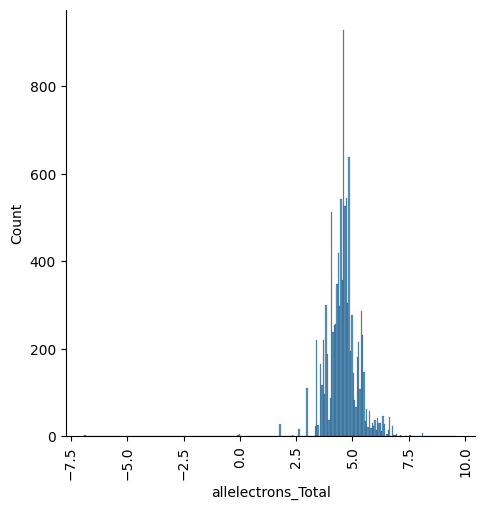

In [12]:
plt.figure(figsize=(10,5))
sns.displot(np.log(df['allelectrons_Total']))
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

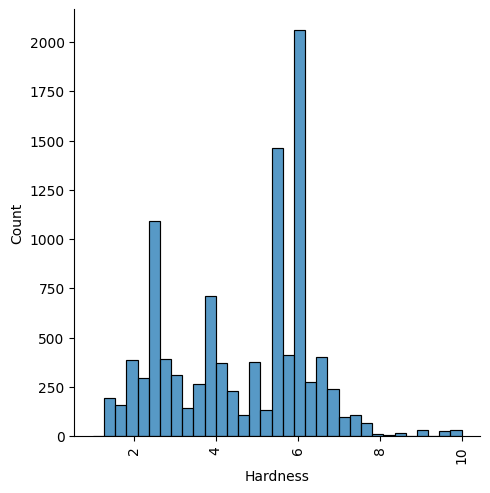

In [13]:
plt.figure(figsize=(10,5))
sns.displot(df['Hardness'])
plt.xticks(rotation='vertical')
plt.show()

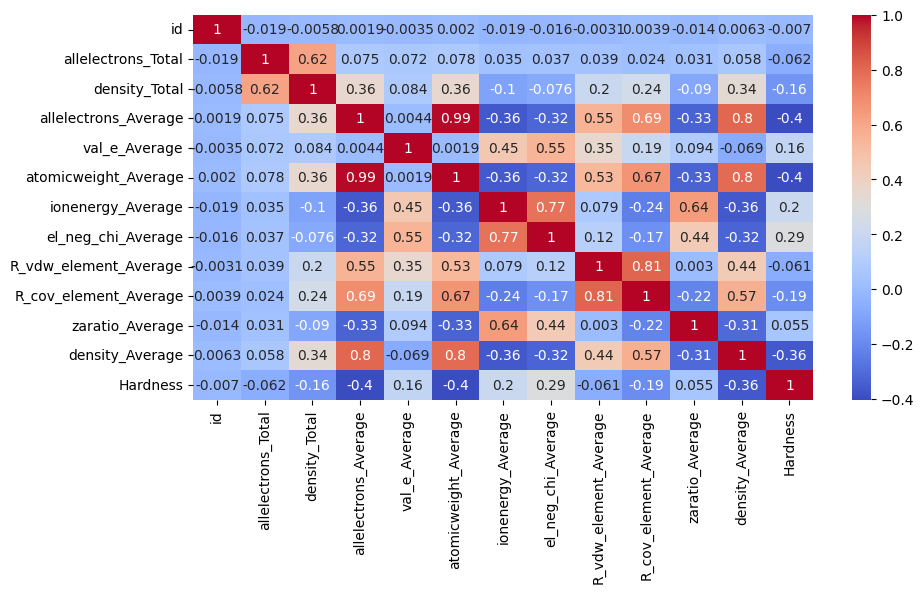

In [14]:
cor = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap='coolwarm',annot=True)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [16]:
df[df['allelectrons_Total']>(df['allelectrons_Total'].mean()+3*df['allelectrons_Total'].std())].shape

(46, 13)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


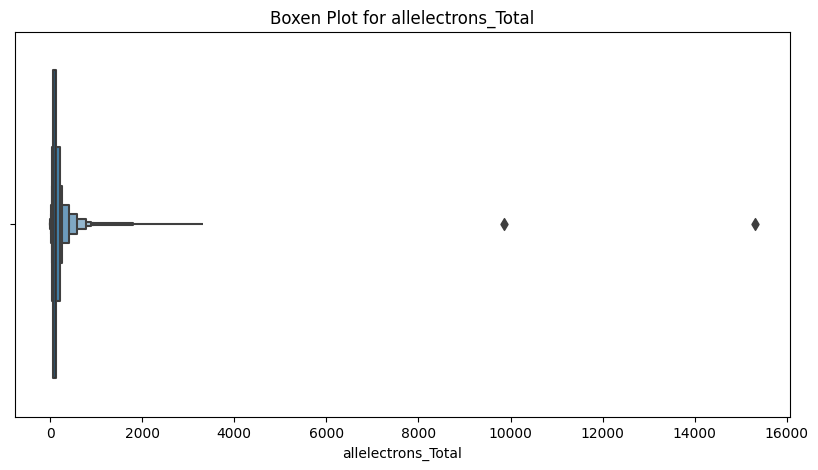

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


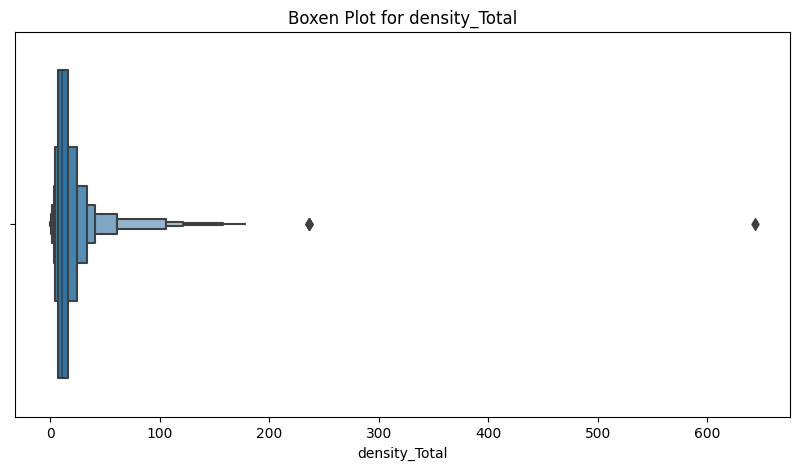

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


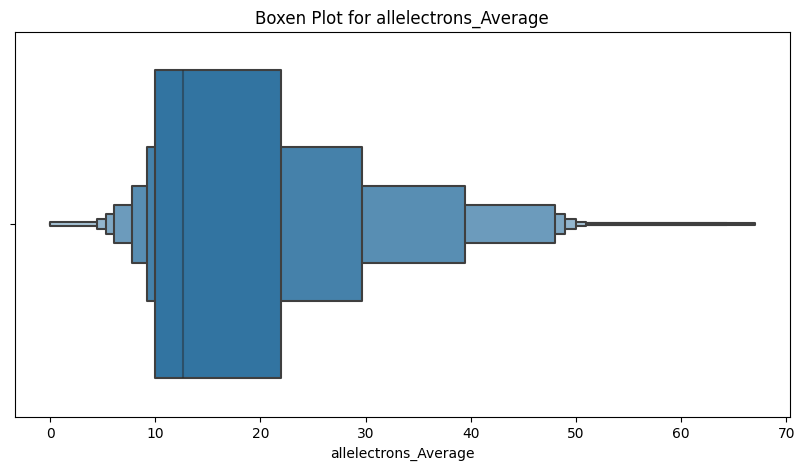

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


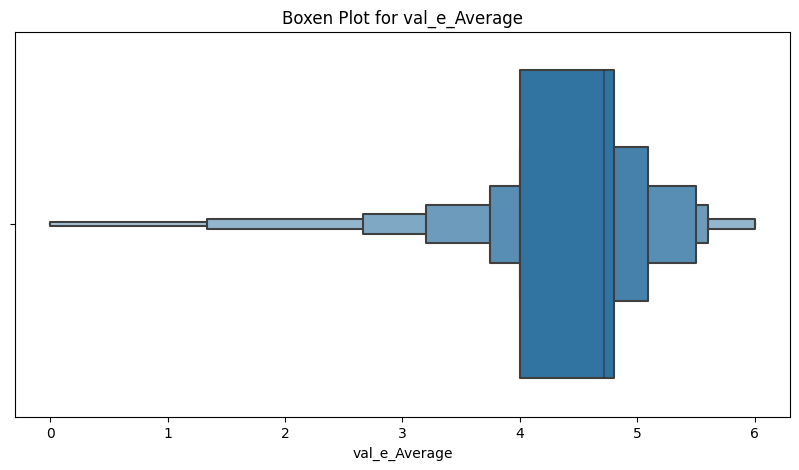

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


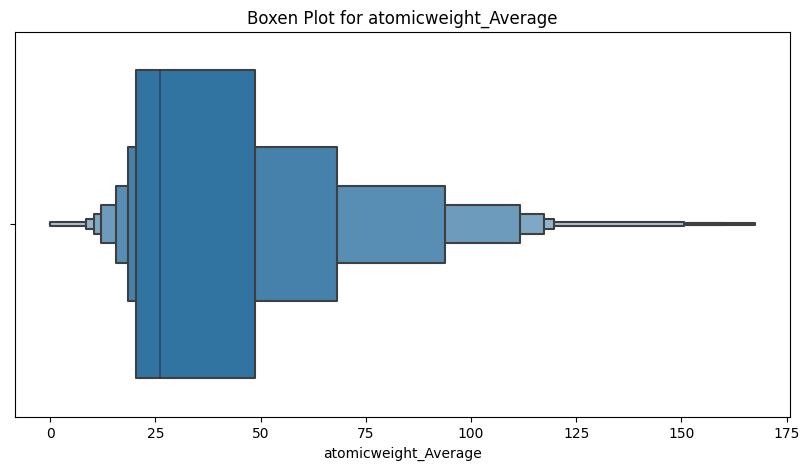

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


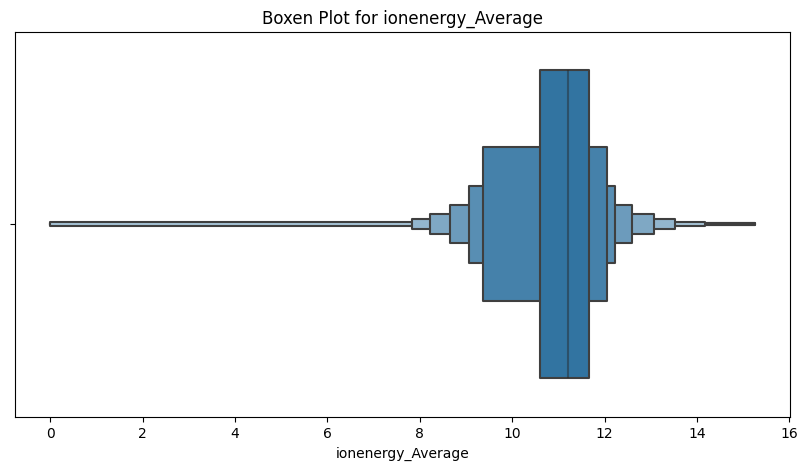

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


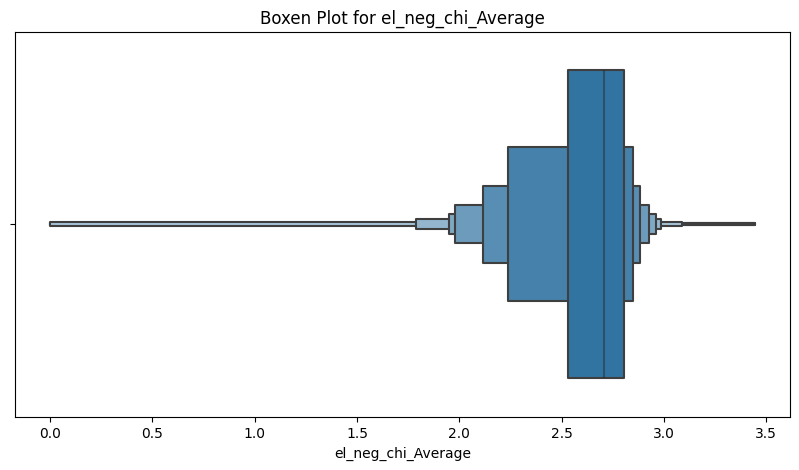

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


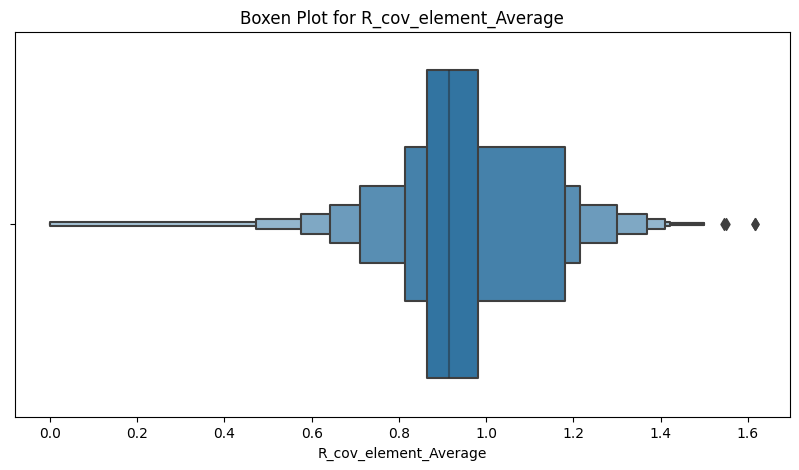

In [17]:
for column in box:
    plt.figure(figsize=(10,5))
    sns.boxenplot(x=df[column])
    plt.title(f'Boxen Plot for {column}')
    plt.show()

In [18]:
df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

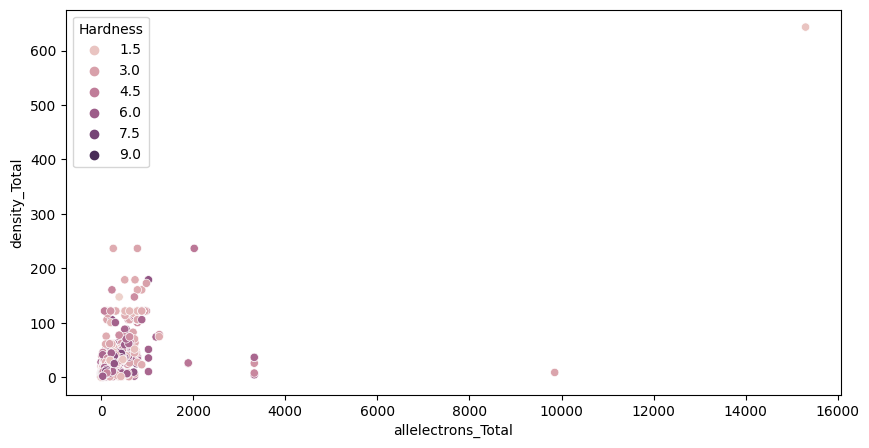

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="allelectrons_Total", y="density_Total", hue="Hardness")
plt.show()

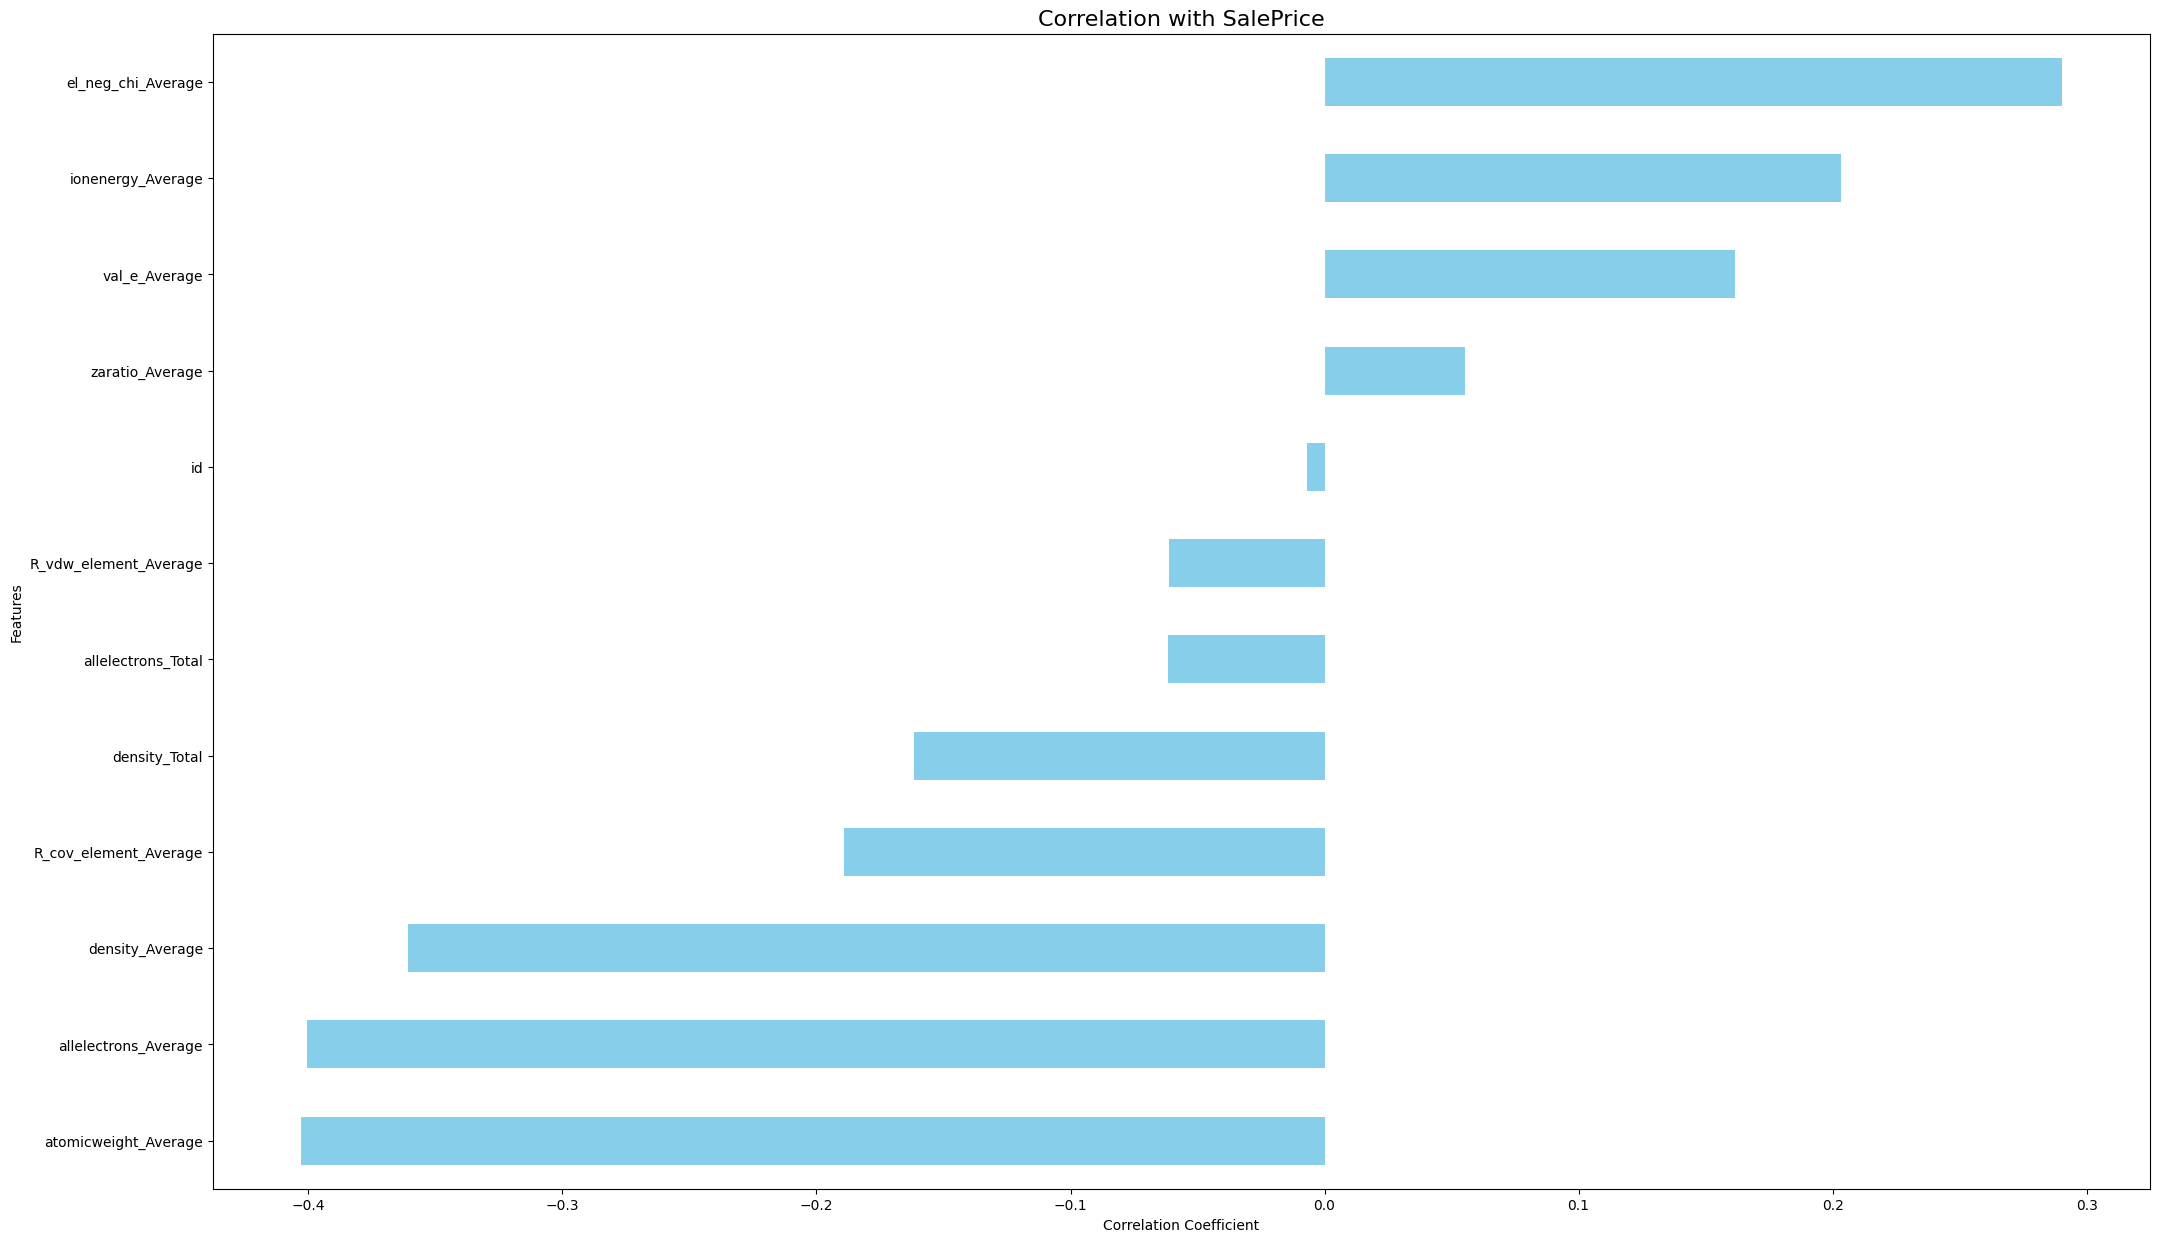

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_with_saleprice = df.corr()['Hardness']

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(25, 15))

# Create a bar plot for the correlation with SalePrice
correlation_with_saleprice.drop('Hardness').sort_values().plot(kind='barh', color='skyblue')

plt.title('Correlation with SalePrice', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [21]:
df[df.density_Total>(df.density_Total.mean()+3*df.density_Total.std())].shape

(129, 13)

In [22]:
df[df.density_Total<(df.density_Total.mean()-3*df.density_Total.std())].shape

(0, 13)

In [23]:
df1 = df[df.density_Total>=(df.density_Total.mean()+3*df.density_Total.std())]

In [24]:
df1[df1.density_Total>(df1.density_Total.mean()+3*df1.density_Total.std())].shape

(1, 13)

In [25]:
df1 = df[df.allelectrons_Total>=(df.allelectrons_Total.mean()+3*df.allelectrons_Total.std())]

In [26]:
df1[df1.allelectrons_Total>(df1.allelectrons_Total.mean()+3*df1.allelectrons_Total.std())].shape

(2, 13)

In [27]:
df1.head()

id  allelectrons_Total  density_Total  allelectrons_Average  \
21    21               884.0     160.284000             35.517241   
65    65              1894.0      25.021992              7.944444   
119  119               884.0     121.420000             35.360000   
774  774              9852.0       8.511159              7.636364   
851  851               884.0     121.420000             42.800000   

     val_e_Average  atomicweight_Average  ionenergy_Average  \
21        3.172414             80.071041           8.786179   
65        4.388889             16.210699          11.467522   
119       5.280000             82.561240           9.370384   
774       3.676768             15.374870          13.123610   
851       5.280000            102.827560           9.370384   

     el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
21             2.165238               1.908571               1.164138   
65             2.688333               1.544444               0.735556   
119            2.298000               1.907200               1.200000   
774            2.780505               1.385051               0.458788   
851            2.298000               1.908000               1.200000   

     zaratio_Average  density_Average  Hardness  
21          0.463504          6.16352       2.5  
65          0.601609          0.54957       2.5  
119         0.461899          5.50017       2.5  
774         0.706986          1.04032       2.8  
851         0.458250          3.11002       2.5

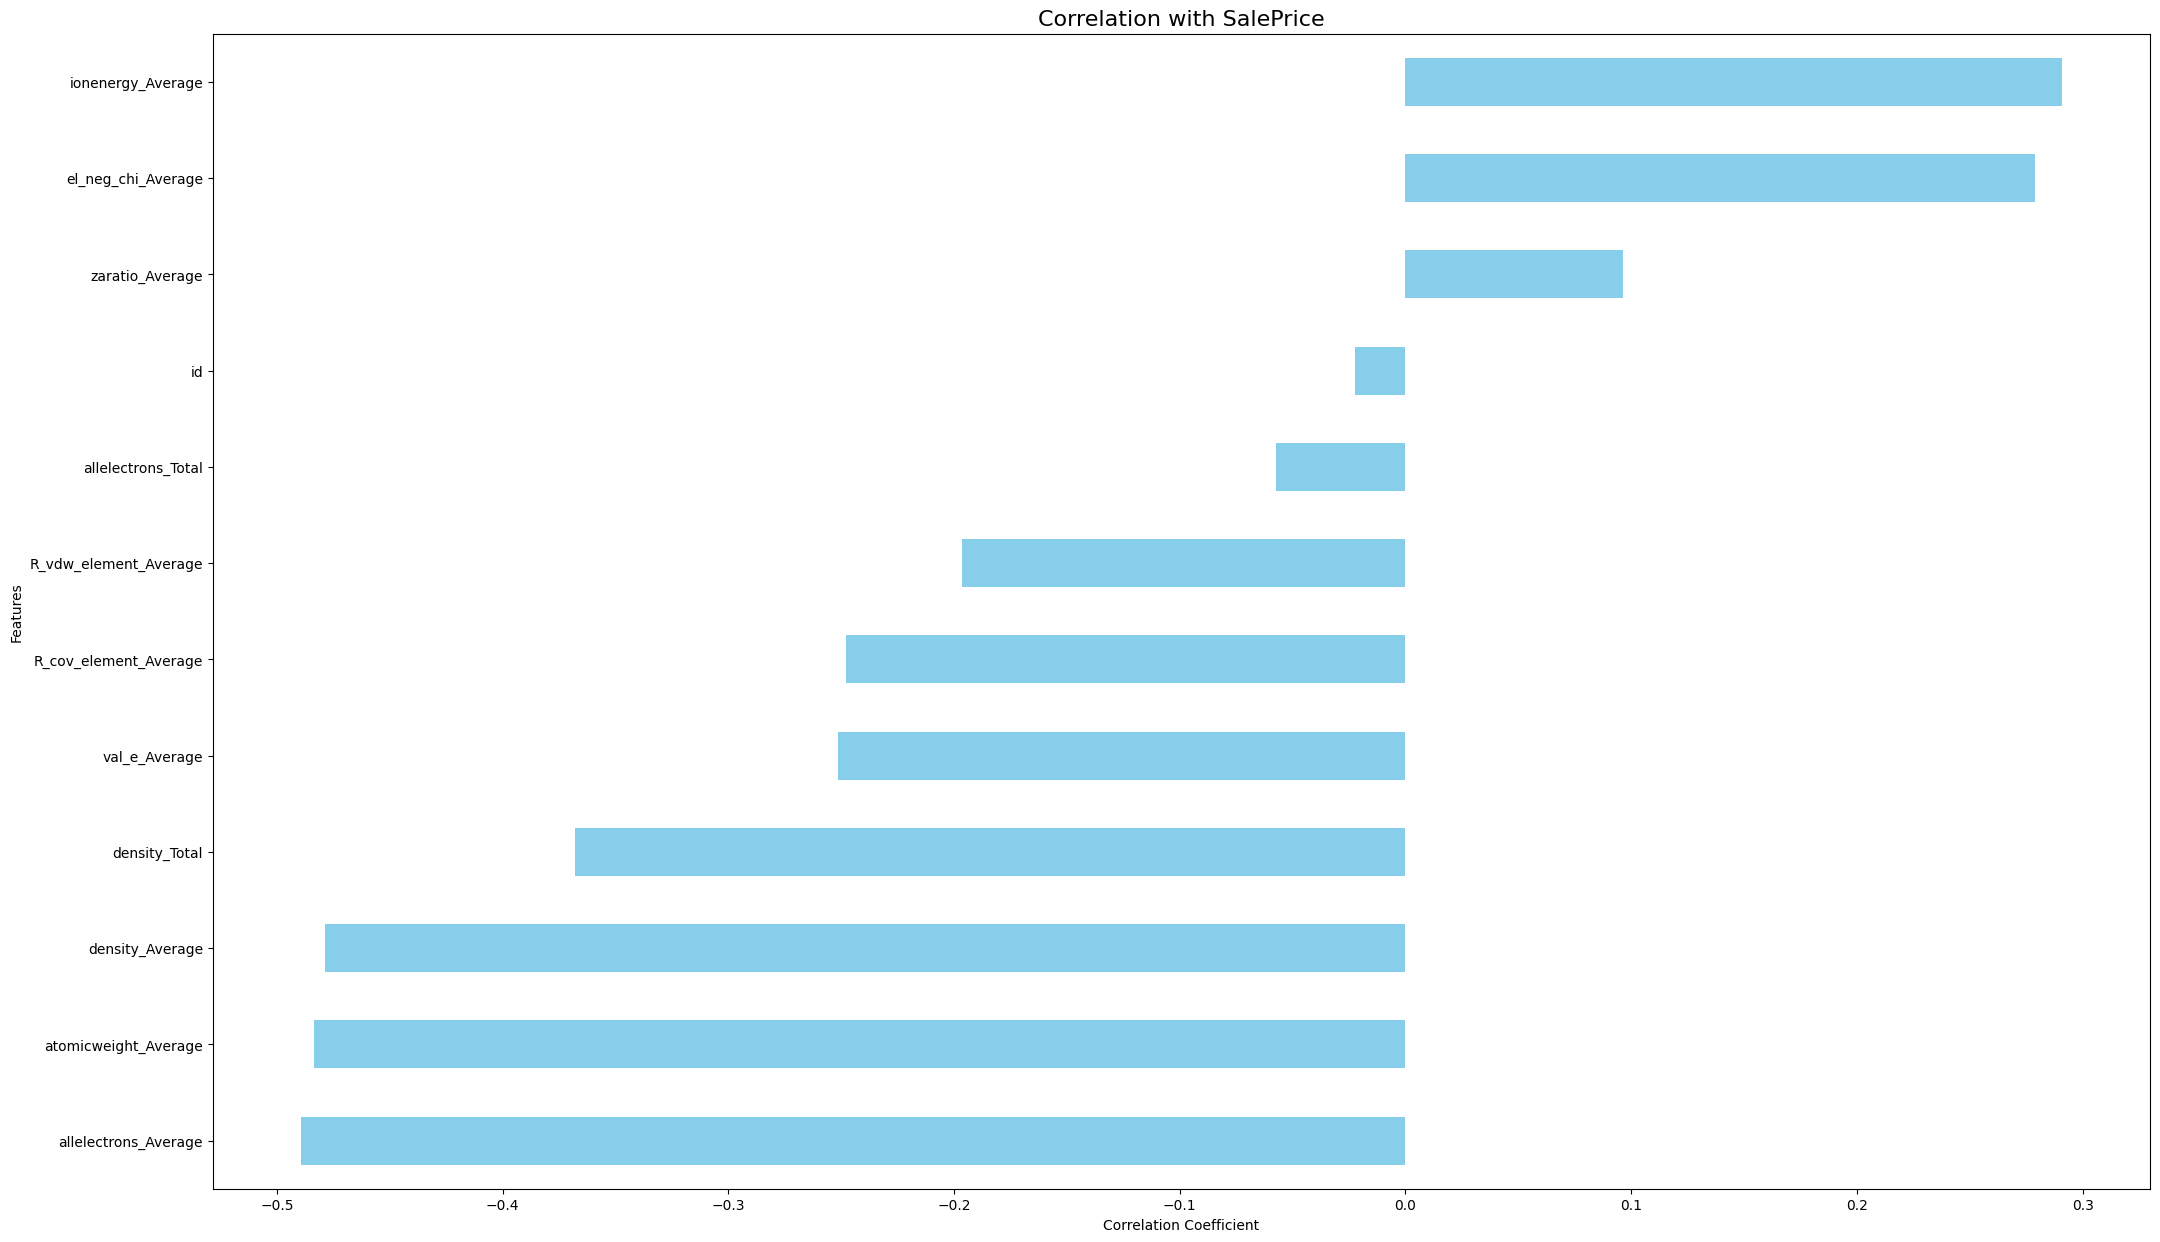

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_with_saleprice = df1.corr()['Hardness']

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(25, 15))

# Create a bar plot for the correlation with SalePrice
correlation_with_saleprice.drop('Hardness').sort_values().plot(kind='barh', color='skyblue')

plt.title('Correlation with SalePrice', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [41]:
x = df1.drop(['id','Hardness'],axis=1)
y = df1['Hardness']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=75)

In [44]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline

In [45]:
step = XGBRFRegressor()
pipe = Pipeline([
    ('step',step)
])
pipe.fit(xtrain,ytrain)
y_pred = pipe.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


r2 score 0.9194717522036133
MAE 0.29337477684020996


In [71]:
# scores = []
# for i in range(100):
#     Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=i)
#     pipe.fit(Xtrain,Ytrain)
#     y_pred1 = pipe.predict(Xtest)
#     print(scores.append(r2_score(Ytest,y_pred1)))

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None
None


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


None


In [72]:
np.argmax(scores)

75

In [46]:
step = CatBoostRegressor()
pipe1 = Pipeline([
    ('step',step)
])
pipe1.fit(xtrain,ytrain)
y_pred = pipe1.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

Learning rate set to 0.024214
0:	learn: 1.3364234	total: 31.2ms	remaining: 31.2s
1:	learn: 1.3244252	total: 32.4ms	remaining: 16.2s
2:	learn: 1.3135762	total: 33.5ms	remaining: 11.1s
3:	learn: 1.3009508	total: 34.5ms	remaining: 8.59s
4:	learn: 1.2902674	total: 35.5ms	remaining: 7.07s
5:	learn: 1.2828603	total: 36.6ms	remaining: 6.06s
6:	learn: 1.2734683	total: 37.2ms	remaining: 5.28s
7:	learn: 1.2594609	total: 38.4ms	remaining: 4.77s
8:	learn: 1.2484766	total: 39.5ms	remaining: 4.35s
9:	learn: 1.2374144	total: 40.7ms	remaining: 4.03s
10:	learn: 1.2280069	total: 42.3ms	remaining: 3.8s
11:	learn: 1.2181567	total: 43.6ms	remaining: 3.59s
12:	learn: 1.2098185	total: 44.1ms	remaining: 3.35s
13:	learn: 1.2008432	total: 45.2ms	remaining: 3.18s
14:	learn: 1.1924716	total: 46.2ms	remaining: 3.04s
15:	learn: 1.1844819	total: 47.3ms	remaining: 2.91s
16:	learn: 1.1759615	total: 48.4ms	remaining: 2.8s
17:	learn: 1.1698572	total: 49.4ms	remaining: 2.7s
18:	learn: 1.1616941	total: 50.5ms	remaining: 2

190:	learn: 0.4814253	total: 262ms	remaining: 1.11s
191:	learn: 0.4804391	total: 264ms	remaining: 1.11s
192:	learn: 0.4788458	total: 266ms	remaining: 1.11s
193:	learn: 0.4778326	total: 268ms	remaining: 1.11s
194:	learn: 0.4766274	total: 270ms	remaining: 1.11s
195:	learn: 0.4756507	total: 271ms	remaining: 1.11s
196:	learn: 0.4744388	total: 272ms	remaining: 1.11s
197:	learn: 0.4735847	total: 273ms	remaining: 1.1s
198:	learn: 0.4725200	total: 275ms	remaining: 1.11s
199:	learn: 0.4711395	total: 277ms	remaining: 1.11s
200:	learn: 0.4693790	total: 279ms	remaining: 1.11s
201:	learn: 0.4686718	total: 280ms	remaining: 1.1s
202:	learn: 0.4680064	total: 281ms	remaining: 1.1s
203:	learn: 0.4661602	total: 282ms	remaining: 1.1s
204:	learn: 0.4642148	total: 283ms	remaining: 1.09s
205:	learn: 0.4624047	total: 284ms	remaining: 1.09s
206:	learn: 0.4612144	total: 285ms	remaining: 1.09s
207:	learn: 0.4586446	total: 286ms	remaining: 1.09s
208:	learn: 0.4566152	total: 287ms	remaining: 1.09s
209:	learn: 0.45

414:	learn: 0.2109490	total: 612ms	remaining: 863ms
415:	learn: 0.2105919	total: 613ms	remaining: 861ms
416:	learn: 0.2101201	total: 615ms	remaining: 859ms
417:	learn: 0.2093908	total: 616ms	remaining: 858ms
418:	learn: 0.2090240	total: 618ms	remaining: 857ms
419:	learn: 0.2079959	total: 619ms	remaining: 855ms
420:	learn: 0.2076533	total: 621ms	remaining: 853ms
421:	learn: 0.2060395	total: 622ms	remaining: 852ms
422:	learn: 0.2053314	total: 624ms	remaining: 851ms
423:	learn: 0.2048916	total: 625ms	remaining: 849ms
424:	learn: 0.2038954	total: 627ms	remaining: 848ms
425:	learn: 0.2034622	total: 628ms	remaining: 846ms
426:	learn: 0.2028392	total: 630ms	remaining: 845ms
427:	learn: 0.2024900	total: 631ms	remaining: 844ms
428:	learn: 0.2018750	total: 633ms	remaining: 842ms
429:	learn: 0.2011725	total: 635ms	remaining: 842ms
430:	learn: 0.2007491	total: 637ms	remaining: 841ms
431:	learn: 0.2001415	total: 639ms	remaining: 840ms
432:	learn: 0.1994469	total: 640ms	remaining: 838ms
433:	learn: 

606:	learn: 0.1117597	total: 959ms	remaining: 621ms
607:	learn: 0.1115254	total: 961ms	remaining: 620ms
608:	learn: 0.1110996	total: 964ms	remaining: 619ms
609:	learn: 0.1106783	total: 969ms	remaining: 620ms
610:	learn: 0.1102422	total: 971ms	remaining: 618ms
611:	learn: 0.1096578	total: 972ms	remaining: 616ms
612:	learn: 0.1094298	total: 973ms	remaining: 614ms
613:	learn: 0.1092044	total: 974ms	remaining: 613ms
614:	learn: 0.1087944	total: 976ms	remaining: 611ms
615:	learn: 0.1083207	total: 978ms	remaining: 609ms
616:	learn: 0.1079165	total: 980ms	remaining: 608ms
617:	learn: 0.1076961	total: 981ms	remaining: 607ms
618:	learn: 0.1072613	total: 983ms	remaining: 605ms
619:	learn: 0.1068446	total: 985ms	remaining: 603ms
620:	learn: 0.1063814	total: 986ms	remaining: 602ms
621:	learn: 0.1059536	total: 987ms	remaining: 600ms
622:	learn: 0.1055640	total: 989ms	remaining: 598ms
623:	learn: 0.1051092	total: 991ms	remaining: 597ms
624:	learn: 0.1047046	total: 992ms	remaining: 595ms
625:	learn: 

869:	learn: 0.0462138	total: 1.4s	remaining: 209ms
870:	learn: 0.0461382	total: 1.4s	remaining: 208ms
871:	learn: 0.0460634	total: 1.41s	remaining: 206ms
872:	learn: 0.0458605	total: 1.41s	remaining: 205ms
873:	learn: 0.0457862	total: 1.41s	remaining: 204ms
874:	learn: 0.0457128	total: 1.41s	remaining: 202ms
875:	learn: 0.0455116	total: 1.42s	remaining: 200ms
876:	learn: 0.0453511	total: 1.42s	remaining: 199ms
877:	learn: 0.0451536	total: 1.42s	remaining: 197ms
878:	learn: 0.0450812	total: 1.42s	remaining: 196ms
879:	learn: 0.0450096	total: 1.43s	remaining: 194ms
880:	learn: 0.0448757	total: 1.43s	remaining: 193ms
881:	learn: 0.0448057	total: 1.43s	remaining: 191ms
882:	learn: 0.0446080	total: 1.43s	remaining: 190ms
883:	learn: 0.0445386	total: 1.43s	remaining: 188ms
884:	learn: 0.0444699	total: 1.44s	remaining: 187ms
885:	learn: 0.0442738	total: 1.44s	remaining: 186ms
886:	learn: 0.0442056	total: 1.45s	remaining: 184ms
887:	learn: 0.0441382	total: 1.45s	remaining: 183ms
888:	learn: 0.

In [84]:
# scores = []
# for i in range(100):
#     Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=i)
#     pipe1.fit(Xtrain,Ytrain)
#     y_pred1 = pipe1.predict(Xtest)
#     print(scores.append(r2_score(Ytest,y_pred1)))

Learning rate set to 0.024214
0:	learn: 1.3379899	total: 2.46ms	remaining: 2.46s
1:	learn: 1.3225631	total: 5.17ms	remaining: 2.58s
2:	learn: 1.3031273	total: 6.52ms	remaining: 2.17s
3:	learn: 1.2846460	total: 8.06ms	remaining: 2.01s
4:	learn: 1.2656537	total: 9.54ms	remaining: 1.9s
5:	learn: 1.2547441	total: 11ms	remaining: 1.82s
6:	learn: 1.2357328	total: 14.2ms	remaining: 2.01s
7:	learn: 1.2160339	total: 15.2ms	remaining: 1.88s
8:	learn: 1.2007676	total: 16.2ms	remaining: 1.78s
9:	learn: 1.1883271	total: 17.6ms	remaining: 1.74s
10:	learn: 1.1733954	total: 19.2ms	remaining: 1.72s
11:	learn: 1.1582758	total: 21.7ms	remaining: 1.78s
12:	learn: 1.1451501	total: 23ms	remaining: 1.75s
13:	learn: 1.1310463	total: 24.3ms	remaining: 1.71s
14:	learn: 1.1188793	total: 25.5ms	remaining: 1.68s
15:	learn: 1.1048775	total: 26.6ms	remaining: 1.63s
16:	learn: 1.0909952	total: 28.4ms	remaining: 1.64s
17:	learn: 1.0774497	total: 30.3ms	remaining: 1.65s
18:	learn: 1.0645757	total: 31.7ms	remaining: 1.6

243:	learn: 0.1187022	total: 341ms	remaining: 1.05s
244:	learn: 0.1174481	total: 342ms	remaining: 1.05s
245:	learn: 0.1167341	total: 344ms	remaining: 1.05s
246:	learn: 0.1156587	total: 345ms	remaining: 1.05s
247:	learn: 0.1147371	total: 346ms	remaining: 1.05s
248:	learn: 0.1137929	total: 348ms	remaining: 1.05s
249:	learn: 0.1129165	total: 349ms	remaining: 1.05s
250:	learn: 0.1120245	total: 351ms	remaining: 1.05s
251:	learn: 0.1110125	total: 352ms	remaining: 1.05s
252:	learn: 0.1100955	total: 353ms	remaining: 1.04s
253:	learn: 0.1092150	total: 355ms	remaining: 1.04s
254:	learn: 0.1082366	total: 356ms	remaining: 1.04s
255:	learn: 0.1073866	total: 357ms	remaining: 1.04s
256:	learn: 0.1064616	total: 359ms	remaining: 1.04s
257:	learn: 0.1055401	total: 361ms	remaining: 1.04s
258:	learn: 0.1044516	total: 362ms	remaining: 1.03s
259:	learn: 0.1035441	total: 363ms	remaining: 1.03s
260:	learn: 0.1027371	total: 365ms	remaining: 1.03s
261:	learn: 0.1021432	total: 367ms	remaining: 1.03s
262:	learn: 

426:	learn: 0.0324150	total: 697ms	remaining: 935ms
427:	learn: 0.0322188	total: 699ms	remaining: 934ms
428:	learn: 0.0320577	total: 701ms	remaining: 933ms
429:	learn: 0.0318414	total: 702ms	remaining: 931ms
430:	learn: 0.0316274	total: 704ms	remaining: 929ms
431:	learn: 0.0314706	total: 705ms	remaining: 927ms
432:	learn: 0.0313159	total: 706ms	remaining: 925ms
433:	learn: 0.0311270	total: 708ms	remaining: 923ms
434:	learn: 0.0309188	total: 709ms	remaining: 921ms
435:	learn: 0.0307680	total: 710ms	remaining: 918ms
436:	learn: 0.0305625	total: 711ms	remaining: 916ms
437:	learn: 0.0303783	total: 712ms	remaining: 913ms
438:	learn: 0.0301960	total: 713ms	remaining: 911ms
439:	learn: 0.0300942	total: 715ms	remaining: 910ms
440:	learn: 0.0298945	total: 717ms	remaining: 908ms
441:	learn: 0.0297944	total: 718ms	remaining: 906ms
442:	learn: 0.0295974	total: 719ms	remaining: 904ms
443:	learn: 0.0294023	total: 720ms	remaining: 902ms
444:	learn: 0.0292260	total: 721ms	remaining: 899ms
445:	learn: 

607:	learn: 0.0131927	total: 1.05s	remaining: 680ms
608:	learn: 0.0131033	total: 1.06s	remaining: 679ms
609:	learn: 0.0130691	total: 1.06s	remaining: 678ms
610:	learn: 0.0130139	total: 1.06s	remaining: 677ms
611:	learn: 0.0129496	total: 1.06s	remaining: 675ms
612:	learn: 0.0128886	total: 1.06s	remaining: 672ms
613:	learn: 0.0128266	total: 1.07s	remaining: 670ms
614:	learn: 0.0127665	total: 1.07s	remaining: 668ms
615:	learn: 0.0126915	total: 1.07s	remaining: 666ms
616:	learn: 0.0126323	total: 1.07s	remaining: 665ms
617:	learn: 0.0125586	total: 1.07s	remaining: 663ms
618:	learn: 0.0125004	total: 1.07s	remaining: 661ms
619:	learn: 0.0124394	total: 1.07s	remaining: 659ms
620:	learn: 0.0123813	total: 1.08s	remaining: 659ms
621:	learn: 0.0123257	total: 1.08s	remaining: 657ms
622:	learn: 0.0122658	total: 1.08s	remaining: 656ms
623:	learn: 0.0122109	total: 1.08s	remaining: 654ms
624:	learn: 0.0121519	total: 1.09s	remaining: 654ms
625:	learn: 0.0120979	total: 1.09s	remaining: 652ms
626:	learn: 

786:	learn: 0.0054639	total: 1.41s	remaining: 382ms
787:	learn: 0.0054456	total: 1.42s	remaining: 381ms
788:	learn: 0.0054206	total: 1.42s	remaining: 379ms
789:	learn: 0.0053833	total: 1.42s	remaining: 377ms
790:	learn: 0.0053589	total: 1.43s	remaining: 378ms
791:	learn: 0.0053365	total: 1.44s	remaining: 377ms
792:	learn: 0.0053126	total: 1.44s	remaining: 376ms
793:	learn: 0.0052889	total: 1.44s	remaining: 374ms
794:	learn: 0.0052534	total: 1.44s	remaining: 372ms
795:	learn: 0.0052303	total: 1.45s	remaining: 371ms
796:	learn: 0.0052008	total: 1.45s	remaining: 369ms
797:	learn: 0.0051794	total: 1.45s	remaining: 367ms
798:	learn: 0.0051570	total: 1.45s	remaining: 365ms
799:	learn: 0.0051286	total: 1.46s	remaining: 364ms
800:	learn: 0.0051068	total: 1.46s	remaining: 363ms
801:	learn: 0.0050791	total: 1.46s	remaining: 361ms
802:	learn: 0.0050598	total: 1.47s	remaining: 361ms
803:	learn: 0.0050387	total: 1.48s	remaining: 360ms
804:	learn: 0.0050119	total: 1.48s	remaining: 358ms
805:	learn: 

978:	learn: 0.0027260	total: 1.78s	remaining: 38.1ms
979:	learn: 0.0027164	total: 1.78s	remaining: 36.3ms
980:	learn: 0.0027115	total: 1.78s	remaining: 34.5ms
981:	learn: 0.0026996	total: 1.78s	remaining: 32.7ms
982:	learn: 0.0026953	total: 1.78s	remaining: 30.8ms
983:	learn: 0.0026886	total: 1.78s	remaining: 29ms
984:	learn: 0.0026804	total: 1.79s	remaining: 27.2ms
985:	learn: 0.0026762	total: 1.79s	remaining: 25.4ms
986:	learn: 0.0026695	total: 1.79s	remaining: 23.6ms
987:	learn: 0.0026654	total: 1.79s	remaining: 21.8ms
988:	learn: 0.0026588	total: 1.79s	remaining: 20ms
989:	learn: 0.0026508	total: 1.8s	remaining: 18.1ms
990:	learn: 0.0026468	total: 1.8s	remaining: 16.3ms
991:	learn: 0.0026402	total: 1.8s	remaining: 14.5ms
992:	learn: 0.0026362	total: 1.8s	remaining: 12.7ms
993:	learn: 0.0026297	total: 1.8s	remaining: 10.9ms
994:	learn: 0.0026254	total: 1.8s	remaining: 9.06ms
995:	learn: 0.0026201	total: 1.81s	remaining: 7.26ms
996:	learn: 0.0026112	total: 1.81s	remaining: 5.44ms
997

185:	learn: 0.2250099	total: 364ms	remaining: 1.59s
186:	learn: 0.2240845	total: 366ms	remaining: 1.59s
187:	learn: 0.2221504	total: 367ms	remaining: 1.58s
188:	learn: 0.2202560	total: 368ms	remaining: 1.58s
189:	learn: 0.2188031	total: 369ms	remaining: 1.57s
190:	learn: 0.2174359	total: 375ms	remaining: 1.59s
191:	learn: 0.2155156	total: 376ms	remaining: 1.58s
192:	learn: 0.2136155	total: 378ms	remaining: 1.58s
193:	learn: 0.2126980	total: 379ms	remaining: 1.57s
194:	learn: 0.2113012	total: 380ms	remaining: 1.57s
195:	learn: 0.2099278	total: 381ms	remaining: 1.56s
196:	learn: 0.2081104	total: 383ms	remaining: 1.56s
197:	learn: 0.2068157	total: 384ms	remaining: 1.55s
198:	learn: 0.2055443	total: 385ms	remaining: 1.55s
199:	learn: 0.2046895	total: 386ms	remaining: 1.54s
200:	learn: 0.2032999	total: 389ms	remaining: 1.55s
201:	learn: 0.2015336	total: 391ms	remaining: 1.54s
202:	learn: 0.2003030	total: 393ms	remaining: 1.54s
203:	learn: 0.1994011	total: 394ms	remaining: 1.54s
204:	learn: 

381:	learn: 0.0748916	total: 719ms	remaining: 1.16s
382:	learn: 0.0743872	total: 722ms	remaining: 1.16s
383:	learn: 0.0741439	total: 723ms	remaining: 1.16s
384:	learn: 0.0736509	total: 724ms	remaining: 1.16s
385:	learn: 0.0733209	total: 727ms	remaining: 1.16s
386:	learn: 0.0727607	total: 728ms	remaining: 1.15s
387:	learn: 0.0724991	total: 730ms	remaining: 1.15s
388:	learn: 0.0720185	total: 731ms	remaining: 1.15s
389:	learn: 0.0717478	total: 732ms	remaining: 1.15s
390:	learn: 0.0712733	total: 735ms	remaining: 1.14s
391:	learn: 0.0707319	total: 738ms	remaining: 1.14s
392:	learn: 0.0704661	total: 739ms	remaining: 1.14s
393:	learn: 0.0701516	total: 741ms	remaining: 1.14s
394:	learn: 0.0696886	total: 744ms	remaining: 1.14s
395:	learn: 0.0693866	total: 746ms	remaining: 1.14s
396:	learn: 0.0689296	total: 747ms	remaining: 1.13s
397:	learn: 0.0684772	total: 748ms	remaining: 1.13s
398:	learn: 0.0682306	total: 753ms	remaining: 1.13s
399:	learn: 0.0679881	total: 755ms	remaining: 1.13s
400:	learn: 

564:	learn: 0.0282016	total: 1.06s	remaining: 821ms
565:	learn: 0.0279883	total: 1.07s	remaining: 822ms
566:	learn: 0.0279088	total: 1.07s	remaining: 820ms
567:	learn: 0.0276885	total: 1.07s	remaining: 817ms
568:	learn: 0.0276100	total: 1.07s	remaining: 815ms
569:	learn: 0.0273873	total: 1.08s	remaining: 815ms
570:	learn: 0.0273100	total: 1.08s	remaining: 812ms
571:	learn: 0.0270970	total: 1.08s	remaining: 811ms
572:	learn: 0.0269080	total: 1.08s	remaining: 808ms
573:	learn: 0.0268323	total: 1.09s	remaining: 806ms
574:	learn: 0.0266464	total: 1.09s	remaining: 805ms
575:	learn: 0.0264465	total: 1.09s	remaining: 802ms
576:	learn: 0.0262494	total: 1.09s	remaining: 800ms
577:	learn: 0.0260687	total: 1.09s	remaining: 797ms
578:	learn: 0.0259957	total: 1.09s	remaining: 795ms
579:	learn: 0.0258031	total: 1.09s	remaining: 793ms
580:	learn: 0.0255881	total: 1.1s	remaining: 792ms
581:	learn: 0.0254134	total: 1.1s	remaining: 790ms
582:	learn: 0.0253424	total: 1.1s	remaining: 788ms
583:	learn: 0.0

758:	learn: 0.0099651	total: 1.42s	remaining: 451ms
759:	learn: 0.0099218	total: 1.42s	remaining: 449ms
760:	learn: 0.0098462	total: 1.43s	remaining: 448ms
761:	learn: 0.0097902	total: 1.43s	remaining: 446ms
762:	learn: 0.0097349	total: 1.43s	remaining: 444ms
763:	learn: 0.0096616	total: 1.43s	remaining: 442ms
764:	learn: 0.0096069	total: 1.43s	remaining: 440ms
765:	learn: 0.0095529	total: 1.43s	remaining: 438ms
766:	learn: 0.0095052	total: 1.43s	remaining: 435ms
767:	learn: 0.0094522	total: 1.43s	remaining: 433ms
768:	learn: 0.0094119	total: 1.44s	remaining: 431ms
769:	learn: 0.0093708	total: 1.44s	remaining: 430ms
770:	learn: 0.0093314	total: 1.44s	remaining: 428ms
771:	learn: 0.0092917	total: 1.44s	remaining: 426ms
772:	learn: 0.0092362	total: 1.44s	remaining: 424ms
773:	learn: 0.0092132	total: 1.44s	remaining: 422ms
774:	learn: 0.0091905	total: 1.45s	remaining: 420ms
775:	learn: 0.0091512	total: 1.45s	remaining: 418ms
776:	learn: 0.0091134	total: 1.45s	remaining: 416ms
777:	learn: 

936:	learn: 0.0045849	total: 1.73s	remaining: 117ms
937:	learn: 0.0045734	total: 1.74s	remaining: 115ms
938:	learn: 0.0045545	total: 1.74s	remaining: 113ms
939:	learn: 0.0045360	total: 1.74s	remaining: 111ms
940:	learn: 0.0045159	total: 1.74s	remaining: 109ms
941:	learn: 0.0044988	total: 1.74s	remaining: 107ms
942:	learn: 0.0044847	total: 1.75s	remaining: 105ms
943:	learn: 0.0044652	total: 1.75s	remaining: 104ms
944:	learn: 0.0044538	total: 1.75s	remaining: 102ms
945:	learn: 0.0044370	total: 1.75s	remaining: 99.9ms
946:	learn: 0.0044235	total: 1.75s	remaining: 98.1ms
947:	learn: 0.0044048	total: 1.75s	remaining: 96.3ms
948:	learn: 0.0043799	total: 1.76s	remaining: 94.4ms
949:	learn: 0.0043737	total: 1.76s	remaining: 92.5ms
950:	learn: 0.0043555	total: 1.76s	remaining: 90.6ms
951:	learn: 0.0043369	total: 1.76s	remaining: 88.7ms
952:	learn: 0.0043308	total: 1.76s	remaining: 86.8ms
953:	learn: 0.0043144	total: 1.76s	remaining: 84.9ms
954:	learn: 0.0042982	total: 1.76s	remaining: 83.1ms
95

178:	learn: 0.2464064	total: 308ms	remaining: 1.41s
179:	learn: 0.2444796	total: 309ms	remaining: 1.41s
180:	learn: 0.2430945	total: 311ms	remaining: 1.41s
181:	learn: 0.2409531	total: 312ms	remaining: 1.4s
182:	learn: 0.2390524	total: 315ms	remaining: 1.4s
183:	learn: 0.2367686	total: 316ms	remaining: 1.4s
184:	learn: 0.2349418	total: 318ms	remaining: 1.4s
185:	learn: 0.2330044	total: 319ms	remaining: 1.4s
186:	learn: 0.2308657	total: 325ms	remaining: 1.41s
187:	learn: 0.2289769	total: 326ms	remaining: 1.41s
188:	learn: 0.2269428	total: 328ms	remaining: 1.41s
189:	learn: 0.2249417	total: 329ms	remaining: 1.4s
190:	learn: 0.2234931	total: 332ms	remaining: 1.41s
191:	learn: 0.2216804	total: 336ms	remaining: 1.41s
192:	learn: 0.2198401	total: 337ms	remaining: 1.41s
193:	learn: 0.2180543	total: 342ms	remaining: 1.42s
194:	learn: 0.2162454	total: 343ms	remaining: 1.42s
195:	learn: 0.2147344	total: 345ms	remaining: 1.41s
196:	learn: 0.2129339	total: 346ms	remaining: 1.41s
197:	learn: 0.2117

370:	learn: 0.0726163	total: 652ms	remaining: 1.1s
371:	learn: 0.0723281	total: 655ms	remaining: 1.11s
372:	learn: 0.0720423	total: 657ms	remaining: 1.1s
373:	learn: 0.0714384	total: 658ms	remaining: 1.1s
374:	learn: 0.0709839	total: 660ms	remaining: 1.1s
375:	learn: 0.0705336	total: 662ms	remaining: 1.1s
376:	learn: 0.0699548	total: 664ms	remaining: 1.1s
377:	learn: 0.0696786	total: 665ms	remaining: 1.09s
378:	learn: 0.0694049	total: 666ms	remaining: 1.09s
379:	learn: 0.0689656	total: 668ms	remaining: 1.09s
380:	learn: 0.0684238	total: 669ms	remaining: 1.09s
381:	learn: 0.0678574	total: 670ms	remaining: 1.08s
382:	learn: 0.0675853	total: 672ms	remaining: 1.08s
383:	learn: 0.0671591	total: 674ms	remaining: 1.08s
384:	learn: 0.0666138	total: 675ms	remaining: 1.08s
385:	learn: 0.0663477	total: 677ms	remaining: 1.08s
386:	learn: 0.0659304	total: 679ms	remaining: 1.07s
387:	learn: 0.0656734	total: 680ms	remaining: 1.07s
388:	learn: 0.0651424	total: 681ms	remaining: 1.07s
389:	learn: 0.0649

567:	learn: 0.0270052	total: 1s	remaining: 763ms
568:	learn: 0.0269343	total: 1s	remaining: 761ms
569:	learn: 0.0267691	total: 1.01s	remaining: 759ms
570:	learn: 0.0265831	total: 1.01s	remaining: 758ms
571:	learn: 0.0265136	total: 1.01s	remaining: 755ms
572:	learn: 0.0264453	total: 1.01s	remaining: 753ms
573:	learn: 0.0262834	total: 1.01s	remaining: 752ms
574:	learn: 0.0261030	total: 1.01s	remaining: 750ms
575:	learn: 0.0260355	total: 1.01s	remaining: 747ms
576:	learn: 0.0259263	total: 1.02s	remaining: 745ms
577:	learn: 0.0257681	total: 1.02s	remaining: 743ms
578:	learn: 0.0255934	total: 1.02s	remaining: 741ms
579:	learn: 0.0255278	total: 1.02s	remaining: 738ms
580:	learn: 0.0254629	total: 1.02s	remaining: 738ms
581:	learn: 0.0253073	total: 1.02s	remaining: 736ms
582:	learn: 0.0251534	total: 1.02s	remaining: 733ms
583:	learn: 0.0250140	total: 1.03s	remaining: 731ms
584:	learn: 0.0249507	total: 1.03s	remaining: 729ms
585:	learn: 0.0247994	total: 1.03s	remaining: 727ms
586:	learn: 0.0247

765:	learn: 0.0101925	total: 1.36s	remaining: 416ms
766:	learn: 0.0101365	total: 1.36s	remaining: 415ms
767:	learn: 0.0100939	total: 1.37s	remaining: 413ms
768:	learn: 0.0100569	total: 1.37s	remaining: 411ms
769:	learn: 0.0100013	total: 1.37s	remaining: 409ms
770:	learn: 0.0099359	total: 1.37s	remaining: 407ms
771:	learn: 0.0098888	total: 1.37s	remaining: 405ms
772:	learn: 0.0098351	total: 1.37s	remaining: 404ms
773:	learn: 0.0098150	total: 1.38s	remaining: 402ms
774:	learn: 0.0097376	total: 1.38s	remaining: 400ms
775:	learn: 0.0097024	total: 1.38s	remaining: 398ms
776:	learn: 0.0096598	total: 1.38s	remaining: 396ms
777:	learn: 0.0096073	total: 1.38s	remaining: 395ms
778:	learn: 0.0095616	total: 1.38s	remaining: 393ms
779:	learn: 0.0095141	total: 1.39s	remaining: 391ms
780:	learn: 0.0094731	total: 1.39s	remaining: 389ms
781:	learn: 0.0094287	total: 1.39s	remaining: 387ms
782:	learn: 0.0093815	total: 1.39s	remaining: 385ms
783:	learn: 0.0093088	total: 1.39s	remaining: 383ms
784:	learn: 

957:	learn: 0.0040960	total: 1.71s	remaining: 75ms
958:	learn: 0.0040818	total: 1.71s	remaining: 73.2ms
959:	learn: 0.0040678	total: 1.71s	remaining: 71.4ms
960:	learn: 0.0040453	total: 1.71s	remaining: 69.6ms
961:	learn: 0.0040154	total: 1.72s	remaining: 67.8ms
962:	learn: 0.0040017	total: 1.72s	remaining: 66ms
963:	learn: 0.0039921	total: 1.72s	remaining: 64.3ms
964:	learn: 0.0039826	total: 1.72s	remaining: 62.5ms
965:	learn: 0.0039616	total: 1.72s	remaining: 60.7ms
966:	learn: 0.0039482	total: 1.73s	remaining: 58.9ms
967:	learn: 0.0039349	total: 1.73s	remaining: 57.1ms
968:	learn: 0.0039208	total: 1.73s	remaining: 55.3ms
969:	learn: 0.0039004	total: 1.73s	remaining: 53.5ms
970:	learn: 0.0038872	total: 1.73s	remaining: 51.7ms
971:	learn: 0.0038743	total: 1.73s	remaining: 49.9ms
972:	learn: 0.0038614	total: 1.74s	remaining: 48.2ms
973:	learn: 0.0038487	total: 1.74s	remaining: 46.4ms
974:	learn: 0.0038362	total: 1.74s	remaining: 44.6ms
975:	learn: 0.0038082	total: 1.74s	remaining: 42.8

214:	learn: 0.2022981	total: 312ms	remaining: 1.14s
215:	learn: 0.2011117	total: 315ms	remaining: 1.14s
216:	learn: 0.1997864	total: 316ms	remaining: 1.14s
217:	learn: 0.1981506	total: 320ms	remaining: 1.15s
218:	learn: 0.1967095	total: 321ms	remaining: 1.14s
219:	learn: 0.1957535	total: 322ms	remaining: 1.14s
220:	learn: 0.1940981	total: 323ms	remaining: 1.14s
221:	learn: 0.1924144	total: 326ms	remaining: 1.14s
222:	learn: 0.1912481	total: 328ms	remaining: 1.14s
223:	learn: 0.1900624	total: 329ms	remaining: 1.14s
224:	learn: 0.1887082	total: 330ms	remaining: 1.14s
225:	learn: 0.1874625	total: 332ms	remaining: 1.14s
226:	learn: 0.1860343	total: 334ms	remaining: 1.14s
227:	learn: 0.1846731	total: 335ms	remaining: 1.13s
228:	learn: 0.1834809	total: 336ms	remaining: 1.13s
229:	learn: 0.1821944	total: 341ms	remaining: 1.14s
230:	learn: 0.1806725	total: 342ms	remaining: 1.14s
231:	learn: 0.1791957	total: 344ms	remaining: 1.14s
232:	learn: 0.1779131	total: 345ms	remaining: 1.14s
233:	learn: 

406:	learn: 0.0629951	total: 653ms	remaining: 951ms
407:	learn: 0.0625825	total: 661ms	remaining: 959ms
408:	learn: 0.0623285	total: 662ms	remaining: 957ms
409:	learn: 0.0619214	total: 663ms	remaining: 954ms
410:	learn: 0.0614631	total: 664ms	remaining: 952ms
411:	learn: 0.0611929	total: 666ms	remaining: 950ms
412:	learn: 0.0607410	total: 668ms	remaining: 950ms
413:	learn: 0.0602939	total: 671ms	remaining: 950ms
414:	learn: 0.0600286	total: 675ms	remaining: 951ms
415:	learn: 0.0595877	total: 677ms	remaining: 950ms
416:	learn: 0.0593459	total: 677ms	remaining: 947ms
417:	learn: 0.0589109	total: 679ms	remaining: 945ms
418:	learn: 0.0584807	total: 680ms	remaining: 943ms
419:	learn: 0.0580550	total: 681ms	remaining: 941ms
420:	learn: 0.0577992	total: 683ms	remaining: 939ms
421:	learn: 0.0574237	total: 684ms	remaining: 938ms
422:	learn: 0.0570839	total: 686ms	remaining: 936ms
423:	learn: 0.0567470	total: 689ms	remaining: 936ms
424:	learn: 0.0563913	total: 690ms	remaining: 934ms
425:	learn: 

600:	learn: 0.0214737	total: 1s	remaining: 664ms
601:	learn: 0.0213085	total: 1s	remaining: 663ms
602:	learn: 0.0212280	total: 1s	remaining: 661ms
603:	learn: 0.0211346	total: 1.01s	remaining: 661ms
604:	learn: 0.0209725	total: 1.01s	remaining: 659ms
605:	learn: 0.0208452	total: 1.01s	remaining: 657ms
606:	learn: 0.0207669	total: 1.01s	remaining: 655ms
607:	learn: 0.0206466	total: 1.01s	remaining: 654ms
608:	learn: 0.0205275	total: 1.02s	remaining: 653ms
609:	learn: 0.0204509	total: 1.02s	remaining: 651ms
610:	learn: 0.0203335	total: 1.02s	remaining: 649ms
611:	learn: 0.0201698	total: 1.02s	remaining: 647ms
612:	learn: 0.0200085	total: 1.02s	remaining: 645ms
613:	learn: 0.0198498	total: 1.02s	remaining: 643ms
614:	learn: 0.0196934	total: 1.02s	remaining: 642ms
615:	learn: 0.0195393	total: 1.03s	remaining: 641ms
616:	learn: 0.0193877	total: 1.03s	remaining: 639ms
617:	learn: 0.0192383	total: 1.03s	remaining: 637ms
618:	learn: 0.0191673	total: 1.03s	remaining: 635ms
619:	learn: 0.0190208

797:	learn: 0.0080516	total: 1.35s	remaining: 342ms
798:	learn: 0.0080321	total: 1.35s	remaining: 340ms
799:	learn: 0.0079976	total: 1.35s	remaining: 338ms
800:	learn: 0.0079474	total: 1.35s	remaining: 336ms
801:	learn: 0.0078991	total: 1.36s	remaining: 335ms
802:	learn: 0.0078801	total: 1.36s	remaining: 333ms
803:	learn: 0.0078311	total: 1.36s	remaining: 331ms
804:	learn: 0.0077979	total: 1.36s	remaining: 330ms
805:	learn: 0.0077650	total: 1.36s	remaining: 328ms
806:	learn: 0.0077151	total: 1.36s	remaining: 326ms
807:	learn: 0.0076967	total: 1.36s	remaining: 325ms
808:	learn: 0.0076433	total: 1.37s	remaining: 323ms
809:	learn: 0.0076236	total: 1.37s	remaining: 321ms
810:	learn: 0.0075771	total: 1.37s	remaining: 319ms
811:	learn: 0.0075592	total: 1.37s	remaining: 318ms
812:	learn: 0.0075135	total: 1.37s	remaining: 316ms
813:	learn: 0.0074824	total: 1.38s	remaining: 314ms
814:	learn: 0.0074384	total: 1.38s	remaining: 313ms
815:	learn: 0.0074080	total: 1.38s	remaining: 311ms
816:	learn: 

982:	learn: 0.0037842	total: 1.69s	remaining: 29.3ms
983:	learn: 0.0037725	total: 1.69s	remaining: 27.5ms
984:	learn: 0.0037591	total: 1.69s	remaining: 25.8ms
985:	learn: 0.0037476	total: 1.7s	remaining: 24.1ms
986:	learn: 0.0037230	total: 1.7s	remaining: 22.4ms
987:	learn: 0.0037098	total: 1.7s	remaining: 20.7ms
988:	learn: 0.0036905	total: 1.7s	remaining: 18.9ms
989:	learn: 0.0036793	total: 1.7s	remaining: 17.2ms
990:	learn: 0.0036662	total: 1.71s	remaining: 15.5ms
991:	learn: 0.0036551	total: 1.71s	remaining: 13.8ms
992:	learn: 0.0036316	total: 1.71s	remaining: 12ms
993:	learn: 0.0036187	total: 1.71s	remaining: 10.3ms
994:	learn: 0.0036059	total: 1.71s	remaining: 8.61ms
995:	learn: 0.0035874	total: 1.71s	remaining: 6.88ms
996:	learn: 0.0035750	total: 1.71s	remaining: 5.16ms
997:	learn: 0.0035627	total: 1.72s	remaining: 3.44ms
998:	learn: 0.0035501	total: 1.72s	remaining: 1.72ms
999:	learn: 0.0035375	total: 1.72s	remaining: 0us
None
Learning rate set to 0.024214
0:	learn: 1.2526392	t

223:	learn: 0.1524585	total: 317ms	remaining: 1.1s
224:	learn: 0.1513401	total: 321ms	remaining: 1.1s
225:	learn: 0.1502289	total: 322ms	remaining: 1.1s
226:	learn: 0.1492227	total: 324ms	remaining: 1.1s
227:	learn: 0.1479019	total: 325ms	remaining: 1.1s
228:	learn: 0.1465838	total: 326ms	remaining: 1.1s
229:	learn: 0.1452474	total: 330ms	remaining: 1.1s
230:	learn: 0.1438790	total: 331ms	remaining: 1.1s
231:	learn: 0.1425971	total: 333ms	remaining: 1.1s
232:	learn: 0.1413321	total: 335ms	remaining: 1.1s
233:	learn: 0.1400873	total: 337ms	remaining: 1.1s
234:	learn: 0.1387970	total: 338ms	remaining: 1.1s
235:	learn: 0.1374057	total: 339ms	remaining: 1.1s
236:	learn: 0.1361046	total: 340ms	remaining: 1.09s
237:	learn: 0.1349451	total: 341ms	remaining: 1.09s
238:	learn: 0.1336828	total: 342ms	remaining: 1.09s
239:	learn: 0.1325226	total: 344ms	remaining: 1.09s
240:	learn: 0.1310642	total: 348ms	remaining: 1.1s
241:	learn: 0.1297897	total: 350ms	remaining: 1.09s
242:	learn: 0.1285634	tota

421:	learn: 0.0347325	total: 958ms	remaining: 1.31s
422:	learn: 0.0345826	total: 962ms	remaining: 1.31s
423:	learn: 0.0342978	total: 964ms	remaining: 1.31s
424:	learn: 0.0340975	total: 965ms	remaining: 1.3s
425:	learn: 0.0339508	total: 966ms	remaining: 1.3s
426:	learn: 0.0336721	total: 967ms	remaining: 1.3s
427:	learn: 0.0335277	total: 968ms	remaining: 1.29s
428:	learn: 0.0332536	total: 970ms	remaining: 1.29s
429:	learn: 0.0330596	total: 971ms	remaining: 1.29s
430:	learn: 0.0329254	total: 972ms	remaining: 1.28s
431:	learn: 0.0326569	total: 973ms	remaining: 1.28s
432:	learn: 0.0325248	total: 974ms	remaining: 1.27s
433:	learn: 0.0323357	total: 977ms	remaining: 1.27s
434:	learn: 0.0320830	total: 979ms	remaining: 1.27s
435:	learn: 0.0318229	total: 980ms	remaining: 1.27s
436:	learn: 0.0316382	total: 981ms	remaining: 1.26s
437:	learn: 0.0315108	total: 982ms	remaining: 1.26s
438:	learn: 0.0312561	total: 983ms	remaining: 1.26s
439:	learn: 0.0310753	total: 985ms	remaining: 1.25s
440:	learn: 0.0

601:	learn: 0.0126880	total: 1.33s	remaining: 878ms
602:	learn: 0.0125891	total: 1.33s	remaining: 876ms
603:	learn: 0.0124916	total: 1.33s	remaining: 873ms
604:	learn: 0.0124557	total: 1.33s	remaining: 870ms
605:	learn: 0.0123596	total: 1.33s	remaining: 867ms
606:	learn: 0.0123243	total: 1.33s	remaining: 864ms
607:	learn: 0.0122338	total: 1.34s	remaining: 862ms
608:	learn: 0.0121990	total: 1.34s	remaining: 859ms
609:	learn: 0.0121100	total: 1.34s	remaining: 857ms
610:	learn: 0.0120171	total: 1.34s	remaining: 854ms
611:	learn: 0.0119764	total: 1.34s	remaining: 851ms
612:	learn: 0.0118896	total: 1.34s	remaining: 848ms
613:	learn: 0.0118496	total: 1.34s	remaining: 846ms
614:	learn: 0.0117591	total: 1.35s	remaining: 843ms
615:	learn: 0.0116745	total: 1.35s	remaining: 840ms
616:	learn: 0.0116354	total: 1.35s	remaining: 837ms
617:	learn: 0.0115450	total: 1.35s	remaining: 835ms
618:	learn: 0.0114627	total: 1.35s	remaining: 832ms
619:	learn: 0.0113878	total: 1.35s	remaining: 831ms
620:	learn: 

810:	learn: 0.0044134	total: 1.69s	remaining: 394ms
811:	learn: 0.0044023	total: 1.69s	remaining: 392ms
812:	learn: 0.0043758	total: 1.69s	remaining: 390ms
813:	learn: 0.0043558	total: 1.7s	remaining: 388ms
814:	learn: 0.0043277	total: 1.7s	remaining: 386ms
815:	learn: 0.0043169	total: 1.7s	remaining: 383ms
816:	learn: 0.0043063	total: 1.7s	remaining: 381ms
817:	learn: 0.0042788	total: 1.7s	remaining: 379ms
818:	learn: 0.0042684	total: 1.71s	remaining: 377ms
819:	learn: 0.0042581	total: 1.71s	remaining: 375ms
820:	learn: 0.0042302	total: 1.71s	remaining: 372ms
821:	learn: 0.0042110	total: 1.71s	remaining: 370ms
822:	learn: 0.0041919	total: 1.71s	remaining: 368ms
823:	learn: 0.0041730	total: 1.71s	remaining: 366ms
824:	learn: 0.0041466	total: 1.72s	remaining: 364ms
825:	learn: 0.0041368	total: 1.72s	remaining: 362ms
826:	learn: 0.0041165	total: 1.72s	remaining: 359ms
827:	learn: 0.0040896	total: 1.72s	remaining: 357ms
828:	learn: 0.0040697	total: 1.72s	remaining: 355ms
829:	learn: 0.004

None
Learning rate set to 0.024214
0:	learn: 1.3287300	total: 1.55ms	remaining: 1.55s
1:	learn: 1.3136012	total: 2.74ms	remaining: 1.37s
2:	learn: 1.2935431	total: 3.69ms	remaining: 1.23s
3:	learn: 1.2819725	total: 6.6ms	remaining: 1.64s
4:	learn: 1.2635663	total: 7.94ms	remaining: 1.58s
5:	learn: 1.2500507	total: 9.01ms	remaining: 1.49s
6:	learn: 1.2331502	total: 10.1ms	remaining: 1.43s
7:	learn: 1.2178065	total: 11.3ms	remaining: 1.4s
8:	learn: 1.2039556	total: 13.2ms	remaining: 1.45s
9:	learn: 1.1907435	total: 14.9ms	remaining: 1.47s
10:	learn: 1.1779554	total: 16.8ms	remaining: 1.51s
11:	learn: 1.1617283	total: 19.3ms	remaining: 1.59s
12:	learn: 1.1426556	total: 23.1ms	remaining: 1.75s
13:	learn: 1.1236024	total: 24ms	remaining: 1.69s
14:	learn: 1.1123377	total: 25.5ms	remaining: 1.67s
15:	learn: 1.1007333	total: 28.7ms	remaining: 1.77s
16:	learn: 1.0886609	total: 31.7ms	remaining: 1.83s
17:	learn: 1.0766494	total: 34ms	remaining: 1.85s
18:	learn: 1.0649159	total: 35.3ms	remaining:

210:	learn: 0.1975693	total: 312ms	remaining: 1.17s
211:	learn: 0.1962492	total: 314ms	remaining: 1.17s
212:	learn: 0.1955123	total: 316ms	remaining: 1.17s
213:	learn: 0.1941056	total: 318ms	remaining: 1.17s
214:	learn: 0.1927728	total: 319ms	remaining: 1.17s
215:	learn: 0.1909818	total: 320ms	remaining: 1.16s
216:	learn: 0.1895454	total: 322ms	remaining: 1.16s
217:	learn: 0.1880934	total: 323ms	remaining: 1.16s
218:	learn: 0.1866778	total: 324ms	remaining: 1.16s
219:	learn: 0.1851455	total: 326ms	remaining: 1.16s
220:	learn: 0.1837331	total: 328ms	remaining: 1.16s
221:	learn: 0.1823132	total: 330ms	remaining: 1.16s
222:	learn: 0.1811992	total: 331ms	remaining: 1.15s
223:	learn: 0.1803814	total: 332ms	remaining: 1.15s
224:	learn: 0.1790927	total: 333ms	remaining: 1.15s
225:	learn: 0.1778674	total: 334ms	remaining: 1.15s
226:	learn: 0.1767031	total: 336ms	remaining: 1.15s
227:	learn: 0.1752625	total: 337ms	remaining: 1.14s
228:	learn: 0.1738335	total: 338ms	remaining: 1.14s
229:	learn: 

430:	learn: 0.0538830	total: 683ms	remaining: 901ms
431:	learn: 0.0535670	total: 684ms	remaining: 900ms
432:	learn: 0.0532058	total: 688ms	remaining: 901ms
433:	learn: 0.0528446	total: 690ms	remaining: 900ms
434:	learn: 0.0526443	total: 691ms	remaining: 897ms
435:	learn: 0.0522880	total: 692ms	remaining: 895ms
436:	learn: 0.0519384	total: 693ms	remaining: 893ms
437:	learn: 0.0516203	total: 694ms	remaining: 891ms
438:	learn: 0.0514254	total: 695ms	remaining: 889ms
439:	learn: 0.0510794	total: 697ms	remaining: 888ms
440:	learn: 0.0508785	total: 699ms	remaining: 885ms
441:	learn: 0.0505110	total: 700ms	remaining: 883ms
442:	learn: 0.0502030	total: 702ms	remaining: 883ms
443:	learn: 0.0500063	total: 704ms	remaining: 881ms
444:	learn: 0.0496461	total: 705ms	remaining: 880ms
445:	learn: 0.0494606	total: 706ms	remaining: 877ms
446:	learn: 0.0491485	total: 707ms	remaining: 875ms
447:	learn: 0.0488636	total: 709ms	remaining: 873ms
448:	learn: 0.0485567	total: 710ms	remaining: 871ms
449:	learn: 

639:	learn: 0.0191154	total: 1.04s	remaining: 584ms
640:	learn: 0.0190089	total: 1.04s	remaining: 583ms
641:	learn: 0.0189554	total: 1.04s	remaining: 581ms
642:	learn: 0.0189025	total: 1.04s	remaining: 579ms
643:	learn: 0.0187979	total: 1.04s	remaining: 577ms
644:	learn: 0.0187457	total: 1.04s	remaining: 576ms
645:	learn: 0.0186187	total: 1.05s	remaining: 574ms
646:	learn: 0.0185652	total: 1.05s	remaining: 572ms
647:	learn: 0.0185122	total: 1.05s	remaining: 571ms
648:	learn: 0.0184110	total: 1.05s	remaining: 569ms
649:	learn: 0.0183607	total: 1.05s	remaining: 567ms
650:	learn: 0.0183108	total: 1.05s	remaining: 565ms
651:	learn: 0.0182114	total: 1.06s	remaining: 564ms
652:	learn: 0.0181623	total: 1.06s	remaining: 562ms
653:	learn: 0.0180766	total: 1.06s	remaining: 560ms
654:	learn: 0.0179920	total: 1.06s	remaining: 559ms
655:	learn: 0.0179439	total: 1.06s	remaining: 557ms
656:	learn: 0.0178240	total: 1.06s	remaining: 556ms
657:	learn: 0.0177767	total: 1.07s	remaining: 554ms
658:	learn: 

838:	learn: 0.0084923	total: 1.4s	remaining: 269ms
839:	learn: 0.0084805	total: 1.4s	remaining: 267ms
840:	learn: 0.0084499	total: 1.41s	remaining: 266ms
841:	learn: 0.0084003	total: 1.41s	remaining: 264ms
842:	learn: 0.0083887	total: 1.41s	remaining: 263ms
843:	learn: 0.0083586	total: 1.41s	remaining: 261ms
844:	learn: 0.0083473	total: 1.41s	remaining: 259ms
845:	learn: 0.0083176	total: 1.42s	remaining: 258ms
846:	learn: 0.0082927	total: 1.42s	remaining: 256ms
847:	learn: 0.0082636	total: 1.42s	remaining: 254ms
848:	learn: 0.0082348	total: 1.42s	remaining: 253ms
849:	learn: 0.0082063	total: 1.42s	remaining: 251ms
850:	learn: 0.0081822	total: 1.42s	remaining: 249ms
851:	learn: 0.0081541	total: 1.43s	remaining: 248ms
852:	learn: 0.0081265	total: 1.43s	remaining: 246ms
853:	learn: 0.0080992	total: 1.43s	remaining: 244ms
854:	learn: 0.0080867	total: 1.43s	remaining: 243ms
855:	learn: 0.0080494	total: 1.43s	remaining: 241ms
856:	learn: 0.0080371	total: 1.43s	remaining: 239ms
857:	learn: 0.

None
Learning rate set to 0.024214
0:	learn: 1.2310102	total: 1.76ms	remaining: 1.76s
1:	learn: 1.2144309	total: 2.96ms	remaining: 1.48s
2:	learn: 1.1967795	total: 4ms	remaining: 1.33s
3:	learn: 1.1812740	total: 5.44ms	remaining: 1.35s
4:	learn: 1.1667993	total: 6.64ms	remaining: 1.32s
5:	learn: 1.1534520	total: 8.11ms	remaining: 1.34s
6:	learn: 1.1353621	total: 9.2ms	remaining: 1.3s
7:	learn: 1.1197419	total: 11.1ms	remaining: 1.38s
8:	learn: 1.1085592	total: 12.2ms	remaining: 1.35s
9:	learn: 1.0964765	total: 13.5ms	remaining: 1.33s
10:	learn: 1.0772262	total: 14.2ms	remaining: 1.27s
11:	learn: 1.0652653	total: 15.9ms	remaining: 1.31s
12:	learn: 1.0540554	total: 17ms	remaining: 1.29s
13:	learn: 1.0402786	total: 18ms	remaining: 1.27s
14:	learn: 1.0294698	total: 19ms	remaining: 1.25s
15:	learn: 1.0182392	total: 19.6ms	remaining: 1.21s
16:	learn: 1.0030097	total: 20.5ms	remaining: 1.18s
17:	learn: 0.9883733	total: 21.1ms	remaining: 1.15s
18:	learn: 0.9780171	total: 22.1ms	remaining: 1.14

209:	learn: 0.1281903	total: 297ms	remaining: 1.11s
210:	learn: 0.1270521	total: 299ms	remaining: 1.12s
211:	learn: 0.1259388	total: 302ms	remaining: 1.12s
212:	learn: 0.1248240	total: 305ms	remaining: 1.13s
213:	learn: 0.1236950	total: 306ms	remaining: 1.12s
214:	learn: 0.1226382	total: 308ms	remaining: 1.12s
215:	learn: 0.1215640	total: 309ms	remaining: 1.12s
216:	learn: 0.1203623	total: 311ms	remaining: 1.12s
217:	learn: 0.1193678	total: 312ms	remaining: 1.12s
218:	learn: 0.1179981	total: 313ms	remaining: 1.12s
219:	learn: 0.1168664	total: 314ms	remaining: 1.11s
220:	learn: 0.1157424	total: 316ms	remaining: 1.11s
221:	learn: 0.1145590	total: 317ms	remaining: 1.11s
222:	learn: 0.1133113	total: 321ms	remaining: 1.12s
223:	learn: 0.1123384	total: 322ms	remaining: 1.12s
224:	learn: 0.1112739	total: 324ms	remaining: 1.11s
225:	learn: 0.1102880	total: 325ms	remaining: 1.11s
226:	learn: 0.1092155	total: 326ms	remaining: 1.11s
227:	learn: 0.1082345	total: 328ms	remaining: 1.11s
228:	learn: 

413:	learn: 0.0244280	total: 657ms	remaining: 930ms
414:	learn: 0.0242685	total: 660ms	remaining: 930ms
415:	learn: 0.0241085	total: 661ms	remaining: 928ms
416:	learn: 0.0239531	total: 662ms	remaining: 926ms
417:	learn: 0.0237993	total: 664ms	remaining: 924ms
418:	learn: 0.0236470	total: 665ms	remaining: 922ms
419:	learn: 0.0234924	total: 666ms	remaining: 920ms
420:	learn: 0.0233393	total: 667ms	remaining: 918ms
421:	learn: 0.0231878	total: 668ms	remaining: 915ms
422:	learn: 0.0230378	total: 669ms	remaining: 913ms
423:	learn: 0.0228894	total: 671ms	remaining: 911ms
424:	learn: 0.0227424	total: 673ms	remaining: 911ms
425:	learn: 0.0225969	total: 676ms	remaining: 911ms
426:	learn: 0.0224529	total: 678ms	remaining: 909ms
427:	learn: 0.0223216	total: 679ms	remaining: 907ms
428:	learn: 0.0221802	total: 680ms	remaining: 905ms
429:	learn: 0.0220512	total: 681ms	remaining: 903ms
430:	learn: 0.0219061	total: 683ms	remaining: 901ms
431:	learn: 0.0217684	total: 686ms	remaining: 902ms
432:	learn: 

626:	learn: 0.0085321	total: 1.02s	remaining: 606ms
627:	learn: 0.0084942	total: 1.02s	remaining: 604ms
628:	learn: 0.0084577	total: 1.02s	remaining: 602ms
629:	learn: 0.0084355	total: 1.02s	remaining: 600ms
630:	learn: 0.0084136	total: 1.02s	remaining: 598ms
631:	learn: 0.0083764	total: 1.02s	remaining: 597ms
632:	learn: 0.0083410	total: 1.03s	remaining: 595ms
633:	learn: 0.0082817	total: 1.03s	remaining: 593ms
634:	learn: 0.0082604	total: 1.03s	remaining: 592ms
635:	learn: 0.0082259	total: 1.03s	remaining: 590ms
636:	learn: 0.0081657	total: 1.03s	remaining: 588ms
637:	learn: 0.0081448	total: 1.03s	remaining: 587ms
638:	learn: 0.0081241	total: 1.03s	remaining: 585ms
639:	learn: 0.0080906	total: 1.04s	remaining: 583ms
640:	learn: 0.0080702	total: 1.04s	remaining: 581ms
641:	learn: 0.0080116	total: 1.04s	remaining: 579ms
642:	learn: 0.0079790	total: 1.04s	remaining: 577ms
643:	learn: 0.0079590	total: 1.04s	remaining: 576ms
644:	learn: 0.0079393	total: 1.04s	remaining: 574ms
645:	learn: 

827:	learn: 0.0039303	total: 1.37s	remaining: 284ms
828:	learn: 0.0039173	total: 1.37s	remaining: 282ms
829:	learn: 0.0039045	total: 1.37s	remaining: 281ms
830:	learn: 0.0038939	total: 1.37s	remaining: 279ms
831:	learn: 0.0038813	total: 1.38s	remaining: 278ms
832:	learn: 0.0038722	total: 1.38s	remaining: 276ms
833:	learn: 0.0038598	total: 1.38s	remaining: 274ms
834:	learn: 0.0038480	total: 1.38s	remaining: 273ms
835:	learn: 0.0038359	total: 1.38s	remaining: 271ms
836:	learn: 0.0038239	total: 1.38s	remaining: 269ms
837:	learn: 0.0038012	total: 1.38s	remaining: 268ms
838:	learn: 0.0037893	total: 1.39s	remaining: 266ms
839:	learn: 0.0037654	total: 1.39s	remaining: 264ms
840:	learn: 0.0037427	total: 1.39s	remaining: 262ms
841:	learn: 0.0037310	total: 1.39s	remaining: 261ms
842:	learn: 0.0037195	total: 1.39s	remaining: 259ms
843:	learn: 0.0037080	total: 1.39s	remaining: 257ms
844:	learn: 0.0036851	total: 1.39s	remaining: 256ms
845:	learn: 0.0036629	total: 1.39s	remaining: 254ms
846:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.3988533	total: 1.69ms	remaining: 1.69s
1:	learn: 1.3799435	total: 2.47ms	remaining: 1.23s
2:	learn: 1.3573656	total: 3.78ms	remaining: 1.26s
3:	learn: 1.3431669	total: 4.85ms	remaining: 1.21s
4:	learn: 1.3299438	total: 6.42ms	remaining: 1.28s
5:	learn: 1.3127861	total: 8.34ms	remaining: 1.38s
6:	learn: 1.2960070	total: 9.96ms	remaining: 1.41s
7:	learn: 1.2780025	total: 11.3ms	remaining: 1.4s
8:	learn: 1.2593970	total: 12.5ms	remaining: 1.38s
9:	learn: 1.2434302	total: 15.1ms	remaining: 1.5s
10:	learn: 1.2307253	total: 16.3ms	remaining: 1.46s
11:	learn: 1.2153532	total: 17.3ms	remaining: 1.43s
12:	learn: 1.2002712	total: 18.4ms	remaining: 1.4s
13:	learn: 1.1837063	total: 22.2ms	remaining: 1.57s
14:	learn: 1.1672282	total: 23.8ms	remaining: 1.56s
15:	learn: 1.1546363	total: 24.9ms	remaining: 1.53s
16:	learn: 1.1419660	total: 26ms	remaining: 1.5s
17:	learn: 1.1302153	total: 27.1ms	remaining: 1.48s
18:	learn: 1.1192027	total: 28.7ms	remaining:

193:	learn: 0.2342428	total: 311ms	remaining: 1.29s
194:	learn: 0.2325703	total: 313ms	remaining: 1.29s
195:	learn: 0.2306909	total: 314ms	remaining: 1.29s
196:	learn: 0.2293576	total: 316ms	remaining: 1.29s
197:	learn: 0.2279016	total: 317ms	remaining: 1.28s
198:	learn: 0.2262264	total: 318ms	remaining: 1.28s
199:	learn: 0.2251700	total: 321ms	remaining: 1.28s
200:	learn: 0.2237558	total: 323ms	remaining: 1.28s
201:	learn: 0.2218954	total: 324ms	remaining: 1.28s
202:	learn: 0.2203468	total: 325ms	remaining: 1.28s
203:	learn: 0.2185598	total: 326ms	remaining: 1.27s
204:	learn: 0.2169153	total: 328ms	remaining: 1.27s
205:	learn: 0.2154836	total: 329ms	remaining: 1.27s
206:	learn: 0.2138486	total: 331ms	remaining: 1.27s
207:	learn: 0.2122333	total: 332ms	remaining: 1.26s
208:	learn: 0.2103857	total: 335ms	remaining: 1.27s
209:	learn: 0.2087393	total: 337ms	remaining: 1.27s
210:	learn: 0.2073372	total: 339ms	remaining: 1.26s
211:	learn: 0.2063515	total: 340ms	remaining: 1.26s
212:	learn: 

451:	learn: 0.0496752	total: 871ms	remaining: 1.05s
452:	learn: 0.0494603	total: 873ms	remaining: 1.05s
453:	learn: 0.0492316	total: 875ms	remaining: 1.05s
454:	learn: 0.0488849	total: 876ms	remaining: 1.05s
455:	learn: 0.0486741	total: 877ms	remaining: 1.05s
456:	learn: 0.0484500	total: 879ms	remaining: 1.04s
457:	learn: 0.0481119	total: 880ms	remaining: 1.04s
458:	learn: 0.0478233	total: 881ms	remaining: 1.04s
459:	learn: 0.0476179	total: 882ms	remaining: 1.03s
460:	learn: 0.0473094	total: 883ms	remaining: 1.03s
461:	learn: 0.0470902	total: 884ms	remaining: 1.03s
462:	learn: 0.0468729	total: 886ms	remaining: 1.03s
463:	learn: 0.0465455	total: 888ms	remaining: 1.03s
464:	learn: 0.0463466	total: 889ms	remaining: 1.02s
465:	learn: 0.0460482	total: 891ms	remaining: 1.02s
466:	learn: 0.0458365	total: 892ms	remaining: 1.02s
467:	learn: 0.0456416	total: 893ms	remaining: 1.01s
468:	learn: 0.0454330	total: 894ms	remaining: 1.01s
469:	learn: 0.0451417	total: 896ms	remaining: 1.01s
470:	learn: 

615:	learn: 0.0210490	total: 1.23s	remaining: 767ms
616:	learn: 0.0209741	total: 1.23s	remaining: 765ms
617:	learn: 0.0209000	total: 1.24s	remaining: 764ms
618:	learn: 0.0207006	total: 1.24s	remaining: 762ms
619:	learn: 0.0206319	total: 1.24s	remaining: 760ms
620:	learn: 0.0205593	total: 1.24s	remaining: 758ms
621:	learn: 0.0204895	total: 1.24s	remaining: 756ms
622:	learn: 0.0202945	total: 1.25s	remaining: 754ms
623:	learn: 0.0202279	total: 1.25s	remaining: 753ms
624:	learn: 0.0201574	total: 1.25s	remaining: 753ms
625:	learn: 0.0200918	total: 1.26s	remaining: 751ms
626:	learn: 0.0200226	total: 1.26s	remaining: 749ms
627:	learn: 0.0198126	total: 1.26s	remaining: 747ms
628:	learn: 0.0197464	total: 1.26s	remaining: 744ms
629:	learn: 0.0196779	total: 1.26s	remaining: 741ms
630:	learn: 0.0196148	total: 1.26s	remaining: 739ms
631:	learn: 0.0194287	total: 1.27s	remaining: 739ms
632:	learn: 0.0193376	total: 1.27s	remaining: 737ms
633:	learn: 0.0192757	total: 1.27s	remaining: 734ms
634:	learn: 

817:	learn: 0.0074118	total: 1.59s	remaining: 354ms
818:	learn: 0.0073926	total: 1.59s	remaining: 352ms
819:	learn: 0.0073735	total: 1.59s	remaining: 350ms
820:	learn: 0.0073204	total: 1.6s	remaining: 348ms
821:	learn: 0.0072854	total: 1.6s	remaining: 346ms
822:	learn: 0.0072375	total: 1.6s	remaining: 344ms
823:	learn: 0.0071874	total: 1.6s	remaining: 342ms
824:	learn: 0.0071382	total: 1.6s	remaining: 340ms
825:	learn: 0.0071212	total: 1.6s	remaining: 338ms
826:	learn: 0.0071044	total: 1.6s	remaining: 336ms
827:	learn: 0.0070878	total: 1.6s	remaining: 334ms
828:	learn: 0.0070397	total: 1.61s	remaining: 332ms
829:	learn: 0.0070235	total: 1.61s	remaining: 330ms
830:	learn: 0.0070073	total: 1.61s	remaining: 328ms
831:	learn: 0.0069914	total: 1.61s	remaining: 326ms
832:	learn: 0.0069756	total: 1.61s	remaining: 324ms
833:	learn: 0.0069279	total: 1.61s	remaining: 322ms
834:	learn: 0.0068828	total: 1.62s	remaining: 319ms
835:	learn: 0.0068366	total: 1.62s	remaining: 317ms
836:	learn: 0.006821

None
Learning rate set to 0.024214
0:	learn: 1.2976424	total: 1.61ms	remaining: 1.61s
1:	learn: 1.2831869	total: 3.8ms	remaining: 1.89s
2:	learn: 1.2671088	total: 4.96ms	remaining: 1.65s
3:	learn: 1.2558826	total: 6.54ms	remaining: 1.63s
4:	learn: 1.2381070	total: 7.82ms	remaining: 1.55s
5:	learn: 1.2259998	total: 8.9ms	remaining: 1.48s
6:	learn: 1.2102837	total: 9.59ms	remaining: 1.36s
7:	learn: 1.1955661	total: 12.4ms	remaining: 1.53s
8:	learn: 1.1825915	total: 13.6ms	remaining: 1.49s
9:	learn: 1.1653041	total: 14.7ms	remaining: 1.45s
10:	learn: 1.1546789	total: 15.9ms	remaining: 1.43s
11:	learn: 1.1430391	total: 17.3ms	remaining: 1.43s
12:	learn: 1.1320543	total: 20.6ms	remaining: 1.56s
13:	learn: 1.1191900	total: 22.1ms	remaining: 1.55s
14:	learn: 1.1066738	total: 23.6ms	remaining: 1.55s
15:	learn: 1.0896620	total: 25.8ms	remaining: 1.59s
16:	learn: 1.0753209	total: 29.8ms	remaining: 1.72s
17:	learn: 1.0659568	total: 31.2ms	remaining: 1.7s
18:	learn: 1.0570403	total: 32.6ms	remaini

202:	learn: 0.2181999	total: 301ms	remaining: 1.18s
203:	learn: 0.2164403	total: 305ms	remaining: 1.19s
204:	learn: 0.2148193	total: 307ms	remaining: 1.19s
205:	learn: 0.2130844	total: 308ms	remaining: 1.19s
206:	learn: 0.2114433	total: 309ms	remaining: 1.18s
207:	learn: 0.2103122	total: 310ms	remaining: 1.18s
208:	learn: 0.2086435	total: 311ms	remaining: 1.18s
209:	learn: 0.2074089	total: 312ms	remaining: 1.18s
210:	learn: 0.2060252	total: 314ms	remaining: 1.17s
211:	learn: 0.2045367	total: 315ms	remaining: 1.17s
212:	learn: 0.2030751	total: 315ms	remaining: 1.17s
213:	learn: 0.2022837	total: 317ms	remaining: 1.16s
214:	learn: 0.2005780	total: 318ms	remaining: 1.16s
215:	learn: 0.1990937	total: 321ms	remaining: 1.16s
216:	learn: 0.1973834	total: 322ms	remaining: 1.16s
217:	learn: 0.1956770	total: 323ms	remaining: 1.16s
218:	learn: 0.1942125	total: 324ms	remaining: 1.16s
219:	learn: 0.1924265	total: 325ms	remaining: 1.15s
220:	learn: 0.1910250	total: 327ms	remaining: 1.15s
221:	learn: 

414:	learn: 0.0633123	total: 649ms	remaining: 915ms
415:	learn: 0.0627984	total: 651ms	remaining: 914ms
416:	learn: 0.0625580	total: 654ms	remaining: 915ms
417:	learn: 0.0623197	total: 656ms	remaining: 914ms
418:	learn: 0.0618153	total: 658ms	remaining: 912ms
419:	learn: 0.0615805	total: 659ms	remaining: 909ms
420:	learn: 0.0610838	total: 660ms	remaining: 907ms
421:	learn: 0.0608526	total: 661ms	remaining: 905ms
422:	learn: 0.0603635	total: 662ms	remaining: 903ms
423:	learn: 0.0601358	total: 663ms	remaining: 901ms
424:	learn: 0.0599100	total: 666ms	remaining: 901ms
425:	learn: 0.0594298	total: 667ms	remaining: 899ms
426:	learn: 0.0589555	total: 668ms	remaining: 897ms
427:	learn: 0.0587346	total: 670ms	remaining: 895ms
428:	learn: 0.0584972	total: 671ms	remaining: 894ms
429:	learn: 0.0580318	total: 673ms	remaining: 892ms
430:	learn: 0.0578160	total: 674ms	remaining: 890ms
431:	learn: 0.0573578	total: 675ms	remaining: 888ms
432:	learn: 0.0571452	total: 677ms	remaining: 886ms
433:	learn: 

618:	learn: 0.0210016	total: 1s	remaining: 617ms
619:	learn: 0.0209399	total: 1s	remaining: 616ms
620:	learn: 0.0208070	total: 1.01s	remaining: 615ms
621:	learn: 0.0207463	total: 1.01s	remaining: 613ms
622:	learn: 0.0206863	total: 1.01s	remaining: 611ms
623:	learn: 0.0205560	total: 1.01s	remaining: 610ms
624:	learn: 0.0204970	total: 1.01s	remaining: 608ms
625:	learn: 0.0204385	total: 1.01s	remaining: 606ms
626:	learn: 0.0203108	total: 1.01s	remaining: 604ms
627:	learn: 0.0202533	total: 1.02s	remaining: 602ms
628:	learn: 0.0201107	total: 1.02s	remaining: 600ms
629:	learn: 0.0200541	total: 1.02s	remaining: 598ms
630:	learn: 0.0199861	total: 1.02s	remaining: 597ms
631:	learn: 0.0198622	total: 1.02s	remaining: 595ms
632:	learn: 0.0198020	total: 1.02s	remaining: 593ms
633:	learn: 0.0196633	total: 1.02s	remaining: 591ms
634:	learn: 0.0196087	total: 1.02s	remaining: 590ms
635:	learn: 0.0195498	total: 1.03s	remaining: 588ms
636:	learn: 0.0194136	total: 1.03s	remaining: 586ms
637:	learn: 0.0193

821:	learn: 0.0084457	total: 1.36s	remaining: 294ms
822:	learn: 0.0084218	total: 1.36s	remaining: 292ms
823:	learn: 0.0083816	total: 1.36s	remaining: 291ms
824:	learn: 0.0083419	total: 1.36s	remaining: 289ms
825:	learn: 0.0083186	total: 1.36s	remaining: 287ms
826:	learn: 0.0082797	total: 1.36s	remaining: 286ms
827:	learn: 0.0082412	total: 1.37s	remaining: 284ms
828:	learn: 0.0082173	total: 1.37s	remaining: 282ms
829:	learn: 0.0081796	total: 1.37s	remaining: 280ms
830:	learn: 0.0081573	total: 1.37s	remaining: 279ms
831:	learn: 0.0081202	total: 1.37s	remaining: 277ms
832:	learn: 0.0080836	total: 1.37s	remaining: 275ms
833:	learn: 0.0080618	total: 1.37s	remaining: 274ms
834:	learn: 0.0080258	total: 1.38s	remaining: 272ms
835:	learn: 0.0079904	total: 1.38s	remaining: 270ms
836:	learn: 0.0079534	total: 1.38s	remaining: 268ms
837:	learn: 0.0079327	total: 1.38s	remaining: 267ms
838:	learn: 0.0079122	total: 1.38s	remaining: 265ms
839:	learn: 0.0078901	total: 1.38s	remaining: 263ms
840:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.3066806	total: 10.8ms	remaining: 10.8s
1:	learn: 1.2894588	total: 14.7ms	remaining: 7.31s
2:	learn: 1.2723840	total: 21.9ms	remaining: 7.28s
3:	learn: 1.2592432	total: 25.1ms	remaining: 6.25s
4:	learn: 1.2447408	total: 27.3ms	remaining: 5.42s
5:	learn: 1.2291591	total: 29ms	remaining: 4.8s
6:	learn: 1.2180695	total: 30.8ms	remaining: 4.36s
7:	learn: 1.2047120	total: 35.8ms	remaining: 4.44s
8:	learn: 1.1922464	total: 37.6ms	remaining: 4.14s
9:	learn: 1.1797149	total: 39ms	remaining: 3.86s
10:	learn: 1.1681560	total: 40.4ms	remaining: 3.63s
11:	learn: 1.1566635	total: 44ms	remaining: 3.63s
12:	learn: 1.1447637	total: 45.8ms	remaining: 3.48s
13:	learn: 1.1263573	total: 47.5ms	remaining: 3.34s
14:	learn: 1.1135356	total: 52.1ms	remaining: 3.42s
15:	learn: 1.0981853	total: 54ms	remaining: 3.32s
16:	learn: 1.0889236	total: 55.7ms	remaining: 3.22s
17:	learn: 1.0770883	total: 57.7ms	remaining: 3.15s
18:	learn: 1.0636309	total: 61.3ms	remaining: 3.

163:	learn: 0.2759840	total: 277ms	remaining: 1.41s
164:	learn: 0.2742648	total: 279ms	remaining: 1.41s
165:	learn: 0.2721434	total: 281ms	remaining: 1.41s
166:	learn: 0.2697113	total: 281ms	remaining: 1.4s
167:	learn: 0.2675586	total: 283ms	remaining: 1.4s
168:	learn: 0.2665942	total: 283ms	remaining: 1.39s
169:	learn: 0.2644366	total: 284ms	remaining: 1.39s
170:	learn: 0.2626194	total: 286ms	remaining: 1.39s
171:	learn: 0.2606918	total: 287ms	remaining: 1.38s
172:	learn: 0.2586219	total: 289ms	remaining: 1.38s
173:	learn: 0.2571770	total: 291ms	remaining: 1.38s
174:	learn: 0.2554369	total: 292ms	remaining: 1.38s
175:	learn: 0.2530593	total: 293ms	remaining: 1.37s
176:	learn: 0.2510762	total: 295ms	remaining: 1.37s
177:	learn: 0.2494367	total: 296ms	remaining: 1.37s
178:	learn: 0.2476754	total: 297ms	remaining: 1.36s
179:	learn: 0.2461149	total: 300ms	remaining: 1.37s
180:	learn: 0.2443481	total: 302ms	remaining: 1.37s
181:	learn: 0.2425952	total: 305ms	remaining: 1.37s
182:	learn: 0.

368:	learn: 0.0756280	total: 642ms	remaining: 1.1s
369:	learn: 0.0751386	total: 644ms	remaining: 1.1s
370:	learn: 0.0746965	total: 646ms	remaining: 1.09s
371:	learn: 0.0742518	total: 647ms	remaining: 1.09s
372:	learn: 0.0738159	total: 648ms	remaining: 1.09s
373:	learn: 0.0733190	total: 649ms	remaining: 1.09s
374:	learn: 0.0728894	total: 650ms	remaining: 1.08s
375:	learn: 0.0724194	total: 652ms	remaining: 1.08s
376:	learn: 0.0719890	total: 653ms	remaining: 1.08s
377:	learn: 0.0716578	total: 654ms	remaining: 1.08s
378:	learn: 0.0712116	total: 656ms	remaining: 1.07s
379:	learn: 0.0708138	total: 657ms	remaining: 1.07s
380:	learn: 0.0704114	total: 658ms	remaining: 1.07s
381:	learn: 0.0699999	total: 660ms	remaining: 1.07s
382:	learn: 0.0695498	total: 662ms	remaining: 1.06s
383:	learn: 0.0691146	total: 663ms	remaining: 1.06s
384:	learn: 0.0687114	total: 664ms	remaining: 1.06s
385:	learn: 0.0682711	total: 665ms	remaining: 1.06s
386:	learn: 0.0679303	total: 669ms	remaining: 1.06s
387:	learn: 0.

560:	learn: 0.0253263	total: 997ms	remaining: 780ms
561:	learn: 0.0251458	total: 1s	remaining: 780ms
562:	learn: 0.0250359	total: 1s	remaining: 778ms
563:	learn: 0.0248951	total: 1s	remaining: 776ms
564:	learn: 0.0247180	total: 1s	remaining: 774ms
565:	learn: 0.0246102	total: 1.01s	remaining: 772ms
566:	learn: 0.0244775	total: 1.01s	remaining: 770ms
567:	learn: 0.0243036	total: 1.01s	remaining: 767ms
568:	learn: 0.0241978	total: 1.01s	remaining: 765ms
569:	learn: 0.0240264	total: 1.01s	remaining: 763ms
570:	learn: 0.0239221	total: 1.01s	remaining: 760ms
571:	learn: 0.0238187	total: 1.01s	remaining: 758ms
572:	learn: 0.0236903	total: 1.02s	remaining: 758ms
573:	learn: 0.0235225	total: 1.02s	remaining: 756ms
574:	learn: 0.0234211	total: 1.02s	remaining: 753ms
575:	learn: 0.0232951	total: 1.02s	remaining: 751ms
576:	learn: 0.0231303	total: 1.02s	remaining: 749ms
577:	learn: 0.0229672	total: 1.02s	remaining: 747ms
578:	learn: 0.0228763	total: 1.02s	remaining: 745ms
579:	learn: 0.0227535	to

753:	learn: 0.0088145	total: 1.35s	remaining: 441ms
754:	learn: 0.0087588	total: 1.35s	remaining: 439ms
755:	learn: 0.0087036	total: 1.35s	remaining: 437ms
756:	learn: 0.0086721	total: 1.36s	remaining: 436ms
757:	learn: 0.0086177	total: 1.36s	remaining: 434ms
758:	learn: 0.0085717	total: 1.36s	remaining: 432ms
759:	learn: 0.0085408	total: 1.36s	remaining: 430ms
760:	learn: 0.0084875	total: 1.36s	remaining: 428ms
761:	learn: 0.0084347	total: 1.36s	remaining: 426ms
762:	learn: 0.0083996	total: 1.37s	remaining: 424ms
763:	learn: 0.0083476	total: 1.37s	remaining: 423ms
764:	learn: 0.0083130	total: 1.37s	remaining: 421ms
765:	learn: 0.0082596	total: 1.37s	remaining: 419ms
766:	learn: 0.0082256	total: 1.37s	remaining: 417ms
767:	learn: 0.0081749	total: 1.38s	remaining: 415ms
768:	learn: 0.0081414	total: 1.38s	remaining: 414ms
769:	learn: 0.0080914	total: 1.38s	remaining: 412ms
770:	learn: 0.0080419	total: 1.38s	remaining: 410ms
771:	learn: 0.0080091	total: 1.38s	remaining: 408ms
772:	learn: 

944:	learn: 0.0035990	total: 1.72s	remaining: 100ms
945:	learn: 0.0035806	total: 1.72s	remaining: 98.5ms
946:	learn: 0.0035619	total: 1.73s	remaining: 96.6ms
947:	learn: 0.0035448	total: 1.73s	remaining: 94.7ms
948:	learn: 0.0035268	total: 1.73s	remaining: 92.9ms
949:	learn: 0.0035084	total: 1.73s	remaining: 91ms
950:	learn: 0.0034999	total: 1.73s	remaining: 89.2ms
951:	learn: 0.0034817	total: 1.73s	remaining: 87.4ms
952:	learn: 0.0034652	total: 1.74s	remaining: 85.6ms
953:	learn: 0.0034477	total: 1.74s	remaining: 83.7ms
954:	learn: 0.0034299	total: 1.74s	remaining: 81.9ms
955:	learn: 0.0034137	total: 1.74s	remaining: 80.1ms
956:	learn: 0.0033992	total: 1.74s	remaining: 78.2ms
957:	learn: 0.0033860	total: 1.74s	remaining: 76.4ms
958:	learn: 0.0033700	total: 1.74s	remaining: 74.5ms
959:	learn: 0.0033571	total: 1.75s	remaining: 72.8ms
960:	learn: 0.0033443	total: 1.75s	remaining: 71ms
961:	learn: 0.0033271	total: 1.75s	remaining: 69.1ms
962:	learn: 0.0033146	total: 1.75s	remaining: 67.3m

110:	learn: 0.4528583	total: 138ms	remaining: 1.1s
111:	learn: 0.4491203	total: 140ms	remaining: 1.11s
112:	learn: 0.4465070	total: 141ms	remaining: 1.11s
113:	learn: 0.4434327	total: 143ms	remaining: 1.11s
114:	learn: 0.4408484	total: 144ms	remaining: 1.1s
115:	learn: 0.4364217	total: 145ms	remaining: 1.1s
116:	learn: 0.4329043	total: 146ms	remaining: 1.1s
117:	learn: 0.4290774	total: 147ms	remaining: 1.1s
118:	learn: 0.4253650	total: 148ms	remaining: 1.1s
119:	learn: 0.4225731	total: 150ms	remaining: 1.1s
120:	learn: 0.4192329	total: 151ms	remaining: 1.1s
121:	learn: 0.4158667	total: 152ms	remaining: 1.1s
122:	learn: 0.4128999	total: 153ms	remaining: 1.09s
123:	learn: 0.4097576	total: 154ms	remaining: 1.09s
124:	learn: 0.4054083	total: 156ms	remaining: 1.09s
125:	learn: 0.4017733	total: 157ms	remaining: 1.09s
126:	learn: 0.3981918	total: 159ms	remaining: 1.09s
127:	learn: 0.3953364	total: 160ms	remaining: 1.09s
128:	learn: 0.3921365	total: 161ms	remaining: 1.09s
129:	learn: 0.3895205

323:	learn: 0.1056056	total: 504ms	remaining: 1.05s
324:	learn: 0.1048788	total: 506ms	remaining: 1.05s
325:	learn: 0.1043771	total: 508ms	remaining: 1.05s
326:	learn: 0.1035966	total: 513ms	remaining: 1.05s
327:	learn: 0.1029058	total: 519ms	remaining: 1.06s
328:	learn: 0.1023759	total: 524ms	remaining: 1.07s
329:	learn: 0.1018866	total: 527ms	remaining: 1.07s
330:	learn: 0.1014063	total: 534ms	remaining: 1.08s
331:	learn: 0.1009241	total: 537ms	remaining: 1.08s
332:	learn: 0.1001632	total: 543ms	remaining: 1.09s
333:	learn: 0.0996880	total: 545ms	remaining: 1.09s
334:	learn: 0.0992164	total: 561ms	remaining: 1.11s
335:	learn: 0.0985374	total: 565ms	remaining: 1.12s
336:	learn: 0.0978099	total: 581ms	remaining: 1.14s
337:	learn: 0.0973515	total: 584ms	remaining: 1.14s
338:	learn: 0.0966967	total: 588ms	remaining: 1.15s
339:	learn: 0.0962511	total: 590ms	remaining: 1.15s
340:	learn: 0.0955394	total: 600ms	remaining: 1.16s
341:	learn: 0.0949200	total: 602ms	remaining: 1.16s
342:	learn: 

567:	learn: 0.0261455	total: 1.04s	remaining: 795ms
568:	learn: 0.0260465	total: 1.05s	remaining: 793ms
569:	learn: 0.0259049	total: 1.05s	remaining: 791ms
570:	learn: 0.0257647	total: 1.05s	remaining: 790ms
571:	learn: 0.0256003	total: 1.05s	remaining: 789ms
572:	learn: 0.0255038	total: 1.05s	remaining: 786ms
573:	learn: 0.0253094	total: 1.06s	remaining: 784ms
574:	learn: 0.0252144	total: 1.06s	remaining: 782ms
575:	learn: 0.0250787	total: 1.06s	remaining: 779ms
576:	learn: 0.0248884	total: 1.06s	remaining: 778ms
577:	learn: 0.0247933	total: 1.06s	remaining: 775ms
578:	learn: 0.0246991	total: 1.06s	remaining: 773ms
579:	learn: 0.0245361	total: 1.06s	remaining: 770ms
580:	learn: 0.0244047	total: 1.06s	remaining: 768ms
581:	learn: 0.0243138	total: 1.07s	remaining: 769ms
582:	learn: 0.0241301	total: 1.07s	remaining: 766ms
583:	learn: 0.0240440	total: 1.07s	remaining: 764ms
584:	learn: 0.0238631	total: 1.07s	remaining: 762ms
585:	learn: 0.0237734	total: 1.07s	remaining: 759ms
586:	learn: 

775:	learn: 0.0088280	total: 1.41s	remaining: 406ms
776:	learn: 0.0087834	total: 1.41s	remaining: 405ms
777:	learn: 0.0087551	total: 1.41s	remaining: 403ms
778:	learn: 0.0087114	total: 1.41s	remaining: 401ms
779:	learn: 0.0086836	total: 1.41s	remaining: 399ms
780:	learn: 0.0086557	total: 1.41s	remaining: 397ms
781:	learn: 0.0086130	total: 1.42s	remaining: 395ms
782:	learn: 0.0085855	total: 1.42s	remaining: 393ms
783:	learn: 0.0085583	total: 1.42s	remaining: 391ms
784:	learn: 0.0084795	total: 1.42s	remaining: 389ms
785:	learn: 0.0084556	total: 1.42s	remaining: 387ms
786:	learn: 0.0084289	total: 1.42s	remaining: 385ms
787:	learn: 0.0083808	total: 1.42s	remaining: 383ms
788:	learn: 0.0083418	total: 1.42s	remaining: 381ms
789:	learn: 0.0083033	total: 1.43s	remaining: 379ms
790:	learn: 0.0082774	total: 1.43s	remaining: 377ms
791:	learn: 0.0082013	total: 1.43s	remaining: 375ms
792:	learn: 0.0081760	total: 1.43s	remaining: 373ms
793:	learn: 0.0081532	total: 1.43s	remaining: 371ms
794:	learn: 

991:	learn: 0.0028691	total: 1.75s	remaining: 14.1ms
992:	learn: 0.0028483	total: 1.75s	remaining: 12.3ms
993:	learn: 0.0028382	total: 1.75s	remaining: 10.6ms
994:	learn: 0.0028221	total: 1.75s	remaining: 8.81ms
995:	learn: 0.0028145	total: 1.75s	remaining: 7.05ms
996:	learn: 0.0027987	total: 1.76s	remaining: 5.29ms
997:	learn: 0.0027831	total: 1.76s	remaining: 3.52ms
998:	learn: 0.0027690	total: 1.76s	remaining: 1.76ms
999:	learn: 0.0027634	total: 1.76s	remaining: 0us
None
Learning rate set to 0.024214
0:	learn: 1.3398389	total: 1.27ms	remaining: 1.27s
1:	learn: 1.3238481	total: 2.29ms	remaining: 1.14s
2:	learn: 1.3049218	total: 3.27ms	remaining: 1.08s
3:	learn: 1.2891339	total: 4.34ms	remaining: 1.08s
4:	learn: 1.2703100	total: 5.41ms	remaining: 1.08s
5:	learn: 1.2600521	total: 7.03ms	remaining: 1.17s
6:	learn: 1.2442153	total: 8.14ms	remaining: 1.15s
7:	learn: 1.2299187	total: 9.13ms	remaining: 1.13s
8:	learn: 1.2112819	total: 9.88ms	remaining: 1.09s
9:	learn: 1.1973387	total: 12ms	

207:	learn: 0.1997115	total: 306ms	remaining: 1.16s
208:	learn: 0.1982637	total: 309ms	remaining: 1.17s
209:	learn: 0.1968396	total: 310ms	remaining: 1.17s
210:	learn: 0.1953934	total: 312ms	remaining: 1.17s
211:	learn: 0.1940028	total: 314ms	remaining: 1.17s
212:	learn: 0.1927189	total: 315ms	remaining: 1.16s
213:	learn: 0.1913305	total: 316ms	remaining: 1.16s
214:	learn: 0.1900313	total: 318ms	remaining: 1.16s
215:	learn: 0.1887067	total: 319ms	remaining: 1.16s
216:	learn: 0.1877943	total: 321ms	remaining: 1.16s
217:	learn: 0.1864209	total: 324ms	remaining: 1.16s
218:	learn: 0.1851587	total: 325ms	remaining: 1.16s
219:	learn: 0.1838887	total: 326ms	remaining: 1.16s
220:	learn: 0.1824425	total: 327ms	remaining: 1.15s
221:	learn: 0.1811283	total: 329ms	remaining: 1.15s
222:	learn: 0.1798829	total: 331ms	remaining: 1.15s
223:	learn: 0.1786148	total: 332ms	remaining: 1.15s
224:	learn: 0.1772091	total: 333ms	remaining: 1.15s
225:	learn: 0.1760270	total: 334ms	remaining: 1.14s
226:	learn: 

408:	learn: 0.0600843	total: 654ms	remaining: 945ms
409:	learn: 0.0597375	total: 657ms	remaining: 946ms
410:	learn: 0.0593646	total: 659ms	remaining: 944ms
411:	learn: 0.0591108	total: 661ms	remaining: 943ms
412:	learn: 0.0587428	total: 662ms	remaining: 941ms
413:	learn: 0.0584925	total: 664ms	remaining: 939ms
414:	learn: 0.0581497	total: 666ms	remaining: 938ms
415:	learn: 0.0579031	total: 667ms	remaining: 936ms
416:	learn: 0.0575321	total: 668ms	remaining: 934ms
417:	learn: 0.0572889	total: 669ms	remaining: 932ms
418:	learn: 0.0569606	total: 671ms	remaining: 930ms
419:	learn: 0.0567208	total: 672ms	remaining: 928ms
420:	learn: 0.0563607	total: 673ms	remaining: 926ms
421:	learn: 0.0561243	total: 675ms	remaining: 924ms
422:	learn: 0.0557779	total: 676ms	remaining: 922ms
423:	learn: 0.0554165	total: 677ms	remaining: 920ms
424:	learn: 0.0551848	total: 680ms	remaining: 920ms
425:	learn: 0.0549551	total: 682ms	remaining: 919ms
426:	learn: 0.0546175	total: 683ms	remaining: 917ms
427:	learn: 

610:	learn: 0.0226997	total: 1.03s	remaining: 656ms
611:	learn: 0.0226385	total: 1.03s	remaining: 654ms
612:	learn: 0.0225004	total: 1.03s	remaining: 653ms
613:	learn: 0.0224321	total: 1.04s	remaining: 654ms
614:	learn: 0.0222851	total: 1.04s	remaining: 653ms
615:	learn: 0.0222177	total: 1.05s	remaining: 652ms
616:	learn: 0.0221511	total: 1.05s	remaining: 651ms
617:	learn: 0.0220168	total: 1.05s	remaining: 649ms
618:	learn: 0.0219562	total: 1.05s	remaining: 647ms
619:	learn: 0.0218130	total: 1.05s	remaining: 645ms
620:	learn: 0.0217602	total: 1.05s	remaining: 644ms
621:	learn: 0.0217011	total: 1.06s	remaining: 642ms
622:	learn: 0.0215706	total: 1.06s	remaining: 641ms
623:	learn: 0.0215086	total: 1.06s	remaining: 639ms
624:	learn: 0.0213788	total: 1.06s	remaining: 638ms
625:	learn: 0.0213264	total: 1.06s	remaining: 636ms
626:	learn: 0.0212012	total: 1.07s	remaining: 634ms
627:	learn: 0.0211496	total: 1.07s	remaining: 634ms
628:	learn: 0.0210259	total: 1.07s	remaining: 633ms
629:	learn: 

859:	learn: 0.0067932	total: 1.58s	remaining: 258ms
860:	learn: 0.0067570	total: 1.59s	remaining: 256ms
861:	learn: 0.0067364	total: 1.59s	remaining: 254ms
862:	learn: 0.0067126	total: 1.59s	remaining: 252ms
863:	learn: 0.0066829	total: 1.59s	remaining: 250ms
864:	learn: 0.0066535	total: 1.59s	remaining: 248ms
865:	learn: 0.0066069	total: 1.59s	remaining: 246ms
866:	learn: 0.0065718	total: 1.59s	remaining: 245ms
867:	learn: 0.0065520	total: 1.59s	remaining: 243ms
868:	learn: 0.0065065	total: 1.6s	remaining: 241ms
869:	learn: 0.0064778	total: 1.6s	remaining: 239ms
870:	learn: 0.0064435	total: 1.6s	remaining: 237ms
871:	learn: 0.0064210	total: 1.6s	remaining: 235ms
872:	learn: 0.0063929	total: 1.6s	remaining: 233ms
873:	learn: 0.0063486	total: 1.6s	remaining: 231ms
874:	learn: 0.0063151	total: 1.61s	remaining: 229ms
875:	learn: 0.0062942	total: 1.61s	remaining: 228ms
876:	learn: 0.0062667	total: 1.61s	remaining: 226ms
877:	learn: 0.0062339	total: 1.61s	remaining: 224ms
878:	learn: 0.0062

31:	learn: 0.8417694	total: 143ms	remaining: 4.33s
32:	learn: 0.8348007	total: 144ms	remaining: 4.23s
33:	learn: 0.8244133	total: 146ms	remaining: 4.13s
34:	learn: 0.8144297	total: 147ms	remaining: 4.05s
35:	learn: 0.8044351	total: 149ms	remaining: 3.98s
36:	learn: 0.7920122	total: 150ms	remaining: 3.91s
37:	learn: 0.7814272	total: 151ms	remaining: 3.83s
38:	learn: 0.7699527	total: 153ms	remaining: 3.76s
39:	learn: 0.7608909	total: 154ms	remaining: 3.69s
40:	learn: 0.7509607	total: 155ms	remaining: 3.62s
41:	learn: 0.7409900	total: 157ms	remaining: 3.57s
42:	learn: 0.7301427	total: 158ms	remaining: 3.51s
43:	learn: 0.7211192	total: 159ms	remaining: 3.45s
44:	learn: 0.7119546	total: 160ms	remaining: 3.39s
45:	learn: 0.7023113	total: 161ms	remaining: 3.33s
46:	learn: 0.6931701	total: 162ms	remaining: 3.28s
47:	learn: 0.6844684	total: 163ms	remaining: 3.23s
48:	learn: 0.6766933	total: 166ms	remaining: 3.22s
49:	learn: 0.6696198	total: 167ms	remaining: 3.17s
50:	learn: 0.6631539	total: 168

254:	learn: 0.1114126	total: 503ms	remaining: 1.47s
255:	learn: 0.1105903	total: 511ms	remaining: 1.49s
256:	learn: 0.1097032	total: 512ms	remaining: 1.48s
257:	learn: 0.1089667	total: 513ms	remaining: 1.48s
258:	learn: 0.1080833	total: 514ms	remaining: 1.47s
259:	learn: 0.1071809	total: 516ms	remaining: 1.47s
260:	learn: 0.1065548	total: 517ms	remaining: 1.46s
261:	learn: 0.1058244	total: 518ms	remaining: 1.46s
262:	learn: 0.1049565	total: 519ms	remaining: 1.45s
263:	learn: 0.1042317	total: 521ms	remaining: 1.45s
264:	learn: 0.1035455	total: 522ms	remaining: 1.45s
265:	learn: 0.1027264	total: 524ms	remaining: 1.45s
266:	learn: 0.1020008	total: 526ms	remaining: 1.44s
267:	learn: 0.1012280	total: 527ms	remaining: 1.44s
268:	learn: 0.1007040	total: 528ms	remaining: 1.43s
269:	learn: 0.1001575	total: 529ms	remaining: 1.43s
270:	learn: 0.0995181	total: 530ms	remaining: 1.43s
271:	learn: 0.0987931	total: 531ms	remaining: 1.42s
272:	learn: 0.0980103	total: 534ms	remaining: 1.42s
273:	learn: 

456:	learn: 0.0392912	total: 847ms	remaining: 1.01s
457:	learn: 0.0391693	total: 848ms	remaining: 1s
458:	learn: 0.0389531	total: 850ms	remaining: 1s
459:	learn: 0.0387300	total: 852ms	remaining: 1000ms
460:	learn: 0.0385186	total: 853ms	remaining: 997ms
461:	learn: 0.0384222	total: 854ms	remaining: 994ms
462:	learn: 0.0383045	total: 855ms	remaining: 992ms
463:	learn: 0.0380930	total: 856ms	remaining: 989ms
464:	learn: 0.0378851	total: 858ms	remaining: 987ms
465:	learn: 0.0377699	total: 860ms	remaining: 985ms
466:	learn: 0.0375647	total: 861ms	remaining: 983ms
467:	learn: 0.0374621	total: 862ms	remaining: 980ms
468:	learn: 0.0372576	total: 863ms	remaining: 977ms
469:	learn: 0.0371454	total: 864ms	remaining: 975ms
470:	learn: 0.0369453	total: 866ms	remaining: 972ms
471:	learn: 0.0368555	total: 868ms	remaining: 970ms
472:	learn: 0.0366579	total: 869ms	remaining: 969ms
473:	learn: 0.0364527	total: 871ms	remaining: 966ms
474:	learn: 0.0362410	total: 872ms	remaining: 964ms
475:	learn: 0.036

673:	learn: 0.0130964	total: 1.2s	remaining: 581ms
674:	learn: 0.0130428	total: 1.2s	remaining: 579ms
675:	learn: 0.0130092	total: 1.21s	remaining: 578ms
676:	learn: 0.0129473	total: 1.21s	remaining: 576ms
677:	learn: 0.0129075	total: 1.21s	remaining: 575ms
678:	learn: 0.0128217	total: 1.21s	remaining: 573ms
679:	learn: 0.0127435	total: 1.21s	remaining: 570ms
680:	learn: 0.0127048	total: 1.21s	remaining: 568ms
681:	learn: 0.0126214	total: 1.21s	remaining: 566ms
682:	learn: 0.0125834	total: 1.22s	remaining: 565ms
683:	learn: 0.0124987	total: 1.22s	remaining: 563ms
684:	learn: 0.0124686	total: 1.22s	remaining: 561ms
685:	learn: 0.0123878	total: 1.22s	remaining: 558ms
686:	learn: 0.0123510	total: 1.22s	remaining: 556ms
687:	learn: 0.0122675	total: 1.23s	remaining: 556ms
688:	learn: 0.0121832	total: 1.23s	remaining: 554ms
689:	learn: 0.0121539	total: 1.23s	remaining: 551ms
690:	learn: 0.0121248	total: 1.23s	remaining: 549ms
691:	learn: 0.0120424	total: 1.23s	remaining: 547ms
692:	learn: 0.

874:	learn: 0.0043638	total: 1.56s	remaining: 223ms
875:	learn: 0.0043373	total: 1.56s	remaining: 221ms
876:	learn: 0.0043187	total: 1.56s	remaining: 219ms
877:	learn: 0.0043004	total: 1.56s	remaining: 217ms
878:	learn: 0.0042821	total: 1.56s	remaining: 215ms
879:	learn: 0.0042581	total: 1.57s	remaining: 214ms
880:	learn: 0.0042401	total: 1.57s	remaining: 212ms
881:	learn: 0.0042223	total: 1.57s	remaining: 210ms
882:	learn: 0.0041956	total: 1.57s	remaining: 208ms
883:	learn: 0.0041781	total: 1.57s	remaining: 206ms
884:	learn: 0.0041607	total: 1.57s	remaining: 204ms
885:	learn: 0.0041369	total: 1.57s	remaining: 203ms
886:	learn: 0.0041108	total: 1.58s	remaining: 201ms
887:	learn: 0.0040953	total: 1.58s	remaining: 199ms
888:	learn: 0.0040800	total: 1.58s	remaining: 197ms
889:	learn: 0.0040648	total: 1.58s	remaining: 195ms
890:	learn: 0.0040498	total: 1.58s	remaining: 194ms
891:	learn: 0.0040257	total: 1.58s	remaining: 192ms
892:	learn: 0.0040017	total: 1.58s	remaining: 190ms
893:	learn: 

124:	learn: 0.3624478	total: 182ms	remaining: 1.27s
125:	learn: 0.3596470	total: 183ms	remaining: 1.27s
126:	learn: 0.3565758	total: 185ms	remaining: 1.27s
127:	learn: 0.3527758	total: 186ms	remaining: 1.27s
128:	learn: 0.3494503	total: 187ms	remaining: 1.26s
129:	learn: 0.3470247	total: 189ms	remaining: 1.26s
130:	learn: 0.3444205	total: 190ms	remaining: 1.26s
131:	learn: 0.3417768	total: 191ms	remaining: 1.25s
132:	learn: 0.3392813	total: 192ms	remaining: 1.25s
133:	learn: 0.3359117	total: 194ms	remaining: 1.25s
134:	learn: 0.3325236	total: 195ms	remaining: 1.25s
135:	learn: 0.3292581	total: 196ms	remaining: 1.24s
136:	learn: 0.3262276	total: 198ms	remaining: 1.25s
137:	learn: 0.3237141	total: 199ms	remaining: 1.24s
138:	learn: 0.3209058	total: 200ms	remaining: 1.24s
139:	learn: 0.3187912	total: 201ms	remaining: 1.24s
140:	learn: 0.3162970	total: 202ms	remaining: 1.23s
141:	learn: 0.3138604	total: 204ms	remaining: 1.23s
142:	learn: 0.3114572	total: 206ms	remaining: 1.23s
143:	learn: 

325:	learn: 0.0960022	total: 537ms	remaining: 1.11s
326:	learn: 0.0953089	total: 539ms	remaining: 1.11s
327:	learn: 0.0949270	total: 541ms	remaining: 1.11s
328:	learn: 0.0942432	total: 542ms	remaining: 1.11s
329:	learn: 0.0938671	total: 544ms	remaining: 1.1s
330:	learn: 0.0932152	total: 547ms	remaining: 1.1s
331:	learn: 0.0925850	total: 548ms	remaining: 1.1s
332:	learn: 0.0922164	total: 550ms	remaining: 1.1s
333:	learn: 0.0918510	total: 551ms	remaining: 1.1s
334:	learn: 0.0915017	total: 553ms	remaining: 1.1s
335:	learn: 0.0908678	total: 554ms	remaining: 1.09s
336:	learn: 0.0902554	total: 556ms	remaining: 1.09s
337:	learn: 0.0896331	total: 557ms	remaining: 1.09s
338:	learn: 0.0892796	total: 558ms	remaining: 1.09s
339:	learn: 0.0886599	total: 561ms	remaining: 1.09s
340:	learn: 0.0880659	total: 563ms	remaining: 1.09s
341:	learn: 0.0877196	total: 564ms	remaining: 1.08s
342:	learn: 0.0873763	total: 565ms	remaining: 1.08s
343:	learn: 0.0870361	total: 566ms	remaining: 1.08s
344:	learn: 0.0867

540:	learn: 0.0296552	total: 891ms	remaining: 756ms
541:	learn: 0.0294599	total: 894ms	remaining: 755ms
542:	learn: 0.0293667	total: 895ms	remaining: 753ms
543:	learn: 0.0291905	total: 897ms	remaining: 752ms
544:	learn: 0.0290216	total: 899ms	remaining: 751ms
545:	learn: 0.0288486	total: 900ms	remaining: 749ms
546:	learn: 0.0287578	total: 901ms	remaining: 747ms
547:	learn: 0.0285701	total: 903ms	remaining: 744ms
548:	learn: 0.0284805	total: 904ms	remaining: 742ms
549:	learn: 0.0283008	total: 905ms	remaining: 740ms
550:	learn: 0.0281172	total: 907ms	remaining: 739ms
551:	learn: 0.0280295	total: 908ms	remaining: 737ms
552:	learn: 0.0278640	total: 910ms	remaining: 736ms
553:	learn: 0.0277002	total: 912ms	remaining: 734ms
554:	learn: 0.0275219	total: 913ms	remaining: 732ms
555:	learn: 0.0274364	total: 915ms	remaining: 731ms
556:	learn: 0.0272524	total: 916ms	remaining: 729ms
557:	learn: 0.0271682	total: 917ms	remaining: 726ms
558:	learn: 0.0270100	total: 918ms	remaining: 724ms
559:	learn: 

731:	learn: 0.0115649	total: 1.24s	remaining: 452ms
732:	learn: 0.0114999	total: 1.24s	remaining: 451ms
733:	learn: 0.0114494	total: 1.24s	remaining: 449ms
734:	learn: 0.0113854	total: 1.24s	remaining: 447ms
735:	learn: 0.0113356	total: 1.24s	remaining: 445ms
736:	learn: 0.0112556	total: 1.24s	remaining: 443ms
737:	learn: 0.0111987	total: 1.24s	remaining: 441ms
738:	learn: 0.0111424	total: 1.25s	remaining: 440ms
739:	learn: 0.0110941	total: 1.25s	remaining: 438ms
740:	learn: 0.0110386	total: 1.25s	remaining: 437ms
741:	learn: 0.0109910	total: 1.25s	remaining: 435ms
742:	learn: 0.0109364	total: 1.25s	remaining: 433ms
743:	learn: 0.0108610	total: 1.25s	remaining: 431ms
744:	learn: 0.0108071	total: 1.25s	remaining: 429ms
745:	learn: 0.0107539	total: 1.25s	remaining: 427ms
746:	learn: 0.0106804	total: 1.26s	remaining: 426ms
747:	learn: 0.0106280	total: 1.26s	remaining: 425ms
748:	learn: 0.0105762	total: 1.26s	remaining: 423ms
749:	learn: 0.0105339	total: 1.26s	remaining: 421ms
750:	learn: 

977:	learn: 0.0037817	total: 1.82s	remaining: 40.9ms
978:	learn: 0.0037762	total: 1.82s	remaining: 39.1ms
979:	learn: 0.0037577	total: 1.82s	remaining: 37.2ms
980:	learn: 0.0037395	total: 1.82s	remaining: 35.3ms
981:	learn: 0.0037215	total: 1.82s	remaining: 33.5ms
982:	learn: 0.0036997	total: 1.83s	remaining: 31.6ms
983:	learn: 0.0036782	total: 1.83s	remaining: 29.7ms
984:	learn: 0.0036590	total: 1.83s	remaining: 27.9ms
985:	learn: 0.0036491	total: 1.83s	remaining: 26ms
986:	learn: 0.0036316	total: 1.83s	remaining: 24.1ms
987:	learn: 0.0036105	total: 1.83s	remaining: 22.3ms
988:	learn: 0.0035959	total: 1.83s	remaining: 20.4ms
989:	learn: 0.0035862	total: 1.84s	remaining: 18.6ms
990:	learn: 0.0035767	total: 1.84s	remaining: 16.7ms
991:	learn: 0.0035597	total: 1.84s	remaining: 14.8ms
992:	learn: 0.0035431	total: 1.84s	remaining: 13ms
993:	learn: 0.0035267	total: 1.84s	remaining: 11.1ms
994:	learn: 0.0035107	total: 1.84s	remaining: 9.27ms
995:	learn: 0.0034958	total: 1.84s	remaining: 7.41

137:	learn: 0.3530353	total: 176ms	remaining: 1.1s
138:	learn: 0.3504753	total: 177ms	remaining: 1.1s
139:	learn: 0.3477513	total: 179ms	remaining: 1.1s
140:	learn: 0.3449078	total: 181ms	remaining: 1.1s
141:	learn: 0.3425742	total: 182ms	remaining: 1.1s
142:	learn: 0.3395191	total: 183ms	remaining: 1.1s
143:	learn: 0.3368040	total: 184ms	remaining: 1.09s
144:	learn: 0.3341286	total: 185ms	remaining: 1.09s
145:	learn: 0.3313526	total: 186ms	remaining: 1.09s
146:	learn: 0.3288224	total: 187ms	remaining: 1.09s
147:	learn: 0.3266719	total: 189ms	remaining: 1.08s
148:	learn: 0.3246157	total: 190ms	remaining: 1.09s
149:	learn: 0.3219235	total: 192ms	remaining: 1.09s
150:	learn: 0.3191805	total: 193ms	remaining: 1.08s
151:	learn: 0.3169662	total: 194ms	remaining: 1.08s
152:	learn: 0.3140760	total: 195ms	remaining: 1.08s
153:	learn: 0.3115565	total: 197ms	remaining: 1.08s
154:	learn: 0.3097366	total: 199ms	remaining: 1.08s
155:	learn: 0.3076598	total: 200ms	remaining: 1.08s
156:	learn: 0.3056

337:	learn: 0.0987776	total: 522ms	remaining: 1.02s
338:	learn: 0.0982551	total: 524ms	remaining: 1.02s
339:	learn: 0.0977363	total: 526ms	remaining: 1.02s
340:	learn: 0.0969783	total: 528ms	remaining: 1.02s
341:	learn: 0.0965743	total: 529ms	remaining: 1.02s
342:	learn: 0.0961632	total: 531ms	remaining: 1.02s
343:	learn: 0.0956570	total: 533ms	remaining: 1.01s
344:	learn: 0.0950387	total: 534ms	remaining: 1.01s
345:	learn: 0.0943990	total: 536ms	remaining: 1.01s
346:	learn: 0.0939028	total: 537ms	remaining: 1.01s
347:	learn: 0.0934103	total: 538ms	remaining: 1.01s
348:	learn: 0.0926870	total: 539ms	remaining: 1.01s
349:	learn: 0.0923061	total: 540ms	remaining: 1s
350:	learn: 0.0918210	total: 542ms	remaining: 1s
351:	learn: 0.0914332	total: 544ms	remaining: 1s
352:	learn: 0.0909086	total: 545ms	remaining: 999ms
353:	learn: 0.0903965	total: 546ms	remaining: 997ms
354:	learn: 0.0899246	total: 547ms	remaining: 995ms
355:	learn: 0.0893556	total: 549ms	remaining: 992ms
356:	learn: 0.0887513

536:	learn: 0.0346649	total: 879ms	remaining: 758ms
537:	learn: 0.0345468	total: 881ms	remaining: 756ms
538:	learn: 0.0344298	total: 885ms	remaining: 757ms
539:	learn: 0.0342115	total: 886ms	remaining: 755ms
540:	learn: 0.0340960	total: 887ms	remaining: 753ms
541:	learn: 0.0338471	total: 889ms	remaining: 751ms
542:	learn: 0.0337331	total: 890ms	remaining: 749ms
543:	learn: 0.0335204	total: 891ms	remaining: 747ms
544:	learn: 0.0334080	total: 893ms	remaining: 746ms
545:	learn: 0.0331840	total: 894ms	remaining: 744ms
546:	learn: 0.0330731	total: 898ms	remaining: 743ms
547:	learn: 0.0328333	total: 899ms	remaining: 742ms
548:	learn: 0.0327238	total: 901ms	remaining: 740ms
549:	learn: 0.0325193	total: 902ms	remaining: 738ms
550:	learn: 0.0324113	total: 903ms	remaining: 736ms
551:	learn: 0.0321746	total: 905ms	remaining: 734ms
552:	learn: 0.0320679	total: 906ms	remaining: 732ms
553:	learn: 0.0318371	total: 907ms	remaining: 730ms
554:	learn: 0.0317318	total: 908ms	remaining: 728ms
555:	learn: 

729:	learn: 0.0123816	total: 1.24s	remaining: 459ms
730:	learn: 0.0123324	total: 1.24s	remaining: 458ms
731:	learn: 0.0122720	total: 1.25s	remaining: 456ms
732:	learn: 0.0122312	total: 1.25s	remaining: 454ms
733:	learn: 0.0121908	total: 1.25s	remaining: 452ms
734:	learn: 0.0121426	total: 1.25s	remaining: 450ms
735:	learn: 0.0120949	total: 1.25s	remaining: 448ms
736:	learn: 0.0120363	total: 1.25s	remaining: 446ms
737:	learn: 0.0119966	total: 1.25s	remaining: 445ms
738:	learn: 0.0119572	total: 1.25s	remaining: 443ms
739:	learn: 0.0119104	total: 1.26s	remaining: 441ms
740:	learn: 0.0118641	total: 1.26s	remaining: 439ms
741:	learn: 0.0117788	total: 1.26s	remaining: 438ms
742:	learn: 0.0116945	total: 1.26s	remaining: 436ms
743:	learn: 0.0116563	total: 1.26s	remaining: 434ms
744:	learn: 0.0115733	total: 1.26s	remaining: 432ms
745:	learn: 0.0115358	total: 1.26s	remaining: 430ms
746:	learn: 0.0114541	total: 1.26s	remaining: 429ms
747:	learn: 0.0113733	total: 1.27s	remaining: 428ms
748:	learn: 

933:	learn: 0.0045796	total: 1.59s	remaining: 113ms
934:	learn: 0.0045681	total: 1.59s	remaining: 111ms
935:	learn: 0.0045558	total: 1.6s	remaining: 109ms
936:	learn: 0.0045430	total: 1.6s	remaining: 108ms
937:	learn: 0.0045258	total: 1.6s	remaining: 106ms
938:	learn: 0.0045145	total: 1.6s	remaining: 104ms
939:	learn: 0.0044961	total: 1.61s	remaining: 103ms
940:	learn: 0.0044725	total: 1.61s	remaining: 101ms
941:	learn: 0.0044525	total: 1.61s	remaining: 99.2ms
942:	learn: 0.0044415	total: 1.61s	remaining: 97.4ms
943:	learn: 0.0044299	total: 1.61s	remaining: 95.7ms
944:	learn: 0.0044190	total: 1.61s	remaining: 93.9ms
945:	learn: 0.0043983	total: 1.62s	remaining: 92.3ms
946:	learn: 0.0043788	total: 1.62s	remaining: 90.5ms
947:	learn: 0.0043667	total: 1.62s	remaining: 88.9ms
948:	learn: 0.0043561	total: 1.62s	remaining: 87.2ms
949:	learn: 0.0043448	total: 1.62s	remaining: 85.5ms
950:	learn: 0.0043329	total: 1.63s	remaining: 83.8ms
951:	learn: 0.0043183	total: 1.63s	remaining: 82ms
952:	le

104:	learn: 0.4387422	total: 132ms	remaining: 1.13s
105:	learn: 0.4353161	total: 134ms	remaining: 1.13s
106:	learn: 0.4318446	total: 136ms	remaining: 1.13s
107:	learn: 0.4284441	total: 137ms	remaining: 1.13s
108:	learn: 0.4243948	total: 137ms	remaining: 1.12s
109:	learn: 0.4194638	total: 138ms	remaining: 1.12s
110:	learn: 0.4161189	total: 139ms	remaining: 1.11s
111:	learn: 0.4121639	total: 140ms	remaining: 1.11s
112:	learn: 0.4091183	total: 142ms	remaining: 1.11s
113:	learn: 0.4057390	total: 143ms	remaining: 1.11s
114:	learn: 0.4024473	total: 145ms	remaining: 1.11s
115:	learn: 0.3991414	total: 146ms	remaining: 1.11s
116:	learn: 0.3962456	total: 147ms	remaining: 1.11s
117:	learn: 0.3937785	total: 148ms	remaining: 1.11s
118:	learn: 0.3907298	total: 149ms	remaining: 1.1s
119:	learn: 0.3865784	total: 151ms	remaining: 1.1s
120:	learn: 0.3836302	total: 152ms	remaining: 1.1s
121:	learn: 0.3811957	total: 153ms	remaining: 1.1s
122:	learn: 0.3788530	total: 154ms	remaining: 1.1s
123:	learn: 0.376

310:	learn: 0.1102744	total: 510ms	remaining: 1.13s
311:	learn: 0.1096096	total: 514ms	remaining: 1.13s
312:	learn: 0.1089682	total: 516ms	remaining: 1.13s
313:	learn: 0.1084185	total: 520ms	remaining: 1.14s
314:	learn: 0.1076761	total: 521ms	remaining: 1.13s
315:	learn: 0.1069863	total: 522ms	remaining: 1.13s
316:	learn: 0.1062731	total: 523ms	remaining: 1.13s
317:	learn: 0.1056192	total: 525ms	remaining: 1.13s
318:	learn: 0.1051062	total: 526ms	remaining: 1.12s
319:	learn: 0.1045976	total: 528ms	remaining: 1.12s
320:	learn: 0.1038856	total: 529ms	remaining: 1.12s
321:	learn: 0.1033211	total: 531ms	remaining: 1.12s
322:	learn: 0.1026343	total: 535ms	remaining: 1.12s
323:	learn: 0.1020778	total: 536ms	remaining: 1.12s
324:	learn: 0.1015864	total: 538ms	remaining: 1.12s
325:	learn: 0.1009221	total: 539ms	remaining: 1.11s
326:	learn: 0.1003050	total: 541ms	remaining: 1.11s
327:	learn: 0.0997327	total: 542ms	remaining: 1.11s
328:	learn: 0.0991954	total: 544ms	remaining: 1.11s
329:	learn: 

521:	learn: 0.0350260	total: 1.06s	remaining: 968ms
522:	learn: 0.0348761	total: 1.06s	remaining: 966ms
523:	learn: 0.0347113	total: 1.06s	remaining: 963ms
524:	learn: 0.0345008	total: 1.06s	remaining: 961ms
525:	learn: 0.0343540	total: 1.06s	remaining: 959ms
526:	learn: 0.0341924	total: 1.07s	remaining: 957ms
527:	learn: 0.0339863	total: 1.07s	remaining: 955ms
528:	learn: 0.0338636	total: 1.07s	remaining: 952ms
529:	learn: 0.0336594	total: 1.07s	remaining: 951ms
530:	learn: 0.0335174	total: 1.07s	remaining: 949ms
531:	learn: 0.0333607	total: 1.07s	remaining: 946ms
532:	learn: 0.0331614	total: 1.08s	remaining: 943ms
533:	learn: 0.0330429	total: 1.08s	remaining: 944ms
534:	learn: 0.0328893	total: 1.08s	remaining: 941ms
535:	learn: 0.0326942	total: 1.08s	remaining: 939ms
536:	learn: 0.0324777	total: 1.09s	remaining: 937ms
537:	learn: 0.0322864	total: 1.09s	remaining: 934ms
538:	learn: 0.0321721	total: 1.09s	remaining: 932ms
539:	learn: 0.0319606	total: 1.09s	remaining: 930ms
540:	learn: 

759:	learn: 0.0112945	total: 1.7s	remaining: 537ms
760:	learn: 0.0112171	total: 1.7s	remaining: 535ms
761:	learn: 0.0111874	total: 1.7s	remaining: 532ms
762:	learn: 0.0111482	total: 1.71s	remaining: 530ms
763:	learn: 0.0110728	total: 1.71s	remaining: 528ms
764:	learn: 0.0110260	total: 1.71s	remaining: 525ms
765:	learn: 0.0109639	total: 1.71s	remaining: 523ms
766:	learn: 0.0108973	total: 1.71s	remaining: 520ms
767:	learn: 0.0108597	total: 1.71s	remaining: 517ms
768:	learn: 0.0108304	total: 1.72s	remaining: 515ms
769:	learn: 0.0107589	total: 1.72s	remaining: 513ms
770:	learn: 0.0107224	total: 1.72s	remaining: 510ms
771:	learn: 0.0106525	total: 1.72s	remaining: 508ms
772:	learn: 0.0106168	total: 1.72s	remaining: 505ms
773:	learn: 0.0105804	total: 1.72s	remaining: 503ms
774:	learn: 0.0105122	total: 1.72s	remaining: 500ms
775:	learn: 0.0104765	total: 1.72s	remaining: 498ms
776:	learn: 0.0104121	total: 1.73s	remaining: 495ms
777:	learn: 0.0103855	total: 1.73s	remaining: 493ms
778:	learn: 0.0

967:	learn: 0.0058263	total: 2.06s	remaining: 68.2ms
968:	learn: 0.0058173	total: 2.06s	remaining: 66ms
969:	learn: 0.0058096	total: 2.06s	remaining: 63.9ms
970:	learn: 0.0058008	total: 2.07s	remaining: 61.7ms
971:	learn: 0.0057926	total: 2.07s	remaining: 59.6ms
972:	learn: 0.0057840	total: 2.07s	remaining: 57.4ms
973:	learn: 0.0057710	total: 2.07s	remaining: 55.3ms
974:	learn: 0.0057625	total: 2.07s	remaining: 53.1ms
975:	learn: 0.0057294	total: 2.07s	remaining: 51ms
976:	learn: 0.0056967	total: 2.07s	remaining: 48.8ms
977:	learn: 0.0056645	total: 2.08s	remaining: 46.7ms
978:	learn: 0.0056327	total: 2.08s	remaining: 44.6ms
979:	learn: 0.0056014	total: 2.08s	remaining: 42.4ms
980:	learn: 0.0055705	total: 2.08s	remaining: 40.3ms
981:	learn: 0.0055401	total: 2.08s	remaining: 38.1ms
982:	learn: 0.0055234	total: 2.08s	remaining: 36ms
983:	learn: 0.0055110	total: 2.08s	remaining: 33.9ms
984:	learn: 0.0054838	total: 2.09s	remaining: 31.8ms
985:	learn: 0.0054542	total: 2.09s	remaining: 29.6ms

128:	learn: 0.3533509	total: 176ms	remaining: 1.19s
129:	learn: 0.3524637	total: 177ms	remaining: 1.18s
130:	learn: 0.3494008	total: 178ms	remaining: 1.18s
131:	learn: 0.3467442	total: 180ms	remaining: 1.18s
132:	learn: 0.3444533	total: 182ms	remaining: 1.18s
133:	learn: 0.3414847	total: 183ms	remaining: 1.18s
134:	learn: 0.3387392	total: 184ms	remaining: 1.18s
135:	learn: 0.3356115	total: 185ms	remaining: 1.17s
136:	learn: 0.3331386	total: 186ms	remaining: 1.17s
137:	learn: 0.3306228	total: 187ms	remaining: 1.17s
138:	learn: 0.3284842	total: 189ms	remaining: 1.17s
139:	learn: 0.3257465	total: 190ms	remaining: 1.17s
140:	learn: 0.3234995	total: 191ms	remaining: 1.16s
141:	learn: 0.3210934	total: 192ms	remaining: 1.16s
142:	learn: 0.3185485	total: 193ms	remaining: 1.16s
143:	learn: 0.3160781	total: 194ms	remaining: 1.16s
144:	learn: 0.3131070	total: 196ms	remaining: 1.16s
145:	learn: 0.3101648	total: 198ms	remaining: 1.16s
146:	learn: 0.3071607	total: 199ms	remaining: 1.15s
147:	learn: 

333:	learn: 0.0946943	total: 551ms	remaining: 1.1s
334:	learn: 0.0938706	total: 553ms	remaining: 1.1s
335:	learn: 0.0934896	total: 554ms	remaining: 1.09s
336:	learn: 0.0928042	total: 555ms	remaining: 1.09s
337:	learn: 0.0921927	total: 559ms	remaining: 1.09s
338:	learn: 0.0917988	total: 561ms	remaining: 1.09s
339:	learn: 0.0912072	total: 563ms	remaining: 1.09s
340:	learn: 0.0906208	total: 564ms	remaining: 1.09s
341:	learn: 0.0899422	total: 565ms	remaining: 1.09s
342:	learn: 0.0893728	total: 567ms	remaining: 1.09s
343:	learn: 0.0889688	total: 569ms	remaining: 1.08s
344:	learn: 0.0882719	total: 570ms	remaining: 1.08s
345:	learn: 0.0878945	total: 571ms	remaining: 1.08s
346:	learn: 0.0874973	total: 572ms	remaining: 1.08s
347:	learn: 0.0868348	total: 573ms	remaining: 1.07s
348:	learn: 0.0864647	total: 575ms	remaining: 1.07s
349:	learn: 0.0858626	total: 578ms	remaining: 1.07s
350:	learn: 0.0854761	total: 579ms	remaining: 1.07s
351:	learn: 0.0851315	total: 580ms	remaining: 1.07s
352:	learn: 0.

536:	learn: 0.0330185	total: 915ms	remaining: 789ms
537:	learn: 0.0328270	total: 918ms	remaining: 788ms
538:	learn: 0.0326382	total: 920ms	remaining: 786ms
539:	learn: 0.0324520	total: 923ms	remaining: 786ms
540:	learn: 0.0322683	total: 924ms	remaining: 784ms
541:	learn: 0.0320872	total: 925ms	remaining: 782ms
542:	learn: 0.0319086	total: 926ms	remaining: 780ms
543:	learn: 0.0317323	total: 928ms	remaining: 778ms
544:	learn: 0.0315585	total: 929ms	remaining: 776ms
545:	learn: 0.0313871	total: 931ms	remaining: 774ms
546:	learn: 0.0312180	total: 932ms	remaining: 772ms
547:	learn: 0.0310512	total: 933ms	remaining: 770ms
548:	learn: 0.0308945	total: 935ms	remaining: 768ms
549:	learn: 0.0307319	total: 937ms	remaining: 766ms
550:	learn: 0.0305791	total: 938ms	remaining: 765ms
551:	learn: 0.0304205	total: 939ms	remaining: 762ms
552:	learn: 0.0302715	total: 940ms	remaining: 760ms
553:	learn: 0.0301168	total: 942ms	remaining: 758ms
554:	learn: 0.0299170	total: 943ms	remaining: 756ms
555:	learn: 

744:	learn: 0.0130001	total: 1.27s	remaining: 436ms
745:	learn: 0.0129425	total: 1.28s	remaining: 435ms
746:	learn: 0.0128615	total: 1.28s	remaining: 434ms
747:	learn: 0.0127815	total: 1.28s	remaining: 432ms
748:	learn: 0.0127363	total: 1.28s	remaining: 430ms
749:	learn: 0.0126574	total: 1.28s	remaining: 428ms
750:	learn: 0.0126130	total: 1.28s	remaining: 426ms
751:	learn: 0.0125353	total: 1.29s	remaining: 424ms
752:	learn: 0.0124709	total: 1.29s	remaining: 423ms
753:	learn: 0.0123974	total: 1.29s	remaining: 421ms
754:	learn: 0.0123544	total: 1.29s	remaining: 419ms
755:	learn: 0.0122784	total: 1.29s	remaining: 418ms
756:	learn: 0.0122362	total: 1.29s	remaining: 416ms
757:	learn: 0.0121601	total: 1.3s	remaining: 414ms
758:	learn: 0.0120990	total: 1.3s	remaining: 412ms
759:	learn: 0.0120288	total: 1.3s	remaining: 410ms
760:	learn: 0.0119882	total: 1.3s	remaining: 409ms
761:	learn: 0.0119145	total: 1.3s	remaining: 407ms
762:	learn: 0.0118889	total: 1.3s	remaining: 405ms
763:	learn: 0.0118

945:	learn: 0.0053887	total: 1.63s	remaining: 93.3ms
946:	learn: 0.0053472	total: 1.64s	remaining: 91.6ms
947:	learn: 0.0053150	total: 1.64s	remaining: 89.9ms
948:	learn: 0.0052745	total: 1.64s	remaining: 88.2ms
949:	learn: 0.0052586	total: 1.64s	remaining: 86.4ms
950:	learn: 0.0052349	total: 1.64s	remaining: 84.7ms
951:	learn: 0.0052193	total: 1.64s	remaining: 82.9ms
952:	learn: 0.0051882	total: 1.65s	remaining: 81.2ms
953:	learn: 0.0051491	total: 1.65s	remaining: 79.4ms
954:	learn: 0.0051107	total: 1.65s	remaining: 77.7ms
955:	learn: 0.0050956	total: 1.65s	remaining: 75.9ms
956:	learn: 0.0050655	total: 1.65s	remaining: 74.2ms
957:	learn: 0.0050282	total: 1.65s	remaining: 72.5ms
958:	learn: 0.0050061	total: 1.66s	remaining: 70.8ms
959:	learn: 0.0049914	total: 1.66s	remaining: 69ms
960:	learn: 0.0049550	total: 1.66s	remaining: 67.3ms
961:	learn: 0.0049406	total: 1.66s	remaining: 65.5ms
962:	learn: 0.0049188	total: 1.66s	remaining: 63.8ms
963:	learn: 0.0049045	total: 1.66s	remaining: 62

195:	learn: 0.2342741	total: 324ms	remaining: 1.33s
196:	learn: 0.2325047	total: 331ms	remaining: 1.35s
197:	learn: 0.2308301	total: 333ms	remaining: 1.35s
198:	learn: 0.2289802	total: 334ms	remaining: 1.34s
199:	learn: 0.2273049	total: 335ms	remaining: 1.34s
200:	learn: 0.2259854	total: 337ms	remaining: 1.34s
201:	learn: 0.2246883	total: 338ms	remaining: 1.34s
202:	learn: 0.2231973	total: 340ms	remaining: 1.33s
203:	learn: 0.2217574	total: 341ms	remaining: 1.33s
204:	learn: 0.2201017	total: 344ms	remaining: 1.33s
205:	learn: 0.2187818	total: 348ms	remaining: 1.34s
206:	learn: 0.2171535	total: 350ms	remaining: 1.34s
207:	learn: 0.2157053	total: 351ms	remaining: 1.34s
208:	learn: 0.2143040	total: 353ms	remaining: 1.33s
209:	learn: 0.2129396	total: 358ms	remaining: 1.35s
210:	learn: 0.2114383	total: 360ms	remaining: 1.34s
211:	learn: 0.2101131	total: 361ms	remaining: 1.34s
212:	learn: 0.2090852	total: 365ms	remaining: 1.35s
213:	learn: 0.2077488	total: 367ms	remaining: 1.35s
214:	learn: 

387:	learn: 0.0747690	total: 688ms	remaining: 1.08s
388:	learn: 0.0743131	total: 691ms	remaining: 1.08s
389:	learn: 0.0739956	total: 693ms	remaining: 1.08s
390:	learn: 0.0735461	total: 694ms	remaining: 1.08s
391:	learn: 0.0730672	total: 695ms	remaining: 1.08s
392:	learn: 0.0726254	total: 696ms	remaining: 1.07s
393:	learn: 0.0723164	total: 697ms	remaining: 1.07s
394:	learn: 0.0720100	total: 699ms	remaining: 1.07s
395:	learn: 0.0717061	total: 701ms	remaining: 1.07s
396:	learn: 0.0712743	total: 702ms	remaining: 1.07s
397:	learn: 0.0709974	total: 703ms	remaining: 1.06s
398:	learn: 0.0705262	total: 704ms	remaining: 1.06s
399:	learn: 0.0701035	total: 706ms	remaining: 1.06s
400:	learn: 0.0698196	total: 707ms	remaining: 1.06s
401:	learn: 0.0693582	total: 709ms	remaining: 1.05s
402:	learn: 0.0690684	total: 710ms	remaining: 1.05s
403:	learn: 0.0686564	total: 711ms	remaining: 1.05s
404:	learn: 0.0683800	total: 712ms	remaining: 1.05s
405:	learn: 0.0681060	total: 716ms	remaining: 1.05s
406:	learn: 

646:	learn: 0.0205362	total: 1.25s	remaining: 682ms
647:	learn: 0.0204499	total: 1.25s	remaining: 681ms
648:	learn: 0.0203647	total: 1.25s	remaining: 678ms
649:	learn: 0.0202805	total: 1.25s	remaining: 676ms
650:	learn: 0.0201975	total: 1.26s	remaining: 675ms
651:	learn: 0.0201155	total: 1.26s	remaining: 673ms
652:	learn: 0.0200346	total: 1.26s	remaining: 672ms
653:	learn: 0.0199547	total: 1.26s	remaining: 670ms
654:	learn: 0.0198759	total: 1.27s	remaining: 667ms
655:	learn: 0.0197981	total: 1.27s	remaining: 665ms
656:	learn: 0.0197213	total: 1.27s	remaining: 662ms
657:	learn: 0.0196454	total: 1.27s	remaining: 661ms
658:	learn: 0.0195706	total: 1.27s	remaining: 658ms
659:	learn: 0.0194967	total: 1.27s	remaining: 656ms
660:	learn: 0.0194046	total: 1.27s	remaining: 654ms
661:	learn: 0.0192877	total: 1.28s	remaining: 652ms
662:	learn: 0.0191922	total: 1.28s	remaining: 650ms
663:	learn: 0.0190980	total: 1.28s	remaining: 648ms
664:	learn: 0.0190053	total: 1.28s	remaining: 646ms
665:	learn: 

809:	learn: 0.0092350	total: 1.63s	remaining: 383ms
810:	learn: 0.0091911	total: 1.64s	remaining: 381ms
811:	learn: 0.0091271	total: 1.64s	remaining: 379ms
812:	learn: 0.0090878	total: 1.64s	remaining: 377ms
813:	learn: 0.0090489	total: 1.64s	remaining: 375ms
814:	learn: 0.0090046	total: 1.64s	remaining: 373ms
815:	learn: 0.0089399	total: 1.65s	remaining: 371ms
816:	learn: 0.0088964	total: 1.65s	remaining: 369ms
817:	learn: 0.0088423	total: 1.65s	remaining: 367ms
818:	learn: 0.0087836	total: 1.65s	remaining: 365ms
819:	learn: 0.0087261	total: 1.7s	remaining: 373ms
820:	learn: 0.0086737	total: 1.7s	remaining: 371ms
821:	learn: 0.0086226	total: 1.7s	remaining: 369ms
822:	learn: 0.0085612	total: 1.71s	remaining: 367ms
823:	learn: 0.0085220	total: 1.71s	remaining: 365ms
824:	learn: 0.0084923	total: 1.71s	remaining: 363ms
825:	learn: 0.0084493	total: 1.71s	remaining: 361ms
826:	learn: 0.0083972	total: 1.72s	remaining: 359ms
827:	learn: 0.0083549	total: 1.72s	remaining: 357ms
828:	learn: 0.0

None
Learning rate set to 0.024214
0:	learn: 1.3295720	total: 964us	remaining: 963ms
1:	learn: 1.3092510	total: 2.93ms	remaining: 1.46s
2:	learn: 1.2906036	total: 4.16ms	remaining: 1.38s
3:	learn: 1.2699903	total: 5.2ms	remaining: 1.29s
4:	learn: 1.2515583	total: 6.42ms	remaining: 1.28s
5:	learn: 1.2379041	total: 7.39ms	remaining: 1.22s
6:	learn: 1.2203536	total: 8.82ms	remaining: 1.25s
7:	learn: 1.2034636	total: 10.5ms	remaining: 1.3s
8:	learn: 1.1870654	total: 11.6ms	remaining: 1.27s
9:	learn: 1.1687757	total: 12.7ms	remaining: 1.26s
10:	learn: 1.1586861	total: 14.3ms	remaining: 1.28s
11:	learn: 1.1428812	total: 15.1ms	remaining: 1.25s
12:	learn: 1.1290681	total: 16ms	remaining: 1.21s
13:	learn: 1.1160714	total: 17.1ms	remaining: 1.21s
14:	learn: 1.1019241	total: 18.2ms	remaining: 1.2s
15:	learn: 1.0838446	total: 18.9ms	remaining: 1.16s
16:	learn: 1.0705075	total: 20.1ms	remaining: 1.16s
17:	learn: 1.0540648	total: 20.8ms	remaining: 1.13s
18:	learn: 1.0410126	total: 23.4ms	remaining:

229:	learn: 0.1279533	total: 322ms	remaining: 1.08s
230:	learn: 0.1270141	total: 324ms	remaining: 1.08s
231:	learn: 0.1262737	total: 326ms	remaining: 1.08s
232:	learn: 0.1252876	total: 331ms	remaining: 1.09s
233:	learn: 0.1243126	total: 332ms	remaining: 1.08s
234:	learn: 0.1233385	total: 334ms	remaining: 1.08s
235:	learn: 0.1226025	total: 336ms	remaining: 1.09s
236:	learn: 0.1217557	total: 338ms	remaining: 1.09s
237:	learn: 0.1208659	total: 339ms	remaining: 1.08s
238:	learn: 0.1200358	total: 340ms	remaining: 1.08s
239:	learn: 0.1191985	total: 341ms	remaining: 1.08s
240:	learn: 0.1182756	total: 342ms	remaining: 1.08s
241:	learn: 0.1174798	total: 344ms	remaining: 1.08s
242:	learn: 0.1166747	total: 345ms	remaining: 1.07s
243:	learn: 0.1157734	total: 347ms	remaining: 1.07s
244:	learn: 0.1148173	total: 350ms	remaining: 1.08s
245:	learn: 0.1138894	total: 351ms	remaining: 1.07s
246:	learn: 0.1131828	total: 353ms	remaining: 1.08s
247:	learn: 0.1123739	total: 354ms	remaining: 1.07s
248:	learn: 

445:	learn: 0.0379418	total: 673ms	remaining: 836ms
446:	learn: 0.0377464	total: 675ms	remaining: 835ms
447:	learn: 0.0375532	total: 677ms	remaining: 835ms
448:	learn: 0.0373620	total: 680ms	remaining: 835ms
449:	learn: 0.0371729	total: 682ms	remaining: 834ms
450:	learn: 0.0370226	total: 684ms	remaining: 832ms
451:	learn: 0.0367512	total: 685ms	remaining: 830ms
452:	learn: 0.0365772	total: 686ms	remaining: 828ms
453:	learn: 0.0363943	total: 688ms	remaining: 827ms
454:	learn: 0.0362235	total: 689ms	remaining: 825ms
455:	learn: 0.0360796	total: 690ms	remaining: 823ms
456:	learn: 0.0358170	total: 691ms	remaining: 821ms
457:	learn: 0.0356401	total: 693ms	remaining: 820ms
458:	learn: 0.0354750	total: 696ms	remaining: 820ms
459:	learn: 0.0353359	total: 697ms	remaining: 818ms
460:	learn: 0.0350807	total: 698ms	remaining: 816ms
461:	learn: 0.0349197	total: 699ms	remaining: 814ms
462:	learn: 0.0347499	total: 700ms	remaining: 812ms
463:	learn: 0.0346156	total: 702ms	remaining: 811ms
464:	learn: 

645:	learn: 0.0152614	total: 1.03s	remaining: 563ms
646:	learn: 0.0151942	total: 1.03s	remaining: 562ms
647:	learn: 0.0151168	total: 1.03s	remaining: 560ms
648:	learn: 0.0150749	total: 1.03s	remaining: 558ms
649:	learn: 0.0150090	total: 1.03s	remaining: 558ms
650:	learn: 0.0149332	total: 1.04s	remaining: 556ms
651:	learn: 0.0148683	total: 1.04s	remaining: 554ms
652:	learn: 0.0147931	total: 1.04s	remaining: 552ms
653:	learn: 0.0147188	total: 1.04s	remaining: 550ms
654:	learn: 0.0146554	total: 1.04s	remaining: 549ms
655:	learn: 0.0145823	total: 1.04s	remaining: 547ms
656:	learn: 0.0145217	total: 1.04s	remaining: 545ms
657:	learn: 0.0144498	total: 1.05s	remaining: 544ms
658:	learn: 0.0143901	total: 1.05s	remaining: 542ms
659:	learn: 0.0143194	total: 1.05s	remaining: 541ms
660:	learn: 0.0142606	total: 1.05s	remaining: 540ms
661:	learn: 0.0141911	total: 1.05s	remaining: 538ms
662:	learn: 0.0141332	total: 1.05s	remaining: 536ms
663:	learn: 0.0140648	total: 1.05s	remaining: 534ms
664:	learn: 

834:	learn: 0.0071874	total: 1.38s	remaining: 272ms
835:	learn: 0.0071253	total: 1.38s	remaining: 271ms
836:	learn: 0.0071056	total: 1.38s	remaining: 269ms
837:	learn: 0.0070593	total: 1.38s	remaining: 267ms
838:	learn: 0.0070359	total: 1.38s	remaining: 266ms
839:	learn: 0.0069756	total: 1.39s	remaining: 264ms
840:	learn: 0.0069552	total: 1.39s	remaining: 262ms
841:	learn: 0.0069110	total: 1.39s	remaining: 260ms
842:	learn: 0.0068587	total: 1.39s	remaining: 259ms
843:	learn: 0.0068433	total: 1.39s	remaining: 257ms
844:	learn: 0.0067919	total: 1.39s	remaining: 255ms
845:	learn: 0.0067799	total: 1.39s	remaining: 254ms
846:	learn: 0.0067681	total: 1.39s	remaining: 252ms
847:	learn: 0.0067258	total: 1.4s	remaining: 250ms
848:	learn: 0.0067063	total: 1.4s	remaining: 248ms
849:	learn: 0.0066646	total: 1.4s	remaining: 247ms
850:	learn: 0.0066178	total: 1.4s	remaining: 245ms
851:	learn: 0.0066065	total: 1.4s	remaining: 243ms
852:	learn: 0.0065953	total: 1.4s	remaining: 242ms
853:	learn: 0.0065

None
Learning rate set to 0.024214
0:	learn: 1.2555994	total: 9.52ms	remaining: 9.51s
1:	learn: 1.2391989	total: 18.7ms	remaining: 9.34s
2:	learn: 1.2203724	total: 28.1ms	remaining: 9.34s
3:	learn: 1.2039680	total: 33.8ms	remaining: 8.42s
4:	learn: 1.1887423	total: 42.7ms	remaining: 8.49s
5:	learn: 1.1778219	total: 44.8ms	remaining: 7.43s
6:	learn: 1.1608200	total: 54.8ms	remaining: 7.77s
7:	learn: 1.1422467	total: 58.4ms	remaining: 7.25s
8:	learn: 1.1258720	total: 59.9ms	remaining: 6.59s
9:	learn: 1.1149062	total: 67.5ms	remaining: 6.68s
10:	learn: 1.1009358	total: 69.9ms	remaining: 6.28s
11:	learn: 1.0884093	total: 71ms	remaining: 5.85s
12:	learn: 1.0781930	total: 72.2ms	remaining: 5.48s
13:	learn: 1.0638585	total: 73.3ms	remaining: 5.16s
14:	learn: 1.0502612	total: 74.7ms	remaining: 4.9s
15:	learn: 1.0359341	total: 77.1ms	remaining: 4.74s
16:	learn: 1.0255362	total: 78.4ms	remaining: 4.53s
17:	learn: 1.0112273	total: 79.7ms	remaining: 4.35s
18:	learn: 0.9980876	total: 80.8ms	remaini

160:	learn: 0.2359782	total: 291ms	remaining: 1.52s
161:	learn: 0.2340220	total: 293ms	remaining: 1.51s
162:	learn: 0.2310803	total: 297ms	remaining: 1.52s
163:	learn: 0.2286654	total: 298ms	remaining: 1.52s
164:	learn: 0.2262157	total: 299ms	remaining: 1.51s
165:	learn: 0.2236578	total: 300ms	remaining: 1.51s
166:	learn: 0.2214172	total: 301ms	remaining: 1.5s
167:	learn: 0.2193815	total: 302ms	remaining: 1.49s
168:	learn: 0.2173096	total: 303ms	remaining: 1.49s
169:	learn: 0.2152185	total: 304ms	remaining: 1.48s
170:	learn: 0.2131101	total: 305ms	remaining: 1.48s
171:	learn: 0.2112608	total: 306ms	remaining: 1.47s
172:	learn: 0.2088233	total: 308ms	remaining: 1.47s
173:	learn: 0.2064813	total: 309ms	remaining: 1.47s
174:	learn: 0.2041781	total: 311ms	remaining: 1.46s
175:	learn: 0.2032696	total: 312ms	remaining: 1.46s
176:	learn: 0.2015030	total: 314ms	remaining: 1.46s
177:	learn: 0.1995875	total: 315ms	remaining: 1.45s
178:	learn: 0.1980311	total: 316ms	remaining: 1.45s
179:	learn: 0

379:	learn: 0.0481171	total: 660ms	remaining: 1.08s
380:	learn: 0.0476949	total: 663ms	remaining: 1.08s
381:	learn: 0.0475236	total: 666ms	remaining: 1.08s
382:	learn: 0.0473542	total: 667ms	remaining: 1.07s
383:	learn: 0.0469398	total: 668ms	remaining: 1.07s
384:	learn: 0.0467563	total: 669ms	remaining: 1.07s
385:	learn: 0.0465745	total: 672ms	remaining: 1.07s
386:	learn: 0.0464025	total: 674ms	remaining: 1.07s
387:	learn: 0.0462239	total: 675ms	remaining: 1.06s
388:	learn: 0.0458203	total: 676ms	remaining: 1.06s
389:	learn: 0.0456447	total: 679ms	remaining: 1.06s
390:	learn: 0.0454708	total: 681ms	remaining: 1.06s
391:	learn: 0.0452985	total: 682ms	remaining: 1.06s
392:	learn: 0.0451349	total: 683ms	remaining: 1.05s
393:	learn: 0.0447803	total: 684ms	remaining: 1.05s
394:	learn: 0.0446121	total: 685ms	remaining: 1.05s
395:	learn: 0.0444456	total: 686ms	remaining: 1.05s
396:	learn: 0.0440976	total: 689ms	remaining: 1.05s
397:	learn: 0.0439337	total: 690ms	remaining: 1.04s
398:	learn: 

602:	learn: 0.0143911	total: 1.02s	remaining: 671ms
603:	learn: 0.0143407	total: 1.02s	remaining: 670ms
604:	learn: 0.0142465	total: 1.02s	remaining: 668ms
605:	learn: 0.0141460	total: 1.02s	remaining: 665ms
606:	learn: 0.0140967	total: 1.02s	remaining: 663ms
607:	learn: 0.0139948	total: 1.03s	remaining: 662ms
608:	learn: 0.0139463	total: 1.03s	remaining: 660ms
609:	learn: 0.0138554	total: 1.03s	remaining: 658ms
610:	learn: 0.0137786	total: 1.03s	remaining: 656ms
611:	learn: 0.0137311	total: 1.03s	remaining: 654ms
612:	learn: 0.0136841	total: 1.03s	remaining: 652ms
613:	learn: 0.0135914	total: 1.03s	remaining: 650ms
614:	learn: 0.0135451	total: 1.03s	remaining: 648ms
615:	learn: 0.0134497	total: 1.04s	remaining: 646ms
616:	learn: 0.0134041	total: 1.04s	remaining: 644ms
617:	learn: 0.0133118	total: 1.04s	remaining: 642ms
618:	learn: 0.0132671	total: 1.04s	remaining: 640ms
619:	learn: 0.0131806	total: 1.04s	remaining: 640ms
620:	learn: 0.0130954	total: 1.04s	remaining: 638ms
621:	learn: 

805:	learn: 0.0050682	total: 1.39s	remaining: 334ms
806:	learn: 0.0050525	total: 1.39s	remaining: 332ms
807:	learn: 0.0050369	total: 1.39s	remaining: 330ms
808:	learn: 0.0050123	total: 1.39s	remaining: 329ms
809:	learn: 0.0049818	total: 1.39s	remaining: 327ms
810:	learn: 0.0049584	total: 1.39s	remaining: 325ms
811:	learn: 0.0049431	total: 1.4s	remaining: 323ms
812:	learn: 0.0049191	total: 1.4s	remaining: 321ms
813:	learn: 0.0048819	total: 1.4s	remaining: 319ms
814:	learn: 0.0048527	total: 1.4s	remaining: 317ms
815:	learn: 0.0048378	total: 1.4s	remaining: 316ms
816:	learn: 0.0048145	total: 1.4s	remaining: 314ms
817:	learn: 0.0047840	total: 1.4s	remaining: 312ms
818:	learn: 0.0047693	total: 1.4s	remaining: 310ms
819:	learn: 0.0047465	total: 1.41s	remaining: 309ms
820:	learn: 0.0047320	total: 1.41s	remaining: 307ms
821:	learn: 0.0047177	total: 1.41s	remaining: 305ms
822:	learn: 0.0046952	total: 1.41s	remaining: 303ms
823:	learn: 0.0046658	total: 1.41s	remaining: 301ms
824:	learn: 0.004643

None
Learning rate set to 0.024214
0:	learn: 1.3113302	total: 2.54ms	remaining: 2.54s
1:	learn: 1.2947224	total: 3.36ms	remaining: 1.68s
2:	learn: 1.2776112	total: 4.61ms	remaining: 1.53s
3:	learn: 1.2611598	total: 5.79ms	remaining: 1.44s
4:	learn: 1.2474841	total: 6.9ms	remaining: 1.37s
5:	learn: 1.2322569	total: 8.29ms	remaining: 1.37s
6:	learn: 1.2194502	total: 10.2ms	remaining: 1.45s
7:	learn: 1.2077052	total: 11.9ms	remaining: 1.47s
8:	learn: 1.1950699	total: 13ms	remaining: 1.43s
9:	learn: 1.1831903	total: 14.1ms	remaining: 1.39s
10:	learn: 1.1692675	total: 15.4ms	remaining: 1.39s
11:	learn: 1.1559243	total: 16.7ms	remaining: 1.37s
12:	learn: 1.1430555	total: 18.6ms	remaining: 1.41s
13:	learn: 1.1293605	total: 19.9ms	remaining: 1.4s
14:	learn: 1.1185787	total: 21.1ms	remaining: 1.38s
15:	learn: 1.1014912	total: 21.8ms	remaining: 1.34s
16:	learn: 1.0889006	total: 22.9ms	remaining: 1.32s
17:	learn: 1.0796971	total: 24ms	remaining: 1.31s
18:	learn: 1.0691006	total: 26.6ms	remaining:

210:	learn: 0.1959336	total: 318ms	remaining: 1.19s
211:	learn: 0.1944323	total: 319ms	remaining: 1.19s
212:	learn: 0.1931859	total: 320ms	remaining: 1.18s
213:	learn: 0.1918501	total: 321ms	remaining: 1.18s
214:	learn: 0.1906472	total: 323ms	remaining: 1.18s
215:	learn: 0.1890436	total: 324ms	remaining: 1.18s
216:	learn: 0.1877188	total: 325ms	remaining: 1.17s
217:	learn: 0.1863295	total: 329ms	remaining: 1.18s
218:	learn: 0.1850239	total: 330ms	remaining: 1.18s
219:	learn: 0.1837345	total: 332ms	remaining: 1.18s
220:	learn: 0.1826093	total: 334ms	remaining: 1.18s
221:	learn: 0.1813561	total: 335ms	remaining: 1.17s
222:	learn: 0.1801721	total: 336ms	remaining: 1.17s
223:	learn: 0.1789085	total: 337ms	remaining: 1.17s
224:	learn: 0.1776705	total: 338ms	remaining: 1.17s
225:	learn: 0.1768602	total: 342ms	remaining: 1.17s
226:	learn: 0.1754236	total: 343ms	remaining: 1.17s
227:	learn: 0.1743237	total: 344ms	remaining: 1.16s
228:	learn: 0.1732066	total: 345ms	remaining: 1.16s
229:	learn: 

418:	learn: 0.0568122	total: 672ms	remaining: 932ms
419:	learn: 0.0564939	total: 673ms	remaining: 930ms
420:	learn: 0.0562434	total: 675ms	remaining: 928ms
421:	learn: 0.0559294	total: 679ms	remaining: 930ms
422:	learn: 0.0555399	total: 680ms	remaining: 928ms
423:	learn: 0.0552948	total: 682ms	remaining: 926ms
424:	learn: 0.0548544	total: 683ms	remaining: 924ms
425:	learn: 0.0546128	total: 684ms	remaining: 922ms
426:	learn: 0.0542349	total: 686ms	remaining: 921ms
427:	learn: 0.0539906	total: 687ms	remaining: 918ms
428:	learn: 0.0537542	total: 688ms	remaining: 916ms
429:	learn: 0.0533967	total: 689ms	remaining: 914ms
430:	learn: 0.0529734	total: 694ms	remaining: 917ms
431:	learn: 0.0526230	total: 696ms	remaining: 915ms
432:	learn: 0.0522621	total: 697ms	remaining: 912ms
433:	learn: 0.0519186	total: 698ms	remaining: 910ms
434:	learn: 0.0516335	total: 699ms	remaining: 908ms
435:	learn: 0.0514042	total: 700ms	remaining: 906ms
436:	learn: 0.0510539	total: 702ms	remaining: 905ms
437:	learn: 

617:	learn: 0.0187141	total: 1.03s	remaining: 637ms
618:	learn: 0.0186317	total: 1.03s	remaining: 637ms
619:	learn: 0.0185464	total: 1.04s	remaining: 636ms
620:	learn: 0.0184454	total: 1.04s	remaining: 634ms
621:	learn: 0.0183614	total: 1.04s	remaining: 632ms
622:	learn: 0.0182817	total: 1.04s	remaining: 630ms
623:	learn: 0.0181618	total: 1.04s	remaining: 628ms
624:	learn: 0.0180832	total: 1.04s	remaining: 627ms
625:	learn: 0.0180019	total: 1.05s	remaining: 625ms
626:	learn: 0.0179248	total: 1.05s	remaining: 623ms
627:	learn: 0.0178075	total: 1.05s	remaining: 622ms
628:	learn: 0.0177282	total: 1.05s	remaining: 620ms
629:	learn: 0.0176635	total: 1.05s	remaining: 618ms
630:	learn: 0.0175886	total: 1.05s	remaining: 616ms
631:	learn: 0.0175113	total: 1.05s	remaining: 615ms
632:	learn: 0.0174167	total: 1.06s	remaining: 613ms
633:	learn: 0.0173406	total: 1.06s	remaining: 611ms
634:	learn: 0.0172682	total: 1.06s	remaining: 609ms
635:	learn: 0.0171553	total: 1.06s	remaining: 607ms
636:	learn: 

824:	learn: 0.0079567	total: 1.4s	remaining: 298ms
825:	learn: 0.0079352	total: 1.4s	remaining: 296ms
826:	learn: 0.0079158	total: 1.41s	remaining: 294ms
827:	learn: 0.0078990	total: 1.41s	remaining: 293ms
828:	learn: 0.0078561	total: 1.41s	remaining: 291ms
829:	learn: 0.0078405	total: 1.41s	remaining: 289ms
830:	learn: 0.0078026	total: 1.41s	remaining: 287ms
831:	learn: 0.0077872	total: 1.42s	remaining: 286ms
832:	learn: 0.0077438	total: 1.42s	remaining: 284ms
833:	learn: 0.0077288	total: 1.42s	remaining: 282ms
834:	learn: 0.0076920	total: 1.42s	remaining: 280ms
835:	learn: 0.0076529	total: 1.42s	remaining: 279ms
836:	learn: 0.0076144	total: 1.42s	remaining: 277ms
837:	learn: 0.0075987	total: 1.43s	remaining: 275ms
838:	learn: 0.0075832	total: 1.43s	remaining: 274ms
839:	learn: 0.0075446	total: 1.43s	remaining: 272ms
840:	learn: 0.0075072	total: 1.43s	remaining: 270ms
841:	learn: 0.0074920	total: 1.43s	remaining: 268ms
842:	learn: 0.0074544	total: 1.43s	remaining: 266ms
843:	learn: 0.

None
Learning rate set to 0.024214
0:	learn: 1.3414761	total: 1.66ms	remaining: 1.66s
1:	learn: 1.3245907	total: 3.04ms	remaining: 1.51s
2:	learn: 1.3026254	total: 6.74ms	remaining: 2.24s
3:	learn: 1.2862508	total: 8.24ms	remaining: 2.05s
4:	learn: 1.2705797	total: 9.78ms	remaining: 1.95s
5:	learn: 1.2574923	total: 12.6ms	remaining: 2.08s
6:	learn: 1.2373551	total: 13.2ms	remaining: 1.88s
7:	learn: 1.2223864	total: 17.6ms	remaining: 2.19s
8:	learn: 1.2103816	total: 20.2ms	remaining: 2.23s
9:	learn: 1.1920514	total: 21.1ms	remaining: 2.09s
10:	learn: 1.1740592	total: 23.6ms	remaining: 2.12s
11:	learn: 1.1586846	total: 26.3ms	remaining: 2.17s
12:	learn: 1.1429000	total: 27.9ms	remaining: 2.12s
13:	learn: 1.1255993	total: 28.8ms	remaining: 2.03s
14:	learn: 1.1089427	total: 30ms	remaining: 1.97s
15:	learn: 1.0932274	total: 30.6ms	remaining: 1.88s
16:	learn: 1.0788060	total: 33.9ms	remaining: 1.96s
17:	learn: 1.0639556	total: 35.3ms	remaining: 1.92s
18:	learn: 1.0488019	total: 36.6ms	remain

237:	learn: 0.1504916	total: 514ms	remaining: 1.65s
238:	learn: 0.1493605	total: 518ms	remaining: 1.65s
239:	learn: 0.1485300	total: 520ms	remaining: 1.65s
240:	learn: 0.1479170	total: 522ms	remaining: 1.64s
241:	learn: 0.1472278	total: 523ms	remaining: 1.64s
242:	learn: 0.1461591	total: 524ms	remaining: 1.63s
243:	learn: 0.1455062	total: 525ms	remaining: 1.63s
244:	learn: 0.1448738	total: 527ms	remaining: 1.62s
245:	learn: 0.1442318	total: 527ms	remaining: 1.62s
246:	learn: 0.1436077	total: 529ms	remaining: 1.61s
247:	learn: 0.1424413	total: 530ms	remaining: 1.61s
248:	learn: 0.1417695	total: 532ms	remaining: 1.6s
249:	learn: 0.1411465	total: 533ms	remaining: 1.6s
250:	learn: 0.1404247	total: 535ms	remaining: 1.59s
251:	learn: 0.1397487	total: 536ms	remaining: 1.59s
252:	learn: 0.1390447	total: 537ms	remaining: 1.58s
253:	learn: 0.1382869	total: 538ms	remaining: 1.58s
254:	learn: 0.1376461	total: 539ms	remaining: 1.57s
255:	learn: 0.1370385	total: 541ms	remaining: 1.57s
256:	learn: 0.

439:	learn: 0.0493996	total: 868ms	remaining: 1.1s
440:	learn: 0.0492440	total: 869ms	remaining: 1.1s
441:	learn: 0.0488481	total: 871ms	remaining: 1.1s
442:	learn: 0.0486815	total: 872ms	remaining: 1.1s
443:	learn: 0.0483281	total: 873ms	remaining: 1.09s
444:	learn: 0.0481769	total: 874ms	remaining: 1.09s
445:	learn: 0.0477581	total: 875ms	remaining: 1.09s
446:	learn: 0.0476093	total: 877ms	remaining: 1.08s
447:	learn: 0.0472291	total: 878ms	remaining: 1.08s
448:	learn: 0.0470693	total: 880ms	remaining: 1.08s
449:	learn: 0.0469239	total: 881ms	remaining: 1.08s
450:	learn: 0.0465862	total: 883ms	remaining: 1.07s
451:	learn: 0.0461836	total: 884ms	remaining: 1.07s
452:	learn: 0.0460395	total: 886ms	remaining: 1.07s
453:	learn: 0.0458968	total: 887ms	remaining: 1.07s
454:	learn: 0.0455018	total: 888ms	remaining: 1.06s
455:	learn: 0.0453615	total: 889ms	remaining: 1.06s
456:	learn: 0.0449729	total: 891ms	remaining: 1.06s
457:	learn: 0.0447786	total: 894ms	remaining: 1.06s
458:	learn: 0.04

636:	learn: 0.0174708	total: 1.23s	remaining: 699ms
637:	learn: 0.0173919	total: 1.23s	remaining: 697ms
638:	learn: 0.0173189	total: 1.23s	remaining: 694ms
639:	learn: 0.0172413	total: 1.23s	remaining: 692ms
640:	learn: 0.0171609	total: 1.23s	remaining: 691ms
641:	learn: 0.0170844	total: 1.23s	remaining: 689ms
642:	learn: 0.0170052	total: 1.24s	remaining: 686ms
643:	learn: 0.0169628	total: 1.24s	remaining: 684ms
644:	learn: 0.0168845	total: 1.24s	remaining: 683ms
645:	learn: 0.0168070	total: 1.24s	remaining: 681ms
646:	learn: 0.0167302	total: 1.24s	remaining: 678ms
647:	learn: 0.0166889	total: 1.24s	remaining: 676ms
648:	learn: 0.0166154	total: 1.25s	remaining: 674ms
649:	learn: 0.0165399	total: 1.25s	remaining: 671ms
650:	learn: 0.0164651	total: 1.25s	remaining: 669ms
651:	learn: 0.0163910	total: 1.25s	remaining: 667ms
652:	learn: 0.0163531	total: 1.25s	remaining: 665ms
653:	learn: 0.0162798	total: 1.25s	remaining: 664ms
654:	learn: 0.0162088	total: 1.25s	remaining: 662ms
655:	learn: 

829:	learn: 0.0077432	total: 1.58s	remaining: 323ms
830:	learn: 0.0077307	total: 1.58s	remaining: 321ms
831:	learn: 0.0077083	total: 1.58s	remaining: 319ms
832:	learn: 0.0076709	total: 1.58s	remaining: 317ms
833:	learn: 0.0076343	total: 1.58s	remaining: 315ms
834:	learn: 0.0075815	total: 1.58s	remaining: 313ms
835:	learn: 0.0075488	total: 1.59s	remaining: 311ms
836:	learn: 0.0075134	total: 1.59s	remaining: 309ms
837:	learn: 0.0074621	total: 1.59s	remaining: 307ms
838:	learn: 0.0074302	total: 1.59s	remaining: 305ms
839:	learn: 0.0073995	total: 1.59s	remaining: 303ms
840:	learn: 0.0073682	total: 1.59s	remaining: 301ms
841:	learn: 0.0073501	total: 1.6s	remaining: 300ms
842:	learn: 0.0073322	total: 1.6s	remaining: 298ms
843:	learn: 0.0073145	total: 1.6s	remaining: 296ms
844:	learn: 0.0072652	total: 1.6s	remaining: 294ms
845:	learn: 0.0072332	total: 1.6s	remaining: 292ms
846:	learn: 0.0071973	total: 1.6s	remaining: 290ms
847:	learn: 0.0071864	total: 1.6s	remaining: 288ms
848:	learn: 0.00715

None
Learning rate set to 0.024214
0:	learn: 1.4162276	total: 1.67ms	remaining: 1.67s
1:	learn: 1.3998083	total: 4.45ms	remaining: 2.22s
2:	learn: 1.3834366	total: 5.75ms	remaining: 1.91s
3:	learn: 1.3701994	total: 6.75ms	remaining: 1.68s
4:	learn: 1.3496792	total: 7.71ms	remaining: 1.53s
5:	learn: 1.3365274	total: 8.68ms	remaining: 1.44s
6:	learn: 1.3164002	total: 9.4ms	remaining: 1.33s
7:	learn: 1.2974760	total: 10.5ms	remaining: 1.3s
8:	learn: 1.2797776	total: 11.3ms	remaining: 1.24s
9:	learn: 1.2651320	total: 13ms	remaining: 1.28s
10:	learn: 1.2489169	total: 14ms	remaining: 1.26s
11:	learn: 1.2330505	total: 14.7ms	remaining: 1.21s
12:	learn: 1.2176476	total: 15.9ms	remaining: 1.21s
13:	learn: 1.2030867	total: 17.5ms	remaining: 1.23s
14:	learn: 1.1887574	total: 18.3ms	remaining: 1.2s
15:	learn: 1.1706168	total: 19ms	remaining: 1.17s
16:	learn: 1.1557465	total: 19.9ms	remaining: 1.15s
17:	learn: 1.1440299	total: 21.2ms	remaining: 1.16s
18:	learn: 1.1318825	total: 22.2ms	remaining: 1.

220:	learn: 0.2002902	total: 311ms	remaining: 1.09s
221:	learn: 0.1990044	total: 314ms	remaining: 1.1s
222:	learn: 0.1976814	total: 317ms	remaining: 1.1s
223:	learn: 0.1962829	total: 319ms	remaining: 1.1s
224:	learn: 0.1952339	total: 320ms	remaining: 1.1s
225:	learn: 0.1938127	total: 321ms	remaining: 1.1s
226:	learn: 0.1926629	total: 324ms	remaining: 1.1s
227:	learn: 0.1914970	total: 325ms	remaining: 1.1s
228:	learn: 0.1903597	total: 326ms	remaining: 1.1s
229:	learn: 0.1890067	total: 327ms	remaining: 1.09s
230:	learn: 0.1877756	total: 328ms	remaining: 1.09s
231:	learn: 0.1866994	total: 330ms	remaining: 1.09s
232:	learn: 0.1855641	total: 331ms	remaining: 1.09s
233:	learn: 0.1846856	total: 332ms	remaining: 1.09s
234:	learn: 0.1834342	total: 334ms	remaining: 1.08s
235:	learn: 0.1825131	total: 335ms	remaining: 1.08s
236:	learn: 0.1814642	total: 338ms	remaining: 1.09s
237:	learn: 0.1803808	total: 340ms	remaining: 1.09s
238:	learn: 0.1795702	total: 341ms	remaining: 1.08s
239:	learn: 0.178416

415:	learn: 0.0648433	total: 660ms	remaining: 927ms
416:	learn: 0.0644761	total: 662ms	remaining: 925ms
417:	learn: 0.0641426	total: 665ms	remaining: 926ms
418:	learn: 0.0637806	total: 667ms	remaining: 924ms
419:	learn: 0.0634218	total: 668ms	remaining: 922ms
420:	learn: 0.0630661	total: 669ms	remaining: 920ms
421:	learn: 0.0626732	total: 670ms	remaining: 918ms
422:	learn: 0.0623500	total: 672ms	remaining: 916ms
423:	learn: 0.0620293	total: 674ms	remaining: 915ms
424:	learn: 0.0617111	total: 675ms	remaining: 913ms
425:	learn: 0.0613671	total: 676ms	remaining: 911ms
426:	learn: 0.0610261	total: 680ms	remaining: 912ms
427:	learn: 0.0606880	total: 681ms	remaining: 911ms
428:	learn: 0.0603779	total: 683ms	remaining: 909ms
429:	learn: 0.0600445	total: 684ms	remaining: 906ms
430:	learn: 0.0597140	total: 685ms	remaining: 904ms
431:	learn: 0.0593687	total: 686ms	remaining: 902ms
432:	learn: 0.0590666	total: 687ms	remaining: 900ms
433:	learn: 0.0587668	total: 689ms	remaining: 898ms
434:	learn: 

632:	learn: 0.0208121	total: 1.02s	remaining: 592ms
633:	learn: 0.0207264	total: 1.02s	remaining: 591ms
634:	learn: 0.0206310	total: 1.02s	remaining: 589ms
635:	learn: 0.0205609	total: 1.03s	remaining: 588ms
636:	learn: 0.0204913	total: 1.03s	remaining: 586ms
637:	learn: 0.0203979	total: 1.03s	remaining: 584ms
638:	learn: 0.0203294	total: 1.03s	remaining: 583ms
639:	learn: 0.0202341	total: 1.04s	remaining: 583ms
640:	learn: 0.0201425	total: 1.04s	remaining: 581ms
641:	learn: 0.0200487	total: 1.04s	remaining: 581ms
642:	learn: 0.0199822	total: 1.04s	remaining: 579ms
643:	learn: 0.0198899	total: 1.04s	remaining: 578ms
644:	learn: 0.0198007	total: 1.05s	remaining: 576ms
645:	learn: 0.0197099	total: 1.05s	remaining: 576ms
646:	learn: 0.0196203	total: 1.05s	remaining: 575ms
647:	learn: 0.0195328	total: 1.05s	remaining: 573ms
648:	learn: 0.0194689	total: 1.05s	remaining: 571ms
649:	learn: 0.0193812	total: 1.06s	remaining: 569ms
650:	learn: 0.0192863	total: 1.06s	remaining: 567ms
651:	learn: 

883:	learn: 0.0064686	total: 1.55s	remaining: 204ms
884:	learn: 0.0064305	total: 1.55s	remaining: 202ms
885:	learn: 0.0064016	total: 1.56s	remaining: 200ms
886:	learn: 0.0063748	total: 1.56s	remaining: 198ms
887:	learn: 0.0063372	total: 1.56s	remaining: 197ms
888:	learn: 0.0063184	total: 1.56s	remaining: 195ms
889:	learn: 0.0063006	total: 1.56s	remaining: 193ms
890:	learn: 0.0062831	total: 1.56s	remaining: 191ms
891:	learn: 0.0062657	total: 1.56s	remaining: 189ms
892:	learn: 0.0062331	total: 1.57s	remaining: 188ms
893:	learn: 0.0062160	total: 1.57s	remaining: 186ms
894:	learn: 0.0061991	total: 1.57s	remaining: 184ms
895:	learn: 0.0061823	total: 1.57s	remaining: 182ms
896:	learn: 0.0061569	total: 1.57s	remaining: 180ms
897:	learn: 0.0061293	total: 1.57s	remaining: 179ms
898:	learn: 0.0061128	total: 1.57s	remaining: 177ms
899:	learn: 0.0060816	total: 1.57s	remaining: 175ms
900:	learn: 0.0060654	total: 1.58s	remaining: 173ms
901:	learn: 0.0060494	total: 1.58s	remaining: 172ms
902:	learn: 

130:	learn: 0.3564682	total: 189ms	remaining: 1.26s
131:	learn: 0.3534345	total: 191ms	remaining: 1.26s
132:	learn: 0.3509594	total: 193ms	remaining: 1.25s
133:	learn: 0.3473691	total: 194ms	remaining: 1.25s
134:	learn: 0.3447732	total: 195ms	remaining: 1.25s
135:	learn: 0.3420175	total: 196ms	remaining: 1.25s
136:	learn: 0.3394453	total: 197ms	remaining: 1.24s
137:	learn: 0.3361824	total: 199ms	remaining: 1.24s
138:	learn: 0.3342172	total: 200ms	remaining: 1.24s
139:	learn: 0.3310721	total: 201ms	remaining: 1.24s
140:	learn: 0.3288780	total: 203ms	remaining: 1.24s
141:	learn: 0.3261802	total: 204ms	remaining: 1.23s
142:	learn: 0.3240312	total: 205ms	remaining: 1.23s
143:	learn: 0.3214398	total: 207ms	remaining: 1.23s
144:	learn: 0.3187964	total: 208ms	remaining: 1.23s
145:	learn: 0.3170287	total: 210ms	remaining: 1.23s
146:	learn: 0.3148590	total: 211ms	remaining: 1.22s
147:	learn: 0.3118483	total: 212ms	remaining: 1.22s
148:	learn: 0.3099595	total: 213ms	remaining: 1.22s
149:	learn: 

329:	learn: 0.1003315	total: 536ms	remaining: 1.09s
330:	learn: 0.0997058	total: 539ms	remaining: 1.09s
331:	learn: 0.0990786	total: 541ms	remaining: 1.09s
332:	learn: 0.0986329	total: 544ms	remaining: 1.09s
333:	learn: 0.0980211	total: 545ms	remaining: 1.09s
334:	learn: 0.0973735	total: 547ms	remaining: 1.08s
335:	learn: 0.0969634	total: 548ms	remaining: 1.08s
336:	learn: 0.0965305	total: 550ms	remaining: 1.08s
337:	learn: 0.0958947	total: 551ms	remaining: 1.08s
338:	learn: 0.0952919	total: 552ms	remaining: 1.08s
339:	learn: 0.0945890	total: 553ms	remaining: 1.07s
340:	learn: 0.0938942	total: 555ms	remaining: 1.07s
341:	learn: 0.0934736	total: 557ms	remaining: 1.07s
342:	learn: 0.0930565	total: 558ms	remaining: 1.07s
343:	learn: 0.0926428	total: 559ms	remaining: 1.07s
344:	learn: 0.0920896	total: 560ms	remaining: 1.06s
345:	learn: 0.0914431	total: 562ms	remaining: 1.06s
346:	learn: 0.0910374	total: 563ms	remaining: 1.06s
347:	learn: 0.0903713	total: 564ms	remaining: 1.06s
348:	learn: 

521:	learn: 0.0364285	total: 883ms	remaining: 809ms
522:	learn: 0.0362428	total: 887ms	remaining: 809ms
523:	learn: 0.0361089	total: 889ms	remaining: 807ms
524:	learn: 0.0358726	total: 891ms	remaining: 806ms
525:	learn: 0.0357406	total: 892ms	remaining: 804ms
526:	learn: 0.0356098	total: 895ms	remaining: 803ms
527:	learn: 0.0354211	total: 896ms	remaining: 801ms
528:	learn: 0.0352924	total: 897ms	remaining: 799ms
529:	learn: 0.0351650	total: 900ms	remaining: 798ms
530:	learn: 0.0349881	total: 902ms	remaining: 796ms
531:	learn: 0.0348662	total: 903ms	remaining: 794ms
532:	learn: 0.0346398	total: 904ms	remaining: 792ms
533:	learn: 0.0345159	total: 905ms	remaining: 790ms
534:	learn: 0.0343362	total: 907ms	remaining: 788ms
535:	learn: 0.0342143	total: 909ms	remaining: 787ms
536:	learn: 0.0340936	total: 910ms	remaining: 785ms
537:	learn: 0.0339578	total: 911ms	remaining: 782ms
538:	learn: 0.0337895	total: 913ms	remaining: 781ms
539:	learn: 0.0336714	total: 914ms	remaining: 779ms
540:	learn: 

713:	learn: 0.0164019	total: 1.24s	remaining: 496ms
714:	learn: 0.0163109	total: 1.24s	remaining: 494ms
715:	learn: 0.0162795	total: 1.24s	remaining: 493ms
716:	learn: 0.0162485	total: 1.25s	remaining: 491ms
717:	learn: 0.0161635	total: 1.25s	remaining: 490ms
718:	learn: 0.0161331	total: 1.25s	remaining: 488ms
719:	learn: 0.0160783	total: 1.25s	remaining: 486ms
720:	learn: 0.0159844	total: 1.25s	remaining: 484ms
721:	learn: 0.0158971	total: 1.25s	remaining: 482ms
722:	learn: 0.0158675	total: 1.25s	remaining: 480ms
723:	learn: 0.0157663	total: 1.25s	remaining: 478ms
724:	learn: 0.0156762	total: 1.26s	remaining: 476ms
725:	learn: 0.0155783	total: 1.26s	remaining: 475ms
726:	learn: 0.0155287	total: 1.26s	remaining: 473ms
727:	learn: 0.0154797	total: 1.26s	remaining: 471ms
728:	learn: 0.0153846	total: 1.26s	remaining: 469ms
729:	learn: 0.0153013	total: 1.26s	remaining: 467ms
730:	learn: 0.0152179	total: 1.26s	remaining: 465ms
731:	learn: 0.0151350	total: 1.26s	remaining: 463ms
732:	learn: 

922:	learn: 0.0074943	total: 1.59s	remaining: 133ms
923:	learn: 0.0074857	total: 1.59s	remaining: 131ms
924:	learn: 0.0074698	total: 1.6s	remaining: 130ms
925:	learn: 0.0074547	total: 1.6s	remaining: 128ms
926:	learn: 0.0074463	total: 1.6s	remaining: 126ms
927:	learn: 0.0074317	total: 1.6s	remaining: 124ms
928:	learn: 0.0074234	total: 1.6s	remaining: 123ms
929:	learn: 0.0074153	total: 1.61s	remaining: 121ms
930:	learn: 0.0074010	total: 1.61s	remaining: 119ms
931:	learn: 0.0073443	total: 1.61s	remaining: 118ms
932:	learn: 0.0073048	total: 1.61s	remaining: 116ms
933:	learn: 0.0072968	total: 1.61s	remaining: 114ms
934:	learn: 0.0072889	total: 1.62s	remaining: 112ms
935:	learn: 0.0072603	total: 1.62s	remaining: 111ms
936:	learn: 0.0072386	total: 1.62s	remaining: 109ms
937:	learn: 0.0072160	total: 1.62s	remaining: 107ms
938:	learn: 0.0072023	total: 1.62s	remaining: 105ms
939:	learn: 0.0071889	total: 1.62s	remaining: 104ms
940:	learn: 0.0071676	total: 1.62s	remaining: 102ms
941:	learn: 0.007

109:	learn: 0.4053950	total: 130ms	remaining: 1.05s
110:	learn: 0.4018423	total: 132ms	remaining: 1.05s
111:	learn: 0.3980615	total: 133ms	remaining: 1.06s
112:	learn: 0.3954482	total: 134ms	remaining: 1.05s
113:	learn: 0.3921151	total: 135ms	remaining: 1.05s
114:	learn: 0.3877116	total: 136ms	remaining: 1.05s
115:	learn: 0.3839850	total: 138ms	remaining: 1.05s
116:	learn: 0.3807236	total: 139ms	remaining: 1.05s
117:	learn: 0.3770770	total: 140ms	remaining: 1.05s
118:	learn: 0.3742233	total: 141ms	remaining: 1.04s
119:	learn: 0.3703159	total: 142ms	remaining: 1.04s
120:	learn: 0.3669739	total: 144ms	remaining: 1.05s
121:	learn: 0.3627621	total: 145ms	remaining: 1.04s
122:	learn: 0.3596586	total: 147ms	remaining: 1.04s
123:	learn: 0.3564251	total: 148ms	remaining: 1.04s
124:	learn: 0.3527663	total: 149ms	remaining: 1.04s
125:	learn: 0.3494549	total: 150ms	remaining: 1.04s
126:	learn: 0.3461215	total: 151ms	remaining: 1.04s
127:	learn: 0.3432613	total: 152ms	remaining: 1.03s
128:	learn: 

322:	learn: 0.0639507	total: 482ms	remaining: 1.01s
323:	learn: 0.0634543	total: 484ms	remaining: 1.01s
324:	learn: 0.0629834	total: 487ms	remaining: 1.01s
325:	learn: 0.0624907	total: 488ms	remaining: 1.01s
326:	learn: 0.0621719	total: 490ms	remaining: 1.01s
327:	learn: 0.0616877	total: 491ms	remaining: 1s
328:	learn: 0.0612263	total: 492ms	remaining: 1s
329:	learn: 0.0609165	total: 493ms	remaining: 1s
330:	learn: 0.0604796	total: 494ms	remaining: 999ms
331:	learn: 0.0600130	total: 495ms	remaining: 997ms
332:	learn: 0.0595589	total: 498ms	remaining: 997ms
333:	learn: 0.0591097	total: 500ms	remaining: 998ms
334:	learn: 0.0586653	total: 502ms	remaining: 996ms
335:	learn: 0.0582257	total: 503ms	remaining: 993ms
336:	learn: 0.0577982	total: 504ms	remaining: 991ms
337:	learn: 0.0573588	total: 506ms	remaining: 991ms
338:	learn: 0.0570722	total: 507ms	remaining: 989ms
339:	learn: 0.0567879	total: 508ms	remaining: 987ms
340:	learn: 0.0563736	total: 509ms	remaining: 985ms
341:	learn: 0.0559560

521:	learn: 0.0202753	total: 839ms	remaining: 768ms
522:	learn: 0.0201798	total: 843ms	remaining: 768ms
523:	learn: 0.0200852	total: 844ms	remaining: 767ms
524:	learn: 0.0199917	total: 846ms	remaining: 765ms
525:	learn: 0.0198990	total: 848ms	remaining: 764ms
526:	learn: 0.0198074	total: 849ms	remaining: 762ms
527:	learn: 0.0197166	total: 851ms	remaining: 761ms
528:	learn: 0.0196268	total: 852ms	remaining: 759ms
529:	learn: 0.0195379	total: 854ms	remaining: 757ms
530:	learn: 0.0194548	total: 858ms	remaining: 758ms
531:	learn: 0.0193709	total: 859ms	remaining: 756ms
532:	learn: 0.0193192	total: 861ms	remaining: 754ms
533:	learn: 0.0191840	total: 862ms	remaining: 753ms
534:	learn: 0.0191330	total: 864ms	remaining: 751ms
535:	learn: 0.0190004	total: 866ms	remaining: 750ms
536:	learn: 0.0189501	total: 867ms	remaining: 748ms
537:	learn: 0.0188363	total: 871ms	remaining: 748ms
538:	learn: 0.0187241	total: 873ms	remaining: 746ms
539:	learn: 0.0186752	total: 875ms	remaining: 745ms
540:	learn: 

727:	learn: 0.0090470	total: 1.39s	remaining: 520ms
728:	learn: 0.0090131	total: 1.39s	remaining: 518ms
729:	learn: 0.0089845	total: 1.4s	remaining: 517ms
730:	learn: 0.0089508	total: 1.4s	remaining: 516ms
731:	learn: 0.0089145	total: 1.4s	remaining: 514ms
732:	learn: 0.0088820	total: 1.41s	remaining: 513ms
733:	learn: 0.0088541	total: 1.41s	remaining: 511ms
734:	learn: 0.0088222	total: 1.41s	remaining: 509ms
735:	learn: 0.0087947	total: 1.41s	remaining: 507ms
736:	learn: 0.0087634	total: 1.41s	remaining: 505ms
737:	learn: 0.0087364	total: 1.42s	remaining: 503ms
738:	learn: 0.0087057	total: 1.42s	remaining: 500ms
739:	learn: 0.0086791	total: 1.42s	remaining: 498ms
740:	learn: 0.0086465	total: 1.42s	remaining: 497ms
741:	learn: 0.0086182	total: 1.42s	remaining: 494ms
742:	learn: 0.0085882	total: 1.42s	remaining: 492ms
743:	learn: 0.0085586	total: 1.42s	remaining: 490ms
744:	learn: 0.0085295	total: 1.43s	remaining: 488ms
745:	learn: 0.0085020	total: 1.43s	remaining: 486ms
746:	learn: 0.0

928:	learn: 0.0043141	total: 1.76s	remaining: 134ms
929:	learn: 0.0043039	total: 1.76s	remaining: 133ms
930:	learn: 0.0042697	total: 1.76s	remaining: 131ms
931:	learn: 0.0042497	total: 1.77s	remaining: 129ms
932:	learn: 0.0042300	total: 1.77s	remaining: 127ms
933:	learn: 0.0042105	total: 1.77s	remaining: 125ms
934:	learn: 0.0041917	total: 1.77s	remaining: 123ms
935:	learn: 0.0041731	total: 1.77s	remaining: 121ms
936:	learn: 0.0041652	total: 1.77s	remaining: 119ms
937:	learn: 0.0041553	total: 1.77s	remaining: 117ms
938:	learn: 0.0041371	total: 1.77s	remaining: 115ms
939:	learn: 0.0041273	total: 1.78s	remaining: 113ms
940:	learn: 0.0041092	total: 1.78s	remaining: 112ms
941:	learn: 0.0040996	total: 1.78s	remaining: 110ms
942:	learn: 0.0040818	total: 1.78s	remaining: 108ms
943:	learn: 0.0040639	total: 1.78s	remaining: 106ms
944:	learn: 0.0040462	total: 1.79s	remaining: 104ms
945:	learn: 0.0040387	total: 1.79s	remaining: 102ms
946:	learn: 0.0040289	total: 1.79s	remaining: 100ms
947:	learn: 

177:	learn: 0.2417027	total: 305ms	remaining: 1.41s
178:	learn: 0.2400588	total: 307ms	remaining: 1.41s
179:	learn: 0.2383472	total: 311ms	remaining: 1.42s
180:	learn: 0.2367896	total: 312ms	remaining: 1.41s
181:	learn: 0.2349684	total: 313ms	remaining: 1.41s
182:	learn: 0.2337103	total: 315ms	remaining: 1.41s
183:	learn: 0.2320087	total: 316ms	remaining: 1.4s
184:	learn: 0.2302984	total: 317ms	remaining: 1.4s
185:	learn: 0.2285955	total: 319ms	remaining: 1.39s
186:	learn: 0.2272241	total: 320ms	remaining: 1.39s
187:	learn: 0.2256665	total: 321ms	remaining: 1.39s
188:	learn: 0.2241870	total: 324ms	remaining: 1.39s
189:	learn: 0.2226208	total: 326ms	remaining: 1.39s
190:	learn: 0.2214313	total: 327ms	remaining: 1.38s
191:	learn: 0.2199358	total: 328ms	remaining: 1.38s
192:	learn: 0.2187072	total: 329ms	remaining: 1.38s
193:	learn: 0.2172696	total: 331ms	remaining: 1.37s
194:	learn: 0.2157702	total: 332ms	remaining: 1.37s
195:	learn: 0.2143138	total: 333ms	remaining: 1.37s
196:	learn: 0.

345:	learn: 0.0843392	total: 947ms	remaining: 1.79s
346:	learn: 0.0838265	total: 952ms	remaining: 1.79s
347:	learn: 0.0833552	total: 956ms	remaining: 1.79s
348:	learn: 0.0828878	total: 959ms	remaining: 1.79s
349:	learn: 0.0824236	total: 961ms	remaining: 1.78s
350:	learn: 0.0819622	total: 966ms	remaining: 1.79s
351:	learn: 0.0814650	total: 971ms	remaining: 1.79s
352:	learn: 0.0810100	total: 977ms	remaining: 1.79s
353:	learn: 0.0805578	total: 985ms	remaining: 1.8s
354:	learn: 0.0801086	total: 988ms	remaining: 1.79s
355:	learn: 0.0796625	total: 997ms	remaining: 1.8s
356:	learn: 0.0792201	total: 1s	remaining: 1.81s
357:	learn: 0.0787334	total: 1.01s	remaining: 1.8s
358:	learn: 0.0782968	total: 1.02s	remaining: 1.81s
359:	learn: 0.0778632	total: 1.02s	remaining: 1.82s
360:	learn: 0.0774327	total: 1.03s	remaining: 1.83s
361:	learn: 0.0769651	total: 1.04s	remaining: 1.83s
362:	learn: 0.0765401	total: 1.04s	remaining: 1.83s
363:	learn: 0.0761181	total: 1.05s	remaining: 1.83s
364:	learn: 0.0756

519:	learn: 0.0317633	total: 1.31s	remaining: 1.21s
520:	learn: 0.0316245	total: 1.31s	remaining: 1.2s
521:	learn: 0.0313775	total: 1.31s	remaining: 1.2s
522:	learn: 0.0311791	total: 1.31s	remaining: 1.2s
523:	learn: 0.0310432	total: 1.31s	remaining: 1.19s
524:	learn: 0.0308023	total: 1.31s	remaining: 1.19s
525:	learn: 0.0306684	total: 1.32s	remaining: 1.19s
526:	learn: 0.0304316	total: 1.32s	remaining: 1.18s
527:	learn: 0.0302998	total: 1.32s	remaining: 1.18s
528:	learn: 0.0301689	total: 1.32s	remaining: 1.18s
529:	learn: 0.0299370	total: 1.32s	remaining: 1.17s
530:	learn: 0.0298081	total: 1.32s	remaining: 1.17s
531:	learn: 0.0296803	total: 1.32s	remaining: 1.16s
532:	learn: 0.0295534	total: 1.32s	remaining: 1.16s
533:	learn: 0.0293273	total: 1.33s	remaining: 1.16s
534:	learn: 0.0292023	total: 1.33s	remaining: 1.15s
535:	learn: 0.0290783	total: 1.33s	remaining: 1.15s
536:	learn: 0.0288569	total: 1.33s	remaining: 1.15s
537:	learn: 0.0287348	total: 1.33s	remaining: 1.14s
538:	learn: 0.0

723:	learn: 0.0121302	total: 1.66s	remaining: 633ms
724:	learn: 0.0120448	total: 1.66s	remaining: 631ms
725:	learn: 0.0120133	total: 1.67s	remaining: 629ms
726:	learn: 0.0119293	total: 1.67s	remaining: 626ms
727:	learn: 0.0118506	total: 1.67s	remaining: 624ms
728:	learn: 0.0117682	total: 1.67s	remaining: 621ms
729:	learn: 0.0116870	total: 1.67s	remaining: 619ms
730:	learn: 0.0116069	total: 1.67s	remaining: 616ms
731:	learn: 0.0115509	total: 1.67s	remaining: 613ms
732:	learn: 0.0114834	total: 1.68s	remaining: 611ms
733:	learn: 0.0114088	total: 1.68s	remaining: 608ms
734:	learn: 0.0113426	total: 1.68s	remaining: 606ms
735:	learn: 0.0112771	total: 1.68s	remaining: 603ms
736:	learn: 0.0112125	total: 1.68s	remaining: 601ms
737:	learn: 0.0111885	total: 1.68s	remaining: 598ms
738:	learn: 0.0111248	total: 1.68s	remaining: 595ms
739:	learn: 0.0110534	total: 1.69s	remaining: 593ms
740:	learn: 0.0109909	total: 1.69s	remaining: 590ms
741:	learn: 0.0109291	total: 1.69s	remaining: 588ms
742:	learn: 

914:	learn: 0.0047004	total: 2.01s	remaining: 187ms
915:	learn: 0.0046908	total: 2.01s	remaining: 185ms
916:	learn: 0.0046813	total: 2.02s	remaining: 183ms
917:	learn: 0.0046720	total: 2.02s	remaining: 180ms
918:	learn: 0.0046628	total: 2.02s	remaining: 178ms
919:	learn: 0.0046537	total: 2.02s	remaining: 176ms
920:	learn: 0.0046448	total: 2.02s	remaining: 173ms
921:	learn: 0.0046360	total: 2.02s	remaining: 171ms
922:	learn: 0.0046274	total: 2.02s	remaining: 169ms
923:	learn: 0.0046189	total: 2.02s	remaining: 167ms
924:	learn: 0.0045935	total: 2.03s	remaining: 164ms
925:	learn: 0.0045851	total: 2.03s	remaining: 162ms
926:	learn: 0.0045764	total: 2.03s	remaining: 160ms
927:	learn: 0.0045678	total: 2.03s	remaining: 158ms
928:	learn: 0.0045620	total: 2.03s	remaining: 155ms
929:	learn: 0.0045369	total: 2.03s	remaining: 153ms
930:	learn: 0.0045289	total: 2.04s	remaining: 151ms
931:	learn: 0.0045205	total: 2.04s	remaining: 149ms
932:	learn: 0.0045150	total: 2.04s	remaining: 146ms
933:	learn: 

75:	learn: 0.6027786	total: 182ms	remaining: 2.22s
76:	learn: 0.5971692	total: 184ms	remaining: 2.21s
77:	learn: 0.5916119	total: 185ms	remaining: 2.19s
78:	learn: 0.5853755	total: 187ms	remaining: 2.17s
79:	learn: 0.5784818	total: 187ms	remaining: 2.15s
80:	learn: 0.5737163	total: 189ms	remaining: 2.14s
81:	learn: 0.5689699	total: 190ms	remaining: 2.13s
82:	learn: 0.5640121	total: 191ms	remaining: 2.11s
83:	learn: 0.5579802	total: 192ms	remaining: 2.09s
84:	learn: 0.5525683	total: 193ms	remaining: 2.08s
85:	learn: 0.5472922	total: 196ms	remaining: 2.08s
86:	learn: 0.5417370	total: 196ms	remaining: 2.06s
87:	learn: 0.5354685	total: 197ms	remaining: 2.04s
88:	learn: 0.5307917	total: 199ms	remaining: 2.04s
89:	learn: 0.5245513	total: 200ms	remaining: 2.02s
90:	learn: 0.5200437	total: 201ms	remaining: 2.01s
91:	learn: 0.5159440	total: 202ms	remaining: 2s
92:	learn: 0.5115828	total: 203ms	remaining: 1.98s
93:	learn: 0.5073520	total: 205ms	remaining: 1.97s
94:	learn: 0.5041367	total: 206ms	

284:	learn: 0.1294832	total: 538ms	remaining: 1.35s
285:	learn: 0.1288638	total: 542ms	remaining: 1.35s
286:	learn: 0.1279108	total: 544ms	remaining: 1.35s
287:	learn: 0.1269577	total: 546ms	remaining: 1.35s
288:	learn: 0.1263278	total: 547ms	remaining: 1.34s
289:	learn: 0.1255122	total: 549ms	remaining: 1.34s
290:	learn: 0.1247636	total: 551ms	remaining: 1.34s
291:	learn: 0.1241337	total: 553ms	remaining: 1.34s
292:	learn: 0.1233690	total: 555ms	remaining: 1.34s
293:	learn: 0.1227214	total: 556ms	remaining: 1.33s
294:	learn: 0.1218871	total: 557ms	remaining: 1.33s
295:	learn: 0.1211699	total: 558ms	remaining: 1.33s
296:	learn: 0.1203116	total: 560ms	remaining: 1.33s
297:	learn: 0.1194830	total: 562ms	remaining: 1.32s
298:	learn: 0.1189080	total: 563ms	remaining: 1.32s
299:	learn: 0.1181864	total: 564ms	remaining: 1.31s
300:	learn: 0.1175907	total: 565ms	remaining: 1.31s
301:	learn: 0.1168362	total: 566ms	remaining: 1.31s
302:	learn: 0.1162763	total: 568ms	remaining: 1.31s
303:	learn: 

480:	learn: 0.0438519	total: 892ms	remaining: 962ms
481:	learn: 0.0436801	total: 894ms	remaining: 961ms
482:	learn: 0.0434270	total: 896ms	remaining: 959ms
483:	learn: 0.0431207	total: 897ms	remaining: 957ms
484:	learn: 0.0429520	total: 899ms	remaining: 954ms
485:	learn: 0.0427848	total: 902ms	remaining: 954ms
486:	learn: 0.0425550	total: 904ms	remaining: 952ms
487:	learn: 0.0423097	total: 906ms	remaining: 950ms
488:	learn: 0.0421457	total: 907ms	remaining: 948ms
489:	learn: 0.0419195	total: 909ms	remaining: 946ms
490:	learn: 0.0417577	total: 910ms	remaining: 943ms
491:	learn: 0.0414735	total: 911ms	remaining: 941ms
492:	learn: 0.0413137	total: 912ms	remaining: 938ms
493:	learn: 0.0410931	total: 916ms	remaining: 938ms
494:	learn: 0.0408051	total: 917ms	remaining: 936ms
495:	learn: 0.0406482	total: 919ms	remaining: 933ms
496:	learn: 0.0404327	total: 920ms	remaining: 931ms
497:	learn: 0.0402781	total: 921ms	remaining: 928ms
498:	learn: 0.0400643	total: 923ms	remaining: 927ms
499:	learn: 

675:	learn: 0.0158060	total: 1.25s	remaining: 602ms
676:	learn: 0.0157395	total: 1.26s	remaining: 600ms
677:	learn: 0.0156847	total: 1.26s	remaining: 599ms
678:	learn: 0.0155664	total: 1.26s	remaining: 597ms
679:	learn: 0.0155123	total: 1.26s	remaining: 595ms
680:	learn: 0.0154121	total: 1.26s	remaining: 593ms
681:	learn: 0.0153133	total: 1.27s	remaining: 590ms
682:	learn: 0.0152312	total: 1.27s	remaining: 589ms
683:	learn: 0.0151165	total: 1.27s	remaining: 587ms
684:	learn: 0.0150642	total: 1.27s	remaining: 584ms
685:	learn: 0.0149683	total: 1.27s	remaining: 583ms
686:	learn: 0.0149167	total: 1.27s	remaining: 581ms
687:	learn: 0.0148207	total: 1.28s	remaining: 580ms
688:	learn: 0.0147094	total: 1.28s	remaining: 577ms
689:	learn: 0.0146587	total: 1.28s	remaining: 575ms
690:	learn: 0.0145664	total: 1.28s	remaining: 573ms
691:	learn: 0.0144573	total: 1.28s	remaining: 571ms
692:	learn: 0.0144077	total: 1.28s	remaining: 569ms
693:	learn: 0.0143157	total: 1.29s	remaining: 567ms
694:	learn: 

875:	learn: 0.0059571	total: 1.61s	remaining: 228ms
876:	learn: 0.0059129	total: 1.61s	remaining: 227ms
877:	learn: 0.0058972	total: 1.62s	remaining: 225ms
878:	learn: 0.0058841	total: 1.62s	remaining: 223ms
879:	learn: 0.0058447	total: 1.62s	remaining: 221ms
880:	learn: 0.0058223	total: 1.63s	remaining: 220ms
881:	learn: 0.0057836	total: 1.63s	remaining: 218ms
882:	learn: 0.0057686	total: 1.63s	remaining: 216ms
883:	learn: 0.0057469	total: 1.63s	remaining: 214ms
884:	learn: 0.0057099	total: 1.64s	remaining: 213ms
885:	learn: 0.0056885	total: 1.64s	remaining: 211ms
886:	learn: 0.0056507	total: 1.64s	remaining: 209ms
887:	learn: 0.0056364	total: 1.64s	remaining: 207ms
888:	learn: 0.0055925	total: 1.64s	remaining: 205ms
889:	learn: 0.0055718	total: 1.64s	remaining: 203ms
890:	learn: 0.0055355	total: 1.65s	remaining: 201ms
891:	learn: 0.0055231	total: 1.65s	remaining: 199ms
892:	learn: 0.0054820	total: 1.65s	remaining: 197ms
893:	learn: 0.0054683	total: 1.65s	remaining: 196ms
894:	learn: 

121:	learn: 0.3596082	total: 168ms	remaining: 1.21s
122:	learn: 0.3564127	total: 170ms	remaining: 1.21s
123:	learn: 0.3533264	total: 173ms	remaining: 1.22s
124:	learn: 0.3501391	total: 174ms	remaining: 1.22s
125:	learn: 0.3471160	total: 175ms	remaining: 1.21s
126:	learn: 0.3440842	total: 176ms	remaining: 1.21s
127:	learn: 0.3411285	total: 177ms	remaining: 1.2s
128:	learn: 0.3387099	total: 178ms	remaining: 1.2s
129:	learn: 0.3352713	total: 179ms	remaining: 1.2s
130:	learn: 0.3324758	total: 180ms	remaining: 1.2s
131:	learn: 0.3294680	total: 181ms	remaining: 1.19s
132:	learn: 0.3269549	total: 183ms	remaining: 1.19s
133:	learn: 0.3237551	total: 183ms	remaining: 1.19s
134:	learn: 0.3206729	total: 184ms	remaining: 1.18s
135:	learn: 0.3184498	total: 186ms	remaining: 1.18s
136:	learn: 0.3157488	total: 187ms	remaining: 1.18s
137:	learn: 0.3133856	total: 189ms	remaining: 1.18s
138:	learn: 0.3108347	total: 190ms	remaining: 1.18s
139:	learn: 0.3085498	total: 191ms	remaining: 1.17s
140:	learn: 0.30

322:	learn: 0.0895009	total: 533ms	remaining: 1.12s
323:	learn: 0.0890612	total: 535ms	remaining: 1.12s
324:	learn: 0.0886255	total: 537ms	remaining: 1.11s
325:	learn: 0.0879552	total: 538ms	remaining: 1.11s
326:	learn: 0.0874764	total: 539ms	remaining: 1.11s
327:	learn: 0.0868622	total: 542ms	remaining: 1.11s
328:	learn: 0.0864407	total: 544ms	remaining: 1.11s
329:	learn: 0.0860906	total: 545ms	remaining: 1.11s
330:	learn: 0.0853434	total: 548ms	remaining: 1.11s
331:	learn: 0.0846432	total: 549ms	remaining: 1.1s
332:	learn: 0.0841885	total: 550ms	remaining: 1.1s
333:	learn: 0.0838287	total: 552ms	remaining: 1.1s
334:	learn: 0.0833821	total: 553ms	remaining: 1.1s
335:	learn: 0.0829403	total: 554ms	remaining: 1.09s
336:	learn: 0.0825034	total: 555ms	remaining: 1.09s
337:	learn: 0.0821755	total: 556ms	remaining: 1.09s
338:	learn: 0.0815052	total: 557ms	remaining: 1.09s
339:	learn: 0.0810797	total: 562ms	remaining: 1.09s
340:	learn: 0.0803859	total: 563ms	remaining: 1.09s
341:	learn: 0.08

522:	learn: 0.0323102	total: 884ms	remaining: 807ms
523:	learn: 0.0320946	total: 887ms	remaining: 806ms
524:	learn: 0.0319825	total: 889ms	remaining: 805ms
525:	learn: 0.0317700	total: 891ms	remaining: 803ms
526:	learn: 0.0316596	total: 893ms	remaining: 802ms
527:	learn: 0.0315503	total: 894ms	remaining: 799ms
528:	learn: 0.0313415	total: 895ms	remaining: 797ms
529:	learn: 0.0312338	total: 897ms	remaining: 795ms
530:	learn: 0.0311272	total: 899ms	remaining: 794ms
531:	learn: 0.0309220	total: 900ms	remaining: 792ms
532:	learn: 0.0308170	total: 901ms	remaining: 789ms
533:	learn: 0.0306148	total: 902ms	remaining: 787ms
534:	learn: 0.0305114	total: 903ms	remaining: 785ms
535:	learn: 0.0304090	total: 905ms	remaining: 783ms
536:	learn: 0.0302103	total: 907ms	remaining: 782ms
537:	learn: 0.0301094	total: 908ms	remaining: 780ms
538:	learn: 0.0300095	total: 909ms	remaining: 778ms
539:	learn: 0.0298143	total: 910ms	remaining: 775ms
540:	learn: 0.0296961	total: 911ms	remaining: 773ms
541:	learn: 

713:	learn: 0.0136258	total: 1.23s	remaining: 494ms
714:	learn: 0.0135538	total: 1.23s	remaining: 492ms
715:	learn: 0.0134829	total: 1.24s	remaining: 490ms
716:	learn: 0.0134501	total: 1.24s	remaining: 488ms
717:	learn: 0.0133804	total: 1.24s	remaining: 487ms
718:	learn: 0.0133480	total: 1.24s	remaining: 485ms
719:	learn: 0.0133161	total: 1.24s	remaining: 483ms
720:	learn: 0.0132845	total: 1.24s	remaining: 481ms
721:	learn: 0.0131916	total: 1.25s	remaining: 480ms
722:	learn: 0.0131232	total: 1.25s	remaining: 478ms
723:	learn: 0.0130924	total: 1.25s	remaining: 476ms
724:	learn: 0.0130619	total: 1.25s	remaining: 474ms
725:	learn: 0.0129709	total: 1.25s	remaining: 472ms
726:	learn: 0.0129039	total: 1.25s	remaining: 471ms
727:	learn: 0.0128380	total: 1.25s	remaining: 469ms
728:	learn: 0.0127947	total: 1.25s	remaining: 467ms
729:	learn: 0.0127299	total: 1.26s	remaining: 465ms
730:	learn: 0.0126870	total: 1.26s	remaining: 464ms
731:	learn: 0.0126445	total: 1.26s	remaining: 462ms
732:	learn: 

926:	learn: 0.0053202	total: 1.6s	remaining: 126ms
927:	learn: 0.0053055	total: 1.6s	remaining: 124ms
928:	learn: 0.0052902	total: 1.6s	remaining: 123ms
929:	learn: 0.0052758	total: 1.61s	remaining: 121ms
930:	learn: 0.0052561	total: 1.61s	remaining: 119ms
931:	learn: 0.0052356	total: 1.61s	remaining: 117ms
932:	learn: 0.0052192	total: 1.61s	remaining: 116ms
933:	learn: 0.0052029	total: 1.61s	remaining: 114ms
934:	learn: 0.0051828	total: 1.61s	remaining: 112ms
935:	learn: 0.0051667	total: 1.61s	remaining: 110ms
936:	learn: 0.0051483	total: 1.61s	remaining: 109ms
937:	learn: 0.0051324	total: 1.62s	remaining: 107ms
938:	learn: 0.0051124	total: 1.62s	remaining: 105ms
939:	learn: 0.0050967	total: 1.62s	remaining: 104ms
940:	learn: 0.0050773	total: 1.62s	remaining: 102ms
941:	learn: 0.0050618	total: 1.63s	remaining: 100ms
942:	learn: 0.0050423	total: 1.63s	remaining: 98.3ms
943:	learn: 0.0050282	total: 1.63s	remaining: 96.6ms
944:	learn: 0.0050131	total: 1.63s	remaining: 94.8ms
945:	learn: 

93:	learn: 0.5043635	total: 132ms	remaining: 1.27s
94:	learn: 0.5008055	total: 133ms	remaining: 1.27s
95:	learn: 0.4960952	total: 135ms	remaining: 1.27s
96:	learn: 0.4923490	total: 136ms	remaining: 1.26s
97:	learn: 0.4884964	total: 137ms	remaining: 1.26s
98:	learn: 0.4838594	total: 139ms	remaining: 1.26s
99:	learn: 0.4789781	total: 140ms	remaining: 1.25s
100:	learn: 0.4751188	total: 141ms	remaining: 1.25s
101:	learn: 0.4709593	total: 142ms	remaining: 1.25s
102:	learn: 0.4673187	total: 144ms	remaining: 1.25s
103:	learn: 0.4629878	total: 145ms	remaining: 1.25s
104:	learn: 0.4594956	total: 147ms	remaining: 1.25s
105:	learn: 0.4558248	total: 148ms	remaining: 1.25s
106:	learn: 0.4524508	total: 149ms	remaining: 1.25s
107:	learn: 0.4486251	total: 150ms	remaining: 1.24s
108:	learn: 0.4457329	total: 152ms	remaining: 1.24s
109:	learn: 0.4417055	total: 153ms	remaining: 1.24s
110:	learn: 0.4376601	total: 155ms	remaining: 1.24s
111:	learn: 0.4345069	total: 157ms	remaining: 1.24s
112:	learn: 0.43138

298:	learn: 0.1194649	total: 489ms	remaining: 1.15s
299:	learn: 0.1187992	total: 490ms	remaining: 1.14s
300:	learn: 0.1178336	total: 492ms	remaining: 1.14s
301:	learn: 0.1172191	total: 496ms	remaining: 1.15s
302:	learn: 0.1163217	total: 498ms	remaining: 1.15s
303:	learn: 0.1157441	total: 500ms	remaining: 1.14s
304:	learn: 0.1150546	total: 501ms	remaining: 1.14s
305:	learn: 0.1142443	total: 502ms	remaining: 1.14s
306:	learn: 0.1136739	total: 503ms	remaining: 1.14s
307:	learn: 0.1131119	total: 505ms	remaining: 1.13s
308:	learn: 0.1122340	total: 506ms	remaining: 1.13s
309:	learn: 0.1116905	total: 507ms	remaining: 1.13s
310:	learn: 0.1111514	total: 508ms	remaining: 1.13s
311:	learn: 0.1102837	total: 509ms	remaining: 1.12s
312:	learn: 0.1097518	total: 510ms	remaining: 1.12s
313:	learn: 0.1089147	total: 512ms	remaining: 1.12s
314:	learn: 0.1081022	total: 514ms	remaining: 1.12s
315:	learn: 0.1075815	total: 515ms	remaining: 1.11s
316:	learn: 0.1070530	total: 516ms	remaining: 1.11s
317:	learn: 

488:	learn: 0.0399224	total: 843ms	remaining: 881ms
489:	learn: 0.0396917	total: 845ms	remaining: 880ms
490:	learn: 0.0394350	total: 848ms	remaining: 879ms
491:	learn: 0.0392080	total: 850ms	remaining: 878ms
492:	learn: 0.0389524	total: 851ms	remaining: 875ms
493:	learn: 0.0387014	total: 852ms	remaining: 873ms
494:	learn: 0.0385306	total: 853ms	remaining: 870ms
495:	learn: 0.0383094	total: 855ms	remaining: 869ms
496:	learn: 0.0380635	total: 857ms	remaining: 867ms
497:	learn: 0.0378458	total: 859ms	remaining: 865ms
498:	learn: 0.0376162	total: 860ms	remaining: 863ms
499:	learn: 0.0374534	total: 861ms	remaining: 861ms
500:	learn: 0.0372097	total: 862ms	remaining: 859ms
501:	learn: 0.0369822	total: 864ms	remaining: 857ms
502:	learn: 0.0367422	total: 865ms	remaining: 855ms
503:	learn: 0.0365808	total: 867ms	remaining: 853ms
504:	learn: 0.0363577	total: 870ms	remaining: 852ms
505:	learn: 0.0361225	total: 871ms	remaining: 850ms
506:	learn: 0.0359644	total: 872ms	remaining: 848ms
507:	learn: 

669:	learn: 0.0153898	total: 1.21s	remaining: 598ms
670:	learn: 0.0153343	total: 1.22s	remaining: 598ms
671:	learn: 0.0152266	total: 1.22s	remaining: 597ms
672:	learn: 0.0151720	total: 1.22s	remaining: 595ms
673:	learn: 0.0151257	total: 1.23s	remaining: 593ms
674:	learn: 0.0150200	total: 1.23s	remaining: 591ms
675:	learn: 0.0149611	total: 1.23s	remaining: 589ms
676:	learn: 0.0148572	total: 1.23s	remaining: 588ms
677:	learn: 0.0147993	total: 1.23s	remaining: 586ms
678:	learn: 0.0146971	total: 1.23s	remaining: 584ms
679:	learn: 0.0146403	total: 1.24s	remaining: 582ms
680:	learn: 0.0145840	total: 1.24s	remaining: 581ms
681:	learn: 0.0144732	total: 1.24s	remaining: 579ms
682:	learn: 0.0143737	total: 1.24s	remaining: 577ms
683:	learn: 0.0142650	total: 1.25s	remaining: 577ms
684:	learn: 0.0141576	total: 1.25s	remaining: 575ms
685:	learn: 0.0140517	total: 1.25s	remaining: 573ms
686:	learn: 0.0139653	total: 1.25s	remaining: 571ms
687:	learn: 0.0138800	total: 1.26s	remaining: 570ms
688:	learn: 

833:	learn: 0.0072805	total: 1.6s	remaining: 318ms
834:	learn: 0.0072337	total: 1.6s	remaining: 316ms
835:	learn: 0.0072019	total: 1.6s	remaining: 315ms
836:	learn: 0.0071493	total: 1.61s	remaining: 313ms
837:	learn: 0.0071039	total: 1.61s	remaining: 311ms
838:	learn: 0.0070592	total: 1.61s	remaining: 310ms
839:	learn: 0.0070154	total: 1.62s	remaining: 308ms
840:	learn: 0.0069851	total: 1.62s	remaining: 307ms
841:	learn: 0.0069377	total: 1.63s	remaining: 306ms
842:	learn: 0.0068950	total: 1.63s	remaining: 304ms
843:	learn: 0.0068656	total: 1.64s	remaining: 303ms
844:	learn: 0.0068194	total: 1.64s	remaining: 301ms
845:	learn: 0.0067833	total: 1.64s	remaining: 299ms
846:	learn: 0.0067477	total: 1.65s	remaining: 298ms
847:	learn: 0.0067069	total: 1.65s	remaining: 296ms
848:	learn: 0.0066792	total: 1.65s	remaining: 294ms
849:	learn: 0.0066504	total: 1.67s	remaining: 295ms
850:	learn: 0.0066061	total: 1.67s	remaining: 293ms
851:	learn: 0.0065625	total: 1.68s	remaining: 291ms
852:	learn: 0.0

993:	learn: 0.0032251	total: 1.97s	remaining: 11.9ms
994:	learn: 0.0032142	total: 1.98s	remaining: 9.94ms
995:	learn: 0.0032006	total: 1.98s	remaining: 7.95ms
996:	learn: 0.0031802	total: 1.98s	remaining: 5.96ms
997:	learn: 0.0031715	total: 1.98s	remaining: 3.97ms
998:	learn: 0.0031531	total: 1.98s	remaining: 1.98ms
999:	learn: 0.0031445	total: 1.98s	remaining: 0us
None
Learning rate set to 0.024214
0:	learn: 1.3496439	total: 1.38ms	remaining: 1.38s
1:	learn: 1.3366369	total: 2.54ms	remaining: 1.27s
2:	learn: 1.3193942	total: 3.79ms	remaining: 1.26s
3:	learn: 1.3071765	total: 5.92ms	remaining: 1.47s
4:	learn: 1.2911673	total: 7.1ms	remaining: 1.41s
5:	learn: 1.2783914	total: 8.18ms	remaining: 1.35s
6:	learn: 1.2601221	total: 11.2ms	remaining: 1.58s
7:	learn: 1.2461744	total: 12.5ms	remaining: 1.54s
8:	learn: 1.2288663	total: 13.7ms	remaining: 1.51s
9:	learn: 1.2145352	total: 15.2ms	remaining: 1.51s
10:	learn: 1.1967036	total: 15.9ms	remaining: 1.43s
11:	learn: 1.1823977	total: 17ms	rem

237:	learn: 0.1763550	total: 353ms	remaining: 1.13s
238:	learn: 0.1753561	total: 355ms	remaining: 1.13s
239:	learn: 0.1743531	total: 357ms	remaining: 1.13s
240:	learn: 0.1732135	total: 359ms	remaining: 1.13s
241:	learn: 0.1724468	total: 360ms	remaining: 1.13s
242:	learn: 0.1715141	total: 362ms	remaining: 1.13s
243:	learn: 0.1705335	total: 364ms	remaining: 1.13s
244:	learn: 0.1694400	total: 365ms	remaining: 1.13s
245:	learn: 0.1684781	total: 366ms	remaining: 1.12s
246:	learn: 0.1674127	total: 368ms	remaining: 1.12s
247:	learn: 0.1664169	total: 369ms	remaining: 1.12s
248:	learn: 0.1651475	total: 371ms	remaining: 1.12s
249:	learn: 0.1643601	total: 372ms	remaining: 1.12s
250:	learn: 0.1635364	total: 373ms	remaining: 1.11s
251:	learn: 0.1625142	total: 374ms	remaining: 1.11s
252:	learn: 0.1616141	total: 375ms	remaining: 1.11s
253:	learn: 0.1606985	total: 379ms	remaining: 1.11s
254:	learn: 0.1596592	total: 381ms	remaining: 1.11s
255:	learn: 0.1587926	total: 382ms	remaining: 1.11s
256:	learn: 

444:	learn: 0.0537540	total: 721ms	remaining: 899ms
445:	learn: 0.0534570	total: 724ms	remaining: 900ms
446:	learn: 0.0531594	total: 726ms	remaining: 898ms
447:	learn: 0.0527545	total: 727ms	remaining: 896ms
448:	learn: 0.0525277	total: 729ms	remaining: 894ms
449:	learn: 0.0522022	total: 730ms	remaining: 892ms
450:	learn: 0.0519155	total: 731ms	remaining: 890ms
451:	learn: 0.0516933	total: 732ms	remaining: 887ms
452:	learn: 0.0514072	total: 734ms	remaining: 886ms
453:	learn: 0.0511049	total: 735ms	remaining: 884ms
454:	learn: 0.0508874	total: 737ms	remaining: 883ms
455:	learn: 0.0505014	total: 738ms	remaining: 881ms
456:	learn: 0.0502868	total: 739ms	remaining: 879ms
457:	learn: 0.0500739	total: 741ms	remaining: 876ms
458:	learn: 0.0497810	total: 742ms	remaining: 874ms
459:	learn: 0.0495712	total: 743ms	remaining: 872ms
460:	learn: 0.0492423	total: 744ms	remaining: 870ms
461:	learn: 0.0490298	total: 746ms	remaining: 869ms
462:	learn: 0.0488189	total: 748ms	remaining: 868ms
463:	learn: 

648:	learn: 0.0188185	total: 1.09s	remaining: 593ms
649:	learn: 0.0186762	total: 1.1s	remaining: 591ms
650:	learn: 0.0186076	total: 1.1s	remaining: 590ms
651:	learn: 0.0184758	total: 1.1s	remaining: 589ms
652:	learn: 0.0184104	total: 1.1s	remaining: 587ms
653:	learn: 0.0183520	total: 1.1s	remaining: 585ms
654:	learn: 0.0182142	total: 1.11s	remaining: 583ms
655:	learn: 0.0181483	total: 1.11s	remaining: 582ms
656:	learn: 0.0180832	total: 1.11s	remaining: 580ms
657:	learn: 0.0179705	total: 1.11s	remaining: 579ms
658:	learn: 0.0179078	total: 1.11s	remaining: 577ms
659:	learn: 0.0177653	total: 1.11s	remaining: 575ms
660:	learn: 0.0177090	total: 1.12s	remaining: 573ms
661:	learn: 0.0176541	total: 1.12s	remaining: 571ms
662:	learn: 0.0175761	total: 1.12s	remaining: 569ms
663:	learn: 0.0174677	total: 1.12s	remaining: 567ms
664:	learn: 0.0174076	total: 1.13s	remaining: 567ms
665:	learn: 0.0173542	total: 1.13s	remaining: 565ms
666:	learn: 0.0172783	total: 1.13s	remaining: 563ms
667:	learn: 0.017

849:	learn: 0.0076710	total: 1.45s	remaining: 255ms
850:	learn: 0.0076179	total: 1.45s	remaining: 253ms
851:	learn: 0.0075707	total: 1.45s	remaining: 252ms
852:	learn: 0.0075189	total: 1.45s	remaining: 250ms
853:	learn: 0.0074729	total: 1.45s	remaining: 249ms
854:	learn: 0.0074276	total: 1.46s	remaining: 247ms
855:	learn: 0.0073776	total: 1.46s	remaining: 245ms
856:	learn: 0.0073443	total: 1.46s	remaining: 243ms
857:	learn: 0.0073086	total: 1.46s	remaining: 242ms
858:	learn: 0.0072650	total: 1.46s	remaining: 240ms
859:	learn: 0.0072222	total: 1.46s	remaining: 238ms
860:	learn: 0.0072068	total: 1.46s	remaining: 236ms
861:	learn: 0.0071917	total: 1.47s	remaining: 235ms
862:	learn: 0.0071441	total: 1.47s	remaining: 233ms
863:	learn: 0.0071265	total: 1.47s	remaining: 231ms
864:	learn: 0.0070850	total: 1.47s	remaining: 229ms
865:	learn: 0.0070702	total: 1.47s	remaining: 228ms
866:	learn: 0.0070557	total: 1.47s	remaining: 226ms
867:	learn: 0.0070413	total: 1.47s	remaining: 224ms
868:	learn: 

107:	learn: 0.3955703	total: 133ms	remaining: 1.1s
108:	learn: 0.3927030	total: 135ms	remaining: 1.1s
109:	learn: 0.3895964	total: 136ms	remaining: 1.1s
110:	learn: 0.3863550	total: 138ms	remaining: 1.11s
111:	learn: 0.3827423	total: 140ms	remaining: 1.11s
112:	learn: 0.3795099	total: 141ms	remaining: 1.11s
113:	learn: 0.3754262	total: 142ms	remaining: 1.1s
114:	learn: 0.3719013	total: 143ms	remaining: 1.1s
115:	learn: 0.3687140	total: 144ms	remaining: 1.1s
116:	learn: 0.3653501	total: 145ms	remaining: 1.1s
117:	learn: 0.3626100	total: 147ms	remaining: 1.1s
118:	learn: 0.3602800	total: 148ms	remaining: 1.1s
119:	learn: 0.3564676	total: 150ms	remaining: 1.1s
120:	learn: 0.3532854	total: 151ms	remaining: 1.09s
121:	learn: 0.3501382	total: 152ms	remaining: 1.09s
122:	learn: 0.3470588	total: 153ms	remaining: 1.09s
123:	learn: 0.3439483	total: 154ms	remaining: 1.09s
124:	learn: 0.3411725	total: 156ms	remaining: 1.09s
125:	learn: 0.3384330	total: 157ms	remaining: 1.09s
126:	learn: 0.3358439	

298:	learn: 0.0687994	total: 495ms	remaining: 1.16s
299:	learn: 0.0681690	total: 497ms	remaining: 1.16s
300:	learn: 0.0675706	total: 498ms	remaining: 1.16s
301:	learn: 0.0669772	total: 499ms	remaining: 1.15s
302:	learn: 0.0663930	total: 501ms	remaining: 1.15s
303:	learn: 0.0658141	total: 504ms	remaining: 1.15s
304:	learn: 0.0652435	total: 507ms	remaining: 1.15s
305:	learn: 0.0646795	total: 509ms	remaining: 1.16s
306:	learn: 0.0640989	total: 512ms	remaining: 1.16s
307:	learn: 0.0635984	total: 513ms	remaining: 1.15s
308:	learn: 0.0630379	total: 515ms	remaining: 1.15s
309:	learn: 0.0625459	total: 516ms	remaining: 1.15s
310:	learn: 0.0620429	total: 517ms	remaining: 1.15s
311:	learn: 0.0614895	total: 518ms	remaining: 1.14s
312:	learn: 0.0609610	total: 520ms	remaining: 1.14s
313:	learn: 0.0604362	total: 523ms	remaining: 1.14s
314:	learn: 0.0599077	total: 524ms	remaining: 1.14s
315:	learn: 0.0593827	total: 526ms	remaining: 1.14s
316:	learn: 0.0589192	total: 527ms	remaining: 1.13s
317:	learn: 

501:	learn: 0.0161409	total: 859ms	remaining: 852ms
502:	learn: 0.0160311	total: 861ms	remaining: 851ms
503:	learn: 0.0159287	total: 864ms	remaining: 851ms
504:	learn: 0.0158231	total: 867ms	remaining: 850ms
505:	learn: 0.0157160	total: 869ms	remaining: 848ms
506:	learn: 0.0156110	total: 870ms	remaining: 846ms
507:	learn: 0.0155145	total: 871ms	remaining: 844ms
508:	learn: 0.0154105	total: 873ms	remaining: 842ms
509:	learn: 0.0153127	total: 875ms	remaining: 840ms
510:	learn: 0.0152107	total: 876ms	remaining: 838ms
511:	learn: 0.0151148	total: 878ms	remaining: 836ms
512:	learn: 0.0150147	total: 881ms	remaining: 836ms
513:	learn: 0.0149233	total: 882ms	remaining: 834ms
514:	learn: 0.0148254	total: 883ms	remaining: 832ms
515:	learn: 0.0147325	total: 885ms	remaining: 830ms
516:	learn: 0.0146418	total: 886ms	remaining: 828ms
517:	learn: 0.0145463	total: 887ms	remaining: 825ms
518:	learn: 0.0144556	total: 889ms	remaining: 824ms
519:	learn: 0.0143619	total: 890ms	remaining: 822ms
520:	learn: 

701:	learn: 0.0059543	total: 1.21s	remaining: 515ms
702:	learn: 0.0059305	total: 1.22s	remaining: 513ms
703:	learn: 0.0059074	total: 1.22s	remaining: 512ms
704:	learn: 0.0058812	total: 1.22s	remaining: 510ms
705:	learn: 0.0058631	total: 1.22s	remaining: 508ms
706:	learn: 0.0058353	total: 1.22s	remaining: 507ms
707:	learn: 0.0058168	total: 1.22s	remaining: 505ms
708:	learn: 0.0057856	total: 1.23s	remaining: 503ms
709:	learn: 0.0057604	total: 1.23s	remaining: 501ms
710:	learn: 0.0057423	total: 1.23s	remaining: 499ms
711:	learn: 0.0057291	total: 1.23s	remaining: 497ms
712:	learn: 0.0057071	total: 1.23s	remaining: 495ms
713:	learn: 0.0056854	total: 1.23s	remaining: 494ms
714:	learn: 0.0056678	total: 1.23s	remaining: 492ms
715:	learn: 0.0056512	total: 1.24s	remaining: 490ms
716:	learn: 0.0056342	total: 1.24s	remaining: 488ms
717:	learn: 0.0056169	total: 1.24s	remaining: 486ms
718:	learn: 0.0055872	total: 1.24s	remaining: 485ms
719:	learn: 0.0055711	total: 1.24s	remaining: 483ms
720:	learn: 

861:	learn: 0.0032236	total: 1.58s	remaining: 252ms
862:	learn: 0.0032002	total: 1.58s	remaining: 251ms
863:	learn: 0.0031834	total: 1.58s	remaining: 249ms
864:	learn: 0.0031659	total: 1.58s	remaining: 247ms
865:	learn: 0.0031486	total: 1.59s	remaining: 246ms
866:	learn: 0.0031262	total: 1.59s	remaining: 244ms
867:	learn: 0.0031141	total: 1.59s	remaining: 242ms
868:	learn: 0.0030972	total: 1.59s	remaining: 240ms
869:	learn: 0.0030853	total: 1.6s	remaining: 238ms
870:	learn: 0.0030638	total: 1.6s	remaining: 237ms
871:	learn: 0.0030479	total: 1.6s	remaining: 235ms
872:	learn: 0.0030315	total: 1.6s	remaining: 233ms
873:	learn: 0.0030153	total: 1.6s	remaining: 231ms
874:	learn: 0.0029953	total: 1.6s	remaining: 229ms
875:	learn: 0.0029840	total: 1.6s	remaining: 227ms
876:	learn: 0.0029687	total: 1.61s	remaining: 225ms
877:	learn: 0.0029576	total: 1.61s	remaining: 223ms
878:	learn: 0.0029414	total: 1.61s	remaining: 221ms
879:	learn: 0.0029305	total: 1.61s	remaining: 220ms
880:	learn: 0.00291

108:	learn: 0.4543868	total: 136ms	remaining: 1.11s
109:	learn: 0.4515126	total: 138ms	remaining: 1.11s
110:	learn: 0.4480246	total: 140ms	remaining: 1.12s
111:	learn: 0.4440608	total: 142ms	remaining: 1.12s
112:	learn: 0.4393965	total: 142ms	remaining: 1.12s
113:	learn: 0.4348541	total: 143ms	remaining: 1.11s
114:	learn: 0.4312592	total: 145ms	remaining: 1.11s
115:	learn: 0.4281341	total: 146ms	remaining: 1.11s
116:	learn: 0.4250729	total: 147ms	remaining: 1.11s
117:	learn: 0.4215224	total: 149ms	remaining: 1.11s
118:	learn: 0.4180070	total: 150ms	remaining: 1.11s
119:	learn: 0.4145606	total: 152ms	remaining: 1.11s
120:	learn: 0.4114337	total: 154ms	remaining: 1.12s
121:	learn: 0.4080391	total: 156ms	remaining: 1.12s
122:	learn: 0.4054008	total: 158ms	remaining: 1.13s
123:	learn: 0.4018402	total: 159ms	remaining: 1.12s
124:	learn: 0.3989216	total: 160ms	remaining: 1.12s
125:	learn: 0.3961803	total: 162ms	remaining: 1.12s
126:	learn: 0.3931676	total: 163ms	remaining: 1.12s
127:	learn: 

309:	learn: 0.1127397	total: 492ms	remaining: 1.09s
310:	learn: 0.1120534	total: 494ms	remaining: 1.09s
311:	learn: 0.1112865	total: 496ms	remaining: 1.09s
312:	learn: 0.1106065	total: 498ms	remaining: 1.09s
313:	learn: 0.1097407	total: 500ms	remaining: 1.09s
314:	learn: 0.1091919	total: 501ms	remaining: 1.09s
315:	learn: 0.1083992	total: 502ms	remaining: 1.09s
316:	learn: 0.1077535	total: 504ms	remaining: 1.08s
317:	learn: 0.1070013	total: 505ms	remaining: 1.08s
318:	learn: 0.1064658	total: 506ms	remaining: 1.08s
319:	learn: 0.1058105	total: 507ms	remaining: 1.08s
320:	learn: 0.1050913	total: 509ms	remaining: 1.08s
321:	learn: 0.1044777	total: 512ms	remaining: 1.08s
322:	learn: 0.1039475	total: 513ms	remaining: 1.07s
323:	learn: 0.1033217	total: 514ms	remaining: 1.07s
324:	learn: 0.1026867	total: 516ms	remaining: 1.07s
325:	learn: 0.1021664	total: 518ms	remaining: 1.07s
326:	learn: 0.1015517	total: 519ms	remaining: 1.07s
327:	learn: 0.1010456	total: 520ms	remaining: 1.06s
328:	learn: 

502:	learn: 0.0361165	total: 845ms	remaining: 835ms
503:	learn: 0.0358544	total: 847ms	remaining: 834ms
504:	learn: 0.0356922	total: 849ms	remaining: 833ms
505:	learn: 0.0354583	total: 851ms	remaining: 831ms
506:	learn: 0.0352195	total: 853ms	remaining: 830ms
507:	learn: 0.0350003	total: 856ms	remaining: 829ms
508:	learn: 0.0347480	total: 858ms	remaining: 827ms
509:	learn: 0.0345913	total: 859ms	remaining: 825ms
510:	learn: 0.0343597	total: 860ms	remaining: 823ms
511:	learn: 0.0341132	total: 862ms	remaining: 821ms
512:	learn: 0.0339599	total: 863ms	remaining: 820ms
513:	learn: 0.0337401	total: 865ms	remaining: 817ms
514:	learn: 0.0335042	total: 866ms	remaining: 815ms
515:	learn: 0.0333540	total: 867ms	remaining: 813ms
516:	learn: 0.0331798	total: 870ms	remaining: 813ms
517:	learn: 0.0330316	total: 872ms	remaining: 811ms
518:	learn: 0.0328193	total: 873ms	remaining: 809ms
519:	learn: 0.0326169	total: 874ms	remaining: 807ms
520:	learn: 0.0323903	total: 875ms	remaining: 805ms
521:	learn: 

695:	learn: 0.0136808	total: 1.21s	remaining: 527ms
696:	learn: 0.0136012	total: 1.21s	remaining: 525ms
697:	learn: 0.0135171	total: 1.21s	remaining: 523ms
698:	learn: 0.0134600	total: 1.21s	remaining: 522ms
699:	learn: 0.0133828	total: 1.21s	remaining: 520ms
700:	learn: 0.0133068	total: 1.21s	remaining: 518ms
701:	learn: 0.0132263	total: 1.22s	remaining: 516ms
702:	learn: 0.0131716	total: 1.22s	remaining: 514ms
703:	learn: 0.0130980	total: 1.22s	remaining: 512ms
704:	learn: 0.0130253	total: 1.22s	remaining: 511ms
705:	learn: 0.0129537	total: 1.22s	remaining: 509ms
706:	learn: 0.0128736	total: 1.22s	remaining: 507ms
707:	learn: 0.0128218	total: 1.23s	remaining: 506ms
708:	learn: 0.0127705	total: 1.23s	remaining: 504ms
709:	learn: 0.0127016	total: 1.23s	remaining: 502ms
710:	learn: 0.0126336	total: 1.23s	remaining: 500ms
711:	learn: 0.0125666	total: 1.23s	remaining: 498ms
712:	learn: 0.0125306	total: 1.23s	remaining: 496ms
713:	learn: 0.0124817	total: 1.23s	remaining: 494ms
714:	learn: 

908:	learn: 0.0059943	total: 1.57s	remaining: 157ms
909:	learn: 0.0059501	total: 1.57s	remaining: 155ms
910:	learn: 0.0059428	total: 1.57s	remaining: 154ms
911:	learn: 0.0059356	total: 1.58s	remaining: 152ms
912:	learn: 0.0059284	total: 1.58s	remaining: 150ms
913:	learn: 0.0059007	total: 1.58s	remaining: 149ms
914:	learn: 0.0058732	total: 1.58s	remaining: 147ms
915:	learn: 0.0058661	total: 1.58s	remaining: 145ms
916:	learn: 0.0058389	total: 1.58s	remaining: 143ms
917:	learn: 0.0057962	total: 1.58s	remaining: 142ms
918:	learn: 0.0057893	total: 1.59s	remaining: 140ms
919:	learn: 0.0057825	total: 1.59s	remaining: 138ms
920:	learn: 0.0057559	total: 1.59s	remaining: 136ms
921:	learn: 0.0057491	total: 1.59s	remaining: 135ms
922:	learn: 0.0057228	total: 1.59s	remaining: 133ms
923:	learn: 0.0056842	total: 1.59s	remaining: 131ms
924:	learn: 0.0056582	total: 1.6s	remaining: 129ms
925:	learn: 0.0056325	total: 1.6s	remaining: 128ms
926:	learn: 0.0056081	total: 1.6s	remaining: 126ms
927:	learn: 0.0

107:	learn: 0.4534862	total: 131ms	remaining: 1.08s
108:	learn: 0.4501214	total: 132ms	remaining: 1.08s
109:	learn: 0.4462685	total: 133ms	remaining: 1.08s
110:	learn: 0.4436702	total: 135ms	remaining: 1.08s
111:	learn: 0.4395822	total: 136ms	remaining: 1.08s
112:	learn: 0.4362692	total: 137ms	remaining: 1.08s
113:	learn: 0.4333848	total: 138ms	remaining: 1.07s
114:	learn: 0.4306584	total: 139ms	remaining: 1.07s
115:	learn: 0.4285170	total: 140ms	remaining: 1.07s
116:	learn: 0.4250393	total: 141ms	remaining: 1.06s
117:	learn: 0.4216390	total: 142ms	remaining: 1.06s
118:	learn: 0.4183157	total: 143ms	remaining: 1.06s
119:	learn: 0.4148196	total: 145ms	remaining: 1.06s
120:	learn: 0.4118282	total: 147ms	remaining: 1.06s
121:	learn: 0.4076936	total: 148ms	remaining: 1.06s
122:	learn: 0.4041407	total: 149ms	remaining: 1.06s
123:	learn: 0.4015697	total: 150ms	remaining: 1.06s
124:	learn: 0.3984492	total: 151ms	remaining: 1.06s
125:	learn: 0.3963649	total: 152ms	remaining: 1.06s
126:	learn: 

314:	learn: 0.1110239	total: 482ms	remaining: 1.05s
315:	learn: 0.1103260	total: 486ms	remaining: 1.05s
316:	learn: 0.1095845	total: 487ms	remaining: 1.05s
317:	learn: 0.1088498	total: 489ms	remaining: 1.05s
318:	learn: 0.1081374	total: 490ms	remaining: 1.04s
319:	learn: 0.1073546	total: 493ms	remaining: 1.05s
320:	learn: 0.1068450	total: 494ms	remaining: 1.04s
321:	learn: 0.1062928	total: 498ms	remaining: 1.05s
322:	learn: 0.1054899	total: 500ms	remaining: 1.05s
323:	learn: 0.1046986	total: 502ms	remaining: 1.05s
324:	learn: 0.1041724	total: 504ms	remaining: 1.04s
325:	learn: 0.1037004	total: 505ms	remaining: 1.04s
326:	learn: 0.1031864	total: 506ms	remaining: 1.04s
327:	learn: 0.1024942	total: 507ms	remaining: 1.04s
328:	learn: 0.1019583	total: 511ms	remaining: 1.04s
329:	learn: 0.1014545	total: 513ms	remaining: 1.04s
330:	learn: 0.1009565	total: 514ms	remaining: 1.04s
331:	learn: 0.1003054	total: 516ms	remaining: 1.04s
332:	learn: 0.0996096	total: 517ms	remaining: 1.03s
333:	learn: 

499:	learn: 0.0378149	total: 837ms	remaining: 837ms
500:	learn: 0.0376111	total: 839ms	remaining: 835ms
501:	learn: 0.0374307	total: 841ms	remaining: 834ms
502:	learn: 0.0371802	total: 842ms	remaining: 832ms
503:	learn: 0.0370283	total: 844ms	remaining: 830ms
504:	learn: 0.0368296	total: 845ms	remaining: 828ms
505:	learn: 0.0366105	total: 847ms	remaining: 827ms
506:	learn: 0.0364145	total: 849ms	remaining: 825ms
507:	learn: 0.0361942	total: 850ms	remaining: 823ms
508:	learn: 0.0359793	total: 851ms	remaining: 821ms
509:	learn: 0.0358079	total: 855ms	remaining: 821ms
510:	learn: 0.0356171	total: 856ms	remaining: 819ms
511:	learn: 0.0354730	total: 857ms	remaining: 816ms
512:	learn: 0.0352848	total: 858ms	remaining: 814ms
513:	learn: 0.0350488	total: 859ms	remaining: 813ms
514:	learn: 0.0348830	total: 861ms	remaining: 811ms
515:	learn: 0.0346765	total: 863ms	remaining: 809ms
516:	learn: 0.0344930	total: 864ms	remaining: 807ms
517:	learn: 0.0342419	total: 865ms	remaining: 805ms
518:	learn: 

701:	learn: 0.0134939	total: 1.2s	remaining: 507ms
702:	learn: 0.0134540	total: 1.2s	remaining: 507ms
703:	learn: 0.0134145	total: 1.2s	remaining: 505ms
704:	learn: 0.0133754	total: 1.2s	remaining: 503ms
705:	learn: 0.0133368	total: 1.2s	remaining: 501ms
706:	learn: 0.0132985	total: 1.2s	remaining: 499ms
707:	learn: 0.0132607	total: 1.21s	remaining: 498ms
708:	learn: 0.0132233	total: 1.21s	remaining: 496ms
709:	learn: 0.0131863	total: 1.21s	remaining: 494ms
710:	learn: 0.0131497	total: 1.21s	remaining: 493ms
711:	learn: 0.0131135	total: 1.22s	remaining: 492ms
712:	learn: 0.0130776	total: 1.22s	remaining: 490ms
713:	learn: 0.0130420	total: 1.22s	remaining: 488ms
714:	learn: 0.0129868	total: 1.22s	remaining: 486ms
715:	learn: 0.0129519	total: 1.22s	remaining: 484ms
716:	learn: 0.0129045	total: 1.22s	remaining: 482ms
717:	learn: 0.0128703	total: 1.22s	remaining: 481ms
718:	learn: 0.0128170	total: 1.22s	remaining: 479ms
719:	learn: 0.0127711	total: 1.23s	remaining: 478ms
720:	learn: 0.0127

891:	learn: 0.0055304	total: 1.56s	remaining: 189ms
892:	learn: 0.0055110	total: 1.57s	remaining: 188ms
893:	learn: 0.0054917	total: 1.58s	remaining: 187ms
894:	learn: 0.0054589	total: 1.58s	remaining: 186ms
895:	learn: 0.0054292	total: 1.59s	remaining: 185ms
896:	learn: 0.0053938	total: 1.59s	remaining: 183ms
897:	learn: 0.0053607	total: 1.6s	remaining: 182ms
898:	learn: 0.0053422	total: 1.61s	remaining: 181ms
899:	learn: 0.0053078	total: 1.61s	remaining: 179ms
900:	learn: 0.0052755	total: 1.62s	remaining: 178ms
901:	learn: 0.0052447	total: 1.62s	remaining: 176ms
902:	learn: 0.0052075	total: 1.63s	remaining: 175ms
903:	learn: 0.0051707	total: 1.64s	remaining: 174ms
904:	learn: 0.0051380	total: 1.65s	remaining: 173ms
905:	learn: 0.0051083	total: 1.65s	remaining: 171ms
906:	learn: 0.0050776	total: 1.66s	remaining: 170ms
907:	learn: 0.0050419	total: 1.66s	remaining: 168ms
908:	learn: 0.0050107	total: 1.66s	remaining: 166ms
909:	learn: 0.0049823	total: 1.66s	remaining: 164ms
910:	learn: 0

93:	learn: 0.4999372	total: 126ms	remaining: 1.22s
94:	learn: 0.4950489	total: 129ms	remaining: 1.22s
95:	learn: 0.4902561	total: 130ms	remaining: 1.22s
96:	learn: 0.4861197	total: 132ms	remaining: 1.23s
97:	learn: 0.4816442	total: 133ms	remaining: 1.23s
98:	learn: 0.4781440	total: 134ms	remaining: 1.22s
99:	learn: 0.4737076	total: 135ms	remaining: 1.22s
100:	learn: 0.4693889	total: 136ms	remaining: 1.21s
101:	learn: 0.4647405	total: 137ms	remaining: 1.21s
102:	learn: 0.4620268	total: 139ms	remaining: 1.21s
103:	learn: 0.4579887	total: 141ms	remaining: 1.21s
104:	learn: 0.4533531	total: 142ms	remaining: 1.21s
105:	learn: 0.4492386	total: 144ms	remaining: 1.21s
106:	learn: 0.4458370	total: 144ms	remaining: 1.2s
107:	learn: 0.4423967	total: 146ms	remaining: 1.2s
108:	learn: 0.4388266	total: 147ms	remaining: 1.2s
109:	learn: 0.4345454	total: 149ms	remaining: 1.21s
110:	learn: 0.4316848	total: 150ms	remaining: 1.2s
111:	learn: 0.4277986	total: 152ms	remaining: 1.2s
112:	learn: 0.4243809	to

292:	learn: 0.1198435	total: 496ms	remaining: 1.2s
293:	learn: 0.1190484	total: 498ms	remaining: 1.2s
294:	learn: 0.1183508	total: 500ms	remaining: 1.2s
295:	learn: 0.1177479	total: 503ms	remaining: 1.2s
296:	learn: 0.1171451	total: 504ms	remaining: 1.19s
297:	learn: 0.1164134	total: 506ms	remaining: 1.19s
298:	learn: 0.1158517	total: 507ms	remaining: 1.19s
299:	learn: 0.1152955	total: 508ms	remaining: 1.19s
300:	learn: 0.1145276	total: 510ms	remaining: 1.18s
301:	learn: 0.1137781	total: 512ms	remaining: 1.18s
302:	learn: 0.1132106	total: 513ms	remaining: 1.18s
303:	learn: 0.1125324	total: 516ms	remaining: 1.18s
304:	learn: 0.1116478	total: 517ms	remaining: 1.18s
305:	learn: 0.1109227	total: 519ms	remaining: 1.18s
306:	learn: 0.1103616	total: 520ms	remaining: 1.17s
307:	learn: 0.1097769	total: 522ms	remaining: 1.17s
308:	learn: 0.1092239	total: 523ms	remaining: 1.17s
309:	learn: 0.1087045	total: 524ms	remaining: 1.17s
310:	learn: 0.1081594	total: 525ms	remaining: 1.16s
311:	learn: 0.10

485:	learn: 0.0389850	total: 857ms	remaining: 906ms
486:	learn: 0.0388266	total: 859ms	remaining: 905ms
487:	learn: 0.0385635	total: 862ms	remaining: 904ms
488:	learn: 0.0384074	total: 863ms	remaining: 902ms
489:	learn: 0.0381802	total: 866ms	remaining: 901ms
490:	learn: 0.0380263	total: 867ms	remaining: 899ms
491:	learn: 0.0378023	total: 868ms	remaining: 897ms
492:	learn: 0.0375299	total: 869ms	remaining: 894ms
493:	learn: 0.0373794	total: 871ms	remaining: 892ms
494:	learn: 0.0371272	total: 872ms	remaining: 890ms
495:	learn: 0.0369788	total: 877ms	remaining: 892ms
496:	learn: 0.0367619	total: 879ms	remaining: 889ms
497:	learn: 0.0364986	total: 880ms	remaining: 887ms
498:	learn: 0.0363534	total: 881ms	remaining: 884ms
499:	learn: 0.0362094	total: 883ms	remaining: 883ms
500:	learn: 0.0359981	total: 884ms	remaining: 881ms
501:	learn: 0.0357364	total: 885ms	remaining: 878ms
502:	learn: 0.0355953	total: 886ms	remaining: 876ms
503:	learn: 0.0353374	total: 887ms	remaining: 873ms
504:	learn: 

677:	learn: 0.0145066	total: 1.21s	remaining: 576ms
678:	learn: 0.0144265	total: 1.22s	remaining: 575ms
679:	learn: 0.0143730	total: 1.22s	remaining: 573ms
680:	learn: 0.0142947	total: 1.22s	remaining: 571ms
681:	learn: 0.0142177	total: 1.22s	remaining: 569ms
682:	learn: 0.0141658	total: 1.22s	remaining: 568ms
683:	learn: 0.0140879	total: 1.22s	remaining: 566ms
684:	learn: 0.0140372	total: 1.23s	remaining: 564ms
685:	learn: 0.0139871	total: 1.23s	remaining: 562ms
686:	learn: 0.0139113	total: 1.23s	remaining: 561ms
687:	learn: 0.0138432	total: 1.23s	remaining: 559ms
688:	learn: 0.0137948	total: 1.23s	remaining: 557ms
689:	learn: 0.0137213	total: 1.23s	remaining: 555ms
690:	learn: 0.0136668	total: 1.24s	remaining: 553ms
691:	learn: 0.0136129	total: 1.24s	remaining: 551ms
692:	learn: 0.0135659	total: 1.24s	remaining: 549ms
693:	learn: 0.0135192	total: 1.24s	remaining: 547ms
694:	learn: 0.0134731	total: 1.24s	remaining: 545ms
695:	learn: 0.0134020	total: 1.25s	remaining: 544ms
696:	learn: 

902:	learn: 0.0056152	total: 1.77s	remaining: 190ms
903:	learn: 0.0055791	total: 1.77s	remaining: 188ms
904:	learn: 0.0055435	total: 1.77s	remaining: 186ms
905:	learn: 0.0055239	total: 1.77s	remaining: 184ms
906:	learn: 0.0055075	total: 1.77s	remaining: 182ms
907:	learn: 0.0054726	total: 1.77s	remaining: 180ms
908:	learn: 0.0054382	total: 1.78s	remaining: 178ms
909:	learn: 0.0054175	total: 1.78s	remaining: 176ms
910:	learn: 0.0054014	total: 1.78s	remaining: 174ms
911:	learn: 0.0053676	total: 1.78s	remaining: 172ms
912:	learn: 0.0053519	total: 1.78s	remaining: 170ms
913:	learn: 0.0053186	total: 1.78s	remaining: 168ms
914:	learn: 0.0052858	total: 1.78s	remaining: 166ms
915:	learn: 0.0052641	total: 1.79s	remaining: 164ms
916:	learn: 0.0052510	total: 1.79s	remaining: 162ms
917:	learn: 0.0052231	total: 1.79s	remaining: 160ms
918:	learn: 0.0051836	total: 1.79s	remaining: 158ms
919:	learn: 0.0051564	total: 1.79s	remaining: 156ms
920:	learn: 0.0051375	total: 1.79s	remaining: 154ms
921:	learn: 

104:	learn: 0.4717679	total: 128ms	remaining: 1.09s
105:	learn: 0.4686706	total: 130ms	remaining: 1.1s
106:	learn: 0.4646113	total: 132ms	remaining: 1.1s
107:	learn: 0.4592873	total: 133ms	remaining: 1.1s
108:	learn: 0.4562346	total: 134ms	remaining: 1.09s
109:	learn: 0.4525243	total: 135ms	remaining: 1.09s
110:	learn: 0.4485989	total: 136ms	remaining: 1.09s
111:	learn: 0.4460646	total: 137ms	remaining: 1.09s
112:	learn: 0.4418373	total: 139ms	remaining: 1.09s
113:	learn: 0.4382985	total: 140ms	remaining: 1.09s
114:	learn: 0.4352685	total: 141ms	remaining: 1.09s
115:	learn: 0.4321037	total: 143ms	remaining: 1.09s
116:	learn: 0.4291696	total: 144ms	remaining: 1.09s
117:	learn: 0.4255630	total: 146ms	remaining: 1.09s
118:	learn: 0.4213736	total: 147ms	remaining: 1.09s
119:	learn: 0.4177857	total: 148ms	remaining: 1.09s
120:	learn: 0.4147386	total: 150ms	remaining: 1.09s
121:	learn: 0.4113520	total: 151ms	remaining: 1.09s
122:	learn: 0.4081007	total: 153ms	remaining: 1.09s
123:	learn: 0.4

290:	learn: 0.1284730	total: 463ms	remaining: 1.13s
291:	learn: 0.1278624	total: 469ms	remaining: 1.14s
292:	learn: 0.1268647	total: 470ms	remaining: 1.13s
293:	learn: 0.1260966	total: 471ms	remaining: 1.13s
294:	learn: 0.1254554	total: 472ms	remaining: 1.13s
295:	learn: 0.1247523	total: 474ms	remaining: 1.13s
296:	learn: 0.1241671	total: 475ms	remaining: 1.13s
297:	learn: 0.1234467	total: 477ms	remaining: 1.12s
298:	learn: 0.1227228	total: 478ms	remaining: 1.12s
299:	learn: 0.1217495	total: 479ms	remaining: 1.12s
300:	learn: 0.1207859	total: 480ms	remaining: 1.11s
301:	learn: 0.1201116	total: 483ms	remaining: 1.12s
302:	learn: 0.1193848	total: 484ms	remaining: 1.11s
303:	learn: 0.1184507	total: 486ms	remaining: 1.11s
304:	learn: 0.1178863	total: 487ms	remaining: 1.11s
305:	learn: 0.1169740	total: 488ms	remaining: 1.11s
306:	learn: 0.1163013	total: 490ms	remaining: 1.1s
307:	learn: 0.1156222	total: 491ms	remaining: 1.1s
308:	learn: 0.1147233	total: 493ms	remaining: 1.1s
309:	learn: 0.1

488:	learn: 0.0415453	total: 838ms	remaining: 876ms
489:	learn: 0.0413269	total: 840ms	remaining: 874ms
490:	learn: 0.0411232	total: 842ms	remaining: 872ms
491:	learn: 0.0408576	total: 844ms	remaining: 872ms
492:	learn: 0.0406377	total: 846ms	remaining: 870ms
493:	learn: 0.0404254	total: 848ms	remaining: 869ms
494:	learn: 0.0402086	total: 849ms	remaining: 867ms
495:	learn: 0.0399992	total: 850ms	remaining: 864ms
496:	learn: 0.0398036	total: 852ms	remaining: 862ms
497:	learn: 0.0395474	total: 853ms	remaining: 860ms
498:	learn: 0.0393359	total: 855ms	remaining: 859ms
499:	learn: 0.0391323	total: 860ms	remaining: 860ms
500:	learn: 0.0389237	total: 863ms	remaining: 859ms
501:	learn: 0.0387228	total: 864ms	remaining: 857ms
502:	learn: 0.0385351	total: 865ms	remaining: 855ms
503:	learn: 0.0382881	total: 867ms	remaining: 853ms
504:	learn: 0.0380895	total: 868ms	remaining: 851ms
505:	learn: 0.0378465	total: 869ms	remaining: 849ms
506:	learn: 0.0376059	total: 870ms	remaining: 846ms
507:	learn: 

684:	learn: 0.0155488	total: 1.19s	remaining: 546ms
685:	learn: 0.0154473	total: 1.19s	remaining: 545ms
686:	learn: 0.0153844	total: 1.19s	remaining: 543ms
687:	learn: 0.0152857	total: 1.19s	remaining: 541ms
688:	learn: 0.0152243	total: 1.19s	remaining: 539ms
689:	learn: 0.0151626	total: 1.2s	remaining: 538ms
690:	learn: 0.0150594	total: 1.2s	remaining: 537ms
691:	learn: 0.0149992	total: 1.2s	remaining: 535ms
692:	learn: 0.0149396	total: 1.2s	remaining: 533ms
693:	learn: 0.0148791	total: 1.2s	remaining: 531ms
694:	learn: 0.0147832	total: 1.21s	remaining: 529ms
695:	learn: 0.0146894	total: 1.21s	remaining: 528ms
696:	learn: 0.0146312	total: 1.21s	remaining: 526ms
697:	learn: 0.0145724	total: 1.21s	remaining: 524ms
698:	learn: 0.0144618	total: 1.21s	remaining: 522ms
699:	learn: 0.0144046	total: 1.21s	remaining: 520ms
700:	learn: 0.0143471	total: 1.21s	remaining: 518ms
701:	learn: 0.0142907	total: 1.22s	remaining: 517ms
702:	learn: 0.0142338	total: 1.22s	remaining: 515ms
703:	learn: 0.014

870:	learn: 0.0065145	total: 1.53s	remaining: 227ms
871:	learn: 0.0064686	total: 1.53s	remaining: 225ms
872:	learn: 0.0064235	total: 1.54s	remaining: 224ms
873:	learn: 0.0063872	total: 1.54s	remaining: 222ms
874:	learn: 0.0063601	total: 1.54s	remaining: 220ms
875:	learn: 0.0063375	total: 1.54s	remaining: 218ms
876:	learn: 0.0063180	total: 1.54s	remaining: 217ms
877:	learn: 0.0062961	total: 1.55s	remaining: 215ms
878:	learn: 0.0062745	total: 1.55s	remaining: 213ms
879:	learn: 0.0062390	total: 1.55s	remaining: 211ms
880:	learn: 0.0062200	total: 1.55s	remaining: 209ms
881:	learn: 0.0061934	total: 1.55s	remaining: 208ms
882:	learn: 0.0061586	total: 1.55s	remaining: 206ms
883:	learn: 0.0061399	total: 1.56s	remaining: 204ms
884:	learn: 0.0061046	total: 1.56s	remaining: 202ms
885:	learn: 0.0060704	total: 1.56s	remaining: 201ms
886:	learn: 0.0060491	total: 1.56s	remaining: 199ms
887:	learn: 0.0060148	total: 1.56s	remaining: 197ms
888:	learn: 0.0059737	total: 1.56s	remaining: 195ms
889:	learn: 

74:	learn: 0.5579353	total: 136ms	remaining: 1.68s
75:	learn: 0.5518286	total: 139ms	remaining: 1.69s
76:	learn: 0.5448672	total: 140ms	remaining: 1.68s
77:	learn: 0.5399096	total: 141ms	remaining: 1.67s
78:	learn: 0.5331968	total: 142ms	remaining: 1.65s
79:	learn: 0.5288562	total: 143ms	remaining: 1.64s
80:	learn: 0.5227914	total: 145ms	remaining: 1.64s
81:	learn: 0.5168707	total: 146ms	remaining: 1.64s
82:	learn: 0.5121982	total: 148ms	remaining: 1.64s
83:	learn: 0.5072623	total: 151ms	remaining: 1.64s
84:	learn: 0.5020258	total: 152ms	remaining: 1.63s
85:	learn: 0.4961833	total: 154ms	remaining: 1.63s
86:	learn: 0.4918937	total: 155ms	remaining: 1.63s
87:	learn: 0.4882335	total: 156ms	remaining: 1.62s
88:	learn: 0.4829746	total: 157ms	remaining: 1.61s
89:	learn: 0.4790713	total: 159ms	remaining: 1.6s
90:	learn: 0.4749780	total: 160ms	remaining: 1.59s
91:	learn: 0.4711490	total: 161ms	remaining: 1.59s
92:	learn: 0.4650735	total: 164ms	remaining: 1.6s
93:	learn: 0.4607996	total: 167ms

261:	learn: 0.1352713	total: 496ms	remaining: 1.4s
262:	learn: 0.1346672	total: 500ms	remaining: 1.4s
263:	learn: 0.1341333	total: 502ms	remaining: 1.4s
264:	learn: 0.1335546	total: 503ms	remaining: 1.4s
265:	learn: 0.1329765	total: 510ms	remaining: 1.41s
266:	learn: 0.1318618	total: 511ms	remaining: 1.4s
267:	learn: 0.1310344	total: 512ms	remaining: 1.4s
268:	learn: 0.1305329	total: 513ms	remaining: 1.39s
269:	learn: 0.1299944	total: 514ms	remaining: 1.39s
270:	learn: 0.1294860	total: 516ms	remaining: 1.39s
271:	learn: 0.1285212	total: 517ms	remaining: 1.38s
272:	learn: 0.1279268	total: 519ms	remaining: 1.38s
273:	learn: 0.1273743	total: 520ms	remaining: 1.38s
274:	learn: 0.1268370	total: 522ms	remaining: 1.38s
275:	learn: 0.1263413	total: 524ms	remaining: 1.37s
276:	learn: 0.1258129	total: 525ms	remaining: 1.37s
277:	learn: 0.1250007	total: 527ms	remaining: 1.37s
278:	learn: 0.1245198	total: 528ms	remaining: 1.36s
279:	learn: 0.1240185	total: 529ms	remaining: 1.36s
280:	learn: 0.1235

471:	learn: 0.0425954	total: 1.1s	remaining: 1.23s
472:	learn: 0.0423297	total: 1.1s	remaining: 1.23s
473:	learn: 0.0421193	total: 1.1s	remaining: 1.22s
474:	learn: 0.0418697	total: 1.1s	remaining: 1.22s
475:	learn: 0.0416628	total: 1.1s	remaining: 1.22s
476:	learn: 0.0414313	total: 1.11s	remaining: 1.21s
477:	learn: 0.0411742	total: 1.11s	remaining: 1.21s
478:	learn: 0.0409458	total: 1.11s	remaining: 1.21s
479:	learn: 0.0407194	total: 1.11s	remaining: 1.2s
480:	learn: 0.0405190	total: 1.11s	remaining: 1.2s
481:	learn: 0.0402839	total: 1.11s	remaining: 1.2s
482:	learn: 0.0400347	total: 1.11s	remaining: 1.19s
483:	learn: 0.0398141	total: 1.12s	remaining: 1.19s
484:	learn: 0.0396189	total: 1.12s	remaining: 1.19s
485:	learn: 0.0393902	total: 1.12s	remaining: 1.19s
486:	learn: 0.0391474	total: 1.12s	remaining: 1.18s
487:	learn: 0.0389326	total: 1.12s	remaining: 1.18s
488:	learn: 0.0387195	total: 1.13s	remaining: 1.18s
489:	learn: 0.0384515	total: 1.13s	remaining: 1.17s
490:	learn: 0.038263

654:	learn: 0.0152998	total: 1.45s	remaining: 766ms
655:	learn: 0.0152123	total: 1.46s	remaining: 764ms
656:	learn: 0.0151149	total: 1.46s	remaining: 761ms
657:	learn: 0.0150720	total: 1.46s	remaining: 759ms
658:	learn: 0.0149760	total: 1.46s	remaining: 756ms
659:	learn: 0.0148863	total: 1.46s	remaining: 754ms
660:	learn: 0.0148443	total: 1.47s	remaining: 751ms
661:	learn: 0.0147543	total: 1.47s	remaining: 749ms
662:	learn: 0.0147130	total: 1.47s	remaining: 746ms
663:	learn: 0.0146636	total: 1.47s	remaining: 744ms
664:	learn: 0.0145753	total: 1.47s	remaining: 741ms
665:	learn: 0.0145236	total: 1.47s	remaining: 738ms
666:	learn: 0.0144376	total: 1.47s	remaining: 736ms
667:	learn: 0.0143895	total: 1.48s	remaining: 733ms
668:	learn: 0.0143048	total: 1.48s	remaining: 731ms
669:	learn: 0.0142179	total: 1.48s	remaining: 729ms
670:	learn: 0.0141790	total: 1.48s	remaining: 726ms
671:	learn: 0.0140944	total: 1.48s	remaining: 724ms
672:	learn: 0.0140561	total: 1.48s	remaining: 721ms
673:	learn: 

841:	learn: 0.0070183	total: 1.8s	remaining: 339ms
842:	learn: 0.0070057	total: 1.81s	remaining: 336ms
843:	learn: 0.0069734	total: 1.81s	remaining: 334ms
844:	learn: 0.0069519	total: 1.81s	remaining: 332ms
845:	learn: 0.0069201	total: 1.81s	remaining: 330ms
846:	learn: 0.0068961	total: 1.81s	remaining: 328ms
847:	learn: 0.0068725	total: 1.81s	remaining: 325ms
848:	learn: 0.0068603	total: 1.82s	remaining: 323ms
849:	learn: 0.0068372	total: 1.82s	remaining: 321ms
850:	learn: 0.0068253	total: 1.82s	remaining: 319ms
851:	learn: 0.0068104	total: 1.82s	remaining: 316ms
852:	learn: 0.0067795	total: 1.82s	remaining: 314ms
853:	learn: 0.0067514	total: 1.82s	remaining: 312ms
854:	learn: 0.0067292	total: 1.83s	remaining: 310ms
855:	learn: 0.0067177	total: 1.83s	remaining: 307ms
856:	learn: 0.0066974	total: 1.83s	remaining: 305ms
857:	learn: 0.0066672	total: 1.83s	remaining: 303ms
858:	learn: 0.0066457	total: 1.83s	remaining: 301ms
859:	learn: 0.0066345	total: 1.83s	remaining: 299ms
860:	learn: 0

None
Learning rate set to 0.024214
0:	learn: 1.2531178	total: 1.31ms	remaining: 1.3s
1:	learn: 1.2380365	total: 2.33ms	remaining: 1.16s
2:	learn: 1.2189923	total: 3.23ms	remaining: 1.07s
3:	learn: 1.2061020	total: 4.07ms	remaining: 1.01s
4:	learn: 1.1937762	total: 5.81ms	remaining: 1.16s
5:	learn: 1.1797801	total: 6.98ms	remaining: 1.16s
6:	learn: 1.1684091	total: 8.16ms	remaining: 1.16s
7:	learn: 1.1554626	total: 9.15ms	remaining: 1.13s
8:	learn: 1.1412865	total: 10.1ms	remaining: 1.11s
9:	learn: 1.1317382	total: 12.3ms	remaining: 1.22s
10:	learn: 1.1197546	total: 14.4ms	remaining: 1.3s
11:	learn: 1.1096669	total: 16.2ms	remaining: 1.33s
12:	learn: 1.0998815	total: 17.3ms	remaining: 1.32s
13:	learn: 1.0891260	total: 18.4ms	remaining: 1.3s
14:	learn: 1.0784896	total: 19.4ms	remaining: 1.28s
15:	learn: 1.0631645	total: 20.1ms	remaining: 1.24s
16:	learn: 1.0513716	total: 20.8ms	remaining: 1.2s
17:	learn: 1.0412650	total: 22.5ms	remaining: 1.23s
18:	learn: 1.0308202	total: 23.5ms	remainin

222:	learn: 0.1940217	total: 317ms	remaining: 1.1s
223:	learn: 0.1926685	total: 320ms	remaining: 1.11s
224:	learn: 0.1912362	total: 322ms	remaining: 1.11s
225:	learn: 0.1898719	total: 324ms	remaining: 1.11s
226:	learn: 0.1883429	total: 326ms	remaining: 1.11s
227:	learn: 0.1871805	total: 327ms	remaining: 1.11s
228:	learn: 0.1858617	total: 329ms	remaining: 1.11s
229:	learn: 0.1847195	total: 331ms	remaining: 1.11s
230:	learn: 0.1834499	total: 332ms	remaining: 1.1s
231:	learn: 0.1822062	total: 333ms	remaining: 1.1s
232:	learn: 0.1807038	total: 334ms	remaining: 1.1s
233:	learn: 0.1795760	total: 335ms	remaining: 1.1s
234:	learn: 0.1781070	total: 336ms	remaining: 1.09s
235:	learn: 0.1769312	total: 340ms	remaining: 1.1s
236:	learn: 0.1757206	total: 341ms	remaining: 1.1s
237:	learn: 0.1747249	total: 343ms	remaining: 1.1s
238:	learn: 0.1736207	total: 344ms	remaining: 1.09s
239:	learn: 0.1722753	total: 345ms	remaining: 1.09s
240:	learn: 0.1711306	total: 347ms	remaining: 1.09s
241:	learn: 0.169634

387:	learn: 0.0704037	total: 714ms	remaining: 1.13s
388:	learn: 0.0700727	total: 716ms	remaining: 1.12s
389:	learn: 0.0697542	total: 718ms	remaining: 1.12s
390:	learn: 0.0693447	total: 720ms	remaining: 1.12s
391:	learn: 0.0689605	total: 722ms	remaining: 1.12s
392:	learn: 0.0684751	total: 726ms	remaining: 1.12s
393:	learn: 0.0680736	total: 728ms	remaining: 1.12s
394:	learn: 0.0677654	total: 730ms	remaining: 1.12s
395:	learn: 0.0672898	total: 732ms	remaining: 1.12s
396:	learn: 0.0668018	total: 734ms	remaining: 1.11s
397:	learn: 0.0665002	total: 763ms	remaining: 1.15s
398:	learn: 0.0662010	total: 871ms	remaining: 1.31s
399:	learn: 0.0657772	total: 876ms	remaining: 1.31s
400:	learn: 0.0654068	total: 879ms	remaining: 1.31s
401:	learn: 0.0650213	total: 883ms	remaining: 1.31s
402:	learn: 0.0645663	total: 890ms	remaining: 1.32s
403:	learn: 0.0642202	total: 893ms	remaining: 1.32s
404:	learn: 0.0638452	total: 901ms	remaining: 1.32s
405:	learn: 0.0634734	total: 908ms	remaining: 1.33s
406:	learn: 

628:	learn: 0.0182397	total: 1.29s	remaining: 763ms
629:	learn: 0.0181234	total: 1.29s	remaining: 761ms
630:	learn: 0.0180569	total: 1.3s	remaining: 758ms
631:	learn: 0.0179914	total: 1.3s	remaining: 756ms
632:	learn: 0.0178771	total: 1.3s	remaining: 754ms
633:	learn: 0.0178125	total: 1.3s	remaining: 752ms
634:	learn: 0.0177343	total: 1.3s	remaining: 750ms
635:	learn: 0.0176220	total: 1.31s	remaining: 748ms
636:	learn: 0.0175583	total: 1.31s	remaining: 745ms
637:	learn: 0.0174956	total: 1.31s	remaining: 743ms
638:	learn: 0.0173852	total: 1.31s	remaining: 741ms
639:	learn: 0.0173233	total: 1.31s	remaining: 738ms
640:	learn: 0.0172144	total: 1.31s	remaining: 735ms
641:	learn: 0.0171530	total: 1.31s	remaining: 733ms
642:	learn: 0.0170786	total: 1.31s	remaining: 730ms
643:	learn: 0.0169717	total: 1.32s	remaining: 729ms
644:	learn: 0.0169115	total: 1.32s	remaining: 727ms
645:	learn: 0.0168519	total: 1.32s	remaining: 724ms
646:	learn: 0.0167467	total: 1.32s	remaining: 721ms
647:	learn: 0.016

839:	learn: 0.0066524	total: 1.66s	remaining: 317ms
840:	learn: 0.0066179	total: 1.66s	remaining: 315ms
841:	learn: 0.0066031	total: 1.67s	remaining: 313ms
842:	learn: 0.0065592	total: 1.67s	remaining: 311ms
843:	learn: 0.0065231	total: 1.67s	remaining: 309ms
844:	learn: 0.0065086	total: 1.67s	remaining: 307ms
845:	learn: 0.0064633	total: 1.68s	remaining: 305ms
846:	learn: 0.0064490	total: 1.68s	remaining: 303ms
847:	learn: 0.0064138	total: 1.68s	remaining: 301ms
848:	learn: 0.0063692	total: 1.68s	remaining: 299ms
849:	learn: 0.0063552	total: 1.68s	remaining: 296ms
850:	learn: 0.0063413	total: 1.68s	remaining: 294ms
851:	learn: 0.0062974	total: 1.68s	remaining: 292ms
852:	learn: 0.0062634	total: 1.68s	remaining: 290ms
853:	learn: 0.0062497	total: 1.69s	remaining: 289ms
854:	learn: 0.0062087	total: 1.69s	remaining: 287ms
855:	learn: 0.0061755	total: 1.69s	remaining: 285ms
856:	learn: 0.0061622	total: 1.69s	remaining: 282ms
857:	learn: 0.0061196	total: 1.69s	remaining: 280ms
858:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.3649982	total: 2.87ms	remaining: 2.87s
1:	learn: 1.3480571	total: 6.06ms	remaining: 3.02s
2:	learn: 1.3254893	total: 7.96ms	remaining: 2.65s
3:	learn: 1.3095798	total: 10.5ms	remaining: 2.61s
4:	learn: 1.2943616	total: 11.8ms	remaining: 2.35s
5:	learn: 1.2801094	total: 15.8ms	remaining: 2.62s
6:	learn: 1.2667000	total: 17.5ms	remaining: 2.48s
7:	learn: 1.2510194	total: 18.8ms	remaining: 2.33s
8:	learn: 1.2355916	total: 20ms	remaining: 2.2s
9:	learn: 1.2228505	total: 21.3ms	remaining: 2.11s
10:	learn: 1.2077797	total: 23.3ms	remaining: 2.09s
11:	learn: 1.1956579	total: 24.7ms	remaining: 2.03s
12:	learn: 1.1849332	total: 26.5ms	remaining: 2.01s
13:	learn: 1.1729093	total: 28.2ms	remaining: 1.99s
14:	learn: 1.1591225	total: 30.4ms	remaining: 2s
15:	learn: 1.1428111	total: 32.6ms	remaining: 2s
16:	learn: 1.1324840	total: 34ms	remaining: 1.97s
17:	learn: 1.1195737	total: 35.3ms	remaining: 1.92s
18:	learn: 1.1061899	total: 36.4ms	remaining: 1.88

195:	learn: 0.2333703	total: 315ms	remaining: 1.29s
196:	learn: 0.2318814	total: 317ms	remaining: 1.29s
197:	learn: 0.2300165	total: 318ms	remaining: 1.29s
198:	learn: 0.2282773	total: 319ms	remaining: 1.28s
199:	learn: 0.2268001	total: 321ms	remaining: 1.28s
200:	learn: 0.2251115	total: 324ms	remaining: 1.29s
201:	learn: 0.2234026	total: 326ms	remaining: 1.29s
202:	learn: 0.2216083	total: 327ms	remaining: 1.28s
203:	learn: 0.2200549	total: 330ms	remaining: 1.28s
204:	learn: 0.2183352	total: 331ms	remaining: 1.28s
205:	learn: 0.2168391	total: 332ms	remaining: 1.28s
206:	learn: 0.2152831	total: 334ms	remaining: 1.28s
207:	learn: 0.2134916	total: 335ms	remaining: 1.27s
208:	learn: 0.2118788	total: 336ms	remaining: 1.27s
209:	learn: 0.2104802	total: 337ms	remaining: 1.27s
210:	learn: 0.2092347	total: 339ms	remaining: 1.27s
211:	learn: 0.2076108	total: 341ms	remaining: 1.26s
212:	learn: 0.2060902	total: 343ms	remaining: 1.27s
213:	learn: 0.2049695	total: 345ms	remaining: 1.26s
214:	learn: 

396:	learn: 0.0662488	total: 675ms	remaining: 1.02s
397:	learn: 0.0657783	total: 677ms	remaining: 1.02s
398:	learn: 0.0653128	total: 678ms	remaining: 1.02s
399:	learn: 0.0650155	total: 680ms	remaining: 1.02s
400:	learn: 0.0646443	total: 682ms	remaining: 1.02s
401:	learn: 0.0641881	total: 684ms	remaining: 1.02s
402:	learn: 0.0637101	total: 687ms	remaining: 1.02s
403:	learn: 0.0634207	total: 688ms	remaining: 1.01s
404:	learn: 0.0631448	total: 689ms	remaining: 1.01s
405:	learn: 0.0626761	total: 691ms	remaining: 1.01s
406:	learn: 0.0622131	total: 692ms	remaining: 1.01s
407:	learn: 0.0619322	total: 693ms	remaining: 1s
408:	learn: 0.0616693	total: 694ms	remaining: 1s
409:	learn: 0.0613927	total: 695ms	remaining: 1s
410:	learn: 0.0609383	total: 696ms	remaining: 998ms
411:	learn: 0.0604893	total: 700ms	remaining: 999ms
412:	learn: 0.0602331	total: 702ms	remaining: 997ms
413:	learn: 0.0599648	total: 703ms	remaining: 995ms
414:	learn: 0.0596273	total: 704ms	remaining: 993ms
415:	learn: 0.0591891

580:	learn: 0.0243179	total: 1.03s	remaining: 745ms
581:	learn: 0.0241347	total: 1.03s	remaining: 743ms
582:	learn: 0.0240332	total: 1.04s	remaining: 742ms
583:	learn: 0.0238527	total: 1.04s	remaining: 740ms
584:	learn: 0.0237056	total: 1.04s	remaining: 738ms
585:	learn: 0.0236063	total: 1.04s	remaining: 736ms
586:	learn: 0.0235254	total: 1.04s	remaining: 734ms
587:	learn: 0.0233848	total: 1.05s	remaining: 734ms
588:	learn: 0.0233070	total: 1.05s	remaining: 732ms
589:	learn: 0.0232102	total: 1.05s	remaining: 729ms
590:	learn: 0.0231143	total: 1.05s	remaining: 727ms
591:	learn: 0.0229402	total: 1.05s	remaining: 725ms
592:	learn: 0.0228044	total: 1.05s	remaining: 723ms
593:	learn: 0.0226598	total: 1.05s	remaining: 721ms
594:	learn: 0.0225854	total: 1.06s	remaining: 719ms
595:	learn: 0.0224505	total: 1.06s	remaining: 717ms
596:	learn: 0.0223755	total: 1.06s	remaining: 715ms
597:	learn: 0.0222427	total: 1.06s	remaining: 714ms
598:	learn: 0.0221728	total: 1.06s	remaining: 712ms
599:	learn: 

740:	learn: 0.0105979	total: 1.41s	remaining: 491ms
741:	learn: 0.0105211	total: 1.42s	remaining: 494ms
742:	learn: 0.0104562	total: 1.43s	remaining: 495ms
743:	learn: 0.0103814	total: 1.43s	remaining: 493ms
744:	learn: 0.0103060	total: 1.44s	remaining: 492ms
745:	learn: 0.0102521	total: 1.44s	remaining: 491ms
746:	learn: 0.0102030	total: 1.44s	remaining: 489ms
747:	learn: 0.0101545	total: 1.45s	remaining: 489ms
748:	learn: 0.0101066	total: 1.45s	remaining: 487ms
749:	learn: 0.0100333	total: 1.46s	remaining: 486ms
750:	learn: 0.0099863	total: 1.47s	remaining: 489ms
751:	learn: 0.0099529	total: 1.48s	remaining: 488ms
752:	learn: 0.0099068	total: 1.48s	remaining: 486ms
753:	learn: 0.0098739	total: 1.49s	remaining: 486ms
754:	learn: 0.0098026	total: 1.49s	remaining: 485ms
755:	learn: 0.0097575	total: 1.5s	remaining: 484ms
756:	learn: 0.0097254	total: 1.5s	remaining: 483ms
757:	learn: 0.0096614	total: 1.51s	remaining: 482ms
758:	learn: 0.0096299	total: 1.52s	remaining: 482ms
759:	learn: 0.

971:	learn: 0.0036080	total: 1.98s	remaining: 56.9ms
972:	learn: 0.0035963	total: 1.98s	remaining: 54.9ms
973:	learn: 0.0035867	total: 1.98s	remaining: 52.9ms
974:	learn: 0.0035737	total: 1.98s	remaining: 50.8ms
975:	learn: 0.0035643	total: 1.98s	remaining: 48.8ms
976:	learn: 0.0035550	total: 1.99s	remaining: 46.7ms
977:	learn: 0.0035338	total: 1.99s	remaining: 44.7ms
978:	learn: 0.0035222	total: 1.99s	remaining: 42.6ms
979:	learn: 0.0035130	total: 1.99s	remaining: 40.6ms
980:	learn: 0.0034922	total: 1.99s	remaining: 38.6ms
981:	learn: 0.0034832	total: 1.99s	remaining: 36.5ms
982:	learn: 0.0034605	total: 1.99s	remaining: 34.5ms
983:	learn: 0.0034517	total: 2s	remaining: 32.5ms
984:	learn: 0.0034314	total: 2s	remaining: 30.4ms
985:	learn: 0.0034156	total: 2s	remaining: 28.4ms
986:	learn: 0.0034037	total: 2s	remaining: 26.4ms
987:	learn: 0.0033919	total: 2s	remaining: 24.3ms
988:	learn: 0.0033807	total: 2s	remaining: 22.3ms
989:	learn: 0.0033721	total: 2s	remaining: 20.2ms
990:	learn: 0.

235:	learn: 0.1259771	total: 349ms	remaining: 1.13s
236:	learn: 0.1246395	total: 353ms	remaining: 1.14s
237:	learn: 0.1233632	total: 356ms	remaining: 1.14s
238:	learn: 0.1222621	total: 357ms	remaining: 1.14s
239:	learn: 0.1214056	total: 360ms	remaining: 1.14s
240:	learn: 0.1204581	total: 361ms	remaining: 1.14s
241:	learn: 0.1191990	total: 362ms	remaining: 1.13s
242:	learn: 0.1180271	total: 363ms	remaining: 1.13s
243:	learn: 0.1167938	total: 364ms	remaining: 1.13s
244:	learn: 0.1156634	total: 365ms	remaining: 1.13s
245:	learn: 0.1146051	total: 366ms	remaining: 1.12s
246:	learn: 0.1136822	total: 369ms	remaining: 1.13s
247:	learn: 0.1124052	total: 371ms	remaining: 1.12s
248:	learn: 0.1113134	total: 372ms	remaining: 1.12s
249:	learn: 0.1102450	total: 373ms	remaining: 1.12s
250:	learn: 0.1092969	total: 374ms	remaining: 1.12s
251:	learn: 0.1086564	total: 376ms	remaining: 1.12s
252:	learn: 0.1081037	total: 378ms	remaining: 1.11s
253:	learn: 0.1071030	total: 379ms	remaining: 1.11s
254:	learn: 

440:	learn: 0.0262725	total: 703ms	remaining: 891ms
441:	learn: 0.0260815	total: 704ms	remaining: 889ms
442:	learn: 0.0259688	total: 706ms	remaining: 888ms
443:	learn: 0.0257818	total: 708ms	remaining: 886ms
444:	learn: 0.0256709	total: 711ms	remaining: 886ms
445:	learn: 0.0254867	total: 712ms	remaining: 885ms
446:	learn: 0.0253774	total: 713ms	remaining: 883ms
447:	learn: 0.0252693	total: 715ms	remaining: 881ms
448:	learn: 0.0250884	total: 717ms	remaining: 879ms
449:	learn: 0.0249819	total: 718ms	remaining: 878ms
450:	learn: 0.0248038	total: 719ms	remaining: 876ms
451:	learn: 0.0246264	total: 721ms	remaining: 874ms
452:	learn: 0.0245222	total: 722ms	remaining: 872ms
453:	learn: 0.0243486	total: 725ms	remaining: 872ms
454:	learn: 0.0242460	total: 727ms	remaining: 870ms
455:	learn: 0.0240750	total: 728ms	remaining: 868ms
456:	learn: 0.0239741	total: 729ms	remaining: 866ms
457:	learn: 0.0238055	total: 730ms	remaining: 864ms
458:	learn: 0.0237062	total: 731ms	remaining: 862ms
459:	learn: 

629:	learn: 0.0090349	total: 1.06s	remaining: 625ms
630:	learn: 0.0090087	total: 1.06s	remaining: 623ms
631:	learn: 0.0089498	total: 1.07s	remaining: 622ms
632:	learn: 0.0089185	total: 1.07s	remaining: 620ms
633:	learn: 0.0088655	total: 1.07s	remaining: 618ms
634:	learn: 0.0088017	total: 1.07s	remaining: 616ms
635:	learn: 0.0087763	total: 1.07s	remaining: 614ms
636:	learn: 0.0087196	total: 1.07s	remaining: 612ms
637:	learn: 0.0086573	total: 1.07s	remaining: 610ms
638:	learn: 0.0086325	total: 1.08s	remaining: 608ms
639:	learn: 0.0086080	total: 1.08s	remaining: 607ms
640:	learn: 0.0085423	total: 1.08s	remaining: 605ms
641:	learn: 0.0085131	total: 1.08s	remaining: 604ms
642:	learn: 0.0084590	total: 1.08s	remaining: 602ms
643:	learn: 0.0084303	total: 1.08s	remaining: 600ms
644:	learn: 0.0083667	total: 1.09s	remaining: 598ms
645:	learn: 0.0083385	total: 1.09s	remaining: 596ms
646:	learn: 0.0082760	total: 1.09s	remaining: 594ms
647:	learn: 0.0082484	total: 1.09s	remaining: 592ms
648:	learn: 

849:	learn: 0.0033038	total: 1.42s	remaining: 250ms
850:	learn: 0.0032855	total: 1.42s	remaining: 248ms
851:	learn: 0.0032669	total: 1.42s	remaining: 247ms
852:	learn: 0.0032487	total: 1.42s	remaining: 245ms
853:	learn: 0.0032312	total: 1.42s	remaining: 244ms
854:	learn: 0.0032122	total: 1.43s	remaining: 242ms
855:	learn: 0.0031887	total: 1.43s	remaining: 240ms
856:	learn: 0.0031719	total: 1.43s	remaining: 239ms
857:	learn: 0.0031489	total: 1.43s	remaining: 237ms
858:	learn: 0.0031315	total: 1.43s	remaining: 235ms
859:	learn: 0.0031151	total: 1.43s	remaining: 233ms
860:	learn: 0.0030928	total: 1.43s	remaining: 232ms
861:	learn: 0.0030710	total: 1.44s	remaining: 230ms
862:	learn: 0.0030534	total: 1.44s	remaining: 228ms
863:	learn: 0.0030362	total: 1.44s	remaining: 227ms
864:	learn: 0.0030192	total: 1.44s	remaining: 225ms
865:	learn: 0.0030025	total: 1.44s	remaining: 223ms
866:	learn: 0.0029920	total: 1.44s	remaining: 221ms
867:	learn: 0.0029782	total: 1.44s	remaining: 220ms
868:	learn: 

110:	learn: 0.4341209	total: 139ms	remaining: 1.11s
111:	learn: 0.4302236	total: 141ms	remaining: 1.12s
112:	learn: 0.4268676	total: 142ms	remaining: 1.12s
113:	learn: 0.4239205	total: 144ms	remaining: 1.12s
114:	learn: 0.4204167	total: 145ms	remaining: 1.12s
115:	learn: 0.4167809	total: 146ms	remaining: 1.11s
116:	learn: 0.4131738	total: 147ms	remaining: 1.11s
117:	learn: 0.4099463	total: 148ms	remaining: 1.11s
118:	learn: 0.4066995	total: 149ms	remaining: 1.1s
119:	learn: 0.4026621	total: 150ms	remaining: 1.1s
120:	learn: 0.3995316	total: 152ms	remaining: 1.1s
121:	learn: 0.3971163	total: 154ms	remaining: 1.11s
122:	learn: 0.3940401	total: 155ms	remaining: 1.11s
123:	learn: 0.3906533	total: 156ms	remaining: 1.1s
124:	learn: 0.3872809	total: 158ms	remaining: 1.1s
125:	learn: 0.3846857	total: 159ms	remaining: 1.1s
126:	learn: 0.3805939	total: 160ms	remaining: 1.1s
127:	learn: 0.3778579	total: 162ms	remaining: 1.1s
128:	learn: 0.3742302	total: 163ms	remaining: 1.1s
129:	learn: 0.3708618

319:	learn: 0.1031617	total: 491ms	remaining: 1.04s
320:	learn: 0.1025617	total: 495ms	remaining: 1.05s
321:	learn: 0.1018176	total: 499ms	remaining: 1.05s
322:	learn: 0.1011094	total: 501ms	remaining: 1.05s
323:	learn: 0.1004104	total: 502ms	remaining: 1.05s
324:	learn: 0.0997610	total: 504ms	remaining: 1.05s
325:	learn: 0.0991105	total: 508ms	remaining: 1.05s
326:	learn: 0.0986502	total: 509ms	remaining: 1.05s
327:	learn: 0.0979699	total: 512ms	remaining: 1.05s
328:	learn: 0.0973387	total: 514ms	remaining: 1.05s
329:	learn: 0.0967466	total: 515ms	remaining: 1.04s
330:	learn: 0.0962954	total: 516ms	remaining: 1.04s
331:	learn: 0.0956886	total: 517ms	remaining: 1.04s
332:	learn: 0.0952457	total: 518ms	remaining: 1.04s
333:	learn: 0.0945914	total: 520ms	remaining: 1.04s
334:	learn: 0.0941524	total: 521ms	remaining: 1.03s
335:	learn: 0.0935822	total: 523ms	remaining: 1.03s
336:	learn: 0.0929401	total: 525ms	remaining: 1.03s
337:	learn: 0.0925417	total: 526ms	remaining: 1.03s
338:	learn: 

512:	learn: 0.0345951	total: 896ms	remaining: 850ms
513:	learn: 0.0344433	total: 898ms	remaining: 849ms
514:	learn: 0.0342600	total: 900ms	remaining: 847ms
515:	learn: 0.0341103	total: 902ms	remaining: 846ms
516:	learn: 0.0339112	total: 903ms	remaining: 844ms
517:	learn: 0.0337108	total: 904ms	remaining: 841ms
518:	learn: 0.0335146	total: 905ms	remaining: 839ms
519:	learn: 0.0333184	total: 906ms	remaining: 836ms
520:	learn: 0.0331856	total: 907ms	remaining: 834ms
521:	learn: 0.0329934	total: 909ms	remaining: 833ms
522:	learn: 0.0327996	total: 911ms	remaining: 831ms
523:	learn: 0.0326103	total: 912ms	remaining: 829ms
524:	learn: 0.0324391	total: 914ms	remaining: 827ms
525:	learn: 0.0322372	total: 915ms	remaining: 825ms
526:	learn: 0.0320497	total: 916ms	remaining: 822ms
527:	learn: 0.0319186	total: 918ms	remaining: 821ms
528:	learn: 0.0317357	total: 920ms	remaining: 819ms
529:	learn: 0.0315530	total: 921ms	remaining: 816ms
530:	learn: 0.0313727	total: 922ms	remaining: 814ms
531:	learn: 

719:	learn: 0.0126342	total: 1.25s	remaining: 487ms
720:	learn: 0.0125539	total: 1.25s	remaining: 486ms
721:	learn: 0.0124984	total: 1.26s	remaining: 484ms
722:	learn: 0.0124248	total: 1.26s	remaining: 483ms
723:	learn: 0.0123463	total: 1.26s	remaining: 481ms
724:	learn: 0.0122924	total: 1.26s	remaining: 479ms
725:	learn: 0.0122391	total: 1.26s	remaining: 477ms
726:	learn: 0.0121937	total: 1.26s	remaining: 475ms
727:	learn: 0.0121249	total: 1.27s	remaining: 473ms
728:	learn: 0.0120528	total: 1.27s	remaining: 471ms
729:	learn: 0.0119820	total: 1.27s	remaining: 470ms
730:	learn: 0.0119124	total: 1.27s	remaining: 468ms
731:	learn: 0.0118617	total: 1.27s	remaining: 466ms
732:	learn: 0.0118238	total: 1.27s	remaining: 464ms
733:	learn: 0.0117740	total: 1.27s	remaining: 462ms
734:	learn: 0.0117066	total: 1.27s	remaining: 460ms
735:	learn: 0.0116563	total: 1.28s	remaining: 458ms
736:	learn: 0.0116098	total: 1.28s	remaining: 456ms
737:	learn: 0.0115640	total: 1.28s	remaining: 455ms
738:	learn: 

911:	learn: 0.0052518	total: 1.61s	remaining: 156ms
912:	learn: 0.0052222	total: 1.61s	remaining: 154ms
913:	learn: 0.0051937	total: 1.62s	remaining: 152ms
914:	learn: 0.0051718	total: 1.62s	remaining: 150ms
915:	learn: 0.0051439	total: 1.62s	remaining: 149ms
916:	learn: 0.0051118	total: 1.62s	remaining: 147ms
917:	learn: 0.0050907	total: 1.62s	remaining: 145ms
918:	learn: 0.0050592	total: 1.63s	remaining: 143ms
919:	learn: 0.0050324	total: 1.63s	remaining: 141ms
920:	learn: 0.0050201	total: 1.63s	remaining: 140ms
921:	learn: 0.0049998	total: 1.63s	remaining: 138ms
922:	learn: 0.0049693	total: 1.63s	remaining: 136ms
923:	learn: 0.0049572	total: 1.63s	remaining: 134ms
924:	learn: 0.0049356	total: 1.64s	remaining: 133ms
925:	learn: 0.0049031	total: 1.64s	remaining: 131ms
926:	learn: 0.0048902	total: 1.64s	remaining: 129ms
927:	learn: 0.0048777	total: 1.64s	remaining: 127ms
928:	learn: 0.0048458	total: 1.64s	remaining: 125ms
929:	learn: 0.0048266	total: 1.64s	remaining: 124ms
930:	learn: 

108:	learn: 0.4304808	total: 188ms	remaining: 1.54s
109:	learn: 0.4272410	total: 193ms	remaining: 1.56s
110:	learn: 0.4229896	total: 195ms	remaining: 1.56s
111:	learn: 0.4191107	total: 197ms	remaining: 1.56s
112:	learn: 0.4147340	total: 199ms	remaining: 1.56s
113:	learn: 0.4119439	total: 204ms	remaining: 1.58s
114:	learn: 0.4088033	total: 207ms	remaining: 1.59s
115:	learn: 0.4059772	total: 213ms	remaining: 1.63s
116:	learn: 0.4037395	total: 217ms	remaining: 1.63s
117:	learn: 0.4019217	total: 218ms	remaining: 1.63s
118:	learn: 0.3993917	total: 221ms	remaining: 1.63s
119:	learn: 0.3959803	total: 223ms	remaining: 1.64s
120:	learn: 0.3937607	total: 228ms	remaining: 1.66s
121:	learn: 0.3905887	total: 231ms	remaining: 1.66s
122:	learn: 0.3870661	total: 236ms	remaining: 1.68s
123:	learn: 0.3834128	total: 239ms	remaining: 1.69s
124:	learn: 0.3808259	total: 245ms	remaining: 1.72s
125:	learn: 0.3787426	total: 248ms	remaining: 1.72s
126:	learn: 0.3760524	total: 253ms	remaining: 1.74s
127:	learn: 

287:	learn: 0.1237515	total: 548ms	remaining: 1.35s
288:	learn: 0.1232298	total: 550ms	remaining: 1.35s
289:	learn: 0.1227017	total: 551ms	remaining: 1.35s
290:	learn: 0.1220000	total: 553ms	remaining: 1.35s
291:	learn: 0.1214791	total: 555ms	remaining: 1.35s
292:	learn: 0.1203216	total: 556ms	remaining: 1.34s
293:	learn: 0.1196094	total: 557ms	remaining: 1.34s
294:	learn: 0.1190991	total: 560ms	remaining: 1.34s
295:	learn: 0.1181688	total: 562ms	remaining: 1.34s
296:	learn: 0.1176825	total: 564ms	remaining: 1.33s
297:	learn: 0.1166509	total: 565ms	remaining: 1.33s
298:	learn: 0.1159363	total: 566ms	remaining: 1.33s
299:	learn: 0.1154425	total: 567ms	remaining: 1.32s
300:	learn: 0.1149526	total: 568ms	remaining: 1.32s
301:	learn: 0.1144665	total: 570ms	remaining: 1.32s
302:	learn: 0.1138176	total: 571ms	remaining: 1.31s
303:	learn: 0.1130706	total: 574ms	remaining: 1.31s
304:	learn: 0.1125943	total: 575ms	remaining: 1.31s
305:	learn: 0.1118584	total: 577ms	remaining: 1.31s
306:	learn: 

492:	learn: 0.0377500	total: 913ms	remaining: 939ms
493:	learn: 0.0374891	total: 917ms	remaining: 939ms
494:	learn: 0.0373384	total: 919ms	remaining: 938ms
495:	learn: 0.0370810	total: 920ms	remaining: 935ms
496:	learn: 0.0369331	total: 922ms	remaining: 933ms
497:	learn: 0.0366793	total: 924ms	remaining: 931ms
498:	learn: 0.0363839	total: 925ms	remaining: 929ms
499:	learn: 0.0362388	total: 926ms	remaining: 926ms
500:	learn: 0.0359923	total: 927ms	remaining: 924ms
501:	learn: 0.0358491	total: 928ms	remaining: 921ms
502:	learn: 0.0355980	total: 930ms	remaining: 919ms
503:	learn: 0.0353565	total: 934ms	remaining: 919ms
504:	learn: 0.0352161	total: 935ms	remaining: 917ms
505:	learn: 0.0349778	total: 936ms	remaining: 914ms
506:	learn: 0.0348394	total: 938ms	remaining: 912ms
507:	learn: 0.0346027	total: 939ms	remaining: 909ms
508:	learn: 0.0343547	total: 941ms	remaining: 908ms
509:	learn: 0.0342189	total: 942ms	remaining: 905ms
510:	learn: 0.0339884	total: 944ms	remaining: 903ms
511:	learn: 

695:	learn: 0.0127949	total: 1.27s	remaining: 555ms
696:	learn: 0.0126989	total: 1.27s	remaining: 554ms
697:	learn: 0.0126585	total: 1.27s	remaining: 552ms
698:	learn: 0.0125892	total: 1.27s	remaining: 549ms
699:	learn: 0.0124996	total: 1.28s	remaining: 548ms
700:	learn: 0.0124598	total: 1.28s	remaining: 545ms
701:	learn: 0.0124204	total: 1.28s	remaining: 543ms
702:	learn: 0.0123529	total: 1.28s	remaining: 541ms
703:	learn: 0.0122552	total: 1.28s	remaining: 539ms
704:	learn: 0.0121889	total: 1.28s	remaining: 537ms
705:	learn: 0.0121505	total: 1.28s	remaining: 535ms
706:	learn: 0.0120850	total: 1.29s	remaining: 533ms
707:	learn: 0.0119956	total: 1.29s	remaining: 531ms
708:	learn: 0.0119159	total: 1.29s	remaining: 529ms
709:	learn: 0.0118321	total: 1.29s	remaining: 527ms
710:	learn: 0.0117947	total: 1.29s	remaining: 525ms
711:	learn: 0.0117146	total: 1.29s	remaining: 523ms
712:	learn: 0.0116778	total: 1.3s	remaining: 522ms
713:	learn: 0.0115960	total: 1.3s	remaining: 520ms
714:	learn: 0.

896:	learn: 0.0046360	total: 1.63s	remaining: 187ms
897:	learn: 0.0046049	total: 1.63s	remaining: 185ms
898:	learn: 0.0045960	total: 1.63s	remaining: 184ms
899:	learn: 0.0045654	total: 1.64s	remaining: 182ms
900:	learn: 0.0045436	total: 1.64s	remaining: 180ms
901:	learn: 0.0045348	total: 1.64s	remaining: 178ms
902:	learn: 0.0045082	total: 1.64s	remaining: 176ms
903:	learn: 0.0044821	total: 1.64s	remaining: 174ms
904:	learn: 0.0044441	total: 1.64s	remaining: 172ms
905:	learn: 0.0044148	total: 1.64s	remaining: 171ms
906:	learn: 0.0043939	total: 1.65s	remaining: 169ms
907:	learn: 0.0043725	total: 1.65s	remaining: 167ms
908:	learn: 0.0043630	total: 1.65s	remaining: 165ms
909:	learn: 0.0043405	total: 1.65s	remaining: 163ms
910:	learn: 0.0043311	total: 1.65s	remaining: 161ms
911:	learn: 0.0043027	total: 1.65s	remaining: 160ms
912:	learn: 0.0042829	total: 1.66s	remaining: 158ms
913:	learn: 0.0042738	total: 1.66s	remaining: 156ms
914:	learn: 0.0042537	total: 1.66s	remaining: 154ms
915:	learn: 

105:	learn: 0.4440423	total: 130ms	remaining: 1.1s
106:	learn: 0.4402643	total: 131ms	remaining: 1.09s
107:	learn: 0.4347713	total: 132ms	remaining: 1.09s
108:	learn: 0.4311172	total: 134ms	remaining: 1.1s
109:	learn: 0.4275503	total: 135ms	remaining: 1.09s
110:	learn: 0.4242917	total: 136ms	remaining: 1.09s
111:	learn: 0.4196402	total: 137ms	remaining: 1.08s
112:	learn: 0.4166064	total: 138ms	remaining: 1.08s
113:	learn: 0.4136058	total: 139ms	remaining: 1.08s
114:	learn: 0.4106101	total: 140ms	remaining: 1.07s
115:	learn: 0.4072940	total: 141ms	remaining: 1.07s
116:	learn: 0.4037148	total: 142ms	remaining: 1.07s
117:	learn: 0.4001784	total: 144ms	remaining: 1.07s
118:	learn: 0.3966328	total: 146ms	remaining: 1.08s
119:	learn: 0.3926579	total: 147ms	remaining: 1.08s
120:	learn: 0.3897888	total: 148ms	remaining: 1.08s
121:	learn: 0.3860427	total: 150ms	remaining: 1.08s
122:	learn: 0.3825802	total: 151ms	remaining: 1.08s
123:	learn: 0.3793420	total: 153ms	remaining: 1.08s
124:	learn: 0.

302:	learn: 0.1112876	total: 473ms	remaining: 1.09s
303:	learn: 0.1106414	total: 475ms	remaining: 1.09s
304:	learn: 0.1098256	total: 477ms	remaining: 1.09s
305:	learn: 0.1092908	total: 479ms	remaining: 1.08s
306:	learn: 0.1086530	total: 480ms	remaining: 1.08s
307:	learn: 0.1078806	total: 482ms	remaining: 1.08s
308:	learn: 0.1073079	total: 484ms	remaining: 1.08s
309:	learn: 0.1066017	total: 485ms	remaining: 1.08s
310:	learn: 0.1059276	total: 486ms	remaining: 1.08s
311:	learn: 0.1053661	total: 487ms	remaining: 1.07s
312:	learn: 0.1047325	total: 489ms	remaining: 1.07s
313:	learn: 0.1039737	total: 490ms	remaining: 1.07s
314:	learn: 0.1034251	total: 491ms	remaining: 1.07s
315:	learn: 0.1028811	total: 493ms	remaining: 1.07s
316:	learn: 0.1023417	total: 494ms	remaining: 1.06s
317:	learn: 0.1016103	total: 497ms	remaining: 1.07s
318:	learn: 0.1011261	total: 498ms	remaining: 1.06s
319:	learn: 0.1003428	total: 500ms	remaining: 1.06s
320:	learn: 0.0996724	total: 501ms	remaining: 1.06s
321:	learn: 

532:	learn: 0.0325925	total: 821ms	remaining: 720ms
533:	learn: 0.0324242	total: 823ms	remaining: 719ms
534:	learn: 0.0322571	total: 825ms	remaining: 717ms
535:	learn: 0.0320944	total: 827ms	remaining: 716ms
536:	learn: 0.0319299	total: 828ms	remaining: 714ms
537:	learn: 0.0318214	total: 829ms	remaining: 712ms
538:	learn: 0.0316406	total: 830ms	remaining: 710ms
539:	learn: 0.0314863	total: 831ms	remaining: 708ms
540:	learn: 0.0313079	total: 832ms	remaining: 706ms
541:	learn: 0.0311509	total: 833ms	remaining: 704ms
542:	learn: 0.0309999	total: 835ms	remaining: 702ms
543:	learn: 0.0308417	total: 836ms	remaining: 701ms
544:	learn: 0.0306928	total: 837ms	remaining: 699ms
545:	learn: 0.0305367	total: 838ms	remaining: 697ms
546:	learn: 0.0303466	total: 840ms	remaining: 695ms
547:	learn: 0.0302419	total: 841ms	remaining: 693ms
548:	learn: 0.0300889	total: 842ms	remaining: 692ms
549:	learn: 0.0299076	total: 844ms	remaining: 691ms
550:	learn: 0.0298048	total: 846ms	remaining: 689ms
551:	learn: 

807:	learn: 0.0090228	total: 1.19s	remaining: 282ms
808:	learn: 0.0089746	total: 1.19s	remaining: 281ms
809:	learn: 0.0089071	total: 1.19s	remaining: 279ms
810:	learn: 0.0088825	total: 1.19s	remaining: 278ms
811:	learn: 0.0088582	total: 1.19s	remaining: 276ms
812:	learn: 0.0088196	total: 1.19s	remaining: 275ms
813:	learn: 0.0087525	total: 1.19s	remaining: 273ms
814:	learn: 0.0087065	total: 1.2s	remaining: 272ms
815:	learn: 0.0086827	total: 1.2s	remaining: 270ms
816:	learn: 0.0086333	total: 1.2s	remaining: 269ms
817:	learn: 0.0085884	total: 1.2s	remaining: 267ms
818:	learn: 0.0085397	total: 1.2s	remaining: 266ms
819:	learn: 0.0084955	total: 1.2s	remaining: 264ms
820:	learn: 0.0084476	total: 1.21s	remaining: 263ms
821:	learn: 0.0083842	total: 1.21s	remaining: 261ms
822:	learn: 0.0083502	total: 1.21s	remaining: 260ms
823:	learn: 0.0083276	total: 1.21s	remaining: 258ms
824:	learn: 0.0082848	total: 1.21s	remaining: 257ms
825:	learn: 0.0082384	total: 1.21s	remaining: 255ms
826:	learn: 0.0081

None
Learning rate set to 0.024214
0:	learn: 1.3407045	total: 1.6ms	remaining: 1.6s
1:	learn: 1.3280164	total: 3.04ms	remaining: 1.51s
2:	learn: 1.3067858	total: 3.89ms	remaining: 1.29s
3:	learn: 1.2917476	total: 5.11ms	remaining: 1.27s
4:	learn: 1.2754015	total: 7.73ms	remaining: 1.54s
5:	learn: 1.2627473	total: 9.4ms	remaining: 1.56s
6:	learn: 1.2458995	total: 10.1ms	remaining: 1.44s
7:	learn: 1.2324600	total: 11.4ms	remaining: 1.42s
8:	learn: 1.2167501	total: 12.6ms	remaining: 1.39s
9:	learn: 1.2038595	total: 13.8ms	remaining: 1.36s
10:	learn: 1.1913649	total: 15.6ms	remaining: 1.41s
11:	learn: 1.1770292	total: 17.1ms	remaining: 1.41s
12:	learn: 1.1652825	total: 18.2ms	remaining: 1.38s
13:	learn: 1.1491868	total: 18.9ms	remaining: 1.33s
14:	learn: 1.1357265	total: 20ms	remaining: 1.32s
15:	learn: 1.1224440	total: 21ms	remaining: 1.29s
16:	learn: 1.1099499	total: 22.5ms	remaining: 1.3s
17:	learn: 1.0986271	total: 25ms	remaining: 1.36s
18:	learn: 1.0882936	total: 26.1ms	remaining: 1.3

199:	learn: 0.2285542	total: 299ms	remaining: 1.2s
200:	learn: 0.2266198	total: 303ms	remaining: 1.21s
201:	learn: 0.2250427	total: 304ms	remaining: 1.2s
202:	learn: 0.2237616	total: 305ms	remaining: 1.2s
203:	learn: 0.2225238	total: 307ms	remaining: 1.2s
204:	learn: 0.2213853	total: 308ms	remaining: 1.19s
205:	learn: 0.2195983	total: 312ms	remaining: 1.2s
206:	learn: 0.2182393	total: 315ms	remaining: 1.21s
207:	learn: 0.2166984	total: 317ms	remaining: 1.21s
208:	learn: 0.2153602	total: 319ms	remaining: 1.21s
209:	learn: 0.2134873	total: 320ms	remaining: 1.2s
210:	learn: 0.2118093	total: 321ms	remaining: 1.2s
211:	learn: 0.2101846	total: 322ms	remaining: 1.2s
212:	learn: 0.2086154	total: 324ms	remaining: 1.2s
213:	learn: 0.2070730	total: 325ms	remaining: 1.19s
214:	learn: 0.2055756	total: 326ms	remaining: 1.19s
215:	learn: 0.2037123	total: 328ms	remaining: 1.19s
216:	learn: 0.2020973	total: 331ms	remaining: 1.19s
217:	learn: 0.2005409	total: 332ms	remaining: 1.19s
218:	learn: 0.1994011

414:	learn: 0.0620331	total: 665ms	remaining: 938ms
415:	learn: 0.0617643	total: 667ms	remaining: 937ms
416:	learn: 0.0613091	total: 670ms	remaining: 937ms
417:	learn: 0.0610548	total: 671ms	remaining: 934ms
418:	learn: 0.0608025	total: 672ms	remaining: 931ms
419:	learn: 0.0604317	total: 674ms	remaining: 930ms
420:	learn: 0.0601827	total: 675ms	remaining: 928ms
421:	learn: 0.0597454	total: 677ms	remaining: 927ms
422:	learn: 0.0594997	total: 678ms	remaining: 925ms
423:	learn: 0.0590687	total: 679ms	remaining: 923ms
424:	learn: 0.0588262	total: 680ms	remaining: 920ms
425:	learn: 0.0583958	total: 684ms	remaining: 921ms
426:	learn: 0.0581565	total: 685ms	remaining: 919ms
427:	learn: 0.0577378	total: 686ms	remaining: 916ms
428:	learn: 0.0575015	total: 687ms	remaining: 914ms
429:	learn: 0.0570889	total: 688ms	remaining: 912ms
430:	learn: 0.0568439	total: 689ms	remaining: 909ms
431:	learn: 0.0566125	total: 690ms	remaining: 907ms
432:	learn: 0.0562070	total: 692ms	remaining: 906ms
433:	learn: 

611:	learn: 0.0224904	total: 1.02s	remaining: 645ms
612:	learn: 0.0224196	total: 1.02s	remaining: 644ms
613:	learn: 0.0222944	total: 1.02s	remaining: 643ms
614:	learn: 0.0222249	total: 1.02s	remaining: 641ms
615:	learn: 0.0221203	total: 1.02s	remaining: 639ms
616:	learn: 0.0220521	total: 1.03s	remaining: 637ms
617:	learn: 0.0218957	total: 1.03s	remaining: 637ms
618:	learn: 0.0217937	total: 1.03s	remaining: 635ms
619:	learn: 0.0216743	total: 1.03s	remaining: 633ms
620:	learn: 0.0215566	total: 1.03s	remaining: 631ms
621:	learn: 0.0214912	total: 1.03s	remaining: 629ms
622:	learn: 0.0213931	total: 1.04s	remaining: 627ms
623:	learn: 0.0213289	total: 1.04s	remaining: 625ms
624:	learn: 0.0212325	total: 1.04s	remaining: 623ms
625:	learn: 0.0211695	total: 1.04s	remaining: 621ms
626:	learn: 0.0210748	total: 1.04s	remaining: 621ms
627:	learn: 0.0210130	total: 1.04s	remaining: 619ms
628:	learn: 0.0209279	total: 1.05s	remaining: 617ms
629:	learn: 0.0208671	total: 1.05s	remaining: 615ms
630:	learn: 

812:	learn: 0.0083780	total: 1.38s	remaining: 317ms
813:	learn: 0.0083548	total: 1.38s	remaining: 315ms
814:	learn: 0.0083104	total: 1.38s	remaining: 314ms
815:	learn: 0.0082876	total: 1.39s	remaining: 313ms
816:	learn: 0.0082330	total: 1.39s	remaining: 311ms
817:	learn: 0.0081793	total: 1.39s	remaining: 310ms
818:	learn: 0.0081568	total: 1.39s	remaining: 308ms
819:	learn: 0.0081040	total: 1.39s	remaining: 306ms
820:	learn: 0.0080520	total: 1.4s	remaining: 305ms
821:	learn: 0.0080010	total: 1.4s	remaining: 303ms
822:	learn: 0.0079789	total: 1.4s	remaining: 301ms
823:	learn: 0.0079326	total: 1.4s	remaining: 299ms
824:	learn: 0.0079108	total: 1.4s	remaining: 298ms
825:	learn: 0.0078612	total: 1.41s	remaining: 296ms
826:	learn: 0.0078123	total: 1.41s	remaining: 294ms
827:	learn: 0.0077909	total: 1.41s	remaining: 292ms
828:	learn: 0.0077429	total: 1.41s	remaining: 291ms
829:	learn: 0.0076957	total: 1.41s	remaining: 289ms
830:	learn: 0.0076746	total: 1.42s	remaining: 288ms
831:	learn: 0.007

None
Learning rate set to 0.024214
0:	learn: 1.1694129	total: 2.47ms	remaining: 2.47s
1:	learn: 1.1552425	total: 6.51ms	remaining: 3.25s
2:	learn: 1.1397119	total: 7.67ms	remaining: 2.55s
3:	learn: 1.1258404	total: 8.86ms	remaining: 2.21s
4:	learn: 1.1106326	total: 10.1ms	remaining: 2s
5:	learn: 1.0993017	total: 11.4ms	remaining: 1.89s
6:	learn: 1.0838330	total: 12.7ms	remaining: 1.81s
7:	learn: 1.0699276	total: 14.4ms	remaining: 1.79s
8:	learn: 1.0571132	total: 17.7ms	remaining: 1.95s
9:	learn: 1.0429577	total: 18.9ms	remaining: 1.87s
10:	learn: 1.0325665	total: 20.2ms	remaining: 1.81s
11:	learn: 1.0220101	total: 22.2ms	remaining: 1.83s
12:	learn: 1.0088653	total: 23.8ms	remaining: 1.81s
13:	learn: 0.9948347	total: 25.6ms	remaining: 1.8s
14:	learn: 0.9796827	total: 27ms	remaining: 1.77s
15:	learn: 0.9706931	total: 28.4ms	remaining: 1.75s
16:	learn: 0.9627314	total: 31.5ms	remaining: 1.82s
17:	learn: 0.9522132	total: 32.4ms	remaining: 1.77s
18:	learn: 0.9417220	total: 33.5ms	remaining:

224:	learn: 0.1331970	total: 315ms	remaining: 1.09s
225:	learn: 0.1322929	total: 317ms	remaining: 1.09s
226:	learn: 0.1311233	total: 320ms	remaining: 1.09s
227:	learn: 0.1299721	total: 322ms	remaining: 1.09s
228:	learn: 0.1292656	total: 323ms	remaining: 1.09s
229:	learn: 0.1284119	total: 325ms	remaining: 1.09s
230:	learn: 0.1274654	total: 327ms	remaining: 1.09s
231:	learn: 0.1263175	total: 329ms	remaining: 1.09s
232:	learn: 0.1254991	total: 330ms	remaining: 1.08s
233:	learn: 0.1247846	total: 331ms	remaining: 1.08s
234:	learn: 0.1236923	total: 332ms	remaining: 1.08s
235:	learn: 0.1228135	total: 334ms	remaining: 1.08s
236:	learn: 0.1220440	total: 336ms	remaining: 1.08s
237:	learn: 0.1212093	total: 338ms	remaining: 1.08s
238:	learn: 0.1204721	total: 339ms	remaining: 1.08s
239:	learn: 0.1193946	total: 340ms	remaining: 1.08s
240:	learn: 0.1186498	total: 341ms	remaining: 1.07s
241:	learn: 0.1174386	total: 342ms	remaining: 1.07s
242:	learn: 0.1164549	total: 343ms	remaining: 1.07s
243:	learn: 

427:	learn: 0.0361884	total: 658ms	remaining: 880ms
428:	learn: 0.0360052	total: 660ms	remaining: 879ms
429:	learn: 0.0357592	total: 662ms	remaining: 877ms
430:	learn: 0.0355787	total: 665ms	remaining: 878ms
431:	learn: 0.0353696	total: 666ms	remaining: 876ms
432:	learn: 0.0351916	total: 667ms	remaining: 874ms
433:	learn: 0.0349519	total: 670ms	remaining: 874ms
434:	learn: 0.0347855	total: 672ms	remaining: 873ms
435:	learn: 0.0345491	total: 673ms	remaining: 871ms
436:	learn: 0.0343851	total: 674ms	remaining: 869ms
437:	learn: 0.0342107	total: 676ms	remaining: 867ms
438:	learn: 0.0339787	total: 677ms	remaining: 865ms
439:	learn: 0.0338185	total: 678ms	remaining: 862ms
440:	learn: 0.0336596	total: 679ms	remaining: 861ms
441:	learn: 0.0334318	total: 681ms	remaining: 860ms
442:	learn: 0.0332637	total: 684ms	remaining: 860ms
443:	learn: 0.0330391	total: 685ms	remaining: 858ms
444:	learn: 0.0329112	total: 686ms	remaining: 855ms
445:	learn: 0.0326893	total: 687ms	remaining: 853ms
446:	learn: 

648:	learn: 0.0123149	total: 1.01s	remaining: 545ms
649:	learn: 0.0122716	total: 1.01s	remaining: 545ms
650:	learn: 0.0122334	total: 1.01s	remaining: 543ms
651:	learn: 0.0121477	total: 1.01s	remaining: 542ms
652:	learn: 0.0121113	total: 1.01s	remaining: 540ms
653:	learn: 0.0120691	total: 1.02s	remaining: 539ms
654:	learn: 0.0120322	total: 1.02s	remaining: 539ms
655:	learn: 0.0119485	total: 1.02s	remaining: 537ms
656:	learn: 0.0119134	total: 1.02s	remaining: 535ms
657:	learn: 0.0118787	total: 1.03s	remaining: 534ms
658:	learn: 0.0117894	total: 1.03s	remaining: 532ms
659:	learn: 0.0117644	total: 1.03s	remaining: 530ms
660:	learn: 0.0117241	total: 1.03s	remaining: 528ms
661:	learn: 0.0116904	total: 1.03s	remaining: 526ms
662:	learn: 0.0116102	total: 1.03s	remaining: 524ms
663:	learn: 0.0115470	total: 1.03s	remaining: 523ms
664:	learn: 0.0115145	total: 1.03s	remaining: 521ms
665:	learn: 0.0114529	total: 1.03s	remaining: 519ms
666:	learn: 0.0114284	total: 1.04s	remaining: 518ms
667:	learn: 

852:	learn: 0.0053752	total: 1.36s	remaining: 235ms
853:	learn: 0.0053545	total: 1.37s	remaining: 234ms
854:	learn: 0.0053340	total: 1.37s	remaining: 232ms
855:	learn: 0.0053122	total: 1.37s	remaining: 231ms
856:	learn: 0.0052921	total: 1.37s	remaining: 229ms
857:	learn: 0.0052622	total: 1.37s	remaining: 227ms
858:	learn: 0.0052424	total: 1.37s	remaining: 226ms
859:	learn: 0.0052130	total: 1.38s	remaining: 224ms
860:	learn: 0.0051930	total: 1.38s	remaining: 223ms
861:	learn: 0.0051641	total: 1.38s	remaining: 221ms
862:	learn: 0.0051449	total: 1.38s	remaining: 219ms
863:	learn: 0.0051166	total: 1.38s	remaining: 218ms
864:	learn: 0.0050971	total: 1.38s	remaining: 216ms
865:	learn: 0.0050693	total: 1.38s	remaining: 214ms
866:	learn: 0.0050473	total: 1.39s	remaining: 213ms
867:	learn: 0.0050201	total: 1.39s	remaining: 211ms
868:	learn: 0.0049990	total: 1.39s	remaining: 209ms
869:	learn: 0.0049725	total: 1.39s	remaining: 208ms
870:	learn: 0.0049580	total: 1.39s	remaining: 206ms
871:	learn: 

75:	learn: 0.6033093	total: 135ms	remaining: 1.64s
76:	learn: 0.5956985	total: 137ms	remaining: 1.64s
77:	learn: 0.5898726	total: 140ms	remaining: 1.66s
78:	learn: 0.5854740	total: 141ms	remaining: 1.65s
79:	learn: 0.5802551	total: 142ms	remaining: 1.64s
80:	learn: 0.5745588	total: 144ms	remaining: 1.64s
81:	learn: 0.5689631	total: 146ms	remaining: 1.63s
82:	learn: 0.5621119	total: 147ms	remaining: 1.63s
83:	learn: 0.5588524	total: 148ms	remaining: 1.62s
84:	learn: 0.5535773	total: 150ms	remaining: 1.61s
85:	learn: 0.5492910	total: 151ms	remaining: 1.6s
86:	learn: 0.5434137	total: 155ms	remaining: 1.63s
87:	learn: 0.5395501	total: 156ms	remaining: 1.62s
88:	learn: 0.5354941	total: 157ms	remaining: 1.61s
89:	learn: 0.5301258	total: 158ms	remaining: 1.6s
90:	learn: 0.5259094	total: 160ms	remaining: 1.59s
91:	learn: 0.5210034	total: 161ms	remaining: 1.59s
92:	learn: 0.5166981	total: 163ms	remaining: 1.59s
93:	learn: 0.5117959	total: 164ms	remaining: 1.58s
94:	learn: 0.5064538	total: 165ms

265:	learn: 0.1462104	total: 489ms	remaining: 1.35s
266:	learn: 0.1454818	total: 492ms	remaining: 1.35s
267:	learn: 0.1445477	total: 493ms	remaining: 1.35s
268:	learn: 0.1434144	total: 495ms	remaining: 1.34s
269:	learn: 0.1425372	total: 496ms	remaining: 1.34s
270:	learn: 0.1414578	total: 497ms	remaining: 1.34s
271:	learn: 0.1404945	total: 498ms	remaining: 1.33s
272:	learn: 0.1398773	total: 500ms	remaining: 1.33s
273:	learn: 0.1391256	total: 502ms	remaining: 1.33s
274:	learn: 0.1384379	total: 504ms	remaining: 1.33s
275:	learn: 0.1374774	total: 505ms	remaining: 1.32s
276:	learn: 0.1368281	total: 506ms	remaining: 1.32s
277:	learn: 0.1361597	total: 507ms	remaining: 1.32s
278:	learn: 0.1352391	total: 509ms	remaining: 1.31s
279:	learn: 0.1344325	total: 510ms	remaining: 1.31s
280:	learn: 0.1334930	total: 512ms	remaining: 1.31s
281:	learn: 0.1326422	total: 513ms	remaining: 1.31s
282:	learn: 0.1317872	total: 515ms	remaining: 1.3s
283:	learn: 0.1312125	total: 516ms	remaining: 1.3s
284:	learn: 0.

463:	learn: 0.0476161	total: 855ms	remaining: 988ms
464:	learn: 0.0473229	total: 856ms	remaining: 985ms
465:	learn: 0.0470908	total: 858ms	remaining: 983ms
466:	learn: 0.0468898	total: 860ms	remaining: 982ms
467:	learn: 0.0466005	total: 863ms	remaining: 981ms
468:	learn: 0.0462854	total: 864ms	remaining: 978ms
469:	learn: 0.0459730	total: 865ms	remaining: 976ms
470:	learn: 0.0456634	total: 866ms	remaining: 973ms
471:	learn: 0.0454407	total: 868ms	remaining: 971ms
472:	learn: 0.0452481	total: 869ms	remaining: 968ms
473:	learn: 0.0450282	total: 871ms	remaining: 966ms
474:	learn: 0.0448383	total: 874ms	remaining: 966ms
475:	learn: 0.0445378	total: 875ms	remaining: 964ms
476:	learn: 0.0442394	total: 877ms	remaining: 961ms
477:	learn: 0.0439440	total: 878ms	remaining: 959ms
478:	learn: 0.0437318	total: 880ms	remaining: 957ms
479:	learn: 0.0435487	total: 881ms	remaining: 955ms
480:	learn: 0.0432495	total: 882ms	remaining: 952ms
481:	learn: 0.0430413	total: 883ms	remaining: 949ms
482:	learn: 

671:	learn: 0.0167947	total: 1.21s	remaining: 593ms
672:	learn: 0.0166864	total: 1.22s	remaining: 591ms
673:	learn: 0.0166130	total: 1.22s	remaining: 589ms
674:	learn: 0.0165404	total: 1.22s	remaining: 587ms
675:	learn: 0.0164855	total: 1.22s	remaining: 585ms
676:	learn: 0.0164053	total: 1.22s	remaining: 584ms
677:	learn: 0.0163513	total: 1.22s	remaining: 581ms
678:	learn: 0.0162676	total: 1.23s	remaining: 580ms
679:	learn: 0.0162145	total: 1.23s	remaining: 578ms
680:	learn: 0.0161443	total: 1.23s	remaining: 576ms
681:	learn: 0.0160920	total: 1.23s	remaining: 573ms
682:	learn: 0.0160104	total: 1.23s	remaining: 571ms
683:	learn: 0.0159590	total: 1.23s	remaining: 569ms
684:	learn: 0.0158904	total: 1.23s	remaining: 567ms
685:	learn: 0.0158225	total: 1.24s	remaining: 565ms
686:	learn: 0.0157721	total: 1.24s	remaining: 563ms
687:	learn: 0.0156930	total: 1.24s	remaining: 561ms
688:	learn: 0.0156435	total: 1.24s	remaining: 560ms
689:	learn: 0.0155771	total: 1.24s	remaining: 558ms
690:	learn: 

867:	learn: 0.0072717	total: 1.56s	remaining: 237ms
868:	learn: 0.0072349	total: 1.56s	remaining: 235ms
869:	learn: 0.0072197	total: 1.56s	remaining: 233ms
870:	learn: 0.0072046	total: 1.56s	remaining: 231ms
871:	learn: 0.0071529	total: 1.56s	remaining: 230ms
872:	learn: 0.0071171	total: 1.57s	remaining: 228ms
873:	learn: 0.0070664	total: 1.57s	remaining: 226ms
874:	learn: 0.0070312	total: 1.57s	remaining: 224ms
875:	learn: 0.0070052	total: 1.57s	remaining: 222ms
876:	learn: 0.0069908	total: 1.57s	remaining: 220ms
877:	learn: 0.0069416	total: 1.57s	remaining: 219ms
878:	learn: 0.0069035	total: 1.57s	remaining: 217ms
879:	learn: 0.0068815	total: 1.58s	remaining: 215ms
880:	learn: 0.0068476	total: 1.58s	remaining: 213ms
881:	learn: 0.0068226	total: 1.58s	remaining: 212ms
882:	learn: 0.0068067	total: 1.58s	remaining: 210ms
883:	learn: 0.0067910	total: 1.58s	remaining: 208ms
884:	learn: 0.0067541	total: 1.58s	remaining: 206ms
885:	learn: 0.0067069	total: 1.59s	remaining: 204ms
886:	learn: 

86:	learn: 0.5306655	total: 132ms	remaining: 1.39s
87:	learn: 0.5261554	total: 135ms	remaining: 1.39s
88:	learn: 0.5221433	total: 136ms	remaining: 1.39s
89:	learn: 0.5188128	total: 137ms	remaining: 1.39s
90:	learn: 0.5149059	total: 138ms	remaining: 1.38s
91:	learn: 0.5107431	total: 140ms	remaining: 1.38s
92:	learn: 0.5066326	total: 141ms	remaining: 1.38s
93:	learn: 0.5025576	total: 142ms	remaining: 1.37s
94:	learn: 0.4978292	total: 143ms	remaining: 1.36s
95:	learn: 0.4925619	total: 144ms	remaining: 1.36s
96:	learn: 0.4880637	total: 145ms	remaining: 1.35s
97:	learn: 0.4839779	total: 147ms	remaining: 1.35s
98:	learn: 0.4797641	total: 149ms	remaining: 1.36s
99:	learn: 0.4759905	total: 150ms	remaining: 1.35s
100:	learn: 0.4725148	total: 151ms	remaining: 1.35s
101:	learn: 0.4676265	total: 152ms	remaining: 1.34s
102:	learn: 0.4638369	total: 153ms	remaining: 1.33s
103:	learn: 0.4605332	total: 154ms	remaining: 1.33s
104:	learn: 0.4579626	total: 155ms	remaining: 1.32s
105:	learn: 0.4541490	tota

288:	learn: 0.1249135	total: 488ms	remaining: 1.2s
289:	learn: 0.1242753	total: 493ms	remaining: 1.21s
290:	learn: 0.1234266	total: 494ms	remaining: 1.2s
291:	learn: 0.1225416	total: 496ms	remaining: 1.2s
292:	learn: 0.1215990	total: 497ms	remaining: 1.2s
293:	learn: 0.1206129	total: 499ms	remaining: 1.2s
294:	learn: 0.1199495	total: 502ms	remaining: 1.2s
295:	learn: 0.1190557	total: 503ms	remaining: 1.2s
296:	learn: 0.1184507	total: 505ms	remaining: 1.2s
297:	learn: 0.1177458	total: 507ms	remaining: 1.2s
298:	learn: 0.1171127	total: 509ms	remaining: 1.19s
299:	learn: 0.1164698	total: 511ms	remaining: 1.19s
300:	learn: 0.1158859	total: 512ms	remaining: 1.19s
301:	learn: 0.1152316	total: 513ms	remaining: 1.19s
302:	learn: 0.1144106	total: 514ms	remaining: 1.18s
303:	learn: 0.1138174	total: 516ms	remaining: 1.18s
304:	learn: 0.1132499	total: 520ms	remaining: 1.18s
305:	learn: 0.1124609	total: 521ms	remaining: 1.18s
306:	learn: 0.1118912	total: 522ms	remaining: 1.18s
307:	learn: 0.1113276

497:	learn: 0.0376811	total: 857ms	remaining: 864ms
498:	learn: 0.0375042	total: 859ms	remaining: 862ms
499:	learn: 0.0372580	total: 865ms	remaining: 865ms
500:	learn: 0.0370181	total: 868ms	remaining: 865ms
501:	learn: 0.0368447	total: 873ms	remaining: 866ms
502:	learn: 0.0366042	total: 878ms	remaining: 867ms
503:	learn: 0.0364334	total: 882ms	remaining: 868ms
504:	learn: 0.0362000	total: 885ms	remaining: 867ms
505:	learn: 0.0360316	total: 887ms	remaining: 866ms
506:	learn: 0.0358015	total: 893ms	remaining: 869ms
507:	learn: 0.0356355	total: 896ms	remaining: 867ms
508:	learn: 0.0354086	total: 899ms	remaining: 867ms
509:	learn: 0.0351798	total: 903ms	remaining: 867ms
510:	learn: 0.0350172	total: 906ms	remaining: 867ms
511:	learn: 0.0347955	total: 910ms	remaining: 867ms
512:	learn: 0.0346484	total: 913ms	remaining: 866ms
513:	learn: 0.0344299	total: 917ms	remaining: 867ms
514:	learn: 0.0342848	total: 920ms	remaining: 867ms
515:	learn: 0.0341409	total: 934ms	remaining: 876ms
516:	learn: 

722:	learn: 0.0123841	total: 1.41s	remaining: 538ms
723:	learn: 0.0123211	total: 1.41s	remaining: 537ms
724:	learn: 0.0122341	total: 1.41s	remaining: 535ms
725:	learn: 0.0122052	total: 1.41s	remaining: 534ms
726:	learn: 0.0121439	total: 1.41s	remaining: 531ms
727:	learn: 0.0120835	total: 1.42s	remaining: 529ms
728:	learn: 0.0119996	total: 1.42s	remaining: 527ms
729:	learn: 0.0119748	total: 1.42s	remaining: 525ms
730:	learn: 0.0119161	total: 1.42s	remaining: 523ms
731:	learn: 0.0118498	total: 1.42s	remaining: 520ms
732:	learn: 0.0118256	total: 1.42s	remaining: 518ms
733:	learn: 0.0117684	total: 1.42s	remaining: 516ms
734:	learn: 0.0117038	total: 1.42s	remaining: 514ms
735:	learn: 0.0116773	total: 1.43s	remaining: 512ms
736:	learn: 0.0116216	total: 1.43s	remaining: 510ms
737:	learn: 0.0115449	total: 1.43s	remaining: 508ms
738:	learn: 0.0115190	total: 1.43s	remaining: 506ms
739:	learn: 0.0114934	total: 1.43s	remaining: 504ms
740:	learn: 0.0114681	total: 1.44s	remaining: 502ms
741:	learn: 

920:	learn: 0.0057186	total: 1.77s	remaining: 152ms
921:	learn: 0.0056926	total: 1.77s	remaining: 150ms
922:	learn: 0.0056763	total: 1.77s	remaining: 148ms
923:	learn: 0.0056602	total: 1.77s	remaining: 146ms
924:	learn: 0.0056443	total: 1.77s	remaining: 144ms
925:	learn: 0.0056188	total: 1.78s	remaining: 142ms
926:	learn: 0.0056031	total: 1.78s	remaining: 140ms
927:	learn: 0.0055877	total: 1.78s	remaining: 138ms
928:	learn: 0.0055724	total: 1.78s	remaining: 136ms
929:	learn: 0.0055381	total: 1.79s	remaining: 135ms
930:	learn: 0.0055250	total: 1.79s	remaining: 133ms
931:	learn: 0.0055121	total: 1.79s	remaining: 131ms
932:	learn: 0.0054779	total: 1.79s	remaining: 129ms
933:	learn: 0.0054527	total: 1.79s	remaining: 127ms
934:	learn: 0.0054158	total: 1.8s	remaining: 125ms
935:	learn: 0.0053829	total: 1.8s	remaining: 123ms
936:	learn: 0.0053471	total: 1.8s	remaining: 121ms
937:	learn: 0.0053153	total: 1.8s	remaining: 119ms
938:	learn: 0.0052912	total: 1.8s	remaining: 117ms
939:	learn: 0.005

119:	learn: 0.3910767	total: 143ms	remaining: 1.05s
120:	learn: 0.3880738	total: 144ms	remaining: 1.05s
121:	learn: 0.3844719	total: 145ms	remaining: 1.05s
122:	learn: 0.3811234	total: 148ms	remaining: 1.06s
123:	learn: 0.3778031	total: 151ms	remaining: 1.06s
124:	learn: 0.3750648	total: 152ms	remaining: 1.06s
125:	learn: 0.3717737	total: 153ms	remaining: 1.06s
126:	learn: 0.3687138	total: 154ms	remaining: 1.06s
127:	learn: 0.3660770	total: 155ms	remaining: 1.05s
128:	learn: 0.3639693	total: 157ms	remaining: 1.06s
129:	learn: 0.3613064	total: 158ms	remaining: 1.05s
130:	learn: 0.3589468	total: 159ms	remaining: 1.05s
131:	learn: 0.3559533	total: 160ms	remaining: 1.05s
132:	learn: 0.3529316	total: 162ms	remaining: 1.05s
133:	learn: 0.3508732	total: 163ms	remaining: 1.05s
134:	learn: 0.3484181	total: 164ms	remaining: 1.05s
135:	learn: 0.3460092	total: 166ms	remaining: 1.05s
136:	learn: 0.3429642	total: 167ms	remaining: 1.05s
137:	learn: 0.3407846	total: 168ms	remaining: 1.05s
138:	learn: 

329:	learn: 0.0978430	total: 496ms	remaining: 1.01s
330:	learn: 0.0972042	total: 498ms	remaining: 1s
331:	learn: 0.0966242	total: 500ms	remaining: 1.01s
332:	learn: 0.0962223	total: 502ms	remaining: 1s
333:	learn: 0.0955677	total: 503ms	remaining: 1s
334:	learn: 0.0949712	total: 505ms	remaining: 1s
335:	learn: 0.0945384	total: 506ms	remaining: 1s
336:	learn: 0.0939491	total: 507ms	remaining: 998ms
337:	learn: 0.0935600	total: 509ms	remaining: 996ms
338:	learn: 0.0928563	total: 511ms	remaining: 996ms
339:	learn: 0.0922090	total: 512ms	remaining: 995ms
340:	learn: 0.0918276	total: 514ms	remaining: 992ms
341:	learn: 0.0912217	total: 515ms	remaining: 990ms
342:	learn: 0.0908471	total: 516ms	remaining: 988ms
343:	learn: 0.0903104	total: 517ms	remaining: 986ms
344:	learn: 0.0897783	total: 519ms	remaining: 985ms
345:	learn: 0.0891549	total: 520ms	remaining: 983ms
346:	learn: 0.0884964	total: 521ms	remaining: 980ms
347:	learn: 0.0881216	total: 522ms	remaining: 978ms
348:	learn: 0.0876041	total

521:	learn: 0.0330531	total: 845ms	remaining: 774ms
522:	learn: 0.0328416	total: 847ms	remaining: 772ms
523:	learn: 0.0326885	total: 848ms	remaining: 770ms
524:	learn: 0.0325365	total: 851ms	remaining: 770ms
525:	learn: 0.0323212	total: 852ms	remaining: 768ms
526:	learn: 0.0321082	total: 855ms	remaining: 767ms
527:	learn: 0.0319631	total: 856ms	remaining: 765ms
528:	learn: 0.0317371	total: 858ms	remaining: 764ms
529:	learn: 0.0316002	total: 859ms	remaining: 762ms
530:	learn: 0.0313825	total: 861ms	remaining: 761ms
531:	learn: 0.0312478	total: 862ms	remaining: 759ms
532:	learn: 0.0311143	total: 863ms	remaining: 757ms
533:	learn: 0.0309700	total: 865ms	remaining: 755ms
534:	learn: 0.0307521	total: 866ms	remaining: 752ms
535:	learn: 0.0306213	total: 870ms	remaining: 753ms
536:	learn: 0.0304796	total: 871ms	remaining: 751ms
537:	learn: 0.0302800	total: 872ms	remaining: 749ms
538:	learn: 0.0301517	total: 874ms	remaining: 747ms
539:	learn: 0.0299455	total: 875ms	remaining: 745ms
540:	learn: 

721:	learn: 0.0124979	total: 1.2s	remaining: 462ms
722:	learn: 0.0124364	total: 1.2s	remaining: 461ms
723:	learn: 0.0123793	total: 1.2s	remaining: 459ms
724:	learn: 0.0123372	total: 1.21s	remaining: 458ms
725:	learn: 0.0122810	total: 1.21s	remaining: 456ms
726:	learn: 0.0122397	total: 1.21s	remaining: 455ms
727:	learn: 0.0121778	total: 1.21s	remaining: 453ms
728:	learn: 0.0121230	total: 1.21s	remaining: 451ms
729:	learn: 0.0120688	total: 1.21s	remaining: 449ms
730:	learn: 0.0120323	total: 1.22s	remaining: 448ms
731:	learn: 0.0119925	total: 1.22s	remaining: 446ms
732:	learn: 0.0119531	total: 1.22s	remaining: 444ms
733:	learn: 0.0118595	total: 1.22s	remaining: 443ms
734:	learn: 0.0118069	total: 1.22s	remaining: 441ms
735:	learn: 0.0117716	total: 1.22s	remaining: 439ms
736:	learn: 0.0117053	total: 1.23s	remaining: 437ms
737:	learn: 0.0116539	total: 1.23s	remaining: 436ms
738:	learn: 0.0116193	total: 1.23s	remaining: 434ms
739:	learn: 0.0115817	total: 1.23s	remaining: 432ms
740:	learn: 0.0

947:	learn: 0.0044099	total: 1.77s	remaining: 97.2ms
948:	learn: 0.0043963	total: 1.77s	remaining: 95.4ms
949:	learn: 0.0043807	total: 1.78s	remaining: 93.6ms
950:	learn: 0.0043586	total: 1.78s	remaining: 91.8ms
951:	learn: 0.0043372	total: 1.78s	remaining: 89.9ms
952:	learn: 0.0043079	total: 1.78s	remaining: 88.1ms
953:	learn: 0.0042951	total: 1.79s	remaining: 86.2ms
954:	learn: 0.0042724	total: 1.79s	remaining: 84.3ms
955:	learn: 0.0042587	total: 1.79s	remaining: 82.4ms
956:	learn: 0.0042375	total: 1.79s	remaining: 80.5ms
957:	learn: 0.0042167	total: 1.8s	remaining: 78.8ms
958:	learn: 0.0042037	total: 1.8s	remaining: 76.9ms
959:	learn: 0.0041910	total: 1.8s	remaining: 75ms
960:	learn: 0.0041762	total: 1.8s	remaining: 73.1ms
961:	learn: 0.0041559	total: 1.8s	remaining: 71.3ms
962:	learn: 0.0041359	total: 1.8s	remaining: 69.4ms
963:	learn: 0.0041162	total: 1.81s	remaining: 67.5ms
964:	learn: 0.0040974	total: 1.81s	remaining: 65.6ms
965:	learn: 0.0040828	total: 1.81s	remaining: 63.7ms
9

212:	learn: 0.1533305	total: 312ms	remaining: 1.15s
213:	learn: 0.1519472	total: 314ms	remaining: 1.15s
214:	learn: 0.1507687	total: 317ms	remaining: 1.16s
215:	learn: 0.1492379	total: 320ms	remaining: 1.16s
216:	learn: 0.1484468	total: 321ms	remaining: 1.16s
217:	learn: 0.1468587	total: 323ms	remaining: 1.16s
218:	learn: 0.1458967	total: 324ms	remaining: 1.16s
219:	learn: 0.1445063	total: 325ms	remaining: 1.15s
220:	learn: 0.1430804	total: 326ms	remaining: 1.15s
221:	learn: 0.1416472	total: 327ms	remaining: 1.15s
222:	learn: 0.1405152	total: 331ms	remaining: 1.15s
223:	learn: 0.1394852	total: 332ms	remaining: 1.15s
224:	learn: 0.1382187	total: 333ms	remaining: 1.15s
225:	learn: 0.1369806	total: 335ms	remaining: 1.15s
226:	learn: 0.1357274	total: 336ms	remaining: 1.15s
227:	learn: 0.1346615	total: 338ms	remaining: 1.14s
228:	learn: 0.1333233	total: 339ms	remaining: 1.14s
229:	learn: 0.1321824	total: 340ms	remaining: 1.14s
230:	learn: 0.1309396	total: 341ms	remaining: 1.14s
231:	learn: 

406:	learn: 0.0363438	total: 656ms	remaining: 956ms
407:	learn: 0.0362151	total: 659ms	remaining: 956ms
408:	learn: 0.0360219	total: 661ms	remaining: 955ms
409:	learn: 0.0358952	total: 662ms	remaining: 953ms
410:	learn: 0.0356681	total: 664ms	remaining: 952ms
411:	learn: 0.0354509	total: 666ms	remaining: 950ms
412:	learn: 0.0352283	total: 667ms	remaining: 948ms
413:	learn: 0.0351056	total: 669ms	remaining: 946ms
414:	learn: 0.0348865	total: 670ms	remaining: 944ms
415:	learn: 0.0346628	total: 671ms	remaining: 942ms
416:	learn: 0.0345087	total: 673ms	remaining: 941ms
417:	learn: 0.0343561	total: 674ms	remaining: 939ms
418:	learn: 0.0342048	total: 675ms	remaining: 936ms
419:	learn: 0.0340876	total: 676ms	remaining: 934ms
420:	learn: 0.0338943	total: 678ms	remaining: 932ms
421:	learn: 0.0337789	total: 681ms	remaining: 933ms
422:	learn: 0.0335882	total: 682ms	remaining: 931ms
423:	learn: 0.0334420	total: 684ms	remaining: 929ms
424:	learn: 0.0332541	total: 685ms	remaining: 927ms
425:	learn: 

609:	learn: 0.0124992	total: 1s	remaining: 639ms
610:	learn: 0.0123959	total: 1s	remaining: 638ms
611:	learn: 0.0123503	total: 1s	remaining: 636ms
612:	learn: 0.0122490	total: 1s	remaining: 634ms
613:	learn: 0.0122040	total: 1.01s	remaining: 633ms
614:	learn: 0.0121332	total: 1.01s	remaining: 631ms
615:	learn: 0.0120345	total: 1.01s	remaining: 630ms
616:	learn: 0.0119903	total: 1.01s	remaining: 628ms
617:	learn: 0.0119295	total: 1.01s	remaining: 626ms
618:	learn: 0.0118693	total: 1.01s	remaining: 625ms
619:	learn: 0.0117945	total: 1.02s	remaining: 623ms
620:	learn: 0.0117208	total: 1.02s	remaining: 621ms
621:	learn: 0.0116483	total: 1.02s	remaining: 619ms
622:	learn: 0.0115769	total: 1.02s	remaining: 617ms
623:	learn: 0.0115066	total: 1.02s	remaining: 615ms
624:	learn: 0.0114306	total: 1.02s	remaining: 614ms
625:	learn: 0.0113575	total: 1.02s	remaining: 612ms
626:	learn: 0.0112858	total: 1.02s	remaining: 610ms
627:	learn: 0.0112155	total: 1.03s	remaining: 610ms
628:	learn: 0.0111654	to

818:	learn: 0.0050457	total: 1.36s	remaining: 301ms
819:	learn: 0.0050192	total: 1.36s	remaining: 300ms
820:	learn: 0.0049824	total: 1.37s	remaining: 298ms
821:	learn: 0.0049567	total: 1.37s	remaining: 296ms
822:	learn: 0.0049313	total: 1.37s	remaining: 295ms
823:	learn: 0.0049180	total: 1.37s	remaining: 293ms
824:	learn: 0.0048922	total: 1.37s	remaining: 291ms
825:	learn: 0.0048668	total: 1.38s	remaining: 290ms
826:	learn: 0.0048312	total: 1.38s	remaining: 288ms
827:	learn: 0.0048109	total: 1.38s	remaining: 287ms
828:	learn: 0.0047847	total: 1.38s	remaining: 285ms
829:	learn: 0.0047691	total: 1.38s	remaining: 283ms
830:	learn: 0.0047447	total: 1.38s	remaining: 281ms
831:	learn: 0.0047191	total: 1.38s	remaining: 280ms
832:	learn: 0.0047037	total: 1.39s	remaining: 278ms
833:	learn: 0.0046793	total: 1.39s	remaining: 276ms
834:	learn: 0.0046555	total: 1.39s	remaining: 274ms
835:	learn: 0.0046305	total: 1.39s	remaining: 273ms
836:	learn: 0.0046179	total: 1.39s	remaining: 271ms
837:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.2818943	total: 979us	remaining: 978ms
1:	learn: 1.2677377	total: 4.44ms	remaining: 2.22s
2:	learn: 1.2504013	total: 6.04ms	remaining: 2.01s
3:	learn: 1.2374005	total: 7.42ms	remaining: 1.85s
4:	learn: 1.2215661	total: 8.71ms	remaining: 1.73s
5:	learn: 1.2089925	total: 10.1ms	remaining: 1.68s
6:	learn: 1.1937785	total: 11.7ms	remaining: 1.66s
7:	learn: 1.1798589	total: 13ms	remaining: 1.61s
8:	learn: 1.1628375	total: 13.6ms	remaining: 1.5s
9:	learn: 1.1533937	total: 14.1ms	remaining: 1.39s
10:	learn: 1.1406725	total: 15.1ms	remaining: 1.35s
11:	learn: 1.1289002	total: 16.1ms	remaining: 1.32s
12:	learn: 1.1148205	total: 17.4ms	remaining: 1.32s
13:	learn: 1.1000984	total: 18.4ms	remaining: 1.3s
14:	learn: 1.0848112	total: 20ms	remaining: 1.31s
15:	learn: 1.0739253	total: 20.6ms	remaining: 1.27s
16:	learn: 1.0633725	total: 21.6ms	remaining: 1.25s
17:	learn: 1.0523473	total: 22.8ms	remaining: 1.24s
18:	learn: 1.0366343	total: 23.7ms	remaining: 

219:	learn: 0.1584654	total: 298ms	remaining: 1.05s
220:	learn: 0.1570115	total: 299ms	remaining: 1.05s
221:	learn: 0.1555243	total: 300ms	remaining: 1.05s
222:	learn: 0.1541630	total: 302ms	remaining: 1.05s
223:	learn: 0.1525329	total: 304ms	remaining: 1.05s
224:	learn: 0.1516426	total: 306ms	remaining: 1.05s
225:	learn: 0.1500930	total: 307ms	remaining: 1.05s
226:	learn: 0.1487802	total: 309ms	remaining: 1.05s
227:	learn: 0.1474816	total: 310ms	remaining: 1.05s
228:	learn: 0.1462637	total: 311ms	remaining: 1.05s
229:	learn: 0.1451270	total: 312ms	remaining: 1.04s
230:	learn: 0.1438494	total: 313ms	remaining: 1.04s
231:	learn: 0.1425192	total: 314ms	remaining: 1.04s
232:	learn: 0.1412795	total: 317ms	remaining: 1.04s
233:	learn: 0.1401916	total: 319ms	remaining: 1.04s
234:	learn: 0.1388412	total: 320ms	remaining: 1.04s
235:	learn: 0.1376354	total: 322ms	remaining: 1.04s
236:	learn: 0.1366994	total: 323ms	remaining: 1.04s
237:	learn: 0.1354831	total: 324ms	remaining: 1.04s
238:	learn: 

425:	learn: 0.0325809	total: 665ms	remaining: 896ms
426:	learn: 0.0323690	total: 667ms	remaining: 895ms
427:	learn: 0.0322235	total: 668ms	remaining: 893ms
428:	learn: 0.0320146	total: 670ms	remaining: 892ms
429:	learn: 0.0318712	total: 672ms	remaining: 891ms
430:	learn: 0.0316651	total: 674ms	remaining: 890ms
431:	learn: 0.0315238	total: 675ms	remaining: 888ms
432:	learn: 0.0313206	total: 676ms	remaining: 886ms
433:	learn: 0.0311812	total: 680ms	remaining: 886ms
434:	learn: 0.0310043	total: 681ms	remaining: 885ms
435:	learn: 0.0308289	total: 683ms	remaining: 883ms
436:	learn: 0.0306921	total: 684ms	remaining: 881ms
437:	learn: 0.0305191	total: 685ms	remaining: 879ms
438:	learn: 0.0303842	total: 686ms	remaining: 877ms
439:	learn: 0.0301895	total: 688ms	remaining: 876ms
440:	learn: 0.0300524	total: 689ms	remaining: 874ms
441:	learn: 0.0298837	total: 691ms	remaining: 872ms
442:	learn: 0.0297525	total: 694ms	remaining: 872ms
443:	learn: 0.0295626	total: 695ms	remaining: 870ms
444:	learn: 

613:	learn: 0.0126245	total: 1.01s	remaining: 639ms
614:	learn: 0.0125870	total: 1.02s	remaining: 637ms
615:	learn: 0.0125262	total: 1.02s	remaining: 637ms
616:	learn: 0.0124449	total: 1.02s	remaining: 635ms
617:	learn: 0.0124082	total: 1.02s	remaining: 634ms
618:	learn: 0.0123303	total: 1.03s	remaining: 632ms
619:	learn: 0.0122941	total: 1.03s	remaining: 630ms
620:	learn: 0.0122582	total: 1.03s	remaining: 628ms
621:	learn: 0.0121994	total: 1.03s	remaining: 626ms
622:	learn: 0.0121412	total: 1.03s	remaining: 624ms
623:	learn: 0.0120667	total: 1.03s	remaining: 623ms
624:	learn: 0.0120317	total: 1.04s	remaining: 622ms
625:	learn: 0.0119972	total: 1.04s	remaining: 621ms
626:	learn: 0.0119402	total: 1.04s	remaining: 619ms
627:	learn: 0.0118562	total: 1.04s	remaining: 617ms
628:	learn: 0.0118224	total: 1.04s	remaining: 615ms
629:	learn: 0.0117500	total: 1.04s	remaining: 613ms
630:	learn: 0.0117166	total: 1.04s	remaining: 611ms
631:	learn: 0.0116613	total: 1.05s	remaining: 610ms
632:	learn: 

775:	learn: 0.0055430	total: 1.33s	remaining: 383ms
776:	learn: 0.0055068	total: 1.33s	remaining: 381ms
777:	learn: 0.0054729	total: 1.33s	remaining: 380ms
778:	learn: 0.0054363	total: 1.33s	remaining: 378ms
779:	learn: 0.0054008	total: 1.33s	remaining: 377ms
780:	learn: 0.0053658	total: 1.34s	remaining: 375ms
781:	learn: 0.0053397	total: 1.34s	remaining: 374ms
782:	learn: 0.0053144	total: 1.34s	remaining: 372ms
783:	learn: 0.0052895	total: 1.34s	remaining: 370ms
784:	learn: 0.0052551	total: 1.35s	remaining: 369ms
785:	learn: 0.0052306	total: 1.35s	remaining: 368ms
786:	learn: 0.0051968	total: 1.35s	remaining: 366ms
787:	learn: 0.0051727	total: 1.35s	remaining: 364ms
788:	learn: 0.0051394	total: 1.35s	remaining: 362ms
789:	learn: 0.0051156	total: 1.36s	remaining: 361ms
790:	learn: 0.0050828	total: 1.36s	remaining: 359ms
791:	learn: 0.0050595	total: 1.36s	remaining: 358ms
792:	learn: 0.0050271	total: 1.36s	remaining: 356ms
793:	learn: 0.0050041	total: 1.36s	remaining: 354ms
794:	learn: 

951:	learn: 0.0021637	total: 1.68s	remaining: 84.7ms
952:	learn: 0.0021530	total: 1.68s	remaining: 83ms
953:	learn: 0.0021445	total: 1.68s	remaining: 81.2ms
954:	learn: 0.0021339	total: 1.69s	remaining: 79.5ms
955:	learn: 0.0021236	total: 1.69s	remaining: 77.8ms
956:	learn: 0.0021146	total: 1.69s	remaining: 76.1ms
957:	learn: 0.0021044	total: 1.69s	remaining: 74.3ms
958:	learn: 0.0020961	total: 1.7s	remaining: 72.5ms
959:	learn: 0.0020860	total: 1.7s	remaining: 70.7ms
960:	learn: 0.0020773	total: 1.7s	remaining: 68.9ms
961:	learn: 0.0020674	total: 1.7s	remaining: 67.2ms
962:	learn: 0.0020592	total: 1.7s	remaining: 65.4ms
963:	learn: 0.0020495	total: 1.7s	remaining: 63.6ms
964:	learn: 0.0020409	total: 1.71s	remaining: 61.9ms
965:	learn: 0.0020313	total: 1.71s	remaining: 60.1ms
966:	learn: 0.0020219	total: 1.71s	remaining: 58.4ms
967:	learn: 0.0020120	total: 1.71s	remaining: 56.6ms
968:	learn: 0.0020027	total: 1.71s	remaining: 54.8ms
969:	learn: 0.0019931	total: 1.71s	remaining: 53ms
970

177:	learn: 0.2470067	total: 322ms	remaining: 1.49s
178:	learn: 0.2453560	total: 329ms	remaining: 1.51s
179:	learn: 0.2435528	total: 333ms	remaining: 1.52s
180:	learn: 0.2421248	total: 335ms	remaining: 1.52s
181:	learn: 0.2406451	total: 343ms	remaining: 1.54s
182:	learn: 0.2384730	total: 347ms	remaining: 1.55s
183:	learn: 0.2367797	total: 351ms	remaining: 1.56s
184:	learn: 0.2351958	total: 357ms	remaining: 1.57s
185:	learn: 0.2334865	total: 360ms	remaining: 1.58s
186:	learn: 0.2320757	total: 367ms	remaining: 1.59s
187:	learn: 0.2303150	total: 384ms	remaining: 1.66s
188:	learn: 0.2287111	total: 410ms	remaining: 1.76s
189:	learn: 0.2270211	total: 439ms	remaining: 1.87s
190:	learn: 0.2254641	total: 440ms	remaining: 1.86s
191:	learn: 0.2241264	total: 442ms	remaining: 1.86s
192:	learn: 0.2226421	total: 445ms	remaining: 1.86s
193:	learn: 0.2209905	total: 446ms	remaining: 1.85s
194:	learn: 0.2194104	total: 448ms	remaining: 1.85s
195:	learn: 0.2177028	total: 449ms	remaining: 1.84s
196:	learn: 

419:	learn: 0.0574053	total: 880ms	remaining: 1.22s
420:	learn: 0.0571526	total: 885ms	remaining: 1.22s
421:	learn: 0.0567602	total: 886ms	remaining: 1.21s
422:	learn: 0.0565109	total: 888ms	remaining: 1.21s
423:	learn: 0.0562637	total: 889ms	remaining: 1.21s
424:	learn: 0.0559618	total: 890ms	remaining: 1.2s
425:	learn: 0.0555783	total: 892ms	remaining: 1.2s
426:	learn: 0.0553359	total: 894ms	remaining: 1.2s
427:	learn: 0.0549576	total: 895ms	remaining: 1.2s
428:	learn: 0.0547185	total: 898ms	remaining: 1.2s
429:	learn: 0.0544814	total: 900ms	remaining: 1.19s
430:	learn: 0.0541899	total: 902ms	remaining: 1.19s
431:	learn: 0.0538203	total: 903ms	remaining: 1.19s
432:	learn: 0.0535877	total: 905ms	remaining: 1.18s
433:	learn: 0.0532230	total: 906ms	remaining: 1.18s
434:	learn: 0.0529936	total: 907ms	remaining: 1.18s
435:	learn: 0.0527662	total: 909ms	remaining: 1.18s
436:	learn: 0.0524176	total: 913ms	remaining: 1.18s
437:	learn: 0.0521867	total: 914ms	remaining: 1.17s
438:	learn: 0.051

583:	learn: 0.0245554	total: 1.26s	remaining: 899ms
584:	learn: 0.0244094	total: 1.26s	remaining: 898ms
585:	learn: 0.0243221	total: 1.27s	remaining: 895ms
586:	learn: 0.0242356	total: 1.27s	remaining: 893ms
587:	learn: 0.0240991	total: 1.27s	remaining: 890ms
588:	learn: 0.0240140	total: 1.27s	remaining: 888ms
589:	learn: 0.0239049	total: 1.27s	remaining: 885ms
590:	learn: 0.0237942	total: 1.27s	remaining: 883ms
591:	learn: 0.0236614	total: 1.28s	remaining: 880ms
592:	learn: 0.0235785	total: 1.28s	remaining: 878ms
593:	learn: 0.0234725	total: 1.28s	remaining: 875ms
594:	learn: 0.0233424	total: 1.28s	remaining: 873ms
595:	learn: 0.0232612	total: 1.28s	remaining: 870ms
596:	learn: 0.0231809	total: 1.28s	remaining: 868ms
597:	learn: 0.0230776	total: 1.29s	remaining: 865ms
598:	learn: 0.0229728	total: 1.29s	remaining: 863ms
599:	learn: 0.0228466	total: 1.29s	remaining: 861ms
600:	learn: 0.0227683	total: 1.29s	remaining: 858ms
601:	learn: 0.0226680	total: 1.29s	remaining: 855ms
602:	learn: 

820:	learn: 0.0094541	total: 1.82s	remaining: 396ms
821:	learn: 0.0094021	total: 1.82s	remaining: 395ms
822:	learn: 0.0093663	total: 1.83s	remaining: 393ms
823:	learn: 0.0093469	total: 1.83s	remaining: 390ms
824:	learn: 0.0093172	total: 1.83s	remaining: 388ms
825:	learn: 0.0092821	total: 1.83s	remaining: 386ms
826:	learn: 0.0092529	total: 1.83s	remaining: 384ms
827:	learn: 0.0092184	total: 1.84s	remaining: 381ms
828:	learn: 0.0091552	total: 1.84s	remaining: 379ms
829:	learn: 0.0091365	total: 1.84s	remaining: 377ms
830:	learn: 0.0091054	total: 1.84s	remaining: 374ms
831:	learn: 0.0090747	total: 1.84s	remaining: 372ms
832:	learn: 0.0090433	total: 1.84s	remaining: 370ms
833:	learn: 0.0090132	total: 1.84s	remaining: 367ms
834:	learn: 0.0089824	total: 1.85s	remaining: 365ms
835:	learn: 0.0089528	total: 1.85s	remaining: 363ms
836:	learn: 0.0089226	total: 1.85s	remaining: 361ms
837:	learn: 0.0088935	total: 1.85s	remaining: 358ms
838:	learn: 0.0088686	total: 1.85s	remaining: 356ms
839:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.3333736	total: 1.73ms	remaining: 1.73s
1:	learn: 1.3176030	total: 2.53ms	remaining: 1.26s
2:	learn: 1.3003045	total: 4.2ms	remaining: 1.4s
3:	learn: 1.2812917	total: 8.68ms	remaining: 2.16s
4:	learn: 1.2632662	total: 13.1ms	remaining: 2.6s
5:	learn: 1.2465224	total: 18.3ms	remaining: 3.02s
6:	learn: 1.2334262	total: 25.2ms	remaining: 3.58s
7:	learn: 1.2191270	total: 30.3ms	remaining: 3.75s
8:	learn: 1.2038134	total: 33.2ms	remaining: 3.65s
9:	learn: 1.1908765	total: 39.3ms	remaining: 3.89s
10:	learn: 1.1740958	total: 42.2ms	remaining: 3.79s
11:	learn: 1.1589598	total: 55.1ms	remaining: 4.53s
12:	learn: 1.1430810	total: 83.5ms	remaining: 6.34s
13:	learn: 1.1281166	total: 85ms	remaining: 5.98s
14:	learn: 1.1136435	total: 87.2ms	remaining: 5.72s
15:	learn: 1.0992263	total: 90ms	remaining: 5.53s
16:	learn: 1.0849672	total: 92.6ms	remaining: 5.35s
17:	learn: 1.0725238	total: 94.1ms	remaining: 5.13s
18:	learn: 1.0644044	total: 96.2ms	remaining: 

251:	learn: 0.1480942	total: 492ms	remaining: 1.46s
252:	learn: 0.1474223	total: 494ms	remaining: 1.46s
253:	learn: 0.1467694	total: 497ms	remaining: 1.46s
254:	learn: 0.1461274	total: 500ms	remaining: 1.46s
255:	learn: 0.1449974	total: 502ms	remaining: 1.46s
256:	learn: 0.1443998	total: 503ms	remaining: 1.46s
257:	learn: 0.1432618	total: 506ms	remaining: 1.46s
258:	learn: 0.1426479	total: 508ms	remaining: 1.45s
259:	learn: 0.1420339	total: 509ms	remaining: 1.45s
260:	learn: 0.1409642	total: 510ms	remaining: 1.45s
261:	learn: 0.1400684	total: 512ms	remaining: 1.44s
262:	learn: 0.1390008	total: 514ms	remaining: 1.44s
263:	learn: 0.1383984	total: 515ms	remaining: 1.44s
264:	learn: 0.1373695	total: 516ms	remaining: 1.43s
265:	learn: 0.1365679	total: 518ms	remaining: 1.43s
266:	learn: 0.1359531	total: 519ms	remaining: 1.43s
267:	learn: 0.1348730	total: 521ms	remaining: 1.42s
268:	learn: 0.1343017	total: 522ms	remaining: 1.42s
269:	learn: 0.1335103	total: 524ms	remaining: 1.42s
270:	learn: 

454:	learn: 0.0476687	total: 863ms	remaining: 1.03s
455:	learn: 0.0473717	total: 865ms	remaining: 1.03s
456:	learn: 0.0470841	total: 866ms	remaining: 1.03s
457:	learn: 0.0467219	total: 868ms	remaining: 1.03s
458:	learn: 0.0465369	total: 870ms	remaining: 1.02s
459:	learn: 0.0463538	total: 872ms	remaining: 1.02s
460:	learn: 0.0460590	total: 874ms	remaining: 1.02s
461:	learn: 0.0457622	total: 876ms	remaining: 1.02s
462:	learn: 0.0454733	total: 877ms	remaining: 1.02s
463:	learn: 0.0451996	total: 879ms	remaining: 1.01s
464:	learn: 0.0450218	total: 880ms	remaining: 1.01s
465:	learn: 0.0447335	total: 882ms	remaining: 1.01s
466:	learn: 0.0444452	total: 883ms	remaining: 1.01s
467:	learn: 0.0441619	total: 884ms	remaining: 1s
468:	learn: 0.0438987	total: 886ms	remaining: 1s
469:	learn: 0.0437261	total: 890ms	remaining: 1s
470:	learn: 0.0433937	total: 891ms	remaining: 1s
471:	learn: 0.0432236	total: 892ms	remaining: 998ms
472:	learn: 0.0429498	total: 893ms	remaining: 995ms
473:	learn: 0.0426283	to

652:	learn: 0.0162679	total: 1.23s	remaining: 652ms
653:	learn: 0.0162187	total: 1.23s	remaining: 652ms
654:	learn: 0.0160934	total: 1.23s	remaining: 650ms
655:	learn: 0.0160240	total: 1.23s	remaining: 648ms
656:	learn: 0.0159759	total: 1.24s	remaining: 645ms
657:	learn: 0.0159282	total: 1.24s	remaining: 643ms
658:	learn: 0.0158188	total: 1.24s	remaining: 642ms
659:	learn: 0.0157719	total: 1.24s	remaining: 640ms
660:	learn: 0.0156665	total: 1.24s	remaining: 638ms
661:	learn: 0.0156203	total: 1.24s	remaining: 635ms
662:	learn: 0.0155746	total: 1.25s	remaining: 634ms
663:	learn: 0.0154684	total: 1.25s	remaining: 632ms
664:	learn: 0.0153658	total: 1.25s	remaining: 630ms
665:	learn: 0.0153211	total: 1.25s	remaining: 628ms
666:	learn: 0.0152632	total: 1.25s	remaining: 626ms
667:	learn: 0.0152057	total: 1.25s	remaining: 624ms
668:	learn: 0.0151066	total: 1.25s	remaining: 621ms
669:	learn: 0.0150500	total: 1.26s	remaining: 619ms
670:	learn: 0.0149939	total: 1.26s	remaining: 617ms
671:	learn: 

884:	learn: 0.0054056	total: 1.79s	remaining: 233ms
885:	learn: 0.0053709	total: 1.79s	remaining: 231ms
886:	learn: 0.0053577	total: 1.8s	remaining: 230ms
887:	learn: 0.0053319	total: 1.8s	remaining: 227ms
888:	learn: 0.0053108	total: 1.8s	remaining: 225ms
889:	learn: 0.0052854	total: 1.8s	remaining: 223ms
890:	learn: 0.0052702	total: 1.81s	remaining: 221ms
891:	learn: 0.0052550	total: 1.81s	remaining: 219ms
892:	learn: 0.0052401	total: 1.81s	remaining: 217ms
893:	learn: 0.0052289	total: 1.82s	remaining: 215ms
894:	learn: 0.0051953	total: 1.82s	remaining: 213ms
895:	learn: 0.0051844	total: 1.82s	remaining: 211ms
896:	learn: 0.0051636	total: 1.82s	remaining: 209ms
897:	learn: 0.0051305	total: 1.82s	remaining: 207ms
898:	learn: 0.0051198	total: 1.83s	remaining: 205ms
899:	learn: 0.0051091	total: 1.83s	remaining: 203ms
900:	learn: 0.0050746	total: 1.83s	remaining: 201ms
901:	learn: 0.0050500	total: 1.83s	remaining: 199ms
902:	learn: 0.0050186	total: 1.83s	remaining: 197ms
903:	learn: 0.00

87:	learn: 0.5282822	total: 180ms	remaining: 1.86s
88:	learn: 0.5239474	total: 181ms	remaining: 1.85s
89:	learn: 0.5194969	total: 187ms	remaining: 1.89s
90:	learn: 0.5145378	total: 189ms	remaining: 1.89s
91:	learn: 0.5093915	total: 196ms	remaining: 1.93s
92:	learn: 0.5047700	total: 198ms	remaining: 1.93s
93:	learn: 0.4989582	total: 199ms	remaining: 1.91s
94:	learn: 0.4948583	total: 203ms	remaining: 1.94s
95:	learn: 0.4912895	total: 205ms	remaining: 1.93s
96:	learn: 0.4867017	total: 207ms	remaining: 1.93s
97:	learn: 0.4826768	total: 209ms	remaining: 1.92s
98:	learn: 0.4774945	total: 210ms	remaining: 1.91s
99:	learn: 0.4740113	total: 212ms	remaining: 1.91s
100:	learn: 0.4689031	total: 213ms	remaining: 1.89s
101:	learn: 0.4645962	total: 216ms	remaining: 1.9s
102:	learn: 0.4608765	total: 222ms	remaining: 1.93s
103:	learn: 0.4576798	total: 225ms	remaining: 1.94s
104:	learn: 0.4522922	total: 227ms	remaining: 1.94s
105:	learn: 0.4493954	total: 234ms	remaining: 1.98s
106:	learn: 0.4460379	tota

269:	learn: 0.1429096	total: 1.21s	remaining: 3.28s
270:	learn: 0.1418755	total: 1.22s	remaining: 3.27s
271:	learn: 0.1411408	total: 1.22s	remaining: 3.26s
272:	learn: 0.1402471	total: 1.22s	remaining: 3.25s
273:	learn: 0.1396068	total: 1.22s	remaining: 3.24s
274:	learn: 0.1389384	total: 1.22s	remaining: 3.23s
275:	learn: 0.1381942	total: 1.22s	remaining: 3.21s
276:	learn: 0.1375619	total: 1.23s	remaining: 3.2s
277:	learn: 0.1368623	total: 1.23s	remaining: 3.19s
278:	learn: 0.1360681	total: 1.23s	remaining: 3.19s
279:	learn: 0.1354409	total: 1.24s	remaining: 3.17s
280:	learn: 0.1343787	total: 1.24s	remaining: 3.16s
281:	learn: 0.1335408	total: 1.24s	remaining: 3.16s
282:	learn: 0.1328837	total: 1.24s	remaining: 3.15s
283:	learn: 0.1320807	total: 1.25s	remaining: 3.14s
284:	learn: 0.1314010	total: 1.25s	remaining: 3.13s
285:	learn: 0.1307694	total: 1.25s	remaining: 3.12s
286:	learn: 0.1301545	total: 1.25s	remaining: 3.11s
287:	learn: 0.1293422	total: 1.25s	remaining: 3.1s
288:	learn: 0.

454:	learn: 0.0509213	total: 1.59s	remaining: 1.9s
455:	learn: 0.0506578	total: 1.59s	remaining: 1.9s
456:	learn: 0.0502950	total: 1.59s	remaining: 1.9s
457:	learn: 0.0501013	total: 1.6s	remaining: 1.89s
458:	learn: 0.0499102	total: 1.6s	remaining: 1.88s
459:	learn: 0.0497208	total: 1.6s	remaining: 1.88s
460:	learn: 0.0493566	total: 1.6s	remaining: 1.87s
461:	learn: 0.0491021	total: 1.6s	remaining: 1.87s
462:	learn: 0.0489161	total: 1.6s	remaining: 1.86s
463:	learn: 0.0486646	total: 1.61s	remaining: 1.86s
464:	learn: 0.0483096	total: 1.61s	remaining: 1.85s
465:	learn: 0.0481292	total: 1.61s	remaining: 1.84s
466:	learn: 0.0478824	total: 1.61s	remaining: 1.84s
467:	learn: 0.0477035	total: 1.61s	remaining: 1.83s
468:	learn: 0.0473573	total: 1.61s	remaining: 1.83s
469:	learn: 0.0471828	total: 1.61s	remaining: 1.82s
470:	learn: 0.0469268	total: 1.62s	remaining: 1.82s
471:	learn: 0.0466729	total: 1.62s	remaining: 1.81s
472:	learn: 0.0463359	total: 1.62s	remaining: 1.81s
473:	learn: 0.0461666

617:	learn: 0.0224560	total: 1.98s	remaining: 1.22s
618:	learn: 0.0222830	total: 1.98s	remaining: 1.22s
619:	learn: 0.0222227	total: 1.98s	remaining: 1.21s
620:	learn: 0.0220524	total: 1.99s	remaining: 1.21s
621:	learn: 0.0219930	total: 1.99s	remaining: 1.21s
622:	learn: 0.0218321	total: 1.99s	remaining: 1.21s
623:	learn: 0.0217739	total: 1.99s	remaining: 1.2s
624:	learn: 0.0216533	total: 2s	remaining: 1.2s
625:	learn: 0.0215959	total: 2.04s	remaining: 1.22s
626:	learn: 0.0214313	total: 2.05s	remaining: 1.22s
627:	learn: 0.0213787	total: 2.05s	remaining: 1.22s
628:	learn: 0.0212234	total: 2.06s	remaining: 1.21s
629:	learn: 0.0211068	total: 2.06s	remaining: 1.21s
630:	learn: 0.0210516	total: 2.06s	remaining: 1.2s
631:	learn: 0.0209365	total: 2.06s	remaining: 1.2s
632:	learn: 0.0208646	total: 2.06s	remaining: 1.2s
633:	learn: 0.0207513	total: 2.06s	remaining: 1.19s
634:	learn: 0.0206393	total: 2.06s	remaining: 1.19s
635:	learn: 0.0205894	total: 2.07s	remaining: 1.18s
636:	learn: 0.020441

871:	learn: 0.0061676	total: 2.52s	remaining: 369ms
872:	learn: 0.0061339	total: 2.52s	remaining: 366ms
873:	learn: 0.0060969	total: 2.52s	remaining: 363ms
874:	learn: 0.0060709	total: 2.52s	remaining: 360ms
875:	learn: 0.0060309	total: 2.52s	remaining: 357ms
876:	learn: 0.0059949	total: 2.53s	remaining: 354ms
877:	learn: 0.0059556	total: 2.53s	remaining: 351ms
878:	learn: 0.0059205	total: 2.53s	remaining: 348ms
879:	learn: 0.0058884	total: 2.53s	remaining: 345ms
880:	learn: 0.0058530	total: 2.53s	remaining: 342ms
881:	learn: 0.0058313	total: 2.54s	remaining: 339ms
882:	learn: 0.0057999	total: 2.54s	remaining: 336ms
883:	learn: 0.0057661	total: 2.54s	remaining: 333ms
884:	learn: 0.0057321	total: 2.54s	remaining: 330ms
885:	learn: 0.0056955	total: 2.54s	remaining: 327ms
886:	learn: 0.0056617	total: 2.54s	remaining: 324ms
887:	learn: 0.0056374	total: 2.54s	remaining: 321ms
888:	learn: 0.0056167	total: 2.55s	remaining: 318ms
889:	learn: 0.0055843	total: 2.55s	remaining: 315ms
890:	learn: 

114:	learn: 0.4436533	total: 181ms	remaining: 1.39s
115:	learn: 0.4393418	total: 183ms	remaining: 1.39s
116:	learn: 0.4356286	total: 184ms	remaining: 1.39s
117:	learn: 0.4319895	total: 187ms	remaining: 1.4s
118:	learn: 0.4277192	total: 188ms	remaining: 1.39s
119:	learn: 0.4251780	total: 189ms	remaining: 1.39s
120:	learn: 0.4213199	total: 191ms	remaining: 1.38s
121:	learn: 0.4175955	total: 192ms	remaining: 1.38s
122:	learn: 0.4143904	total: 193ms	remaining: 1.38s
123:	learn: 0.4113217	total: 194ms	remaining: 1.37s
124:	learn: 0.4075537	total: 196ms	remaining: 1.37s
125:	learn: 0.4052651	total: 198ms	remaining: 1.37s
126:	learn: 0.4021813	total: 200ms	remaining: 1.37s
127:	learn: 0.3984027	total: 201ms	remaining: 1.37s
128:	learn: 0.3952616	total: 202ms	remaining: 1.36s
129:	learn: 0.3925757	total: 204ms	remaining: 1.36s
130:	learn: 0.3889421	total: 206ms	remaining: 1.36s
131:	learn: 0.3858113	total: 206ms	remaining: 1.36s
132:	learn: 0.3825480	total: 208ms	remaining: 1.35s
133:	learn: 0

275:	learn: 0.1373066	total: 535ms	remaining: 1.4s
276:	learn: 0.1364632	total: 536ms	remaining: 1.4s
277:	learn: 0.1357514	total: 539ms	remaining: 1.4s
278:	learn: 0.1350880	total: 541ms	remaining: 1.4s
279:	learn: 0.1344605	total: 542ms	remaining: 1.39s
280:	learn: 0.1337934	total: 544ms	remaining: 1.39s
281:	learn: 0.1330502	total: 545ms	remaining: 1.39s
282:	learn: 0.1319160	total: 546ms	remaining: 1.38s
283:	learn: 0.1313045	total: 547ms	remaining: 1.38s
284:	learn: 0.1302432	total: 549ms	remaining: 1.38s
285:	learn: 0.1291427	total: 553ms	remaining: 1.38s
286:	learn: 0.1281297	total: 554ms	remaining: 1.38s
287:	learn: 0.1270729	total: 555ms	remaining: 1.37s
288:	learn: 0.1259976	total: 556ms	remaining: 1.37s
289:	learn: 0.1251577	total: 558ms	remaining: 1.36s
290:	learn: 0.1244435	total: 560ms	remaining: 1.36s
291:	learn: 0.1234978	total: 561ms	remaining: 1.36s
292:	learn: 0.1225174	total: 562ms	remaining: 1.35s
293:	learn: 0.1216989	total: 563ms	remaining: 1.35s
294:	learn: 0.12

485:	learn: 0.0393701	total: 886ms	remaining: 937ms
486:	learn: 0.0391936	total: 888ms	remaining: 936ms
487:	learn: 0.0389216	total: 890ms	remaining: 933ms
488:	learn: 0.0387646	total: 891ms	remaining: 931ms
489:	learn: 0.0385368	total: 893ms	remaining: 930ms
490:	learn: 0.0383908	total: 894ms	remaining: 927ms
491:	learn: 0.0381219	total: 896ms	remaining: 925ms
492:	learn: 0.0379523	total: 898ms	remaining: 923ms
493:	learn: 0.0376874	total: 901ms	remaining: 923ms
494:	learn: 0.0375453	total: 902ms	remaining: 921ms
495:	learn: 0.0372859	total: 904ms	remaining: 918ms
496:	learn: 0.0371207	total: 905ms	remaining: 916ms
497:	learn: 0.0369038	total: 906ms	remaining: 913ms
498:	learn: 0.0367569	total: 907ms	remaining: 910ms
499:	learn: 0.0365015	total: 909ms	remaining: 909ms
500:	learn: 0.0363566	total: 910ms	remaining: 907ms
501:	learn: 0.0361049	total: 912ms	remaining: 905ms
502:	learn: 0.0359703	total: 914ms	remaining: 903ms
503:	learn: 0.0357231	total: 915ms	remaining: 900ms
504:	learn: 

651:	learn: 0.0166088	total: 1.26s	remaining: 670ms
652:	learn: 0.0165238	total: 1.26s	remaining: 668ms
653:	learn: 0.0164697	total: 1.26s	remaining: 667ms
654:	learn: 0.0163569	total: 1.26s	remaining: 665ms
655:	learn: 0.0163077	total: 1.26s	remaining: 662ms
656:	learn: 0.0161956	total: 1.26s	remaining: 660ms
657:	learn: 0.0161471	total: 1.27s	remaining: 658ms
658:	learn: 0.0160367	total: 1.27s	remaining: 656ms
659:	learn: 0.0159890	total: 1.27s	remaining: 654ms
660:	learn: 0.0159373	total: 1.27s	remaining: 652ms
661:	learn: 0.0158290	total: 1.27s	remaining: 650ms
662:	learn: 0.0157824	total: 1.27s	remaining: 647ms
663:	learn: 0.0157318	total: 1.27s	remaining: 645ms
664:	learn: 0.0156256	total: 1.27s	remaining: 643ms
665:	learn: 0.0155770	total: 1.28s	remaining: 642ms
666:	learn: 0.0154725	total: 1.28s	remaining: 639ms
667:	learn: 0.0154235	total: 1.28s	remaining: 637ms
668:	learn: 0.0153761	total: 1.28s	remaining: 635ms
669:	learn: 0.0152735	total: 1.28s	remaining: 633ms
670:	learn: 

865:	learn: 0.0066725	total: 1.61s	remaining: 250ms
866:	learn: 0.0066554	total: 1.62s	remaining: 248ms
867:	learn: 0.0066384	total: 1.62s	remaining: 246ms
868:	learn: 0.0066217	total: 1.62s	remaining: 244ms
869:	learn: 0.0066041	total: 1.62s	remaining: 242ms
870:	learn: 0.0065876	total: 1.62s	remaining: 240ms
871:	learn: 0.0065713	total: 1.63s	remaining: 239ms
872:	learn: 0.0065552	total: 1.63s	remaining: 237ms
873:	learn: 0.0065197	total: 1.63s	remaining: 235ms
874:	learn: 0.0064925	total: 1.63s	remaining: 233ms
875:	learn: 0.0064754	total: 1.63s	remaining: 231ms
876:	learn: 0.0064597	total: 1.63s	remaining: 229ms
877:	learn: 0.0064442	total: 1.63s	remaining: 227ms
878:	learn: 0.0064157	total: 1.64s	remaining: 225ms
879:	learn: 0.0063917	total: 1.64s	remaining: 223ms
880:	learn: 0.0063752	total: 1.64s	remaining: 221ms
881:	learn: 0.0063517	total: 1.64s	remaining: 219ms
882:	learn: 0.0063366	total: 1.64s	remaining: 217ms
883:	learn: 0.0063092	total: 1.64s	remaining: 215ms
884:	learn: 

105:	learn: 0.4623360	total: 129ms	remaining: 1.08s
106:	learn: 0.4595363	total: 130ms	remaining: 1.09s
107:	learn: 0.4545923	total: 132ms	remaining: 1.09s
108:	learn: 0.4503058	total: 133ms	remaining: 1.09s
109:	learn: 0.4471606	total: 134ms	remaining: 1.09s
110:	learn: 0.4435026	total: 137ms	remaining: 1.1s
111:	learn: 0.4403035	total: 138ms	remaining: 1.1s
112:	learn: 0.4358908	total: 140ms	remaining: 1.09s
113:	learn: 0.4328978	total: 141ms	remaining: 1.09s
114:	learn: 0.4296071	total: 142ms	remaining: 1.09s
115:	learn: 0.4266113	total: 143ms	remaining: 1.09s
116:	learn: 0.4233337	total: 144ms	remaining: 1.09s
117:	learn: 0.4200942	total: 146ms	remaining: 1.09s
118:	learn: 0.4162587	total: 148ms	remaining: 1.09s
119:	learn: 0.4129151	total: 150ms	remaining: 1.1s
120:	learn: 0.4097397	total: 151ms	remaining: 1.1s
121:	learn: 0.4062652	total: 153ms	remaining: 1.1s
122:	learn: 0.4022891	total: 155ms	remaining: 1.1s
123:	learn: 0.3987375	total: 156ms	remaining: 1.1s
124:	learn: 0.39575

307:	learn: 0.1188999	total: 482ms	remaining: 1.08s
308:	learn: 0.1181614	total: 484ms	remaining: 1.08s
309:	learn: 0.1176153	total: 485ms	remaining: 1.08s
310:	learn: 0.1168609	total: 487ms	remaining: 1.08s
311:	learn: 0.1162509	total: 489ms	remaining: 1.08s
312:	learn: 0.1153714	total: 490ms	remaining: 1.07s
313:	learn: 0.1148626	total: 491ms	remaining: 1.07s
314:	learn: 0.1142168	total: 493ms	remaining: 1.07s
315:	learn: 0.1132756	total: 495ms	remaining: 1.07s
316:	learn: 0.1125155	total: 496ms	remaining: 1.07s
317:	learn: 0.1118673	total: 499ms	remaining: 1.07s
318:	learn: 0.1113555	total: 501ms	remaining: 1.07s
319:	learn: 0.1106518	total: 502ms	remaining: 1.07s
320:	learn: 0.1100460	total: 503ms	remaining: 1.06s
321:	learn: 0.1093466	total: 504ms	remaining: 1.06s
322:	learn: 0.1087808	total: 506ms	remaining: 1.06s
323:	learn: 0.1080738	total: 508ms	remaining: 1.06s
324:	learn: 0.1073908	total: 509ms	remaining: 1.06s
325:	learn: 0.1068366	total: 510ms	remaining: 1.05s
326:	learn: 

493:	learn: 0.0423738	total: 832ms	remaining: 852ms
494:	learn: 0.0421539	total: 834ms	remaining: 851ms
495:	learn: 0.0419661	total: 837ms	remaining: 850ms
496:	learn: 0.0417409	total: 838ms	remaining: 848ms
497:	learn: 0.0414650	total: 840ms	remaining: 847ms
498:	learn: 0.0413092	total: 841ms	remaining: 844ms
499:	learn: 0.0410741	total: 842ms	remaining: 842ms
500:	learn: 0.0408411	total: 845ms	remaining: 841ms
501:	learn: 0.0406601	total: 847ms	remaining: 840ms
502:	learn: 0.0404806	total: 848ms	remaining: 838ms
503:	learn: 0.0402651	total: 849ms	remaining: 836ms
504:	learn: 0.0400895	total: 851ms	remaining: 834ms
505:	learn: 0.0398629	total: 852ms	remaining: 832ms
506:	learn: 0.0396896	total: 854ms	remaining: 830ms
507:	learn: 0.0394822	total: 855ms	remaining: 828ms
508:	learn: 0.0392233	total: 856ms	remaining: 826ms
509:	learn: 0.0390826	total: 858ms	remaining: 824ms
510:	learn: 0.0388801	total: 861ms	remaining: 824ms
511:	learn: 0.0386783	total: 862ms	remaining: 822ms
512:	learn: 

694:	learn: 0.0146838	total: 1.19s	remaining: 520ms
695:	learn: 0.0145888	total: 1.19s	remaining: 520ms
696:	learn: 0.0144963	total: 1.19s	remaining: 518ms
697:	learn: 0.0144356	total: 1.19s	remaining: 516ms
698:	learn: 0.0143572	total: 1.19s	remaining: 514ms
699:	learn: 0.0142927	total: 1.19s	remaining: 512ms
700:	learn: 0.0142104	total: 1.2s	remaining: 511ms
701:	learn: 0.0141638	total: 1.2s	remaining: 509ms
702:	learn: 0.0141044	total: 1.2s	remaining: 507ms
703:	learn: 0.0140238	total: 1.2s	remaining: 505ms
704:	learn: 0.0139313	total: 1.2s	remaining: 504ms
705:	learn: 0.0138935	total: 1.21s	remaining: 502ms
706:	learn: 0.0138319	total: 1.21s	remaining: 500ms
707:	learn: 0.0137533	total: 1.21s	remaining: 498ms
708:	learn: 0.0137089	total: 1.21s	remaining: 496ms
709:	learn: 0.0136519	total: 1.21s	remaining: 495ms
710:	learn: 0.0135748	total: 1.21s	remaining: 493ms
711:	learn: 0.0134856	total: 1.21s	remaining: 491ms
712:	learn: 0.0134494	total: 1.22s	remaining: 489ms
713:	learn: 0.013

885:	learn: 0.0063098	total: 1.54s	remaining: 198ms
886:	learn: 0.0062836	total: 1.54s	remaining: 197ms
887:	learn: 0.0062470	total: 1.55s	remaining: 195ms
888:	learn: 0.0062320	total: 1.55s	remaining: 193ms
889:	learn: 0.0062171	total: 1.55s	remaining: 192ms
890:	learn: 0.0061897	total: 1.55s	remaining: 190ms
891:	learn: 0.0061642	total: 1.55s	remaining: 188ms
892:	learn: 0.0061496	total: 1.56s	remaining: 187ms
893:	learn: 0.0061244	total: 1.56s	remaining: 185ms
894:	learn: 0.0061099	total: 1.56s	remaining: 183ms
895:	learn: 0.0060831	total: 1.56s	remaining: 181ms
896:	learn: 0.0060689	total: 1.56s	remaining: 180ms
897:	learn: 0.0060442	total: 1.56s	remaining: 178ms
898:	learn: 0.0060301	total: 1.57s	remaining: 176ms
899:	learn: 0.0059952	total: 1.57s	remaining: 174ms
900:	learn: 0.0059813	total: 1.57s	remaining: 172ms
901:	learn: 0.0059553	total: 1.57s	remaining: 171ms
902:	learn: 0.0059312	total: 1.57s	remaining: 169ms
903:	learn: 0.0059175	total: 1.57s	remaining: 167ms
904:	learn: 

106:	learn: 0.3976522	total: 134ms	remaining: 1.12s
107:	learn: 0.3936871	total: 136ms	remaining: 1.13s
108:	learn: 0.3900618	total: 138ms	remaining: 1.12s
109:	learn: 0.3876443	total: 140ms	remaining: 1.13s
110:	learn: 0.3845652	total: 141ms	remaining: 1.13s
111:	learn: 0.3812680	total: 142ms	remaining: 1.13s
112:	learn: 0.3775219	total: 144ms	remaining: 1.13s
113:	learn: 0.3746607	total: 146ms	remaining: 1.13s
114:	learn: 0.3715558	total: 147ms	remaining: 1.13s
115:	learn: 0.3677363	total: 149ms	remaining: 1.13s
116:	learn: 0.3652537	total: 150ms	remaining: 1.13s
117:	learn: 0.3625969	total: 152ms	remaining: 1.13s
118:	learn: 0.3592806	total: 155ms	remaining: 1.15s
119:	learn: 0.3565177	total: 156ms	remaining: 1.14s
120:	learn: 0.3532187	total: 157ms	remaining: 1.14s
121:	learn: 0.3495718	total: 159ms	remaining: 1.14s
122:	learn: 0.3469203	total: 161ms	remaining: 1.15s
123:	learn: 0.3439351	total: 163ms	remaining: 1.15s
124:	learn: 0.3407582	total: 164ms	remaining: 1.15s
125:	learn: 

293:	learn: 0.0836829	total: 504ms	remaining: 1.21s
294:	learn: 0.0831400	total: 507ms	remaining: 1.21s
295:	learn: 0.0824580	total: 509ms	remaining: 1.21s
296:	learn: 0.0818200	total: 511ms	remaining: 1.21s
297:	learn: 0.0811668	total: 513ms	remaining: 1.21s
298:	learn: 0.0805172	total: 514ms	remaining: 1.21s
299:	learn: 0.0801173	total: 517ms	remaining: 1.21s
300:	learn: 0.0794791	total: 518ms	remaining: 1.2s
301:	learn: 0.0790711	total: 520ms	remaining: 1.2s
302:	learn: 0.0785516	total: 521ms	remaining: 1.2s
303:	learn: 0.0779383	total: 522ms	remaining: 1.2s
304:	learn: 0.0775061	total: 524ms	remaining: 1.19s
305:	learn: 0.0768837	total: 526ms	remaining: 1.19s
306:	learn: 0.0762696	total: 528ms	remaining: 1.19s
307:	learn: 0.0756717	total: 530ms	remaining: 1.19s
308:	learn: 0.0750892	total: 531ms	remaining: 1.19s
309:	learn: 0.0745143	total: 532ms	remaining: 1.18s
310:	learn: 0.0739238	total: 535ms	remaining: 1.19s
311:	learn: 0.0735536	total: 537ms	remaining: 1.18s
312:	learn: 0.07

524:	learn: 0.0215221	total: 1.07s	remaining: 968ms
525:	learn: 0.0214439	total: 1.07s	remaining: 966ms
526:	learn: 0.0213666	total: 1.07s	remaining: 964ms
527:	learn: 0.0212677	total: 1.08s	remaining: 962ms
528:	learn: 0.0211677	total: 1.08s	remaining: 959ms
529:	learn: 0.0210688	total: 1.08s	remaining: 957ms
530:	learn: 0.0209710	total: 1.08s	remaining: 955ms
531:	learn: 0.0208504	total: 1.08s	remaining: 952ms
532:	learn: 0.0207741	total: 1.08s	remaining: 950ms
533:	learn: 0.0206986	total: 1.09s	remaining: 948ms
534:	learn: 0.0205802	total: 1.09s	remaining: 946ms
535:	learn: 0.0205059	total: 1.09s	remaining: 943ms
536:	learn: 0.0204038	total: 1.09s	remaining: 941ms
537:	learn: 0.0203306	total: 1.09s	remaining: 939ms
538:	learn: 0.0202584	total: 1.09s	remaining: 936ms
539:	learn: 0.0201580	total: 1.09s	remaining: 934ms
540:	learn: 0.0200759	total: 1.1s	remaining: 931ms
541:	learn: 0.0199776	total: 1.1s	remaining: 928ms
542:	learn: 0.0198970	total: 1.1s	remaining: 926ms
543:	learn: 0.0

703:	learn: 0.0095949	total: 1.4s	remaining: 589ms
704:	learn: 0.0095557	total: 1.4s	remaining: 586ms
705:	learn: 0.0094892	total: 1.4s	remaining: 584ms
706:	learn: 0.0094509	total: 1.4s	remaining: 582ms
707:	learn: 0.0094101	total: 1.41s	remaining: 579ms
708:	learn: 0.0093604	total: 1.41s	remaining: 577ms
709:	learn: 0.0093463	total: 1.41s	remaining: 576ms
710:	learn: 0.0092843	total: 1.41s	remaining: 573ms
711:	learn: 0.0092473	total: 1.41s	remaining: 571ms
712:	learn: 0.0092076	total: 1.41s	remaining: 569ms
713:	learn: 0.0091516	total: 1.41s	remaining: 567ms
714:	learn: 0.0090808	total: 1.42s	remaining: 565ms
715:	learn: 0.0090258	total: 1.42s	remaining: 562ms
716:	learn: 0.0089892	total: 1.42s	remaining: 560ms
717:	learn: 0.0089352	total: 1.42s	remaining: 558ms
718:	learn: 0.0088641	total: 1.42s	remaining: 556ms
719:	learn: 0.0087962	total: 1.42s	remaining: 554ms
720:	learn: 0.0087435	total: 1.43s	remaining: 552ms
721:	learn: 0.0086916	total: 1.43s	remaining: 550ms
722:	learn: 0.00

875:	learn: 0.0040192	total: 1.77s	remaining: 251ms
876:	learn: 0.0040078	total: 1.78s	remaining: 249ms
877:	learn: 0.0039893	total: 1.78s	remaining: 247ms
878:	learn: 0.0039777	total: 1.78s	remaining: 245ms
879:	learn: 0.0039610	total: 1.78s	remaining: 243ms
880:	learn: 0.0039499	total: 1.78s	remaining: 241ms
881:	learn: 0.0039319	total: 1.78s	remaining: 239ms
882:	learn: 0.0039185	total: 1.79s	remaining: 237ms
883:	learn: 0.0039046	total: 1.79s	remaining: 235ms
884:	learn: 0.0038929	total: 1.79s	remaining: 232ms
885:	learn: 0.0038814	total: 1.79s	remaining: 230ms
886:	learn: 0.0038678	total: 1.79s	remaining: 228ms
887:	learn: 0.0038566	total: 1.79s	remaining: 226ms
888:	learn: 0.0038410	total: 1.79s	remaining: 224ms
889:	learn: 0.0038192	total: 1.79s	remaining: 222ms
890:	learn: 0.0038090	total: 1.8s	remaining: 220ms
891:	learn: 0.0037984	total: 1.8s	remaining: 218ms
892:	learn: 0.0037880	total: 1.8s	remaining: 216ms
893:	learn: 0.0037752	total: 1.8s	remaining: 214ms
894:	learn: 0.00

102:	learn: 0.4668051	total: 132ms	remaining: 1.15s
103:	learn: 0.4640541	total: 134ms	remaining: 1.16s
104:	learn: 0.4591722	total: 136ms	remaining: 1.16s
105:	learn: 0.4553793	total: 137ms	remaining: 1.16s
106:	learn: 0.4519553	total: 138ms	remaining: 1.15s
107:	learn: 0.4488726	total: 139ms	remaining: 1.15s
108:	learn: 0.4441172	total: 141ms	remaining: 1.15s
109:	learn: 0.4404442	total: 143ms	remaining: 1.16s
110:	learn: 0.4360012	total: 144ms	remaining: 1.16s
111:	learn: 0.4331611	total: 146ms	remaining: 1.15s
112:	learn: 0.4292410	total: 147ms	remaining: 1.15s
113:	learn: 0.4262713	total: 148ms	remaining: 1.15s
114:	learn: 0.4229649	total: 150ms	remaining: 1.16s
115:	learn: 0.4197305	total: 152ms	remaining: 1.16s
116:	learn: 0.4165385	total: 153ms	remaining: 1.16s
117:	learn: 0.4126189	total: 155ms	remaining: 1.16s
118:	learn: 0.4093934	total: 156ms	remaining: 1.16s
119:	learn: 0.4060456	total: 157ms	remaining: 1.15s
120:	learn: 0.4028554	total: 159ms	remaining: 1.16s
121:	learn: 

292:	learn: 0.1257619	total: 480ms	remaining: 1.16s
293:	learn: 0.1248902	total: 481ms	remaining: 1.16s
294:	learn: 0.1239682	total: 483ms	remaining: 1.15s
295:	learn: 0.1232579	total: 486ms	remaining: 1.16s
296:	learn: 0.1226283	total: 487ms	remaining: 1.15s
297:	learn: 0.1220397	total: 490ms	remaining: 1.15s
298:	learn: 0.1210042	total: 492ms	remaining: 1.15s
299:	learn: 0.1204596	total: 493ms	remaining: 1.15s
300:	learn: 0.1199194	total: 494ms	remaining: 1.15s
301:	learn: 0.1192901	total: 495ms	remaining: 1.14s
302:	learn: 0.1185599	total: 497ms	remaining: 1.14s
303:	learn: 0.1180364	total: 498ms	remaining: 1.14s
304:	learn: 0.1174305	total: 499ms	remaining: 1.14s
305:	learn: 0.1166241	total: 500ms	remaining: 1.13s
306:	learn: 0.1158273	total: 504ms	remaining: 1.14s
307:	learn: 0.1149730	total: 506ms	remaining: 1.14s
308:	learn: 0.1141830	total: 507ms	remaining: 1.13s
309:	learn: 0.1134133	total: 508ms	remaining: 1.13s
310:	learn: 0.1125952	total: 510ms	remaining: 1.13s
311:	learn: 

530:	learn: 0.0328685	total: 1.2s	remaining: 1.05s
531:	learn: 0.0326336	total: 1.2s	remaining: 1.05s
532:	learn: 0.0325069	total: 1.2s	remaining: 1.05s
533:	learn: 0.0322758	total: 1.2s	remaining: 1.05s
534:	learn: 0.0321509	total: 1.2s	remaining: 1.04s
535:	learn: 0.0319514	total: 1.2s	remaining: 1.04s
536:	learn: 0.0318282	total: 1.21s	remaining: 1.04s
537:	learn: 0.0316219	total: 1.21s	remaining: 1.03s
538:	learn: 0.0313985	total: 1.21s	remaining: 1.03s
539:	learn: 0.0312700	total: 1.21s	remaining: 1.03s
540:	learn: 0.0311018	total: 1.21s	remaining: 1.03s
541:	learn: 0.0309828	total: 1.21s	remaining: 1.02s
542:	learn: 0.0307837	total: 1.22s	remaining: 1.02s
543:	learn: 0.0306663	total: 1.22s	remaining: 1.02s
544:	learn: 0.0304523	total: 1.22s	remaining: 1.02s
545:	learn: 0.0303290	total: 1.22s	remaining: 1.01s
546:	learn: 0.0301673	total: 1.22s	remaining: 1.01s
547:	learn: 0.0300459	total: 1.22s	remaining: 1.01s
548:	learn: 0.0298543	total: 1.22s	remaining: 1s
549:	learn: 0.0297418

728:	learn: 0.0114063	total: 1.54s	remaining: 572ms
729:	learn: 0.0113303	total: 1.54s	remaining: 570ms
730:	learn: 0.0112814	total: 1.54s	remaining: 568ms
731:	learn: 0.0112362	total: 1.55s	remaining: 566ms
732:	learn: 0.0111620	total: 1.55s	remaining: 564ms
733:	learn: 0.0111143	total: 1.55s	remaining: 562ms
734:	learn: 0.0110658	total: 1.55s	remaining: 559ms
735:	learn: 0.0109933	total: 1.55s	remaining: 557ms
736:	learn: 0.0109216	total: 1.55s	remaining: 555ms
737:	learn: 0.0108754	total: 1.55s	remaining: 552ms
738:	learn: 0.0108297	total: 1.56s	remaining: 550ms
739:	learn: 0.0107914	total: 1.56s	remaining: 547ms
740:	learn: 0.0107217	total: 1.56s	remaining: 545ms
741:	learn: 0.0106528	total: 1.56s	remaining: 543ms
742:	learn: 0.0105847	total: 1.56s	remaining: 541ms
743:	learn: 0.0105162	total: 1.57s	remaining: 539ms
744:	learn: 0.0104540	total: 1.57s	remaining: 537ms
745:	learn: 0.0104119	total: 1.57s	remaining: 534ms
746:	learn: 0.0103734	total: 1.57s	remaining: 532ms
747:	learn: 

893:	learn: 0.0053452	total: 1.91s	remaining: 226ms
894:	learn: 0.0053319	total: 1.91s	remaining: 224ms
895:	learn: 0.0053188	total: 1.91s	remaining: 222ms
896:	learn: 0.0052913	total: 1.92s	remaining: 220ms
897:	learn: 0.0052784	total: 1.92s	remaining: 218ms
898:	learn: 0.0052514	total: 1.92s	remaining: 216ms
899:	learn: 0.0052128	total: 1.93s	remaining: 214ms
900:	learn: 0.0052001	total: 1.93s	remaining: 212ms
901:	learn: 0.0051876	total: 1.93s	remaining: 210ms
902:	learn: 0.0051752	total: 1.94s	remaining: 209ms
903:	learn: 0.0051490	total: 1.95s	remaining: 207ms
904:	learn: 0.0051367	total: 1.95s	remaining: 205ms
905:	learn: 0.0051110	total: 1.95s	remaining: 203ms
906:	learn: 0.0050737	total: 1.96s	remaining: 201ms
907:	learn: 0.0050612	total: 1.96s	remaining: 199ms
908:	learn: 0.0050488	total: 1.96s	remaining: 197ms
909:	learn: 0.0050236	total: 1.97s	remaining: 194ms
910:	learn: 0.0049873	total: 1.97s	remaining: 192ms
911:	learn: 0.0049752	total: 1.97s	remaining: 190ms
912:	learn: 

92:	learn: 0.4735237	total: 334ms	remaining: 3.25s
93:	learn: 0.4682475	total: 335ms	remaining: 3.23s
94:	learn: 0.4628251	total: 335ms	remaining: 3.19s
95:	learn: 0.4591653	total: 337ms	remaining: 3.17s
96:	learn: 0.4553984	total: 339ms	remaining: 3.15s
97:	learn: 0.4512701	total: 341ms	remaining: 3.14s
98:	learn: 0.4475301	total: 343ms	remaining: 3.12s
99:	learn: 0.4420584	total: 343ms	remaining: 3.09s
100:	learn: 0.4381835	total: 347ms	remaining: 3.08s
101:	learn: 0.4341650	total: 349ms	remaining: 3.08s
102:	learn: 0.4306278	total: 351ms	remaining: 3.06s
103:	learn: 0.4261021	total: 353ms	remaining: 3.04s
104:	learn: 0.4223605	total: 355ms	remaining: 3.02s
105:	learn: 0.4191186	total: 360ms	remaining: 3.04s
106:	learn: 0.4164561	total: 363ms	remaining: 3.03s
107:	learn: 0.4124435	total: 365ms	remaining: 3.01s
108:	learn: 0.4073873	total: 367ms	remaining: 3s
109:	learn: 0.4032176	total: 369ms	remaining: 2.98s
110:	learn: 0.3994659	total: 370ms	remaining: 2.96s
111:	learn: 0.3954191	t

293:	learn: 0.0764843	total: 700ms	remaining: 1.68s
294:	learn: 0.0757691	total: 701ms	remaining: 1.68s
295:	learn: 0.0749738	total: 704ms	remaining: 1.67s
296:	learn: 0.0742644	total: 705ms	remaining: 1.67s
297:	learn: 0.0735941	total: 706ms	remaining: 1.66s
298:	learn: 0.0729087	total: 707ms	remaining: 1.66s
299:	learn: 0.0722451	total: 709ms	remaining: 1.65s
300:	learn: 0.0715819	total: 710ms	remaining: 1.65s
301:	learn: 0.0709189	total: 711ms	remaining: 1.64s
302:	learn: 0.0702546	total: 713ms	remaining: 1.64s
303:	learn: 0.0696019	total: 714ms	remaining: 1.63s
304:	learn: 0.0689732	total: 717ms	remaining: 1.63s
305:	learn: 0.0683343	total: 719ms	remaining: 1.63s
306:	learn: 0.0677041	total: 720ms	remaining: 1.63s
307:	learn: 0.0670818	total: 721ms	remaining: 1.62s
308:	learn: 0.0664597	total: 722ms	remaining: 1.61s
309:	learn: 0.0658429	total: 724ms	remaining: 1.61s
310:	learn: 0.0652226	total: 725ms	remaining: 1.61s
311:	learn: 0.0646252	total: 727ms	remaining: 1.6s
312:	learn: 0

488:	learn: 0.0187261	total: 1.07s	remaining: 1.11s
489:	learn: 0.0186148	total: 1.07s	remaining: 1.11s
490:	learn: 0.0185244	total: 1.07s	remaining: 1.11s
491:	learn: 0.0184147	total: 1.07s	remaining: 1.11s
492:	learn: 0.0183256	total: 1.07s	remaining: 1.1s
493:	learn: 0.0182175	total: 1.07s	remaining: 1.1s
494:	learn: 0.0181105	total: 1.08s	remaining: 1.1s
495:	learn: 0.0180233	total: 1.08s	remaining: 1.1s
496:	learn: 0.0179177	total: 1.08s	remaining: 1.09s
497:	learn: 0.0178318	total: 1.08s	remaining: 1.09s
498:	learn: 0.0177278	total: 1.08s	remaining: 1.09s
499:	learn: 0.0176432	total: 1.08s	remaining: 1.08s
500:	learn: 0.0175407	total: 1.09s	remaining: 1.08s
501:	learn: 0.0174117	total: 1.09s	remaining: 1.08s
502:	learn: 0.0173289	total: 1.09s	remaining: 1.08s
503:	learn: 0.0172097	total: 1.09s	remaining: 1.07s
504:	learn: 0.0171104	total: 1.09s	remaining: 1.07s
505:	learn: 0.0170294	total: 1.09s	remaining: 1.07s
506:	learn: 0.0169316	total: 1.09s	remaining: 1.06s
507:	learn: 0.01

680:	learn: 0.0063686	total: 1.42s	remaining: 666ms
681:	learn: 0.0063282	total: 1.42s	remaining: 663ms
682:	learn: 0.0063014	total: 1.42s	remaining: 661ms
683:	learn: 0.0062616	total: 1.43s	remaining: 658ms
684:	learn: 0.0062282	total: 1.43s	remaining: 656ms
685:	learn: 0.0062020	total: 1.43s	remaining: 654ms
686:	learn: 0.0061691	total: 1.43s	remaining: 652ms
687:	learn: 0.0061296	total: 1.43s	remaining: 650ms
688:	learn: 0.0060921	total: 1.43s	remaining: 647ms
689:	learn: 0.0060551	total: 1.44s	remaining: 645ms
690:	learn: 0.0060169	total: 1.44s	remaining: 643ms
691:	learn: 0.0059807	total: 1.44s	remaining: 641ms
692:	learn: 0.0059496	total: 1.44s	remaining: 638ms
693:	learn: 0.0059125	total: 1.44s	remaining: 636ms
694:	learn: 0.0058774	total: 1.44s	remaining: 633ms
695:	learn: 0.0058428	total: 1.44s	remaining: 631ms
696:	learn: 0.0058057	total: 1.45s	remaining: 628ms
697:	learn: 0.0057718	total: 1.45s	remaining: 627ms
698:	learn: 0.0057383	total: 1.45s	remaining: 625ms
699:	learn: 

879:	learn: 0.0026616	total: 1.77s	remaining: 242ms
880:	learn: 0.0026470	total: 1.77s	remaining: 240ms
881:	learn: 0.0026336	total: 1.78s	remaining: 238ms
882:	learn: 0.0026204	total: 1.78s	remaining: 236ms
883:	learn: 0.0026072	total: 1.78s	remaining: 234ms
884:	learn: 0.0025942	total: 1.78s	remaining: 232ms
885:	learn: 0.0025812	total: 1.78s	remaining: 230ms
886:	learn: 0.0025685	total: 1.79s	remaining: 228ms
887:	learn: 0.0025557	total: 1.79s	remaining: 226ms
888:	learn: 0.0025433	total: 1.79s	remaining: 223ms
889:	learn: 0.0025307	total: 1.79s	remaining: 221ms
890:	learn: 0.0025171	total: 1.79s	remaining: 219ms
891:	learn: 0.0025049	total: 1.79s	remaining: 217ms
892:	learn: 0.0024928	total: 1.79s	remaining: 215ms
893:	learn: 0.0024807	total: 1.8s	remaining: 213ms
894:	learn: 0.0024689	total: 1.8s	remaining: 211ms
895:	learn: 0.0024570	total: 1.8s	remaining: 209ms
896:	learn: 0.0024454	total: 1.8s	remaining: 207ms
897:	learn: 0.0024337	total: 1.8s	remaining: 205ms
898:	learn: 0.002

98:	learn: 0.4721639	total: 147ms	remaining: 1.34s
99:	learn: 0.4691032	total: 149ms	remaining: 1.34s
100:	learn: 0.4658623	total: 149ms	remaining: 1.33s
101:	learn: 0.4639670	total: 150ms	remaining: 1.32s
102:	learn: 0.4612239	total: 151ms	remaining: 1.32s
103:	learn: 0.4557166	total: 152ms	remaining: 1.31s
104:	learn: 0.4520228	total: 154ms	remaining: 1.31s
105:	learn: 0.4487203	total: 155ms	remaining: 1.31s
106:	learn: 0.4446023	total: 156ms	remaining: 1.3s
107:	learn: 0.4398914	total: 158ms	remaining: 1.3s
108:	learn: 0.4345387	total: 158ms	remaining: 1.29s
109:	learn: 0.4311053	total: 160ms	remaining: 1.29s
110:	learn: 0.4276492	total: 160ms	remaining: 1.28s
111:	learn: 0.4246927	total: 162ms	remaining: 1.29s
112:	learn: 0.4202993	total: 164ms	remaining: 1.28s
113:	learn: 0.4171701	total: 165ms	remaining: 1.28s
114:	learn: 0.4140356	total: 166ms	remaining: 1.27s
115:	learn: 0.4102980	total: 167ms	remaining: 1.27s
116:	learn: 0.4070099	total: 168ms	remaining: 1.27s
117:	learn: 0.40

358:	learn: 0.0861658	total: 702ms	remaining: 1.25s
359:	learn: 0.0856502	total: 705ms	remaining: 1.25s
360:	learn: 0.0853132	total: 707ms	remaining: 1.25s
361:	learn: 0.0848095	total: 708ms	remaining: 1.25s
362:	learn: 0.0844751	total: 709ms	remaining: 1.24s
363:	learn: 0.0839721	total: 710ms	remaining: 1.24s
364:	learn: 0.0836432	total: 712ms	remaining: 1.24s
365:	learn: 0.0829893	total: 713ms	remaining: 1.24s
366:	learn: 0.0825021	total: 715ms	remaining: 1.23s
367:	learn: 0.0821802	total: 716ms	remaining: 1.23s
368:	learn: 0.0815407	total: 718ms	remaining: 1.23s
369:	learn: 0.0812232	total: 719ms	remaining: 1.22s
370:	learn: 0.0809079	total: 720ms	remaining: 1.22s
371:	learn: 0.0804345	total: 721ms	remaining: 1.22s
372:	learn: 0.0799651	total: 723ms	remaining: 1.22s
373:	learn: 0.0794997	total: 725ms	remaining: 1.21s
374:	learn: 0.0791921	total: 726ms	remaining: 1.21s
375:	learn: 0.0785773	total: 728ms	remaining: 1.21s
376:	learn: 0.0779696	total: 729ms	remaining: 1.2s
377:	learn: 0

560:	learn: 0.0280783	total: 1.05s	remaining: 822ms
561:	learn: 0.0279810	total: 1.05s	remaining: 820ms
562:	learn: 0.0277924	total: 1.05s	remaining: 818ms
563:	learn: 0.0276042	total: 1.05s	remaining: 816ms
564:	learn: 0.0275212	total: 1.06s	remaining: 814ms
565:	learn: 0.0273359	total: 1.06s	remaining: 812ms
566:	learn: 0.0272541	total: 1.06s	remaining: 809ms
567:	learn: 0.0270621	total: 1.06s	remaining: 807ms
568:	learn: 0.0269815	total: 1.06s	remaining: 805ms
569:	learn: 0.0267926	total: 1.06s	remaining: 802ms
570:	learn: 0.0267131	total: 1.06s	remaining: 800ms
571:	learn: 0.0265272	total: 1.07s	remaining: 798ms
572:	learn: 0.0264489	total: 1.07s	remaining: 797ms
573:	learn: 0.0263713	total: 1.07s	remaining: 795ms
574:	learn: 0.0262044	total: 1.07s	remaining: 792ms
575:	learn: 0.0261279	total: 1.07s	remaining: 790ms
576:	learn: 0.0259371	total: 1.07s	remaining: 788ms
577:	learn: 0.0258618	total: 1.07s	remaining: 785ms
578:	learn: 0.0256890	total: 1.08s	remaining: 783ms
579:	learn: 

760:	learn: 0.0109784	total: 1.4s	remaining: 439ms
761:	learn: 0.0109513	total: 1.4s	remaining: 437ms
762:	learn: 0.0108679	total: 1.4s	remaining: 435ms
763:	learn: 0.0108281	total: 1.4s	remaining: 433ms
764:	learn: 0.0107889	total: 1.4s	remaining: 431ms
765:	learn: 0.0107501	total: 1.41s	remaining: 430ms
766:	learn: 0.0107110	total: 1.41s	remaining: 428ms
767:	learn: 0.0106902	total: 1.41s	remaining: 426ms
768:	learn: 0.0106192	total: 1.41s	remaining: 424ms
769:	learn: 0.0105396	total: 1.41s	remaining: 422ms
770:	learn: 0.0105018	total: 1.41s	remaining: 420ms
771:	learn: 0.0104240	total: 1.41s	remaining: 418ms
772:	learn: 0.0103870	total: 1.42s	remaining: 416ms
773:	learn: 0.0103519	total: 1.42s	remaining: 414ms
774:	learn: 0.0102763	total: 1.42s	remaining: 412ms
775:	learn: 0.0102421	total: 1.42s	remaining: 411ms
776:	learn: 0.0102066	total: 1.42s	remaining: 409ms
777:	learn: 0.0101445	total: 1.43s	remaining: 407ms
778:	learn: 0.0101255	total: 1.43s	remaining: 405ms
779:	learn: 0.010

950:	learn: 0.0052408	total: 1.78s	remaining: 92ms
951:	learn: 0.0052237	total: 1.79s	remaining: 90.1ms
952:	learn: 0.0052117	total: 1.79s	remaining: 88.2ms
953:	learn: 0.0051950	total: 1.79s	remaining: 86.3ms
954:	learn: 0.0051833	total: 1.79s	remaining: 84.5ms
955:	learn: 0.0051716	total: 1.79s	remaining: 82.6ms
956:	learn: 0.0051602	total: 1.8s	remaining: 80.7ms
957:	learn: 0.0051412	total: 1.8s	remaining: 78.8ms
958:	learn: 0.0051093	total: 1.8s	remaining: 76.9ms
959:	learn: 0.0050835	total: 1.8s	remaining: 75.1ms
960:	learn: 0.0050609	total: 1.8s	remaining: 73.2ms
961:	learn: 0.0050438	total: 1.8s	remaining: 71.3ms
962:	learn: 0.0050200	total: 1.8s	remaining: 69.4ms
963:	learn: 0.0049978	total: 1.81s	remaining: 67.5ms
964:	learn: 0.0049746	total: 1.81s	remaining: 65.6ms
965:	learn: 0.0049438	total: 1.81s	remaining: 63.8ms
966:	learn: 0.0049220	total: 1.81s	remaining: 61.9ms
967:	learn: 0.0049112	total: 1.81s	remaining: 60ms
968:	learn: 0.0048936	total: 1.81s	remaining: 58.1ms
969:

201:	learn: 0.2303376	total: 315ms	remaining: 1.25s
202:	learn: 0.2295701	total: 318ms	remaining: 1.25s
203:	learn: 0.2278570	total: 319ms	remaining: 1.25s
204:	learn: 0.2257966	total: 321ms	remaining: 1.24s
205:	learn: 0.2248553	total: 325ms	remaining: 1.25s
206:	learn: 0.2232392	total: 328ms	remaining: 1.25s
207:	learn: 0.2221512	total: 329ms	remaining: 1.25s
208:	learn: 0.2202238	total: 330ms	remaining: 1.25s
209:	learn: 0.2186118	total: 332ms	remaining: 1.25s
210:	learn: 0.2172145	total: 333ms	remaining: 1.25s
211:	learn: 0.2160436	total: 334ms	remaining: 1.24s
212:	learn: 0.2146503	total: 336ms	remaining: 1.24s
213:	learn: 0.2130493	total: 336ms	remaining: 1.24s
214:	learn: 0.2114402	total: 338ms	remaining: 1.23s
215:	learn: 0.2099162	total: 339ms	remaining: 1.23s
216:	learn: 0.2084324	total: 343ms	remaining: 1.24s
217:	learn: 0.2072170	total: 345ms	remaining: 1.24s
218:	learn: 0.2055700	total: 346ms	remaining: 1.23s
219:	learn: 0.2040907	total: 347ms	remaining: 1.23s
220:	learn: 

401:	learn: 0.0670086	total: 672ms	remaining: 1000ms
402:	learn: 0.0667079	total: 674ms	remaining: 998ms
403:	learn: 0.0662497	total: 675ms	remaining: 995ms
404:	learn: 0.0659530	total: 676ms	remaining: 994ms
405:	learn: 0.0655013	total: 678ms	remaining: 992ms
406:	learn: 0.0652086	total: 680ms	remaining: 990ms
407:	learn: 0.0647631	total: 682ms	remaining: 989ms
408:	learn: 0.0644739	total: 683ms	remaining: 987ms
409:	learn: 0.0640537	total: 684ms	remaining: 985ms
410:	learn: 0.0636175	total: 688ms	remaining: 985ms
411:	learn: 0.0633340	total: 689ms	remaining: 983ms
412:	learn: 0.0630527	total: 690ms	remaining: 981ms
413:	learn: 0.0626429	total: 691ms	remaining: 978ms
414:	learn: 0.0623653	total: 692ms	remaining: 976ms
415:	learn: 0.0619414	total: 694ms	remaining: 974ms
416:	learn: 0.0615668	total: 695ms	remaining: 972ms
417:	learn: 0.0612995	total: 697ms	remaining: 970ms
418:	learn: 0.0609380	total: 698ms	remaining: 967ms
419:	learn: 0.0604768	total: 699ms	remaining: 965ms
420:	learn:

571:	learn: 0.0262754	total: 1.05s	remaining: 789ms
572:	learn: 0.0260983	total: 1.06s	remaining: 792ms
573:	learn: 0.0259718	total: 1.06s	remaining: 791ms
574:	learn: 0.0258715	total: 1.08s	remaining: 799ms
575:	learn: 0.0257220	total: 1.08s	remaining: 797ms
576:	learn: 0.0255978	total: 1.08s	remaining: 794ms
577:	learn: 0.0254514	total: 1.08s	remaining: 792ms
578:	learn: 0.0252809	total: 1.09s	remaining: 790ms
579:	learn: 0.0251838	total: 1.09s	remaining: 788ms
580:	learn: 0.0250627	total: 1.09s	remaining: 786ms
581:	learn: 0.0249191	total: 1.09s	remaining: 783ms
582:	learn: 0.0248240	total: 1.09s	remaining: 781ms
583:	learn: 0.0247051	total: 1.09s	remaining: 780ms
584:	learn: 0.0245643	total: 1.1s	remaining: 778ms
585:	learn: 0.0244711	total: 1.1s	remaining: 776ms
586:	learn: 0.0243544	total: 1.1s	remaining: 773ms
587:	learn: 0.0242052	total: 1.1s	remaining: 771ms
588:	learn: 0.0240680	total: 1.1s	remaining: 769ms
589:	learn: 0.0239322	total: 1.1s	remaining: 767ms
590:	learn: 0.0238

840:	learn: 0.0083558	total: 1.56s	remaining: 294ms
841:	learn: 0.0083417	total: 1.56s	remaining: 292ms
842:	learn: 0.0083236	total: 1.56s	remaining: 291ms
843:	learn: 0.0082963	total: 1.56s	remaining: 289ms
844:	learn: 0.0082693	total: 1.56s	remaining: 287ms
845:	learn: 0.0082485	total: 1.56s	remaining: 285ms
846:	learn: 0.0082220	total: 1.57s	remaining: 283ms
847:	learn: 0.0082016	total: 1.57s	remaining: 281ms
848:	learn: 0.0081755	total: 1.57s	remaining: 279ms
849:	learn: 0.0081412	total: 1.57s	remaining: 277ms
850:	learn: 0.0081239	total: 1.57s	remaining: 275ms
851:	learn: 0.0081083	total: 1.57s	remaining: 273ms
852:	learn: 0.0080828	total: 1.57s	remaining: 271ms
853:	learn: 0.0080574	total: 1.58s	remaining: 270ms
854:	learn: 0.0080382	total: 1.58s	remaining: 268ms
855:	learn: 0.0080133	total: 1.58s	remaining: 266ms
856:	learn: 0.0079886	total: 1.58s	remaining: 264ms
857:	learn: 0.0079699	total: 1.58s	remaining: 262ms
858:	learn: 0.0079457	total: 1.58s	remaining: 260ms
859:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.4049373	total: 1.49ms	remaining: 1.48s
1:	learn: 1.3927491	total: 2.72ms	remaining: 1.36s
2:	learn: 1.3696014	total: 3.33ms	remaining: 1.11s
3:	learn: 1.3508411	total: 5.81ms	remaining: 1.45s
4:	learn: 1.3359863	total: 7.63ms	remaining: 1.52s
5:	learn: 1.3202017	total: 8.9ms	remaining: 1.48s
6:	learn: 1.3047707	total: 10.4ms	remaining: 1.48s
7:	learn: 1.2879961	total: 11.7ms	remaining: 1.45s
8:	learn: 1.2704246	total: 12.8ms	remaining: 1.41s
9:	learn: 1.2523023	total: 13.5ms	remaining: 1.34s
10:	learn: 1.2370836	total: 14.7ms	remaining: 1.32s
11:	learn: 1.2185662	total: 15.6ms	remaining: 1.28s
12:	learn: 1.1978575	total: 16.4ms	remaining: 1.24s
13:	learn: 1.1835330	total: 17.1ms	remaining: 1.2s
14:	learn: 1.1719828	total: 20.4ms	remaining: 1.34s
15:	learn: 1.1597407	total: 21.9ms	remaining: 1.34s
16:	learn: 1.1477472	total: 22.8ms	remaining: 1.31s
17:	learn: 1.1317865	total: 23.6ms	remaining: 1.29s
18:	learn: 1.1176323	total: 24.9ms	remain

199:	learn: 0.2185010	total: 313ms	remaining: 1.25s
200:	learn: 0.2173576	total: 314ms	remaining: 1.25s
201:	learn: 0.2158351	total: 316ms	remaining: 1.25s
202:	learn: 0.2148087	total: 317ms	remaining: 1.24s
203:	learn: 0.2135605	total: 320ms	remaining: 1.25s
204:	learn: 0.2121866	total: 322ms	remaining: 1.25s
205:	learn: 0.2106983	total: 323ms	remaining: 1.24s
206:	learn: 0.2089171	total: 324ms	remaining: 1.24s
207:	learn: 0.2076092	total: 326ms	remaining: 1.24s
208:	learn: 0.2061335	total: 328ms	remaining: 1.24s
209:	learn: 0.2044556	total: 329ms	remaining: 1.24s
210:	learn: 0.2027339	total: 330ms	remaining: 1.24s
211:	learn: 0.2016738	total: 332ms	remaining: 1.24s
212:	learn: 0.2001502	total: 334ms	remaining: 1.23s
213:	learn: 0.1985093	total: 336ms	remaining: 1.23s
214:	learn: 0.1970561	total: 337ms	remaining: 1.23s
215:	learn: 0.1956689	total: 339ms	remaining: 1.23s
216:	learn: 0.1945001	total: 340ms	remaining: 1.23s
217:	learn: 0.1930617	total: 341ms	remaining: 1.22s
218:	learn: 

375:	learn: 0.0740275	total: 669ms	remaining: 1.11s
376:	learn: 0.0735960	total: 675ms	remaining: 1.11s
377:	learn: 0.0732657	total: 677ms	remaining: 1.11s
378:	learn: 0.0729171	total: 678ms	remaining: 1.11s
379:	learn: 0.0725993	total: 681ms	remaining: 1.11s
380:	learn: 0.0720524	total: 683ms	remaining: 1.11s
381:	learn: 0.0716323	total: 685ms	remaining: 1.11s
382:	learn: 0.0713129	total: 687ms	remaining: 1.11s
383:	learn: 0.0709960	total: 688ms	remaining: 1.1s
384:	learn: 0.0704510	total: 689ms	remaining: 1.1s
385:	learn: 0.0701381	total: 690ms	remaining: 1.1s
386:	learn: 0.0696013	total: 692ms	remaining: 1.09s
387:	learn: 0.0692923	total: 694ms	remaining: 1.09s
388:	learn: 0.0687739	total: 696ms	remaining: 1.09s
389:	learn: 0.0684688	total: 698ms	remaining: 1.09s
390:	learn: 0.0679581	total: 700ms	remaining: 1.09s
391:	learn: 0.0676568	total: 701ms	remaining: 1.09s
392:	learn: 0.0672166	total: 703ms	remaining: 1.08s
393:	learn: 0.0667806	total: 704ms	remaining: 1.08s
394:	learn: 0.0

557:	learn: 0.0277777	total: 1.02s	remaining: 809ms
558:	learn: 0.0276096	total: 1.02s	remaining: 809ms
559:	learn: 0.0275076	total: 1.03s	remaining: 807ms
560:	learn: 0.0273572	total: 1.03s	remaining: 805ms
561:	learn: 0.0272566	total: 1.03s	remaining: 803ms
562:	learn: 0.0271081	total: 1.03s	remaining: 802ms
563:	learn: 0.0270090	total: 1.03s	remaining: 800ms
564:	learn: 0.0268410	total: 1.03s	remaining: 797ms
565:	learn: 0.0267433	total: 1.04s	remaining: 795ms
566:	learn: 0.0265983	total: 1.04s	remaining: 792ms
567:	learn: 0.0264392	total: 1.04s	remaining: 790ms
568:	learn: 0.0263433	total: 1.04s	remaining: 788ms
569:	learn: 0.0262013	total: 1.04s	remaining: 788ms
570:	learn: 0.0261068	total: 1.04s	remaining: 785ms
571:	learn: 0.0259666	total: 1.05s	remaining: 783ms
572:	learn: 0.0257973	total: 1.05s	remaining: 781ms
573:	learn: 0.0256300	total: 1.05s	remaining: 779ms
574:	learn: 0.0255379	total: 1.05s	remaining: 777ms
575:	learn: 0.0253732	total: 1.05s	remaining: 774ms
576:	learn: 

787:	learn: 0.0092149	total: 1.37s	remaining: 369ms
788:	learn: 0.0091782	total: 1.37s	remaining: 367ms
789:	learn: 0.0091327	total: 1.38s	remaining: 366ms
790:	learn: 0.0090850	total: 1.38s	remaining: 364ms
791:	learn: 0.0090491	total: 1.38s	remaining: 362ms
792:	learn: 0.0090137	total: 1.38s	remaining: 360ms
793:	learn: 0.0089785	total: 1.38s	remaining: 358ms
794:	learn: 0.0089317	total: 1.38s	remaining: 356ms
795:	learn: 0.0088881	total: 1.38s	remaining: 354ms
796:	learn: 0.0088538	total: 1.38s	remaining: 353ms
797:	learn: 0.0087999	total: 1.39s	remaining: 351ms
798:	learn: 0.0087420	total: 1.39s	remaining: 349ms
799:	learn: 0.0087083	total: 1.39s	remaining: 347ms
800:	learn: 0.0086641	total: 1.39s	remaining: 345ms
801:	learn: 0.0086311	total: 1.39s	remaining: 343ms
802:	learn: 0.0085790	total: 1.39s	remaining: 342ms
803:	learn: 0.0085349	total: 1.39s	remaining: 340ms
804:	learn: 0.0085024	total: 1.39s	remaining: 338ms
805:	learn: 0.0084598	total: 1.4s	remaining: 336ms
806:	learn: 0

989:	learn: 0.0036879	total: 1.74s	remaining: 17.5ms
990:	learn: 0.0036684	total: 1.74s	remaining: 15.8ms
991:	learn: 0.0036566	total: 1.74s	remaining: 14ms
992:	learn: 0.0036451	total: 1.74s	remaining: 12.3ms
993:	learn: 0.0036261	total: 1.74s	remaining: 10.5ms
994:	learn: 0.0036149	total: 1.74s	remaining: 8.76ms
995:	learn: 0.0035981	total: 1.75s	remaining: 7.02ms
996:	learn: 0.0035841	total: 1.75s	remaining: 5.26ms
997:	learn: 0.0035614	total: 1.75s	remaining: 3.51ms
998:	learn: 0.0035504	total: 1.75s	remaining: 1.75ms
999:	learn: 0.0035395	total: 1.75s	remaining: 0us
None
Learning rate set to 0.024214
0:	learn: 1.2316079	total: 1.45ms	remaining: 1.45s
1:	learn: 1.2185019	total: 3.82ms	remaining: 1.91s
2:	learn: 1.1988431	total: 4.95ms	remaining: 1.65s
3:	learn: 1.1862179	total: 6.02ms	remaining: 1.5s
4:	learn: 1.1724673	total: 7.22ms	remaining: 1.44s
5:	learn: 1.1620746	total: 8.81ms	remaining: 1.46s
6:	learn: 1.1483872	total: 10ms	remaining: 1.42s
7:	learn: 1.1331763	total: 10.9ms

214:	learn: 0.2003045	total: 317ms	remaining: 1.16s
215:	learn: 0.1990966	total: 319ms	remaining: 1.16s
216:	learn: 0.1976488	total: 320ms	remaining: 1.15s
217:	learn: 0.1963062	total: 321ms	remaining: 1.15s
218:	learn: 0.1948319	total: 322ms	remaining: 1.15s
219:	learn: 0.1935704	total: 326ms	remaining: 1.16s
220:	learn: 0.1921952	total: 327ms	remaining: 1.15s
221:	learn: 0.1908661	total: 329ms	remaining: 1.15s
222:	learn: 0.1895227	total: 331ms	remaining: 1.15s
223:	learn: 0.1882760	total: 333ms	remaining: 1.16s
224:	learn: 0.1868845	total: 335ms	remaining: 1.15s
225:	learn: 0.1857802	total: 336ms	remaining: 1.15s
226:	learn: 0.1844847	total: 337ms	remaining: 1.15s
227:	learn: 0.1830503	total: 338ms	remaining: 1.15s
228:	learn: 0.1815871	total: 339ms	remaining: 1.14s
229:	learn: 0.1803643	total: 342ms	remaining: 1.14s
230:	learn: 0.1792509	total: 344ms	remaining: 1.15s
231:	learn: 0.1779972	total: 346ms	remaining: 1.14s
232:	learn: 0.1766584	total: 347ms	remaining: 1.14s
233:	learn: 

415:	learn: 0.0595084	total: 690ms	remaining: 969ms
416:	learn: 0.0592435	total: 692ms	remaining: 967ms
417:	learn: 0.0588403	total: 693ms	remaining: 965ms
418:	learn: 0.0585954	total: 695ms	remaining: 964ms
419:	learn: 0.0581975	total: 697ms	remaining: 963ms
420:	learn: 0.0578495	total: 699ms	remaining: 962ms
421:	learn: 0.0574406	total: 701ms	remaining: 959ms
422:	learn: 0.0571856	total: 704ms	remaining: 960ms
423:	learn: 0.0569327	total: 705ms	remaining: 958ms
424:	learn: 0.0565260	total: 707ms	remaining: 956ms
425:	learn: 0.0562924	total: 708ms	remaining: 954ms
426:	learn: 0.0558911	total: 709ms	remaining: 952ms
427:	learn: 0.0556607	total: 712ms	remaining: 951ms
428:	learn: 0.0551485	total: 713ms	remaining: 949ms
429:	learn: 0.0549055	total: 714ms	remaining: 947ms
430:	learn: 0.0544012	total: 717ms	remaining: 947ms
431:	learn: 0.0541618	total: 719ms	remaining: 945ms
432:	learn: 0.0536653	total: 721ms	remaining: 944ms
433:	learn: 0.0534295	total: 722ms	remaining: 942ms
434:	learn: 

620:	learn: 0.0176358	total: 1.06s	remaining: 648ms
621:	learn: 0.0175478	total: 1.06s	remaining: 647ms
622:	learn: 0.0174480	total: 1.07s	remaining: 646ms
623:	learn: 0.0173612	total: 1.07s	remaining: 644ms
624:	learn: 0.0172727	total: 1.07s	remaining: 642ms
625:	learn: 0.0171750	total: 1.07s	remaining: 640ms
626:	learn: 0.0170879	total: 1.07s	remaining: 639ms
627:	learn: 0.0170014	total: 1.08s	remaining: 637ms
628:	learn: 0.0168921	total: 1.08s	remaining: 636ms
629:	learn: 0.0168183	total: 1.08s	remaining: 634ms
630:	learn: 0.0167335	total: 1.08s	remaining: 632ms
631:	learn: 0.0166494	total: 1.08s	remaining: 630ms
632:	learn: 0.0165427	total: 1.08s	remaining: 628ms
633:	learn: 0.0164630	total: 1.08s	remaining: 626ms
634:	learn: 0.0163580	total: 1.08s	remaining: 624ms
635:	learn: 0.0162868	total: 1.09s	remaining: 622ms
636:	learn: 0.0162085	total: 1.09s	remaining: 620ms
637:	learn: 0.0161309	total: 1.09s	remaining: 618ms
638:	learn: 0.0160284	total: 1.09s	remaining: 617ms
639:	learn: 

817:	learn: 0.0067817	total: 1.41s	remaining: 314ms
818:	learn: 0.0067518	total: 1.42s	remaining: 313ms
819:	learn: 0.0067130	total: 1.42s	remaining: 311ms
820:	learn: 0.0066884	total: 1.42s	remaining: 309ms
821:	learn: 0.0066653	total: 1.42s	remaining: 307ms
822:	learn: 0.0066361	total: 1.42s	remaining: 306ms
823:	learn: 0.0066133	total: 1.42s	remaining: 304ms
824:	learn: 0.0065782	total: 1.43s	remaining: 302ms
825:	learn: 0.0065558	total: 1.43s	remaining: 300ms
826:	learn: 0.0065212	total: 1.43s	remaining: 299ms
827:	learn: 0.0064992	total: 1.43s	remaining: 297ms
828:	learn: 0.0064651	total: 1.43s	remaining: 295ms
829:	learn: 0.0064434	total: 1.43s	remaining: 294ms
830:	learn: 0.0064158	total: 1.43s	remaining: 292ms
831:	learn: 0.0063944	total: 1.44s	remaining: 290ms
832:	learn: 0.0063613	total: 1.44s	remaining: 288ms
833:	learn: 0.0063372	total: 1.44s	remaining: 286ms
834:	learn: 0.0063134	total: 1.44s	remaining: 285ms
835:	learn: 0.0062926	total: 1.44s	remaining: 283ms
836:	learn: 

997:	learn: 0.0034127	total: 1.77s	remaining: 3.55ms
998:	learn: 0.0034040	total: 1.77s	remaining: 1.77ms
999:	learn: 0.0033954	total: 1.78s	remaining: 0us
None
Learning rate set to 0.024214
0:	learn: 1.3851154	total: 1.69ms	remaining: 1.69s
1:	learn: 1.3674951	total: 2.5ms	remaining: 1.25s
2:	learn: 1.3503866	total: 3.64ms	remaining: 1.21s
3:	learn: 1.3296032	total: 4.43ms	remaining: 1.1s
4:	learn: 1.3135315	total: 5.49ms	remaining: 1.09s
5:	learn: 1.2981983	total: 6.49ms	remaining: 1.07s
6:	learn: 1.2840330	total: 7.57ms	remaining: 1.07s
7:	learn: 1.2670514	total: 9.1ms	remaining: 1.13s
8:	learn: 1.2513472	total: 10.4ms	remaining: 1.15s
9:	learn: 1.2366064	total: 11.8ms	remaining: 1.16s
10:	learn: 1.2218769	total: 13ms	remaining: 1.17s
11:	learn: 1.2056775	total: 14.1ms	remaining: 1.16s
12:	learn: 1.1930454	total: 15.2ms	remaining: 1.15s
13:	learn: 1.1806688	total: 16.4ms	remaining: 1.15s
14:	learn: 1.1690900	total: 17.9ms	remaining: 1.17s
15:	learn: 1.1541212	total: 18.9ms	remaining

218:	learn: 0.1960912	total: 309ms	remaining: 1.1s
219:	learn: 0.1944180	total: 311ms	remaining: 1.1s
220:	learn: 0.1927272	total: 312ms	remaining: 1.1s
221:	learn: 0.1911413	total: 315ms	remaining: 1.1s
222:	learn: 0.1899843	total: 317ms	remaining: 1.1s
223:	learn: 0.1889856	total: 318ms	remaining: 1.1s
224:	learn: 0.1880206	total: 319ms	remaining: 1.1s
225:	learn: 0.1865213	total: 321ms	remaining: 1.1s
226:	learn: 0.1849282	total: 322ms	remaining: 1.1s
227:	learn: 0.1839484	total: 324ms	remaining: 1.1s
228:	learn: 0.1824475	total: 325ms	remaining: 1.09s
229:	learn: 0.1809387	total: 326ms	remaining: 1.09s
230:	learn: 0.1797299	total: 333ms	remaining: 1.11s
231:	learn: 0.1786291	total: 334ms	remaining: 1.11s
232:	learn: 0.1777480	total: 336ms	remaining: 1.1s
233:	learn: 0.1765836	total: 337ms	remaining: 1.1s
234:	learn: 0.1753826	total: 338ms	remaining: 1.1s
235:	learn: 0.1744965	total: 341ms	remaining: 1.1s
236:	learn: 0.1735874	total: 344ms	remaining: 1.11s
237:	learn: 0.1724303	tota

483:	learn: 0.0409904	total: 849ms	remaining: 905ms
484:	learn: 0.0407484	total: 856ms	remaining: 909ms
485:	learn: 0.0405685	total: 858ms	remaining: 907ms
486:	learn: 0.0403295	total: 859ms	remaining: 905ms
487:	learn: 0.0401260	total: 862ms	remaining: 904ms
488:	learn: 0.0398904	total: 863ms	remaining: 902ms
489:	learn: 0.0397151	total: 865ms	remaining: 901ms
490:	learn: 0.0394825	total: 868ms	remaining: 900ms
491:	learn: 0.0392568	total: 870ms	remaining: 898ms
492:	learn: 0.0390597	total: 871ms	remaining: 896ms
493:	learn: 0.0388641	total: 872ms	remaining: 894ms
494:	learn: 0.0386424	total: 873ms	remaining: 891ms
495:	learn: 0.0384735	total: 875ms	remaining: 889ms
496:	learn: 0.0382545	total: 878ms	remaining: 889ms
497:	learn: 0.0380638	total: 879ms	remaining: 886ms
498:	learn: 0.0378479	total: 881ms	remaining: 884ms
499:	learn: 0.0375957	total: 882ms	remaining: 882ms
500:	learn: 0.0374319	total: 883ms	remaining: 880ms
501:	learn: 0.0372696	total: 884ms	remaining: 877ms
502:	learn: 

653:	learn: 0.0172583	total: 1.22s	remaining: 645ms
654:	learn: 0.0171240	total: 1.22s	remaining: 644ms
655:	learn: 0.0170484	total: 1.23s	remaining: 644ms
656:	learn: 0.0169958	total: 1.23s	remaining: 642ms
657:	learn: 0.0169339	total: 1.23s	remaining: 640ms
658:	learn: 0.0168024	total: 1.23s	remaining: 638ms
659:	learn: 0.0167289	total: 1.24s	remaining: 637ms
660:	learn: 0.0166778	total: 1.24s	remaining: 634ms
661:	learn: 0.0166176	total: 1.24s	remaining: 632ms
662:	learn: 0.0165456	total: 1.24s	remaining: 631ms
663:	learn: 0.0164864	total: 1.24s	remaining: 629ms
664:	learn: 0.0163585	total: 1.24s	remaining: 627ms
665:	learn: 0.0162881	total: 1.25s	remaining: 625ms
666:	learn: 0.0162393	total: 1.25s	remaining: 623ms
667:	learn: 0.0161817	total: 1.25s	remaining: 620ms
668:	learn: 0.0161128	total: 1.25s	remaining: 618ms
669:	learn: 0.0160561	total: 1.25s	remaining: 616ms
670:	learn: 0.0159438	total: 1.25s	remaining: 614ms
671:	learn: 0.0158967	total: 1.25s	remaining: 613ms
672:	learn: 

855:	learn: 0.0069883	total: 1.54s	remaining: 259ms
856:	learn: 0.0069377	total: 1.54s	remaining: 258ms
857:	learn: 0.0069079	total: 1.54s	remaining: 256ms
858:	learn: 0.0068499	total: 1.54s	remaining: 254ms
859:	learn: 0.0068006	total: 1.55s	remaining: 252ms
860:	learn: 0.0067715	total: 1.55s	remaining: 250ms
861:	learn: 0.0067201	total: 1.55s	remaining: 248ms
862:	learn: 0.0066721	total: 1.55s	remaining: 246ms
863:	learn: 0.0066461	total: 1.55s	remaining: 244ms
864:	learn: 0.0066281	total: 1.55s	remaining: 242ms
865:	learn: 0.0065813	total: 1.56s	remaining: 241ms
866:	learn: 0.0065535	total: 1.56s	remaining: 239ms
867:	learn: 0.0064984	total: 1.56s	remaining: 237ms
868:	learn: 0.0064734	total: 1.56s	remaining: 235ms
869:	learn: 0.0064279	total: 1.56s	remaining: 233ms
870:	learn: 0.0064010	total: 1.56s	remaining: 231ms
871:	learn: 0.0063472	total: 1.56s	remaining: 230ms
872:	learn: 0.0063307	total: 1.57s	remaining: 228ms
873:	learn: 0.0062866	total: 1.57s	remaining: 226ms
874:	learn: 

91:	learn: 0.5123223	total: 166ms	remaining: 1.64s
92:	learn: 0.5075903	total: 168ms	remaining: 1.64s
93:	learn: 0.5032394	total: 169ms	remaining: 1.63s
94:	learn: 0.4979730	total: 171ms	remaining: 1.63s
95:	learn: 0.4921205	total: 172ms	remaining: 1.62s
96:	learn: 0.4885365	total: 173ms	remaining: 1.61s
97:	learn: 0.4827031	total: 174ms	remaining: 1.6s
98:	learn: 0.4778349	total: 175ms	remaining: 1.59s
99:	learn: 0.4733625	total: 176ms	remaining: 1.58s
100:	learn: 0.4690101	total: 178ms	remaining: 1.59s
101:	learn: 0.4655710	total: 180ms	remaining: 1.58s
102:	learn: 0.4609466	total: 181ms	remaining: 1.57s
103:	learn: 0.4575081	total: 182ms	remaining: 1.56s
104:	learn: 0.4536006	total: 183ms	remaining: 1.56s
105:	learn: 0.4503676	total: 184ms	remaining: 1.55s
106:	learn: 0.4464906	total: 186ms	remaining: 1.55s
107:	learn: 0.4432177	total: 187ms	remaining: 1.55s
108:	learn: 0.4377648	total: 188ms	remaining: 1.54s
109:	learn: 0.4343060	total: 189ms	remaining: 1.53s
110:	learn: 0.4297768	

287:	learn: 0.1267882	total: 544ms	remaining: 1.34s
288:	learn: 0.1259641	total: 546ms	remaining: 1.34s
289:	learn: 0.1253327	total: 547ms	remaining: 1.34s
290:	learn: 0.1243236	total: 548ms	remaining: 1.33s
291:	learn: 0.1236115	total: 550ms	remaining: 1.33s
292:	learn: 0.1228094	total: 552ms	remaining: 1.33s
293:	learn: 0.1217973	total: 554ms	remaining: 1.33s
294:	learn: 0.1209618	total: 555ms	remaining: 1.32s
295:	learn: 0.1203510	total: 558ms	remaining: 1.33s
296:	learn: 0.1197731	total: 560ms	remaining: 1.32s
297:	learn: 0.1190181	total: 561ms	remaining: 1.32s
298:	learn: 0.1181749	total: 563ms	remaining: 1.32s
299:	learn: 0.1175699	total: 565ms	remaining: 1.32s
300:	learn: 0.1170047	total: 567ms	remaining: 1.32s
301:	learn: 0.1163029	total: 568ms	remaining: 1.31s
302:	learn: 0.1155376	total: 570ms	remaining: 1.31s
303:	learn: 0.1147152	total: 573ms	remaining: 1.31s
304:	learn: 0.1141585	total: 574ms	remaining: 1.31s
305:	learn: 0.1132444	total: 577ms	remaining: 1.31s
306:	learn: 

507:	learn: 0.0359016	total: 891ms	remaining: 863ms
508:	learn: 0.0356547	total: 896ms	remaining: 864ms
509:	learn: 0.0355114	total: 898ms	remaining: 862ms
510:	learn: 0.0352682	total: 899ms	remaining: 860ms
511:	learn: 0.0351270	total: 900ms	remaining: 858ms
512:	learn: 0.0348884	total: 903ms	remaining: 857ms
513:	learn: 0.0347493	total: 904ms	remaining: 855ms
514:	learn: 0.0345294	total: 907ms	remaining: 854ms
515:	learn: 0.0343922	total: 909ms	remaining: 852ms
516:	learn: 0.0341579	total: 911ms	remaining: 851ms
517:	learn: 0.0340228	total: 913ms	remaining: 849ms
518:	learn: 0.0337779	total: 914ms	remaining: 847ms
519:	learn: 0.0336446	total: 916ms	remaining: 845ms
520:	learn: 0.0334165	total: 917ms	remaining: 843ms
521:	learn: 0.0332852	total: 923ms	remaining: 845ms
522:	learn: 0.0330464	total: 924ms	remaining: 843ms
523:	learn: 0.0329169	total: 925ms	remaining: 841ms
524:	learn: 0.0326817	total: 927ms	remaining: 839ms
525:	learn: 0.0325540	total: 929ms	remaining: 837ms
526:	learn: 

682:	learn: 0.0138892	total: 1.26s	remaining: 587ms
683:	learn: 0.0138452	total: 1.26s	remaining: 585ms
684:	learn: 0.0137887	total: 1.27s	remaining: 583ms
685:	learn: 0.0136958	total: 1.27s	remaining: 583ms
686:	learn: 0.0135779	total: 1.27s	remaining: 581ms
687:	learn: 0.0135351	total: 1.27s	remaining: 579ms
688:	learn: 0.0134799	total: 1.28s	remaining: 579ms
689:	learn: 0.0134378	total: 1.29s	remaining: 579ms
690:	learn: 0.0133477	total: 1.29s	remaining: 577ms
691:	learn: 0.0132330	total: 1.29s	remaining: 575ms
692:	learn: 0.0131792	total: 1.29s	remaining: 573ms
693:	learn: 0.0131382	total: 1.3s	remaining: 573ms
694:	learn: 0.0130495	total: 1.3s	remaining: 572ms
695:	learn: 0.0129966	total: 1.3s	remaining: 570ms
696:	learn: 0.0129337	total: 1.31s	remaining: 569ms
697:	learn: 0.0128229	total: 1.31s	remaining: 567ms
698:	learn: 0.0127833	total: 1.31s	remaining: 566ms
699:	learn: 0.0127318	total: 1.31s	remaining: 565ms
700:	learn: 0.0126706	total: 1.32s	remaining: 563ms
701:	learn: 0.0

864:	learn: 0.0054399	total: 1.63s	remaining: 254ms
865:	learn: 0.0054165	total: 1.63s	remaining: 252ms
866:	learn: 0.0053992	total: 1.63s	remaining: 251ms
867:	learn: 0.0053763	total: 1.63s	remaining: 249ms
868:	learn: 0.0053593	total: 1.64s	remaining: 247ms
869:	learn: 0.0053424	total: 1.64s	remaining: 245ms
870:	learn: 0.0053200	total: 1.64s	remaining: 243ms
871:	learn: 0.0053083	total: 1.64s	remaining: 241ms
872:	learn: 0.0052968	total: 1.64s	remaining: 239ms
873:	learn: 0.0052854	total: 1.64s	remaining: 237ms
874:	learn: 0.0052741	total: 1.64s	remaining: 235ms
875:	learn: 0.0052523	total: 1.65s	remaining: 233ms
876:	learn: 0.0052412	total: 1.65s	remaining: 231ms
877:	learn: 0.0052302	total: 1.65s	remaining: 229ms
878:	learn: 0.0052193	total: 1.65s	remaining: 228ms
879:	learn: 0.0051880	total: 1.65s	remaining: 226ms
880:	learn: 0.0051474	total: 1.65s	remaining: 224ms
881:	learn: 0.0051169	total: 1.66s	remaining: 222ms
882:	learn: 0.0050706	total: 1.66s	remaining: 220ms
883:	learn: 

85:	learn: 0.5481735	total: 144ms	remaining: 1.53s
86:	learn: 0.5429217	total: 145ms	remaining: 1.52s
87:	learn: 0.5383089	total: 147ms	remaining: 1.52s
88:	learn: 0.5332791	total: 149ms	remaining: 1.53s
89:	learn: 0.5283003	total: 151ms	remaining: 1.53s
90:	learn: 0.5248333	total: 152ms	remaining: 1.52s
91:	learn: 0.5212379	total: 157ms	remaining: 1.55s
92:	learn: 0.5170449	total: 158ms	remaining: 1.54s
93:	learn: 0.5124819	total: 160ms	remaining: 1.54s
94:	learn: 0.5080324	total: 161ms	remaining: 1.53s
95:	learn: 0.5037122	total: 162ms	remaining: 1.52s
96:	learn: 0.4997812	total: 163ms	remaining: 1.52s
97:	learn: 0.4950139	total: 164ms	remaining: 1.51s
98:	learn: 0.4905312	total: 167ms	remaining: 1.51s
99:	learn: 0.4859344	total: 169ms	remaining: 1.52s
100:	learn: 0.4819246	total: 171ms	remaining: 1.52s
101:	learn: 0.4772254	total: 172ms	remaining: 1.52s
102:	learn: 0.4726635	total: 174ms	remaining: 1.51s
103:	learn: 0.4692797	total: 176ms	remaining: 1.51s
104:	learn: 0.4660917	total

281:	learn: 0.1391262	total: 518ms	remaining: 1.32s
282:	learn: 0.1380182	total: 520ms	remaining: 1.32s
283:	learn: 0.1371455	total: 521ms	remaining: 1.31s
284:	learn: 0.1365251	total: 523ms	remaining: 1.31s
285:	learn: 0.1356774	total: 524ms	remaining: 1.31s
286:	learn: 0.1348783	total: 528ms	remaining: 1.31s
287:	learn: 0.1337865	total: 529ms	remaining: 1.31s
288:	learn: 0.1328214	total: 531ms	remaining: 1.3s
289:	learn: 0.1318359	total: 532ms	remaining: 1.3s
290:	learn: 0.1310811	total: 533ms	remaining: 1.3s
291:	learn: 0.1300256	total: 535ms	remaining: 1.3s
292:	learn: 0.1293845	total: 536ms	remaining: 1.29s
293:	learn: 0.1283212	total: 538ms	remaining: 1.29s
294:	learn: 0.1276375	total: 541ms	remaining: 1.29s
295:	learn: 0.1268813	total: 542ms	remaining: 1.29s
296:	learn: 0.1260260	total: 544ms	remaining: 1.29s
297:	learn: 0.1250979	total: 546ms	remaining: 1.28s
298:	learn: 0.1243454	total: 547ms	remaining: 1.28s
299:	learn: 0.1237181	total: 548ms	remaining: 1.28s
300:	learn: 0.12

476:	learn: 0.0444399	total: 883ms	remaining: 968ms
477:	learn: 0.0441900	total: 885ms	remaining: 967ms
478:	learn: 0.0440064	total: 888ms	remaining: 966ms
479:	learn: 0.0437598	total: 891ms	remaining: 965ms
480:	learn: 0.0435835	total: 892ms	remaining: 963ms
481:	learn: 0.0432618	total: 895ms	remaining: 961ms
482:	learn: 0.0430830	total: 896ms	remaining: 959ms
483:	learn: 0.0428427	total: 897ms	remaining: 956ms
484:	learn: 0.0425577	total: 898ms	remaining: 954ms
485:	learn: 0.0423825	total: 899ms	remaining: 951ms
486:	learn: 0.0421217	total: 901ms	remaining: 949ms
487:	learn: 0.0418488	total: 904ms	remaining: 948ms
488:	learn: 0.0416811	total: 905ms	remaining: 946ms
489:	learn: 0.0414500	total: 906ms	remaining: 943ms
490:	learn: 0.0411527	total: 908ms	remaining: 941ms
491:	learn: 0.0409843	total: 908ms	remaining: 938ms
492:	learn: 0.0407580	total: 910ms	remaining: 936ms
493:	learn: 0.0404897	total: 911ms	remaining: 933ms
494:	learn: 0.0403284	total: 912ms	remaining: 931ms
495:	learn: 

675:	learn: 0.0171493	total: 1.25s	remaining: 601ms
676:	learn: 0.0170751	total: 1.26s	remaining: 600ms
677:	learn: 0.0170137	total: 1.26s	remaining: 598ms
678:	learn: 0.0169648	total: 1.26s	remaining: 597ms
679:	learn: 0.0168777	total: 1.26s	remaining: 596ms
680:	learn: 0.0167921	total: 1.27s	remaining: 594ms
681:	learn: 0.0167079	total: 1.27s	remaining: 592ms
682:	learn: 0.0166494	total: 1.27s	remaining: 590ms
683:	learn: 0.0165819	total: 1.27s	remaining: 588ms
684:	learn: 0.0165151	total: 1.27s	remaining: 586ms
685:	learn: 0.0164639	total: 1.28s	remaining: 584ms
686:	learn: 0.0163830	total: 1.28s	remaining: 582ms
687:	learn: 0.0163035	total: 1.28s	remaining: 580ms
688:	learn: 0.0162253	total: 1.28s	remaining: 578ms
689:	learn: 0.0161484	total: 1.28s	remaining: 576ms
690:	learn: 0.0160946	total: 1.28s	remaining: 574ms
691:	learn: 0.0160321	total: 1.28s	remaining: 572ms
692:	learn: 0.0159577	total: 1.28s	remaining: 570ms
693:	learn: 0.0159056	total: 1.29s	remaining: 568ms
694:	learn: 

872:	learn: 0.0062239	total: 1.61s	remaining: 235ms
873:	learn: 0.0061975	total: 1.62s	remaining: 233ms
874:	learn: 0.0061627	total: 1.62s	remaining: 231ms
875:	learn: 0.0061222	total: 1.62s	remaining: 229ms
876:	learn: 0.0060965	total: 1.62s	remaining: 228ms
877:	learn: 0.0060711	total: 1.62s	remaining: 226ms
878:	learn: 0.0060375	total: 1.63s	remaining: 224ms
879:	learn: 0.0060126	total: 1.63s	remaining: 222ms
880:	learn: 0.0059879	total: 1.63s	remaining: 220ms
881:	learn: 0.0059567	total: 1.63s	remaining: 218ms
882:	learn: 0.0059210	total: 1.63s	remaining: 216ms
883:	learn: 0.0058951	total: 1.63s	remaining: 214ms
884:	learn: 0.0058713	total: 1.64s	remaining: 212ms
885:	learn: 0.0058394	total: 1.64s	remaining: 211ms
886:	learn: 0.0058142	total: 1.64s	remaining: 209ms
887:	learn: 0.0057805	total: 1.64s	remaining: 207ms
888:	learn: 0.0057600	total: 1.64s	remaining: 205ms
889:	learn: 0.0057271	total: 1.64s	remaining: 203ms
890:	learn: 0.0057044	total: 1.64s	remaining: 201ms
891:	learn: 

96:	learn: 0.4525780	total: 144ms	remaining: 1.34s
97:	learn: 0.4485171	total: 146ms	remaining: 1.35s
98:	learn: 0.4444593	total: 148ms	remaining: 1.34s
99:	learn: 0.4409908	total: 150ms	remaining: 1.35s
100:	learn: 0.4376629	total: 152ms	remaining: 1.35s
101:	learn: 0.4327419	total: 152ms	remaining: 1.34s
102:	learn: 0.4293997	total: 154ms	remaining: 1.34s
103:	learn: 0.4256230	total: 156ms	remaining: 1.34s
104:	learn: 0.4221726	total: 158ms	remaining: 1.34s
105:	learn: 0.4176088	total: 159ms	remaining: 1.34s
106:	learn: 0.4141607	total: 160ms	remaining: 1.34s
107:	learn: 0.4101933	total: 162ms	remaining: 1.34s
108:	learn: 0.4074855	total: 163ms	remaining: 1.33s
109:	learn: 0.4033538	total: 165ms	remaining: 1.33s
110:	learn: 0.3991551	total: 166ms	remaining: 1.33s
111:	learn: 0.3960159	total: 171ms	remaining: 1.35s
112:	learn: 0.3931704	total: 172ms	remaining: 1.35s
113:	learn: 0.3892220	total: 173ms	remaining: 1.35s
114:	learn: 0.3856474	total: 175ms	remaining: 1.35s
115:	learn: 0.38

307:	learn: 0.1108396	total: 763ms	remaining: 1.71s
308:	learn: 0.1100876	total: 765ms	remaining: 1.71s
309:	learn: 0.1095957	total: 767ms	remaining: 1.71s
310:	learn: 0.1087891	total: 772ms	remaining: 1.71s
311:	learn: 0.1083362	total: 773ms	remaining: 1.7s
312:	learn: 0.1075462	total: 775ms	remaining: 1.7s
313:	learn: 0.1071019	total: 777ms	remaining: 1.7s
314:	learn: 0.1063445	total: 779ms	remaining: 1.69s
315:	learn: 0.1059210	total: 781ms	remaining: 1.69s
316:	learn: 0.1051624	total: 782ms	remaining: 1.68s
317:	learn: 0.1047448	total: 783ms	remaining: 1.68s
318:	learn: 0.1043157	total: 786ms	remaining: 1.68s
319:	learn: 0.1035819	total: 788ms	remaining: 1.67s
320:	learn: 0.1031736	total: 789ms	remaining: 1.67s
321:	learn: 0.1025348	total: 791ms	remaining: 1.66s
322:	learn: 0.1021155	total: 792ms	remaining: 1.66s
323:	learn: 0.1013090	total: 797ms	remaining: 1.66s
324:	learn: 0.1005926	total: 798ms	remaining: 1.66s
325:	learn: 0.0998599	total: 800ms	remaining: 1.65s
326:	learn: 0.0

508:	learn: 0.0373859	total: 1.57s	remaining: 1.52s
509:	learn: 0.0372679	total: 1.58s	remaining: 1.52s
510:	learn: 0.0370204	total: 1.58s	remaining: 1.52s
511:	learn: 0.0368933	total: 1.59s	remaining: 1.51s
512:	learn: 0.0367779	total: 1.59s	remaining: 1.51s
513:	learn: 0.0365398	total: 1.59s	remaining: 1.5s
514:	learn: 0.0364221	total: 1.59s	remaining: 1.5s
515:	learn: 0.0361333	total: 1.59s	remaining: 1.49s
516:	learn: 0.0360213	total: 1.59s	remaining: 1.49s
517:	learn: 0.0359062	total: 1.6s	remaining: 1.49s
518:	learn: 0.0356902	total: 1.6s	remaining: 1.48s
519:	learn: 0.0354685	total: 1.6s	remaining: 1.48s
520:	learn: 0.0352058	total: 1.6s	remaining: 1.47s
521:	learn: 0.0350874	total: 1.6s	remaining: 1.47s
522:	learn: 0.0349761	total: 1.6s	remaining: 1.46s
523:	learn: 0.0347669	total: 1.61s	remaining: 1.46s
524:	learn: 0.0344863	total: 1.61s	remaining: 1.46s
525:	learn: 0.0343811	total: 1.61s	remaining: 1.45s
526:	learn: 0.0340988	total: 1.61s	remaining: 1.45s
527:	learn: 0.033847

692:	learn: 0.0153424	total: 2.15s	remaining: 955ms
693:	learn: 0.0152210	total: 2.16s	remaining: 951ms
694:	learn: 0.0151857	total: 2.16s	remaining: 948ms
695:	learn: 0.0150581	total: 2.16s	remaining: 944ms
696:	learn: 0.0149914	total: 2.17s	remaining: 942ms
697:	learn: 0.0149569	total: 2.17s	remaining: 939ms
698:	learn: 0.0148495	total: 2.17s	remaining: 935ms
699:	learn: 0.0147844	total: 2.17s	remaining: 933ms
700:	learn: 0.0147200	total: 2.18s	remaining: 930ms
701:	learn: 0.0146865	total: 2.18s	remaining: 927ms
702:	learn: 0.0145634	total: 2.19s	remaining: 925ms
703:	learn: 0.0145003	total: 2.19s	remaining: 921ms
704:	learn: 0.0144675	total: 2.2s	remaining: 920ms
705:	learn: 0.0143752	total: 2.2s	remaining: 917ms
706:	learn: 0.0143136	total: 2.21s	remaining: 914ms
707:	learn: 0.0142527	total: 2.21s	remaining: 910ms
708:	learn: 0.0142209	total: 2.21s	remaining: 907ms
709:	learn: 0.0141312	total: 2.21s	remaining: 904ms
710:	learn: 0.0140128	total: 2.21s	remaining: 900ms
711:	learn: 0.

933:	learn: 0.0057179	total: 2.69s	remaining: 190ms
934:	learn: 0.0057095	total: 2.7s	remaining: 187ms
935:	learn: 0.0056785	total: 2.7s	remaining: 184ms
936:	learn: 0.0056702	total: 2.7s	remaining: 182ms
937:	learn: 0.0056396	total: 2.7s	remaining: 179ms
938:	learn: 0.0056092	total: 2.71s	remaining: 176ms
939:	learn: 0.0056010	total: 2.71s	remaining: 173ms
940:	learn: 0.0055710	total: 2.71s	remaining: 170ms
941:	learn: 0.0055630	total: 2.71s	remaining: 167ms
942:	learn: 0.0055333	total: 2.71s	remaining: 164ms
943:	learn: 0.0055078	total: 2.71s	remaining: 161ms
944:	learn: 0.0054999	total: 2.72s	remaining: 158ms
945:	learn: 0.0054705	total: 2.72s	remaining: 155ms
946:	learn: 0.0054627	total: 2.72s	remaining: 152ms
947:	learn: 0.0054337	total: 2.72s	remaining: 149ms
948:	learn: 0.0054182	total: 2.73s	remaining: 147ms
949:	learn: 0.0054050	total: 2.74s	remaining: 144ms
950:	learn: 0.0053974	total: 2.74s	remaining: 141ms
951:	learn: 0.0053687	total: 2.75s	remaining: 139ms
952:	learn: 0.00

101:	learn: 0.4773037	total: 132ms	remaining: 1.16s
102:	learn: 0.4734822	total: 134ms	remaining: 1.17s
103:	learn: 0.4705802	total: 135ms	remaining: 1.16s
104:	learn: 0.4641419	total: 136ms	remaining: 1.16s
105:	learn: 0.4610769	total: 137ms	remaining: 1.15s
106:	learn: 0.4575497	total: 138ms	remaining: 1.15s
107:	learn: 0.4544253	total: 139ms	remaining: 1.15s
108:	learn: 0.4507545	total: 140ms	remaining: 1.14s
109:	learn: 0.4476988	total: 141ms	remaining: 1.14s
110:	learn: 0.4435288	total: 144ms	remaining: 1.15s
111:	learn: 0.4396208	total: 145ms	remaining: 1.15s
112:	learn: 0.4352910	total: 146ms	remaining: 1.15s
113:	learn: 0.4320296	total: 147ms	remaining: 1.14s
114:	learn: 0.4291378	total: 148ms	remaining: 1.14s
115:	learn: 0.4260155	total: 150ms	remaining: 1.14s
116:	learn: 0.4227511	total: 151ms	remaining: 1.14s
117:	learn: 0.4188325	total: 152ms	remaining: 1.14s
118:	learn: 0.4159456	total: 153ms	remaining: 1.14s
119:	learn: 0.4126536	total: 154ms	remaining: 1.13s
120:	learn: 

349:	learn: 0.0922174	total: 482ms	remaining: 895ms
350:	learn: 0.0917883	total: 483ms	remaining: 894ms
351:	learn: 0.0911684	total: 486ms	remaining: 894ms
352:	learn: 0.0905312	total: 487ms	remaining: 893ms
353:	learn: 0.0899005	total: 488ms	remaining: 891ms
354:	learn: 0.0894818	total: 490ms	remaining: 890ms
355:	learn: 0.0888614	total: 491ms	remaining: 888ms
356:	learn: 0.0884493	total: 492ms	remaining: 886ms
357:	learn: 0.0878316	total: 494ms	remaining: 886ms
358:	learn: 0.0872248	total: 495ms	remaining: 885ms
359:	learn: 0.0868211	total: 497ms	remaining: 883ms
360:	learn: 0.0862279	total: 498ms	remaining: 882ms
361:	learn: 0.0856312	total: 500ms	remaining: 880ms
362:	learn: 0.0852341	total: 503ms	remaining: 883ms
363:	learn: 0.0846927	total: 504ms	remaining: 881ms
364:	learn: 0.0843011	total: 506ms	remaining: 879ms
365:	learn: 0.0837285	total: 523ms	remaining: 905ms
366:	learn: 0.0833421	total: 539ms	remaining: 930ms
367:	learn: 0.0827774	total: 542ms	remaining: 931ms
368:	learn: 

530:	learn: 0.0327875	total: 843ms	remaining: 745ms
531:	learn: 0.0325983	total: 845ms	remaining: 743ms
532:	learn: 0.0323590	total: 846ms	remaining: 741ms
533:	learn: 0.0322304	total: 847ms	remaining: 739ms
534:	learn: 0.0320452	total: 849ms	remaining: 738ms
535:	learn: 0.0319185	total: 851ms	remaining: 736ms
536:	learn: 0.0316722	total: 852ms	remaining: 735ms
537:	learn: 0.0314909	total: 853ms	remaining: 733ms
538:	learn: 0.0313670	total: 855ms	remaining: 731ms
539:	learn: 0.0311262	total: 857ms	remaining: 730ms
540:	learn: 0.0309487	total: 858ms	remaining: 728ms
541:	learn: 0.0308215	total: 860ms	remaining: 727ms
542:	learn: 0.0305860	total: 862ms	remaining: 725ms
543:	learn: 0.0304607	total: 863ms	remaining: 724ms
544:	learn: 0.0302291	total: 866ms	remaining: 723ms
545:	learn: 0.0301056	total: 867ms	remaining: 721ms
546:	learn: 0.0299831	total: 869ms	remaining: 720ms
547:	learn: 0.0297561	total: 870ms	remaining: 718ms
548:	learn: 0.0296355	total: 872ms	remaining: 716ms
549:	learn: 

702:	learn: 0.0139897	total: 1.21s	remaining: 512ms
703:	learn: 0.0139520	total: 1.21s	remaining: 510ms
704:	learn: 0.0139014	total: 1.21s	remaining: 508ms
705:	learn: 0.0138644	total: 1.22s	remaining: 506ms
706:	learn: 0.0138259	total: 1.22s	remaining: 504ms
707:	learn: 0.0137266	total: 1.22s	remaining: 503ms
708:	learn: 0.0136277	total: 1.22s	remaining: 501ms
709:	learn: 0.0135790	total: 1.23s	remaining: 500ms
710:	learn: 0.0135433	total: 1.23s	remaining: 499ms
711:	learn: 0.0134509	total: 1.23s	remaining: 497ms
712:	learn: 0.0133597	total: 1.23s	remaining: 495ms
713:	learn: 0.0132697	total: 1.23s	remaining: 494ms
714:	learn: 0.0132075	total: 1.23s	remaining: 492ms
715:	learn: 0.0131461	total: 1.24s	remaining: 490ms
716:	learn: 0.0131004	total: 1.24s	remaining: 488ms
717:	learn: 0.0130658	total: 1.24s	remaining: 488ms
718:	learn: 0.0130316	total: 1.24s	remaining: 486ms
719:	learn: 0.0129399	total: 1.24s	remaining: 484ms
720:	learn: 0.0129072	total: 1.25s	remaining: 482ms
721:	learn: 

942:	learn: 0.0046191	total: 1.77s	remaining: 107ms
943:	learn: 0.0046039	total: 1.77s	remaining: 105ms
944:	learn: 0.0045862	total: 1.77s	remaining: 103ms
945:	learn: 0.0045780	total: 1.77s	remaining: 101ms
946:	learn: 0.0045698	total: 1.78s	remaining: 99.5ms
947:	learn: 0.0045512	total: 1.78s	remaining: 97.6ms
948:	learn: 0.0045432	total: 1.78s	remaining: 95.7ms
949:	learn: 0.0045285	total: 1.79s	remaining: 94.1ms
950:	learn: 0.0045207	total: 1.79s	remaining: 92.2ms
951:	learn: 0.0045129	total: 1.79s	remaining: 90.4ms
952:	learn: 0.0044985	total: 1.79s	remaining: 88.5ms
953:	learn: 0.0044909	total: 1.79s	remaining: 86.6ms
954:	learn: 0.0044834	total: 1.8s	remaining: 84.7ms
955:	learn: 0.0044760	total: 1.8s	remaining: 82.9ms
956:	learn: 0.0044619	total: 1.8s	remaining: 81ms
957:	learn: 0.0044546	total: 1.8s	remaining: 79.1ms
958:	learn: 0.0044447	total: 1.8s	remaining: 77.2ms
959:	learn: 0.0044376	total: 1.81s	remaining: 75.3ms
960:	learn: 0.0044238	total: 1.81s	remaining: 73.4ms
961:

189:	learn: 0.1647695	total: 267ms	remaining: 1.14s
190:	learn: 0.1628142	total: 272ms	remaining: 1.15s
191:	learn: 0.1614929	total: 288ms	remaining: 1.21s
192:	learn: 0.1599960	total: 302ms	remaining: 1.26s
193:	learn: 0.1584481	total: 313ms	remaining: 1.3s
194:	learn: 0.1567560	total: 317ms	remaining: 1.31s
195:	learn: 0.1552775	total: 322ms	remaining: 1.32s
196:	learn: 0.1535994	total: 326ms	remaining: 1.33s
197:	learn: 0.1520958	total: 330ms	remaining: 1.34s
198:	learn: 0.1506297	total: 336ms	remaining: 1.35s
199:	learn: 0.1490565	total: 339ms	remaining: 1.36s
200:	learn: 0.1473662	total: 345ms	remaining: 1.37s
201:	learn: 0.1461455	total: 357ms	remaining: 1.41s
202:	learn: 0.1448434	total: 370ms	remaining: 1.45s
203:	learn: 0.1432827	total: 379ms	remaining: 1.48s
204:	learn: 0.1418867	total: 393ms	remaining: 1.52s
205:	learn: 0.1404787	total: 398ms	remaining: 1.53s
206:	learn: 0.1392208	total: 411ms	remaining: 1.57s
207:	learn: 0.1381131	total: 416ms	remaining: 1.58s
208:	learn: 0

391:	learn: 0.0286462	total: 1000ms	remaining: 1.55s
392:	learn: 0.0284808	total: 1s	remaining: 1.55s
393:	learn: 0.0282831	total: 1.02s	remaining: 1.56s
394:	learn: 0.0280881	total: 1.02s	remaining: 1.56s
395:	learn: 0.0278953	total: 1.02s	remaining: 1.56s
396:	learn: 0.0277047	total: 1.02s	remaining: 1.55s
397:	learn: 0.0275064	total: 1.02s	remaining: 1.55s
398:	learn: 0.0273483	total: 1.03s	remaining: 1.55s
399:	learn: 0.0271917	total: 1.03s	remaining: 1.55s
400:	learn: 0.0270073	total: 1.04s	remaining: 1.55s
401:	learn: 0.0268533	total: 1.04s	remaining: 1.55s
402:	learn: 0.0267007	total: 1.05s	remaining: 1.55s
403:	learn: 0.0264988	total: 1.05s	remaining: 1.55s
404:	learn: 0.0262988	total: 1.08s	remaining: 1.58s
405:	learn: 0.0261013	total: 1.09s	remaining: 1.6s
406:	learn: 0.0259536	total: 1.14s	remaining: 1.66s
407:	learn: 0.0257784	total: 1.14s	remaining: 1.66s
408:	learn: 0.0256051	total: 1.15s	remaining: 1.66s
409:	learn: 0.0254338	total: 1.16s	remaining: 1.67s
410:	learn: 0.0

636:	learn: 0.0088448	total: 1.54s	remaining: 878ms
637:	learn: 0.0088252	total: 1.54s	remaining: 875ms
638:	learn: 0.0087936	total: 1.54s	remaining: 872ms
639:	learn: 0.0087501	total: 1.54s	remaining: 869ms
640:	learn: 0.0087300	total: 1.54s	remaining: 866ms
641:	learn: 0.0087102	total: 1.55s	remaining: 863ms
642:	learn: 0.0086677	total: 1.55s	remaining: 859ms
643:	learn: 0.0086482	total: 1.55s	remaining: 856ms
644:	learn: 0.0086298	total: 1.55s	remaining: 853ms
645:	learn: 0.0086143	total: 1.55s	remaining: 850ms
646:	learn: 0.0085839	total: 1.55s	remaining: 847ms
647:	learn: 0.0085290	total: 1.55s	remaining: 844ms
648:	learn: 0.0084882	total: 1.55s	remaining: 841ms
649:	learn: 0.0084467	total: 1.56s	remaining: 838ms
650:	learn: 0.0084068	total: 1.56s	remaining: 835ms
651:	learn: 0.0083661	total: 1.56s	remaining: 832ms
652:	learn: 0.0083260	total: 1.56s	remaining: 829ms
653:	learn: 0.0082872	total: 1.56s	remaining: 826ms
654:	learn: 0.0082479	total: 1.56s	remaining: 823ms
655:	learn: 

864:	learn: 0.0033237	total: 1.91s	remaining: 298ms
865:	learn: 0.0033055	total: 1.92s	remaining: 297ms
866:	learn: 0.0032939	total: 1.92s	remaining: 294ms
867:	learn: 0.0032824	total: 1.92s	remaining: 292ms
868:	learn: 0.0032647	total: 1.92s	remaining: 290ms
869:	learn: 0.0032481	total: 1.92s	remaining: 288ms
870:	learn: 0.0032360	total: 1.93s	remaining: 285ms
871:	learn: 0.0032240	total: 1.93s	remaining: 283ms
872:	learn: 0.0032122	total: 1.93s	remaining: 281ms
873:	learn: 0.0031947	total: 1.93s	remaining: 278ms
874:	learn: 0.0031775	total: 1.93s	remaining: 276ms
875:	learn: 0.0031609	total: 1.93s	remaining: 273ms
876:	learn: 0.0031492	total: 1.93s	remaining: 271ms
877:	learn: 0.0031377	total: 1.94s	remaining: 269ms
878:	learn: 0.0031210	total: 1.94s	remaining: 267ms
879:	learn: 0.0031054	total: 1.94s	remaining: 264ms
880:	learn: 0.0030940	total: 1.94s	remaining: 262ms
881:	learn: 0.0030828	total: 1.94s	remaining: 260ms
882:	learn: 0.0030677	total: 1.94s	remaining: 257ms
883:	learn: 

70:	learn: 0.6359446	total: 140ms	remaining: 1.83s
71:	learn: 0.6290096	total: 143ms	remaining: 1.85s
72:	learn: 0.6221635	total: 147ms	remaining: 1.87s
73:	learn: 0.6161547	total: 150ms	remaining: 1.88s
74:	learn: 0.6090848	total: 151ms	remaining: 1.86s
75:	learn: 0.6037590	total: 153ms	remaining: 1.86s
76:	learn: 0.5990791	total: 159ms	remaining: 1.9s
77:	learn: 0.5928453	total: 162ms	remaining: 1.91s
78:	learn: 0.5857396	total: 163ms	remaining: 1.9s
79:	learn: 0.5805973	total: 165ms	remaining: 1.89s
80:	learn: 0.5748798	total: 168ms	remaining: 1.91s
81:	learn: 0.5702942	total: 170ms	remaining: 1.9s
82:	learn: 0.5659108	total: 173ms	remaining: 1.91s
83:	learn: 0.5615305	total: 176ms	remaining: 1.92s
84:	learn: 0.5585012	total: 178ms	remaining: 1.92s
85:	learn: 0.5533547	total: 180ms	remaining: 1.91s
86:	learn: 0.5488429	total: 181ms	remaining: 1.9s
87:	learn: 0.5440564	total: 184ms	remaining: 1.91s
88:	learn: 0.5386861	total: 188ms	remaining: 1.92s
89:	learn: 0.5349100	total: 189ms	r

239:	learn: 0.1733332	total: 503ms	remaining: 1.59s
240:	learn: 0.1724279	total: 510ms	remaining: 1.6s
241:	learn: 0.1715856	total: 512ms	remaining: 1.6s
242:	learn: 0.1704454	total: 518ms	remaining: 1.61s
243:	learn: 0.1693878	total: 520ms	remaining: 1.61s
244:	learn: 0.1683082	total: 521ms	remaining: 1.61s
245:	learn: 0.1669894	total: 523ms	remaining: 1.6s
246:	learn: 0.1659388	total: 525ms	remaining: 1.6s
247:	learn: 0.1648440	total: 526ms	remaining: 1.59s
248:	learn: 0.1639755	total: 527ms	remaining: 1.59s
249:	learn: 0.1631865	total: 530ms	remaining: 1.59s
250:	learn: 0.1623715	total: 532ms	remaining: 1.59s
251:	learn: 0.1612229	total: 534ms	remaining: 1.58s
252:	learn: 0.1601694	total: 535ms	remaining: 1.58s
253:	learn: 0.1591442	total: 536ms	remaining: 1.57s
254:	learn: 0.1581879	total: 537ms	remaining: 1.57s
255:	learn: 0.1573091	total: 539ms	remaining: 1.56s
256:	learn: 0.1564300	total: 546ms	remaining: 1.58s
257:	learn: 0.1556727	total: 582ms	remaining: 1.67s
258:	learn: 0.15

398:	learn: 0.0677936	total: 1.11s	remaining: 1.67s
399:	learn: 0.0673530	total: 1.11s	remaining: 1.67s
400:	learn: 0.0669366	total: 1.11s	remaining: 1.66s
401:	learn: 0.0666515	total: 1.11s	remaining: 1.66s
402:	learn: 0.0663844	total: 1.11s	remaining: 1.66s
403:	learn: 0.0659696	total: 1.12s	remaining: 1.65s
404:	learn: 0.0656905	total: 1.12s	remaining: 1.65s
405:	learn: 0.0652661	total: 1.12s	remaining: 1.64s
406:	learn: 0.0649951	total: 1.12s	remaining: 1.64s
407:	learn: 0.0645491	total: 1.12s	remaining: 1.63s
408:	learn: 0.0642929	total: 1.12s	remaining: 1.63s
409:	learn: 0.0640138	total: 1.12s	remaining: 1.62s
410:	learn: 0.0636013	total: 1.12s	remaining: 1.62s
411:	learn: 0.0632068	total: 1.13s	remaining: 1.61s
412:	learn: 0.0629625	total: 1.13s	remaining: 1.61s
413:	learn: 0.0625316	total: 1.13s	remaining: 1.6s
414:	learn: 0.0622857	total: 1.13s	remaining: 1.6s
415:	learn: 0.0619058	total: 1.13s	remaining: 1.59s
416:	learn: 0.0615087	total: 1.13s	remaining: 1.59s
417:	learn: 0.

686:	learn: 0.0151297	total: 1.45s	remaining: 662ms
687:	learn: 0.0150711	total: 1.45s	remaining: 660ms
688:	learn: 0.0150130	total: 1.46s	remaining: 658ms
689:	learn: 0.0149554	total: 1.46s	remaining: 655ms
690:	learn: 0.0148529	total: 1.46s	remaining: 653ms
691:	learn: 0.0147963	total: 1.46s	remaining: 650ms
692:	learn: 0.0147402	total: 1.46s	remaining: 648ms
693:	learn: 0.0146846	total: 1.46s	remaining: 646ms
694:	learn: 0.0146295	total: 1.46s	remaining: 644ms
695:	learn: 0.0145748	total: 1.47s	remaining: 641ms
696:	learn: 0.0144825	total: 1.47s	remaining: 639ms
697:	learn: 0.0144287	total: 1.47s	remaining: 636ms
698:	learn: 0.0143753	total: 1.47s	remaining: 634ms
699:	learn: 0.0143225	total: 1.47s	remaining: 632ms
700:	learn: 0.0142701	total: 1.47s	remaining: 629ms
701:	learn: 0.0142181	total: 1.47s	remaining: 627ms
702:	learn: 0.0141285	total: 1.48s	remaining: 624ms
703:	learn: 0.0140773	total: 1.48s	remaining: 622ms
704:	learn: 0.0140266	total: 1.48s	remaining: 620ms
705:	learn: 

856:	learn: 0.0063658	total: 2.02s	remaining: 338ms
857:	learn: 0.0063113	total: 2.03s	remaining: 336ms
858:	learn: 0.0062826	total: 2.03s	remaining: 334ms
859:	learn: 0.0062344	total: 2.03s	remaining: 332ms
860:	learn: 0.0062228	total: 2.04s	remaining: 330ms
861:	learn: 0.0061947	total: 2.04s	remaining: 327ms
862:	learn: 0.0061833	total: 2.04s	remaining: 325ms
863:	learn: 0.0061410	total: 2.04s	remaining: 322ms
864:	learn: 0.0061008	total: 2.05s	remaining: 320ms
865:	learn: 0.0060822	total: 2.05s	remaining: 318ms
866:	learn: 0.0060550	total: 2.06s	remaining: 316ms
867:	learn: 0.0060157	total: 2.06s	remaining: 313ms
868:	learn: 0.0059704	total: 2.06s	remaining: 311ms
869:	learn: 0.0059195	total: 2.06s	remaining: 308ms
870:	learn: 0.0058786	total: 2.06s	remaining: 306ms
871:	learn: 0.0058385	total: 2.06s	remaining: 303ms
872:	learn: 0.0057995	total: 2.06s	remaining: 301ms
873:	learn: 0.0057511	total: 2.07s	remaining: 299ms
874:	learn: 0.0057334	total: 2.07s	remaining: 296ms
875:	learn: 

81:	learn: 0.5532705	total: 134ms	remaining: 1.5s
82:	learn: 0.5489878	total: 137ms	remaining: 1.52s
83:	learn: 0.5449479	total: 139ms	remaining: 1.51s
84:	learn: 0.5409496	total: 140ms	remaining: 1.51s
85:	learn: 0.5376983	total: 142ms	remaining: 1.51s
86:	learn: 0.5328736	total: 145ms	remaining: 1.52s
87:	learn: 0.5289923	total: 146ms	remaining: 1.52s
88:	learn: 0.5240081	total: 148ms	remaining: 1.51s
89:	learn: 0.5189600	total: 151ms	remaining: 1.52s
90:	learn: 0.5154629	total: 154ms	remaining: 1.54s
91:	learn: 0.5108701	total: 155ms	remaining: 1.53s
92:	learn: 0.5063990	total: 157ms	remaining: 1.53s
93:	learn: 0.5030314	total: 161ms	remaining: 1.55s
94:	learn: 0.4986876	total: 163ms	remaining: 1.55s
95:	learn: 0.4945237	total: 165ms	remaining: 1.55s
96:	learn: 0.4898366	total: 166ms	remaining: 1.55s
97:	learn: 0.4854873	total: 169ms	remaining: 1.55s
98:	learn: 0.4800624	total: 169ms	remaining: 1.54s
99:	learn: 0.4750495	total: 171ms	remaining: 1.54s
100:	learn: 0.4720157	total: 173

249:	learn: 0.1578520	total: 469ms	remaining: 1.41s
250:	learn: 0.1568664	total: 472ms	remaining: 1.41s
251:	learn: 0.1558877	total: 476ms	remaining: 1.41s
252:	learn: 0.1546880	total: 480ms	remaining: 1.42s
253:	learn: 0.1536305	total: 482ms	remaining: 1.41s
254:	learn: 0.1527909	total: 483ms	remaining: 1.41s
255:	learn: 0.1516858	total: 485ms	remaining: 1.41s
256:	learn: 0.1504708	total: 486ms	remaining: 1.41s
257:	learn: 0.1492071	total: 489ms	remaining: 1.41s
258:	learn: 0.1483048	total: 490ms	remaining: 1.4s
259:	learn: 0.1470009	total: 492ms	remaining: 1.4s
260:	learn: 0.1459357	total: 493ms	remaining: 1.4s
261:	learn: 0.1447450	total: 495ms	remaining: 1.39s
262:	learn: 0.1438595	total: 496ms	remaining: 1.39s
263:	learn: 0.1430372	total: 498ms	remaining: 1.39s
264:	learn: 0.1419754	total: 499ms	remaining: 1.38s
265:	learn: 0.1411691	total: 500ms	remaining: 1.38s
266:	learn: 0.1405264	total: 501ms	remaining: 1.38s
267:	learn: 0.1394117	total: 504ms	remaining: 1.38s
268:	learn: 0.1

434:	learn: 0.0521210	total: 812ms	remaining: 1.05s
435:	learn: 0.0518249	total: 815ms	remaining: 1.05s
436:	learn: 0.0515312	total: 817ms	remaining: 1.05s
437:	learn: 0.0513177	total: 818ms	remaining: 1.05s
438:	learn: 0.0510276	total: 820ms	remaining: 1.05s
439:	learn: 0.0508172	total: 821ms	remaining: 1.04s
440:	learn: 0.0505307	total: 823ms	remaining: 1.04s
441:	learn: 0.0502463	total: 825ms	remaining: 1.04s
442:	learn: 0.0498787	total: 827ms	remaining: 1.04s
443:	learn: 0.0496669	total: 829ms	remaining: 1.04s
444:	learn: 0.0493883	total: 831ms	remaining: 1.04s
445:	learn: 0.0490719	total: 832ms	remaining: 1.03s
446:	learn: 0.0488716	total: 834ms	remaining: 1.03s
447:	learn: 0.0485592	total: 838ms	remaining: 1.03s
448:	learn: 0.0483616	total: 842ms	remaining: 1.03s
449:	learn: 0.0480917	total: 843ms	remaining: 1.03s
450:	learn: 0.0477852	total: 845ms	remaining: 1.03s
451:	learn: 0.0475848	total: 847ms	remaining: 1.03s
452:	learn: 0.0472823	total: 849ms	remaining: 1.02s
453:	learn: 

601:	learn: 0.0207110	total: 1.19s	remaining: 786ms
602:	learn: 0.0206344	total: 1.19s	remaining: 785ms
603:	learn: 0.0204959	total: 1.19s	remaining: 783ms
604:	learn: 0.0204240	total: 1.2s	remaining: 780ms
605:	learn: 0.0202876	total: 1.2s	remaining: 780ms
606:	learn: 0.0201516	total: 1.21s	remaining: 782ms
607:	learn: 0.0200811	total: 1.21s	remaining: 780ms
608:	learn: 0.0199476	total: 1.21s	remaining: 779ms
609:	learn: 0.0198746	total: 1.22s	remaining: 781ms
610:	learn: 0.0197418	total: 1.23s	remaining: 785ms
611:	learn: 0.0196699	total: 1.24s	remaining: 787ms
612:	learn: 0.0195397	total: 1.25s	remaining: 788ms
613:	learn: 0.0194081	total: 1.25s	remaining: 787ms
614:	learn: 0.0193377	total: 1.26s	remaining: 787ms
615:	learn: 0.0192089	total: 1.26s	remaining: 785ms
616:	learn: 0.0191395	total: 1.27s	remaining: 786ms
617:	learn: 0.0190136	total: 1.27s	remaining: 785ms
618:	learn: 0.0189452	total: 1.27s	remaining: 784ms
619:	learn: 0.0188198	total: 1.28s	remaining: 784ms
620:	learn: 0.

839:	learn: 0.0064242	total: 1.73s	remaining: 330ms
840:	learn: 0.0064121	total: 1.74s	remaining: 328ms
841:	learn: 0.0063753	total: 1.74s	remaining: 326ms
842:	learn: 0.0063467	total: 1.74s	remaining: 325ms
843:	learn: 0.0063253	total: 1.75s	remaining: 323ms
844:	learn: 0.0063135	total: 1.75s	remaining: 321ms
845:	learn: 0.0062776	total: 1.75s	remaining: 319ms
846:	learn: 0.0062660	total: 1.75s	remaining: 316ms
847:	learn: 0.0062450	total: 1.75s	remaining: 314ms
848:	learn: 0.0062335	total: 1.75s	remaining: 312ms
849:	learn: 0.0061984	total: 1.76s	remaining: 310ms
850:	learn: 0.0061802	total: 1.76s	remaining: 308ms
851:	learn: 0.0061689	total: 1.76s	remaining: 306ms
852:	learn: 0.0061484	total: 1.76s	remaining: 304ms
853:	learn: 0.0061305	total: 1.76s	remaining: 302ms
854:	learn: 0.0061103	total: 1.76s	remaining: 299ms
855:	learn: 0.0060926	total: 1.77s	remaining: 297ms
856:	learn: 0.0060750	total: 1.77s	remaining: 295ms
857:	learn: 0.0060351	total: 1.77s	remaining: 293ms
858:	learn: 

None
Learning rate set to 0.024214
0:	learn: 1.3513597	total: 3.56ms	remaining: 3.56s
1:	learn: 1.3392646	total: 5.88ms	remaining: 2.93s
2:	learn: 1.3194540	total: 10.3ms	remaining: 3.44s
3:	learn: 1.3063238	total: 13.9ms	remaining: 3.46s
4:	learn: 1.2876489	total: 16.6ms	remaining: 3.31s
5:	learn: 1.2769396	total: 20.4ms	remaining: 3.38s
6:	learn: 1.2587261	total: 21.9ms	remaining: 3.11s
7:	learn: 1.2407025	total: 23.2ms	remaining: 2.88s
8:	learn: 1.2219749	total: 24.5ms	remaining: 2.69s
9:	learn: 1.2091539	total: 27.5ms	remaining: 2.72s
10:	learn: 1.1953650	total: 29.5ms	remaining: 2.65s
11:	learn: 1.1840146	total: 30.5ms	remaining: 2.51s
12:	learn: 1.1717725	total: 31.3ms	remaining: 2.37s
13:	learn: 1.1571268	total: 32.3ms	remaining: 2.27s
14:	learn: 1.1446322	total: 33.2ms	remaining: 2.18s
15:	learn: 1.1285539	total: 34.6ms	remaining: 2.13s
16:	learn: 1.1151164	total: 35.7ms	remaining: 2.07s
17:	learn: 1.1014071	total: 36.8ms	remaining: 2.01s
18:	learn: 1.0921146	total: 37.7ms	rema

174:	learn: 0.2750184	total: 290ms	remaining: 1.37s
175:	learn: 0.2732659	total: 292ms	remaining: 1.37s
176:	learn: 0.2711250	total: 296ms	remaining: 1.38s
177:	learn: 0.2691046	total: 298ms	remaining: 1.38s
178:	learn: 0.2673382	total: 299ms	remaining: 1.37s
179:	learn: 0.2651590	total: 300ms	remaining: 1.37s
180:	learn: 0.2642488	total: 301ms	remaining: 1.36s
181:	learn: 0.2624412	total: 303ms	remaining: 1.36s
182:	learn: 0.2600168	total: 304ms	remaining: 1.36s
183:	learn: 0.2580397	total: 306ms	remaining: 1.36s
184:	learn: 0.2568783	total: 307ms	remaining: 1.35s
185:	learn: 0.2550042	total: 309ms	remaining: 1.35s
186:	learn: 0.2542584	total: 310ms	remaining: 1.35s
187:	learn: 0.2529759	total: 311ms	remaining: 1.34s
188:	learn: 0.2514162	total: 313ms	remaining: 1.34s
189:	learn: 0.2497757	total: 314ms	remaining: 1.34s
190:	learn: 0.2483688	total: 315ms	remaining: 1.33s
191:	learn: 0.2464994	total: 317ms	remaining: 1.33s
192:	learn: 0.2445724	total: 318ms	remaining: 1.33s
193:	learn: 

346:	learn: 0.0953418	total: 664ms	remaining: 1.25s
347:	learn: 0.0949112	total: 666ms	remaining: 1.25s
348:	learn: 0.0943967	total: 671ms	remaining: 1.25s
349:	learn: 0.0938866	total: 673ms	remaining: 1.25s
350:	learn: 0.0932939	total: 676ms	remaining: 1.25s
351:	learn: 0.0928753	total: 679ms	remaining: 1.25s
352:	learn: 0.0924711	total: 681ms	remaining: 1.25s
353:	learn: 0.0919382	total: 683ms	remaining: 1.25s
354:	learn: 0.0913539	total: 693ms	remaining: 1.26s
355:	learn: 0.0907752	total: 694ms	remaining: 1.25s
356:	learn: 0.0903708	total: 696ms	remaining: 1.25s
357:	learn: 0.0899496	total: 698ms	remaining: 1.25s
358:	learn: 0.0893843	total: 702ms	remaining: 1.25s
359:	learn: 0.0889053	total: 704ms	remaining: 1.25s
360:	learn: 0.0883990	total: 706ms	remaining: 1.25s
361:	learn: 0.0878478	total: 708ms	remaining: 1.25s
362:	learn: 0.0874499	total: 710ms	remaining: 1.25s
363:	learn: 0.0869096	total: 711ms	remaining: 1.24s
364:	learn: 0.0863657	total: 713ms	remaining: 1.24s
365:	learn: 

538:	learn: 0.0349452	total: 1.05s	remaining: 903ms
539:	learn: 0.0347283	total: 1.06s	remaining: 900ms
540:	learn: 0.0346079	total: 1.06s	remaining: 897ms
541:	learn: 0.0344116	total: 1.06s	remaining: 895ms
542:	learn: 0.0341988	total: 1.06s	remaining: 892ms
543:	learn: 0.0340807	total: 1.06s	remaining: 889ms
544:	learn: 0.0338709	total: 1.06s	remaining: 887ms
545:	learn: 0.0337545	total: 1.06s	remaining: 884ms
546:	learn: 0.0335636	total: 1.06s	remaining: 881ms
547:	learn: 0.0333578	total: 1.06s	remaining: 879ms
548:	learn: 0.0332435	total: 1.07s	remaining: 876ms
549:	learn: 0.0330406	total: 1.07s	remaining: 874ms
550:	learn: 0.0329279	total: 1.07s	remaining: 872ms
551:	learn: 0.0327424	total: 1.07s	remaining: 869ms
552:	learn: 0.0325601	total: 1.07s	remaining: 866ms
553:	learn: 0.0324496	total: 1.07s	remaining: 864ms
554:	learn: 0.0322697	total: 1.07s	remaining: 861ms
555:	learn: 0.0320827	total: 1.07s	remaining: 858ms
556:	learn: 0.0318886	total: 1.08s	remaining: 856ms
557:	learn: 

727:	learn: 0.0131074	total: 1.35s	remaining: 506ms
728:	learn: 0.0130634	total: 1.35s	remaining: 504ms
729:	learn: 0.0130198	total: 1.36s	remaining: 502ms
730:	learn: 0.0129766	total: 1.36s	remaining: 501ms
731:	learn: 0.0128988	total: 1.36s	remaining: 500ms
732:	learn: 0.0128127	total: 1.37s	remaining: 498ms
733:	learn: 0.0127706	total: 1.37s	remaining: 496ms
734:	learn: 0.0126955	total: 1.37s	remaining: 494ms
735:	learn: 0.0126123	total: 1.37s	remaining: 492ms
736:	learn: 0.0125384	total: 1.37s	remaining: 490ms
737:	learn: 0.0124976	total: 1.37s	remaining: 488ms
738:	learn: 0.0124219	total: 1.38s	remaining: 486ms
739:	learn: 0.0123497	total: 1.38s	remaining: 484ms
740:	learn: 0.0122691	total: 1.38s	remaining: 482ms
741:	learn: 0.0121981	total: 1.38s	remaining: 480ms
742:	learn: 0.0121173	total: 1.38s	remaining: 478ms
743:	learn: 0.0120739	total: 1.38s	remaining: 476ms
744:	learn: 0.0119947	total: 1.38s	remaining: 474ms
745:	learn: 0.0119571	total: 1.39s	remaining: 472ms
746:	learn: 

907:	learn: 0.0053782	total: 1.7s	remaining: 172ms
908:	learn: 0.0053362	total: 1.7s	remaining: 171ms
909:	learn: 0.0053016	total: 1.71s	remaining: 169ms
910:	learn: 0.0052587	total: 1.71s	remaining: 167ms
911:	learn: 0.0052271	total: 1.71s	remaining: 165ms
912:	learn: 0.0051935	total: 1.71s	remaining: 163ms
913:	learn: 0.0051604	total: 1.71s	remaining: 161ms
914:	learn: 0.0051279	total: 1.72s	remaining: 159ms
915:	learn: 0.0050866	total: 1.72s	remaining: 157ms
916:	learn: 0.0050548	total: 1.72s	remaining: 155ms
917:	learn: 0.0050143	total: 1.72s	remaining: 154ms
918:	learn: 0.0049833	total: 1.73s	remaining: 152ms
919:	learn: 0.0049528	total: 1.73s	remaining: 150ms
920:	learn: 0.0049133	total: 1.73s	remaining: 148ms
921:	learn: 0.0048905	total: 1.73s	remaining: 146ms
922:	learn: 0.0048608	total: 1.73s	remaining: 145ms
923:	learn: 0.0048315	total: 1.73s	remaining: 143ms
924:	learn: 0.0047932	total: 1.74s	remaining: 141ms
925:	learn: 0.0047646	total: 1.74s	remaining: 139ms
926:	learn: 0.

77:	learn: 0.5702401	total: 125ms	remaining: 1.48s
78:	learn: 0.5667371	total: 127ms	remaining: 1.48s
79:	learn: 0.5618344	total: 129ms	remaining: 1.49s
80:	learn: 0.5575587	total: 131ms	remaining: 1.48s
81:	learn: 0.5519626	total: 132ms	remaining: 1.48s
82:	learn: 0.5466454	total: 133ms	remaining: 1.47s
83:	learn: 0.5401448	total: 135ms	remaining: 1.47s
84:	learn: 0.5352457	total: 139ms	remaining: 1.49s
85:	learn: 0.5290585	total: 140ms	remaining: 1.49s
86:	learn: 0.5249376	total: 142ms	remaining: 1.49s
87:	learn: 0.5207107	total: 144ms	remaining: 1.49s
88:	learn: 0.5168973	total: 147ms	remaining: 1.5s
89:	learn: 0.5128006	total: 150ms	remaining: 1.52s
90:	learn: 0.5095582	total: 152ms	remaining: 1.52s
91:	learn: 0.5048367	total: 155ms	remaining: 1.53s
92:	learn: 0.5014133	total: 157ms	remaining: 1.53s
93:	learn: 0.4975252	total: 158ms	remaining: 1.52s
94:	learn: 0.4940978	total: 160ms	remaining: 1.52s
95:	learn: 0.4903307	total: 162ms	remaining: 1.52s
96:	learn: 0.4860120	total: 164m

311:	learn: 0.1093313	total: 670ms	remaining: 1.48s
312:	learn: 0.1087869	total: 672ms	remaining: 1.48s
313:	learn: 0.1078227	total: 674ms	remaining: 1.47s
314:	learn: 0.1072866	total: 677ms	remaining: 1.47s
315:	learn: 0.1064208	total: 678ms	remaining: 1.47s
316:	learn: 0.1058927	total: 680ms	remaining: 1.47s
317:	learn: 0.1052916	total: 682ms	remaining: 1.46s
318:	learn: 0.1045341	total: 684ms	remaining: 1.46s
319:	learn: 0.1040158	total: 686ms	remaining: 1.46s
320:	learn: 0.1034926	total: 688ms	remaining: 1.46s
321:	learn: 0.1027113	total: 692ms	remaining: 1.46s
322:	learn: 0.1021951	total: 694ms	remaining: 1.45s
323:	learn: 0.1013235	total: 696ms	remaining: 1.45s
324:	learn: 0.1008150	total: 697ms	remaining: 1.45s
325:	learn: 0.1003102	total: 699ms	remaining: 1.44s
326:	learn: 0.0994771	total: 701ms	remaining: 1.44s
327:	learn: 0.0989797	total: 703ms	remaining: 1.44s
328:	learn: 0.0984821	total: 704ms	remaining: 1.44s
329:	learn: 0.0977705	total: 705ms	remaining: 1.43s
330:	learn: 

501:	learn: 0.0365586	total: 1.14s	remaining: 1.13s
502:	learn: 0.0363307	total: 1.14s	remaining: 1.13s
503:	learn: 0.0361716	total: 1.14s	remaining: 1.12s
504:	learn: 0.0359468	total: 1.14s	remaining: 1.12s
505:	learn: 0.0357898	total: 1.14s	remaining: 1.12s
506:	learn: 0.0355650	total: 1.15s	remaining: 1.12s
507:	learn: 0.0353423	total: 1.15s	remaining: 1.11s
508:	learn: 0.0351217	total: 1.15s	remaining: 1.11s
509:	learn: 0.0349690	total: 1.16s	remaining: 1.11s
510:	learn: 0.0347289	total: 1.16s	remaining: 1.11s
511:	learn: 0.0345127	total: 1.16s	remaining: 1.1s
512:	learn: 0.0343488	total: 1.16s	remaining: 1.1s
513:	learn: 0.0341137	total: 1.16s	remaining: 1.1s
514:	learn: 0.0339520	total: 1.17s	remaining: 1.1s
515:	learn: 0.0337415	total: 1.17s	remaining: 1.1s
516:	learn: 0.0335821	total: 1.18s	remaining: 1.1s
517:	learn: 0.0333528	total: 1.18s	remaining: 1.1s
518:	learn: 0.0331555	total: 1.19s	remaining: 1.1s
519:	learn: 0.0329994	total: 1.19s	remaining: 1.1s
520:	learn: 0.0327747

685:	learn: 0.0136189	total: 1.5s	remaining: 687ms
686:	learn: 0.0135619	total: 1.5s	remaining: 685ms
687:	learn: 0.0134737	total: 1.5s	remaining: 682ms
688:	learn: 0.0134175	total: 1.51s	remaining: 680ms
689:	learn: 0.0133492	total: 1.51s	remaining: 679ms
690:	learn: 0.0132607	total: 1.51s	remaining: 677ms
691:	learn: 0.0132059	total: 1.52s	remaining: 675ms
692:	learn: 0.0131218	total: 1.52s	remaining: 674ms
693:	learn: 0.0130677	total: 1.52s	remaining: 673ms
694:	learn: 0.0130140	total: 1.53s	remaining: 670ms
695:	learn: 0.0129283	total: 1.53s	remaining: 668ms
696:	learn: 0.0128464	total: 1.53s	remaining: 665ms
697:	learn: 0.0127938	total: 1.53s	remaining: 663ms
698:	learn: 0.0127164	total: 1.53s	remaining: 660ms
699:	learn: 0.0126647	total: 1.53s	remaining: 658ms
700:	learn: 0.0125830	total: 1.54s	remaining: 657ms
701:	learn: 0.0125320	total: 1.54s	remaining: 654ms
702:	learn: 0.0124815	total: 1.54s	remaining: 652ms
703:	learn: 0.0123998	total: 1.54s	remaining: 649ms
704:	learn: 0.0

919:	learn: 0.0042798	total: 2.06s	remaining: 179ms
920:	learn: 0.0042460	total: 2.06s	remaining: 177ms
921:	learn: 0.0042315	total: 2.07s	remaining: 175ms
922:	learn: 0.0042233	total: 2.07s	remaining: 173ms
923:	learn: 0.0042090	total: 2.07s	remaining: 171ms
924:	learn: 0.0041758	total: 2.08s	remaining: 168ms
925:	learn: 0.0041617	total: 2.08s	remaining: 166ms
926:	learn: 0.0041503	total: 2.08s	remaining: 164ms
927:	learn: 0.0041177	total: 2.08s	remaining: 162ms
928:	learn: 0.0041039	total: 2.08s	remaining: 159ms
929:	learn: 0.0040719	total: 2.09s	remaining: 157ms
930:	learn: 0.0040607	total: 2.09s	remaining: 155ms
931:	learn: 0.0040472	total: 2.09s	remaining: 153ms
932:	learn: 0.0040158	total: 2.09s	remaining: 150ms
933:	learn: 0.0040048	total: 2.09s	remaining: 148ms
934:	learn: 0.0039800	total: 2.1s	remaining: 146ms
935:	learn: 0.0039668	total: 2.1s	remaining: 143ms
936:	learn: 0.0039538	total: 2.1s	remaining: 141ms
937:	learn: 0.0039239	total: 2.1s	remaining: 139ms
938:	learn: 0.00

88:	learn: 0.4534605	total: 362ms	remaining: 3.7s
89:	learn: 0.4486194	total: 375ms	remaining: 3.79s
90:	learn: 0.4439263	total: 378ms	remaining: 3.77s
91:	learn: 0.4392751	total: 381ms	remaining: 3.76s
92:	learn: 0.4352205	total: 387ms	remaining: 3.77s
93:	learn: 0.4314595	total: 392ms	remaining: 3.78s
94:	learn: 0.4274535	total: 393ms	remaining: 3.75s
95:	learn: 0.4241885	total: 395ms	remaining: 3.72s
96:	learn: 0.4189606	total: 396ms	remaining: 3.68s
97:	learn: 0.4151793	total: 397ms	remaining: 3.66s
98:	learn: 0.4113146	total: 399ms	remaining: 3.63s
99:	learn: 0.4070327	total: 401ms	remaining: 3.6s
100:	learn: 0.4030836	total: 402ms	remaining: 3.58s
101:	learn: 0.4004098	total: 403ms	remaining: 3.55s
102:	learn: 0.3966664	total: 405ms	remaining: 3.53s
103:	learn: 0.3925646	total: 407ms	remaining: 3.5s
104:	learn: 0.3900581	total: 408ms	remaining: 3.48s
105:	learn: 0.3868685	total: 409ms	remaining: 3.45s
106:	learn: 0.3837672	total: 410ms	remaining: 3.42s
107:	learn: 0.3795261	total

261:	learn: 0.1032613	total: 717ms	remaining: 2.02s
262:	learn: 0.1028419	total: 718ms	remaining: 2.01s
263:	learn: 0.1022348	total: 721ms	remaining: 2.01s
264:	learn: 0.1014834	total: 722ms	remaining: 2s
265:	learn: 0.1004629	total: 723ms	remaining: 2s
266:	learn: 0.1000325	total: 724ms	remaining: 1.99s
267:	learn: 0.0995876	total: 727ms	remaining: 1.99s
268:	learn: 0.0988101	total: 729ms	remaining: 1.98s
269:	learn: 0.0983728	total: 730ms	remaining: 1.97s
270:	learn: 0.0979739	total: 732ms	remaining: 1.97s
271:	learn: 0.0973426	total: 733ms	remaining: 1.96s
272:	learn: 0.0969174	total: 734ms	remaining: 1.96s
273:	learn: 0.0964660	total: 736ms	remaining: 1.95s
274:	learn: 0.0957680	total: 738ms	remaining: 1.94s
275:	learn: 0.0953535	total: 740ms	remaining: 1.94s
276:	learn: 0.0948857	total: 741ms	remaining: 1.93s
277:	learn: 0.0943006	total: 742ms	remaining: 1.93s
278:	learn: 0.0937506	total: 744ms	remaining: 1.92s
279:	learn: 0.0932709	total: 745ms	remaining: 1.92s
280:	learn: 0.0928

450:	learn: 0.0398056	total: 1.06s	remaining: 1.3s
451:	learn: 0.0395631	total: 1.07s	remaining: 1.29s
452:	learn: 0.0393804	total: 1.07s	remaining: 1.29s
453:	learn: 0.0391417	total: 1.07s	remaining: 1.29s
454:	learn: 0.0389236	total: 1.08s	remaining: 1.29s
455:	learn: 0.0386952	total: 1.08s	remaining: 1.29s
456:	learn: 0.0384346	total: 1.08s	remaining: 1.28s
457:	learn: 0.0382100	total: 1.08s	remaining: 1.28s
458:	learn: 0.0379866	total: 1.08s	remaining: 1.28s
459:	learn: 0.0377658	total: 1.08s	remaining: 1.27s
460:	learn: 0.0375579	total: 1.09s	remaining: 1.27s
461:	learn: 0.0373341	total: 1.09s	remaining: 1.27s
462:	learn: 0.0371297	total: 1.09s	remaining: 1.26s
463:	learn: 0.0369152	total: 1.09s	remaining: 1.26s
464:	learn: 0.0367023	total: 1.09s	remaining: 1.26s
465:	learn: 0.0364857	total: 1.1s	remaining: 1.26s
466:	learn: 0.0362764	total: 1.1s	remaining: 1.25s
467:	learn: 0.0360686	total: 1.1s	remaining: 1.25s
468:	learn: 0.0358950	total: 1.1s	remaining: 1.25s
469:	learn: 0.035

649:	learn: 0.0168256	total: 1.44s	remaining: 774ms
650:	learn: 0.0167305	total: 1.44s	remaining: 772ms
651:	learn: 0.0166364	total: 1.44s	remaining: 769ms
652:	learn: 0.0165433	total: 1.44s	remaining: 767ms
653:	learn: 0.0164886	total: 1.44s	remaining: 764ms
654:	learn: 0.0163966	total: 1.45s	remaining: 763ms
655:	learn: 0.0163344	total: 1.45s	remaining: 760ms
656:	learn: 0.0162437	total: 1.45s	remaining: 758ms
657:	learn: 0.0161831	total: 1.45s	remaining: 755ms
658:	learn: 0.0161238	total: 1.45s	remaining: 753ms
659:	learn: 0.0160347	total: 1.46s	remaining: 750ms
660:	learn: 0.0159692	total: 1.46s	remaining: 747ms
661:	learn: 0.0159050	total: 1.46s	remaining: 745ms
662:	learn: 0.0158702	total: 1.46s	remaining: 742ms
663:	learn: 0.0157830	total: 1.46s	remaining: 739ms
664:	learn: 0.0157206	total: 1.47s	remaining: 738ms
665:	learn: 0.0156347	total: 1.47s	remaining: 736ms
666:	learn: 0.0156009	total: 1.47s	remaining: 733ms
667:	learn: 0.0155161	total: 1.47s	remaining: 731ms
668:	learn: 

912:	learn: 0.0048295	total: 1.99s	remaining: 189ms
913:	learn: 0.0048007	total: 1.99s	remaining: 187ms
914:	learn: 0.0047777	total: 1.99s	remaining: 185ms
915:	learn: 0.0047473	total: 2s	remaining: 183ms
916:	learn: 0.0047352	total: 2s	remaining: 181ms
917:	learn: 0.0047076	total: 2s	remaining: 179ms
918:	learn: 0.0046855	total: 2s	remaining: 176ms
919:	learn: 0.0046634	total: 2s	remaining: 174ms
920:	learn: 0.0046357	total: 2.01s	remaining: 172ms
921:	learn: 0.0046240	total: 2.01s	remaining: 170ms
922:	learn: 0.0045971	total: 2.01s	remaining: 168ms
923:	learn: 0.0045760	total: 2.01s	remaining: 166ms
924:	learn: 0.0045490	total: 2.02s	remaining: 163ms
925:	learn: 0.0045338	total: 2.02s	remaining: 161ms
926:	learn: 0.0045077	total: 2.02s	remaining: 159ms
927:	learn: 0.0044868	total: 2.02s	remaining: 157ms
928:	learn: 0.0044609	total: 2.02s	remaining: 155ms
929:	learn: 0.0044406	total: 2.02s	remaining: 152ms
930:	learn: 0.0044206	total: 2.03s	remaining: 150ms
931:	learn: 0.0043954	total

79:	learn: 0.5609956	total: 135ms	remaining: 1.55s
80:	learn: 0.5565935	total: 137ms	remaining: 1.55s
81:	learn: 0.5517254	total: 139ms	remaining: 1.55s
82:	learn: 0.5472620	total: 140ms	remaining: 1.55s
83:	learn: 0.5430641	total: 141ms	remaining: 1.54s
84:	learn: 0.5376032	total: 143ms	remaining: 1.54s
85:	learn: 0.5337412	total: 144ms	remaining: 1.53s
86:	learn: 0.5279363	total: 145ms	remaining: 1.52s
87:	learn: 0.5234190	total: 149ms	remaining: 1.54s
88:	learn: 0.5193204	total: 150ms	remaining: 1.53s
89:	learn: 0.5163049	total: 151ms	remaining: 1.53s
90:	learn: 0.5119652	total: 153ms	remaining: 1.52s
91:	learn: 0.5082783	total: 154ms	remaining: 1.52s
92:	learn: 0.5042144	total: 155ms	remaining: 1.51s
93:	learn: 0.4984120	total: 156ms	remaining: 1.5s
94:	learn: 0.4948803	total: 157ms	remaining: 1.5s
95:	learn: 0.4913417	total: 158ms	remaining: 1.49s
96:	learn: 0.4863231	total: 159ms	remaining: 1.48s
97:	learn: 0.4828689	total: 162ms	remaining: 1.49s
98:	learn: 0.4777746	total: 164ms

279:	learn: 0.1286142	total: 494ms	remaining: 1.27s
280:	learn: 0.1277142	total: 499ms	remaining: 1.28s
281:	learn: 0.1271368	total: 501ms	remaining: 1.28s
282:	learn: 0.1265522	total: 508ms	remaining: 1.29s
283:	learn: 0.1259655	total: 510ms	remaining: 1.28s
284:	learn: 0.1250593	total: 511ms	remaining: 1.28s
285:	learn: 0.1241303	total: 512ms	remaining: 1.28s
286:	learn: 0.1232643	total: 514ms	remaining: 1.27s
287:	learn: 0.1223762	total: 515ms	remaining: 1.27s
288:	learn: 0.1215069	total: 517ms	remaining: 1.27s
289:	learn: 0.1206980	total: 518ms	remaining: 1.27s
290:	learn: 0.1199046	total: 522ms	remaining: 1.27s
291:	learn: 0.1191258	total: 523ms	remaining: 1.27s
292:	learn: 0.1185104	total: 525ms	remaining: 1.27s
293:	learn: 0.1179457	total: 526ms	remaining: 1.26s
294:	learn: 0.1174142	total: 528ms	remaining: 1.26s
295:	learn: 0.1168867	total: 529ms	remaining: 1.26s
296:	learn: 0.1160934	total: 530ms	remaining: 1.25s
297:	learn: 0.1152621	total: 532ms	remaining: 1.25s
298:	learn: 

464:	learn: 0.0444527	total: 869ms	remaining: 1000ms
465:	learn: 0.0441324	total: 873ms	remaining: 1s
466:	learn: 0.0439395	total: 875ms	remaining: 998ms
467:	learn: 0.0436870	total: 877ms	remaining: 997ms
468:	learn: 0.0433637	total: 880ms	remaining: 996ms
469:	learn: 0.0431900	total: 884ms	remaining: 996ms
470:	learn: 0.0429740	total: 888ms	remaining: 997ms
471:	learn: 0.0427596	total: 892ms	remaining: 998ms
472:	learn: 0.0424423	total: 896ms	remaining: 998ms
473:	learn: 0.0421284	total: 904ms	remaining: 1s
474:	learn: 0.0419601	total: 908ms	remaining: 1s
475:	learn: 0.0416504	total: 914ms	remaining: 1s
476:	learn: 0.0414823	total: 920ms	remaining: 1.01s
477:	learn: 0.0412450	total: 927ms	remaining: 1.01s
478:	learn: 0.0410095	total: 931ms	remaining: 1.01s
479:	learn: 0.0408056	total: 937ms	remaining: 1.01s
480:	learn: 0.0405732	total: 945ms	remaining: 1.02s
481:	learn: 0.0402740	total: 949ms	remaining: 1.02s
482:	learn: 0.0401126	total: 954ms	remaining: 1.02s
483:	learn: 0.0398175	t

710:	learn: 0.0111797	total: 1.4s	remaining: 568ms
711:	learn: 0.0111276	total: 1.4s	remaining: 567ms
712:	learn: 0.0110685	total: 1.4s	remaining: 565ms
713:	learn: 0.0110054	total: 1.41s	remaining: 564ms
714:	learn: 0.0109546	total: 1.41s	remaining: 562ms
715:	learn: 0.0108968	total: 1.41s	remaining: 560ms
716:	learn: 0.0108352	total: 1.41s	remaining: 558ms
717:	learn: 0.0107946	total: 1.42s	remaining: 556ms
718:	learn: 0.0107486	total: 1.42s	remaining: 555ms
719:	learn: 0.0106899	total: 1.42s	remaining: 554ms
720:	learn: 0.0106260	total: 1.43s	remaining: 551ms
721:	learn: 0.0105682	total: 1.43s	remaining: 550ms
722:	learn: 0.0105290	total: 1.43s	remaining: 547ms
723:	learn: 0.0104845	total: 1.43s	remaining: 545ms
724:	learn: 0.0104403	total: 1.43s	remaining: 543ms
725:	learn: 0.0103826	total: 1.43s	remaining: 541ms
726:	learn: 0.0103212	total: 1.43s	remaining: 538ms
727:	learn: 0.0102780	total: 1.44s	remaining: 536ms
728:	learn: 0.0102217	total: 1.44s	remaining: 535ms
729:	learn: 0.0

889:	learn: 0.0049227	total: 1.77s	remaining: 219ms
890:	learn: 0.0048872	total: 1.77s	remaining: 217ms
891:	learn: 0.0048695	total: 1.77s	remaining: 215ms
892:	learn: 0.0048347	total: 1.78s	remaining: 213ms
893:	learn: 0.0048172	total: 1.78s	remaining: 211ms
894:	learn: 0.0047987	total: 1.78s	remaining: 209ms
895:	learn: 0.0047824	total: 1.79s	remaining: 208ms
896:	learn: 0.0047685	total: 1.79s	remaining: 206ms
897:	learn: 0.0047548	total: 1.79s	remaining: 204ms
898:	learn: 0.0047412	total: 1.79s	remaining: 202ms
899:	learn: 0.0047073	total: 1.8s	remaining: 200ms
900:	learn: 0.0046817	total: 1.8s	remaining: 198ms
901:	learn: 0.0046685	total: 1.8s	remaining: 196ms
902:	learn: 0.0046553	total: 1.8s	remaining: 194ms
903:	learn: 0.0046302	total: 1.81s	remaining: 192ms
904:	learn: 0.0046173	total: 1.81s	remaining: 190ms
905:	learn: 0.0045927	total: 1.81s	remaining: 188ms
906:	learn: 0.0045649	total: 1.82s	remaining: 186ms
907:	learn: 0.0045376	total: 1.82s	remaining: 184ms
908:	learn: 0.00

89:	learn: 0.4953606	total: 136ms	remaining: 1.37s
90:	learn: 0.4889553	total: 139ms	remaining: 1.39s
91:	learn: 0.4843454	total: 141ms	remaining: 1.39s
92:	learn: 0.4802142	total: 143ms	remaining: 1.39s
93:	learn: 0.4760725	total: 144ms	remaining: 1.39s
94:	learn: 0.4716337	total: 145ms	remaining: 1.38s
95:	learn: 0.4672440	total: 147ms	remaining: 1.38s
96:	learn: 0.4628087	total: 148ms	remaining: 1.38s
97:	learn: 0.4582491	total: 149ms	remaining: 1.37s
98:	learn: 0.4534218	total: 151ms	remaining: 1.37s
99:	learn: 0.4487289	total: 152ms	remaining: 1.37s
100:	learn: 0.4445656	total: 155ms	remaining: 1.38s
101:	learn: 0.4404803	total: 156ms	remaining: 1.38s
102:	learn: 0.4361793	total: 158ms	remaining: 1.37s
103:	learn: 0.4328057	total: 159ms	remaining: 1.37s
104:	learn: 0.4280463	total: 160ms	remaining: 1.36s
105:	learn: 0.4246473	total: 161ms	remaining: 1.36s
106:	learn: 0.4204143	total: 163ms	remaining: 1.36s
107:	learn: 0.4167667	total: 165ms	remaining: 1.37s
108:	learn: 0.4135732	t

249:	learn: 0.1228071	total: 811ms	remaining: 2.43s
250:	learn: 0.1216335	total: 813ms	remaining: 2.43s
251:	learn: 0.1206075	total: 815ms	remaining: 2.42s
252:	learn: 0.1196028	total: 817ms	remaining: 2.41s
253:	learn: 0.1185566	total: 818ms	remaining: 2.4s
254:	learn: 0.1177279	total: 821ms	remaining: 2.4s
255:	learn: 0.1166079	total: 826ms	remaining: 2.4s
256:	learn: 0.1156249	total: 829ms	remaining: 2.4s
257:	learn: 0.1145357	total: 830ms	remaining: 2.39s
258:	learn: 0.1138782	total: 833ms	remaining: 2.38s
259:	learn: 0.1128942	total: 835ms	remaining: 2.38s
260:	learn: 0.1119032	total: 837ms	remaining: 2.37s
261:	learn: 0.1109708	total: 839ms	remaining: 2.36s
262:	learn: 0.1100496	total: 840ms	remaining: 2.35s
263:	learn: 0.1090542	total: 841ms	remaining: 2.35s
264:	learn: 0.1081645	total: 843ms	remaining: 2.34s
265:	learn: 0.1071341	total: 845ms	remaining: 2.33s
266:	learn: 0.1061998	total: 846ms	remaining: 2.32s
267:	learn: 0.1053021	total: 847ms	remaining: 2.31s
268:	learn: 0.10

430:	learn: 0.0354827	total: 1.16s	remaining: 1.53s
431:	learn: 0.0353515	total: 1.16s	remaining: 1.53s
432:	learn: 0.0352214	total: 1.17s	remaining: 1.52s
433:	learn: 0.0350112	total: 1.17s	remaining: 1.52s
434:	learn: 0.0348830	total: 1.17s	remaining: 1.52s
435:	learn: 0.0346759	total: 1.17s	remaining: 1.51s
436:	learn: 0.0345381	total: 1.17s	remaining: 1.51s
437:	learn: 0.0343048	total: 1.17s	remaining: 1.5s
438:	learn: 0.0341692	total: 1.17s	remaining: 1.5s
439:	learn: 0.0339669	total: 1.18s	remaining: 1.5s
440:	learn: 0.0338329	total: 1.18s	remaining: 1.5s
441:	learn: 0.0336334	total: 1.18s	remaining: 1.49s
442:	learn: 0.0334672	total: 1.18s	remaining: 1.49s
443:	learn: 0.0332291	total: 1.19s	remaining: 1.48s
444:	learn: 0.0330986	total: 1.19s	remaining: 1.48s
445:	learn: 0.0329692	total: 1.19s	remaining: 1.48s
446:	learn: 0.0327750	total: 1.19s	remaining: 1.47s
447:	learn: 0.0326473	total: 1.19s	remaining: 1.47s
448:	learn: 0.0324556	total: 1.19s	remaining: 1.46s
449:	learn: 0.03

700:	learn: 0.0095897	total: 1.52s	remaining: 650ms
701:	learn: 0.0095589	total: 1.52s	remaining: 647ms
702:	learn: 0.0095131	total: 1.52s	remaining: 645ms
703:	learn: 0.0094886	total: 1.52s	remaining: 642ms
704:	learn: 0.0094414	total: 1.53s	remaining: 639ms
705:	learn: 0.0094114	total: 1.53s	remaining: 637ms
706:	learn: 0.0093653	total: 1.53s	remaining: 634ms
707:	learn: 0.0093213	total: 1.53s	remaining: 632ms
708:	learn: 0.0092975	total: 1.53s	remaining: 630ms
709:	learn: 0.0092521	total: 1.53s	remaining: 627ms
710:	learn: 0.0092232	total: 1.53s	remaining: 624ms
711:	learn: 0.0091788	total: 1.53s	remaining: 622ms
712:	learn: 0.0091346	total: 1.53s	remaining: 619ms
713:	learn: 0.0091064	total: 1.54s	remaining: 617ms
714:	learn: 0.0090836	total: 1.54s	remaining: 614ms
715:	learn: 0.0090494	total: 1.54s	remaining: 612ms
716:	learn: 0.0090156	total: 1.54s	remaining: 609ms
717:	learn: 0.0089882	total: 1.54s	remaining: 606ms
718:	learn: 0.0089396	total: 1.54s	remaining: 604ms
719:	learn: 

In [47]:
step = RandomForestRegressor()
pipe3 = Pipeline([
    ('step',step)
])
pipe3.fit(xtrain,ytrain)
y_pred = pipe3.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.8931583597883601
MAE 0.3520999999999995


In [48]:
step = Ridge()
pipe4 = Pipeline([
    ('step',step)
])
pipe4.fit(xtrain,ytrain)
y_pred = pipe4.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.5791910577213333
MAE 0.7301983139137089


In [49]:
step = GradientBoostingRegressor()
pipe5 = Pipeline([
    ('step',step)
])
pipe5.fit(xtrain,ytrain)
y_pred = pipe5.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.9533240186061698
MAE 0.229482263613765


In [54]:
y_pred

array([5.8, 2. , 3.5, 2. , 5.5, 1.5, 2.5, 2. , 2.5, 2.5])

In [50]:
step = BaggingRegressor()
pipe6 = Pipeline([
    ('step',step)
])
pipe6.fit(xtrain,ytrain)
y_pred = pipe6.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.8555925925925926
MAE 0.4130000000000001


In [51]:
step = DecisionTreeRegressor()
pipe7 = Pipeline([
    ('step',step)
])
pipe7.fit(xtrain,ytrain)
y_pred = pipe7.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.6910052910052911
MAE 0.48


In [52]:
test = pd.read_csv('test.csv')

In [53]:
test.head()

id  allelectrons_Total  density_Total  allelectrons_Average  \
0  10407               884.0     121.420000                 35.36   
1  10408                90.0       9.931960                 18.00   
2  10409               116.0       7.767992                 11.60   
3  10410               100.0       9.107996                 10.00   
4  10411                55.0       4.030000                 11.00   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0           5.28             82.561240           9.370384               2.298   
1           5.60             39.568056          12.086300               2.868   
2           4.80             23.231818          11.023840               2.644   
3           4.80             20.298893          12.086300               2.828   
4           4.00             22.977675          11.280950               2.455   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                 1.9072               1.200000         0.461899   
1                 1.6520               0.864000         0.476196   
2                 1.7940               0.960000         0.499514   
3                 1.6620               0.792000         0.495796   
4                 1.7500               0.893333         0.476095   

   density_Average  
0          1.79459  
1          1.41194  
2          0.78834  
3          1.20466  
4          0.93456

In [55]:
test_df = test.drop(['id'],axis=1)

In [56]:
prediction = pipe5.predict(test_df)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [57]:
import pandas as pd

# Assuming 'predictions' is a DataFrame with columns 'ID' and 'Predicted'
predictions = pd.DataFrame({
    'ID': test['id'],  # Replace 'test_data' with your test data
    'Predicted': pipe5.predict(test_df)  # Replace 'your_model' with your trained model
})

# Save to CSV
predictions.to_csv('submission.csv')


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [58]:
test_data = scaler.fit_transform(test_df)

In [77]:
import pandas as pd

# Assuming 'predictions' is a DataFrame with columns 'ID' and 'Predicted'
predictions = pd.DataFrame({
    'id': test['id'],  # Replace 'test_data' with your test data
    'Predicted': pipe5.predict(test_data)  # Replace 'your_model' with your trained model
})

# Save to CSV
predictions.to_csv('submission.csv',index=False)

In [67]:
submission = pd.read_csv('submission.csv')

In [68]:
submission.head()

Unnamed: 0.1  Unnamed: 0     ID  Predicted
0             0           0  10407   4.014143
1             1           1  10408   5.335544
2             2           2  10409   5.529260
3             3           3  10410   5.360306
4             4           4  10411   4.062164

In [69]:
submission.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [71]:
submission.head()

ID  Predicted
0  10407   4.014143
1  10408   5.335544
2  10409   5.529260
3  10410   5.360306
4  10411   4.062164

In [72]:
submission.to_csv('submission1.csv')

In [75]:
prediction1 = pipe5.predict(test_data)

In [74]:
# Creating a DataFrame 'predicted_file' with 'id' from the test dataset and 'smoking' predictions
predicted_file = pd.DataFrame({'id': test, 'smoking': prediction1})

# Saving the DataFrame to a CSV file named 'submission.csv' without including the index
predicted_file.to_csv('submission.csv', index=False)

ValueError: Data must be 1-dimensional, got ndarray of shape (6939, 12) instead